# importing libraries

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_ind

In [167]:
import os

In [168]:
os.getcwd()

'C:\\Users\\admin\\Downloads'

In [169]:
os.chdir(r"C:\Users\admin\Downloads")

# loading data

In [170]:
df=pd.read_csv('data (1).csv')

In [171]:
# first five records
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [172]:
# last five records
df.tail()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818                      0.813800   

       Non-industry income and expenditure/revenue  ...  \
6814                                      0.303510  ...   
6815                                      0.303520  ...   
6816                                      0.303512  ...   
6817                                      0.303498  ...   
6818                                      0.313415  ...   

       Net Income to Total Assets   Total assets to GNP price  \
6814                     0.799927                    0.000466   
6815                     0.799748                    0.001959   
6816                     0.797778                    0.002840   
6817                     0.811808                    0.002837   
6818                     0.815956                    0.000707   

       No-credit Interval   Gross Profit to Sales  \
6814             0.623620                0.604455   
6815             0.623931                0.598306   
6816             0.624156                0.610441   
6817             0.623957                0.607846   
6818             0.626680                0.627408   

       Net Income to Stockholder's Equity   Liability to Equity  \
6814                             0.840359              0.279606   
6815                             0.840306              0.278132   
6816                             0.840138              0.275789   
6817                             0.841084              0.277547   
6818                             0.841019              0.275114   

       Degree of Financial Leverage (DFL)  \
6814                             0.027064   
6815                             0.027009   
6816                             0.026791   
6817                             0.026822   
6818                             0.026793   

       Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
6814                                           0.566193                   1   
6815                 

In [173]:
# total column and rows
df.shape

(6819, 96)

In [174]:
# column names
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [175]:
#renaming column name
df.rename(columns={'Bankrupt?': 'Bankrupt'}, inplace=True)

In [176]:
#finding  datatypes of columns
df.dtypes

Bankrupt                                                      int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [177]:
#finding null  values
df.isnull().sum()

Bankrupt                                                    0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

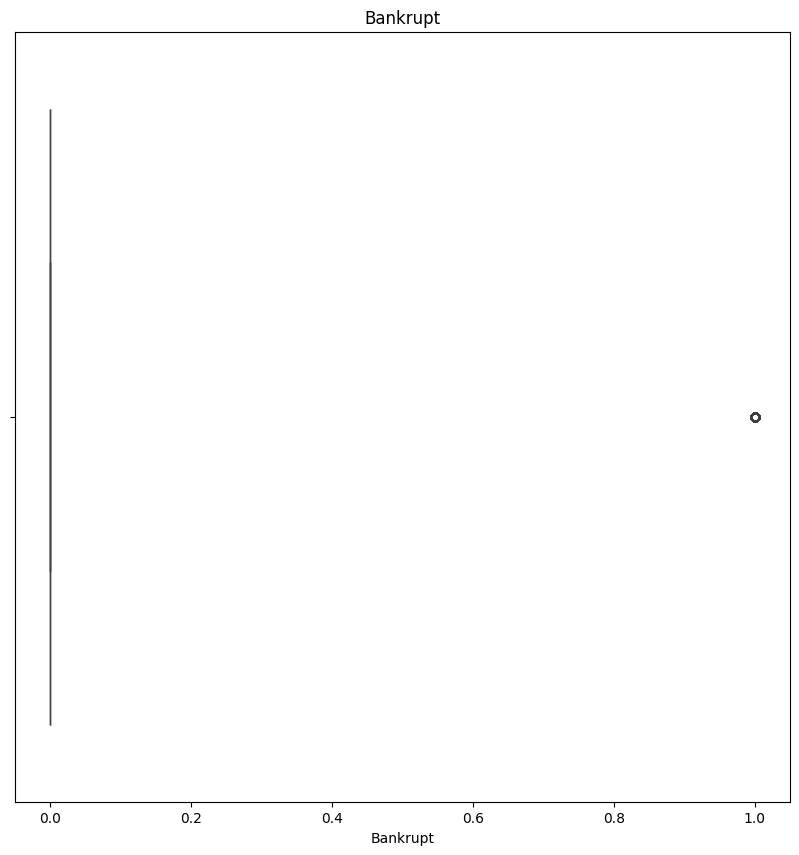

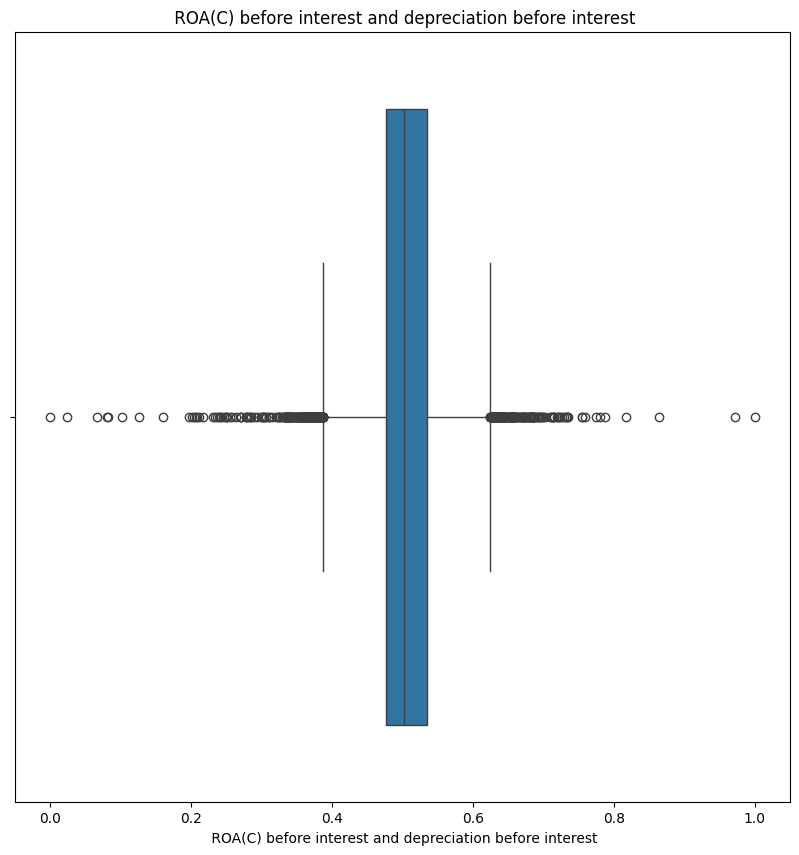

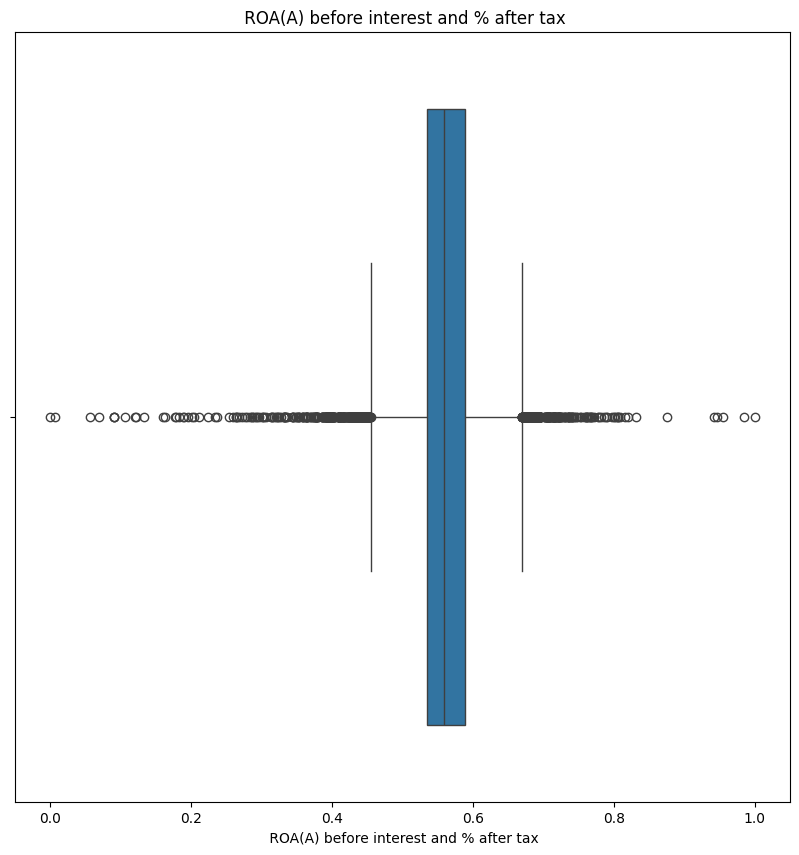

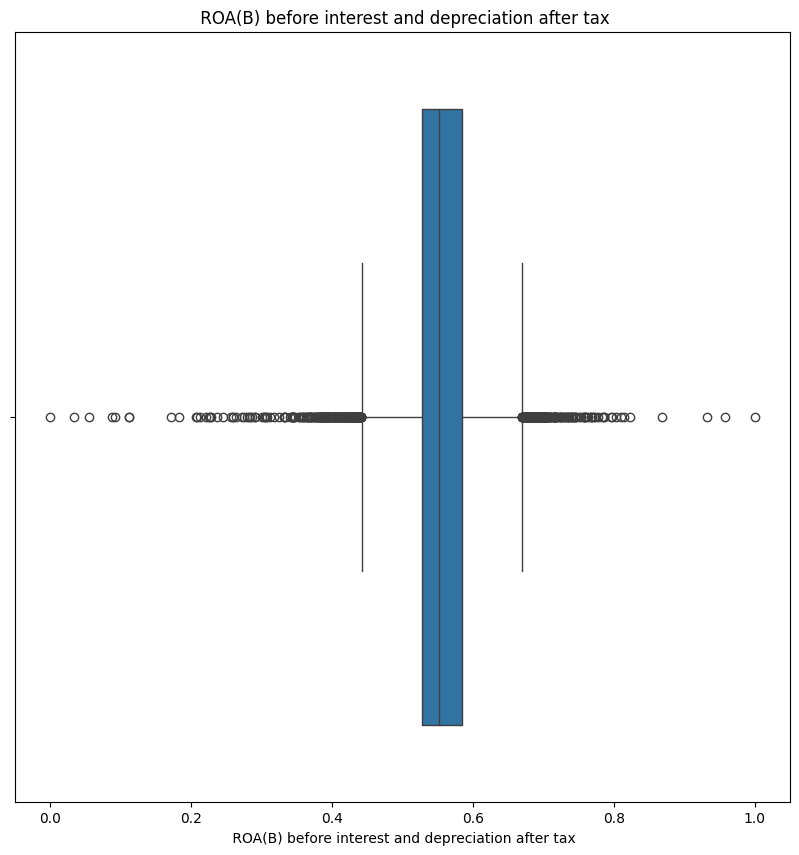

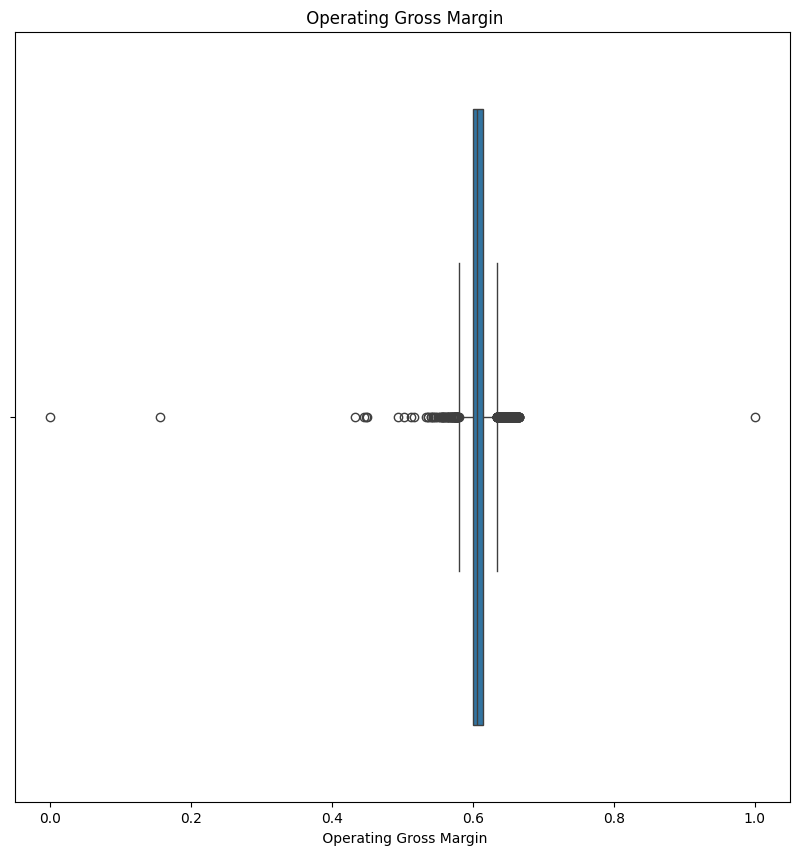

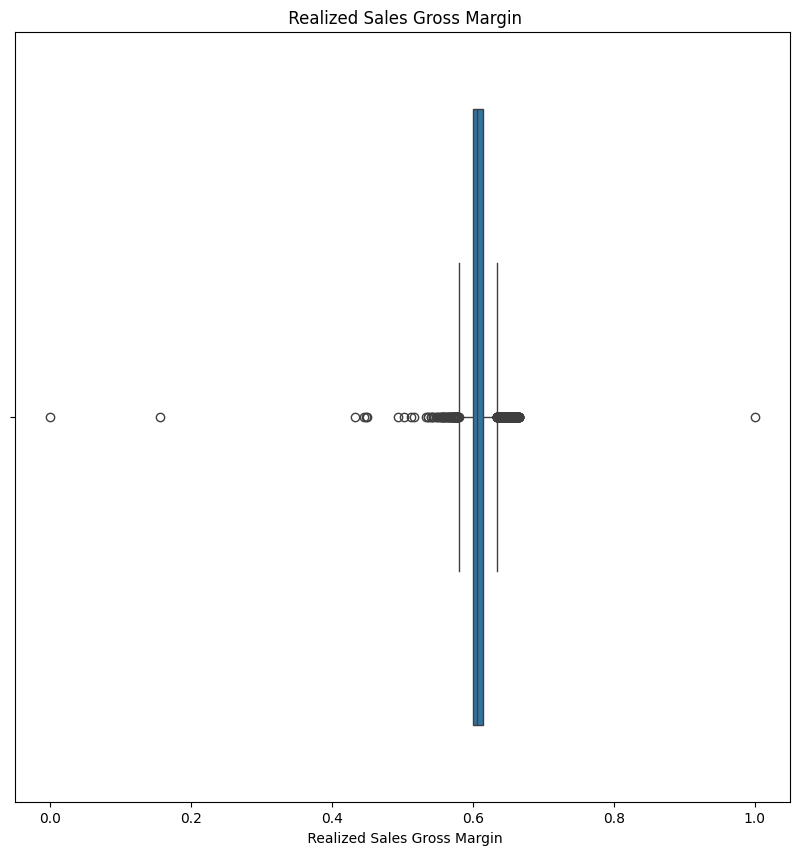

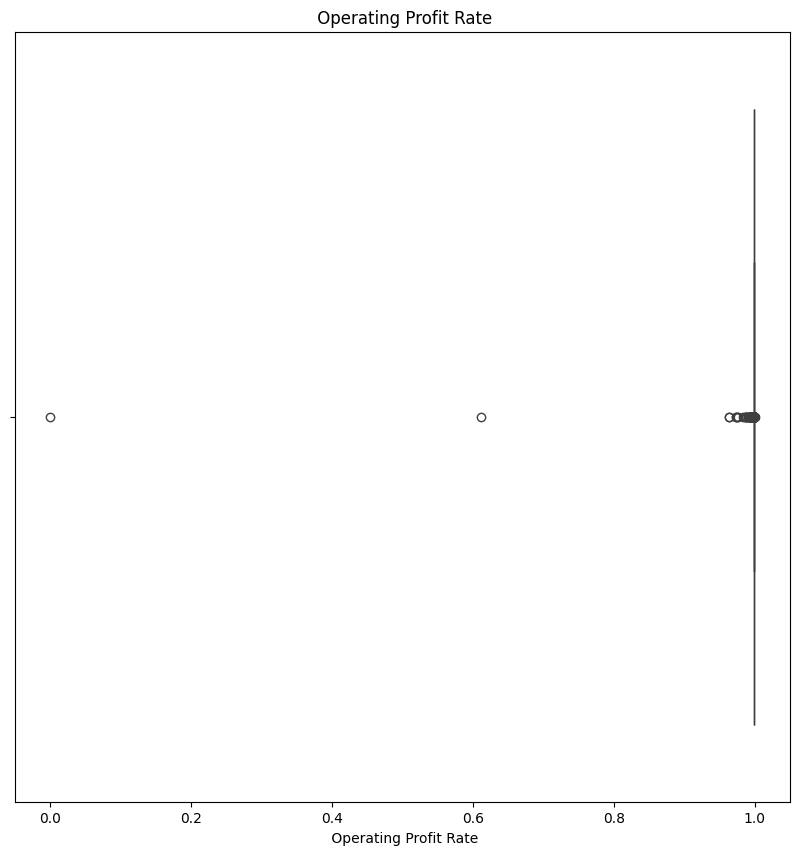

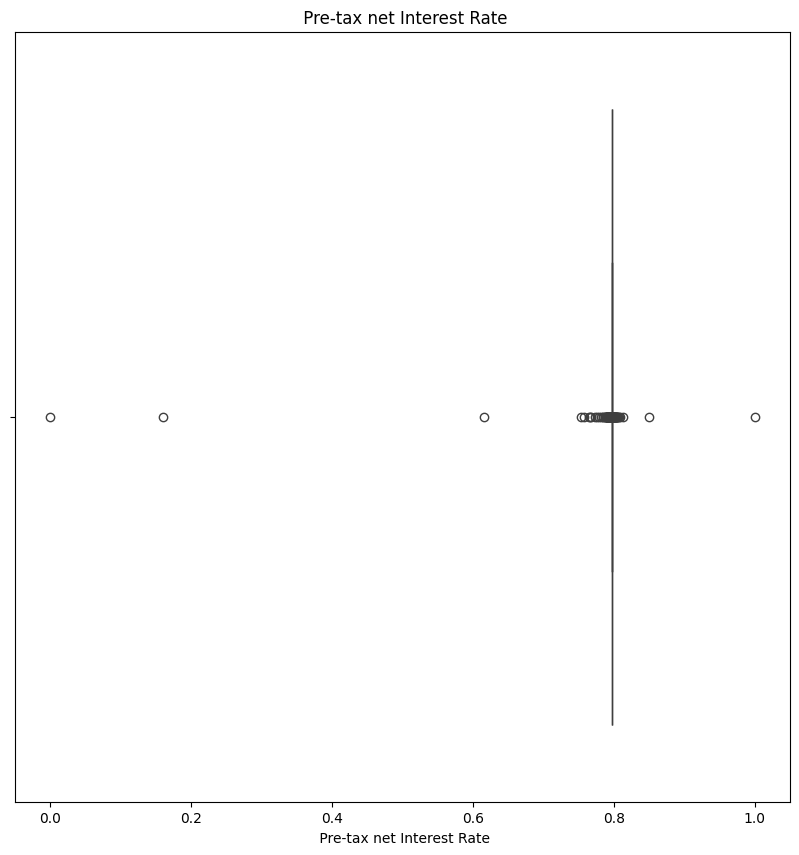

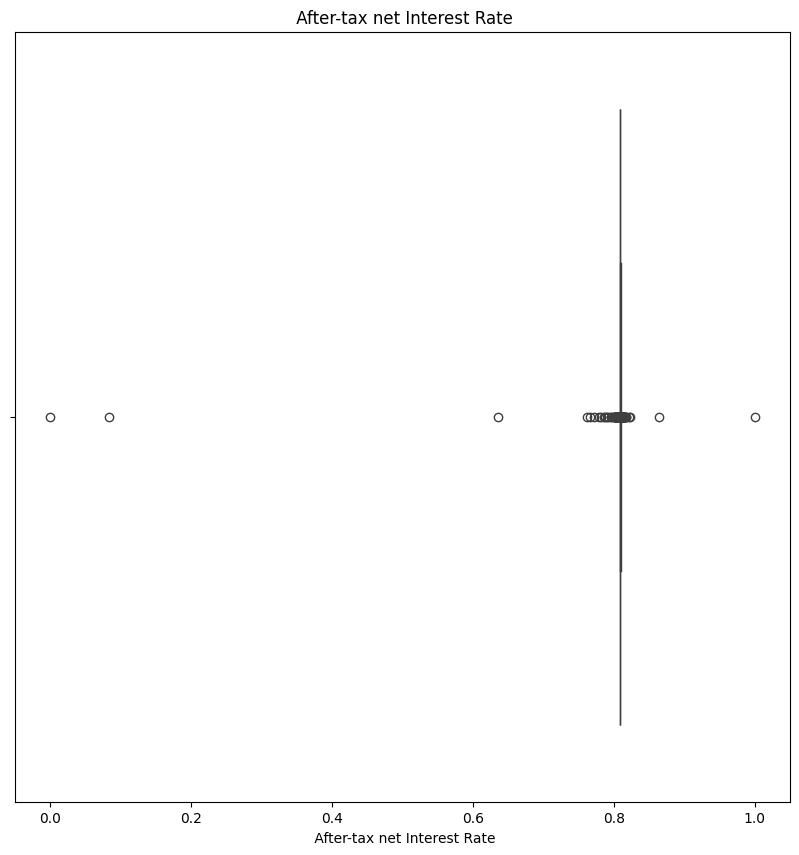

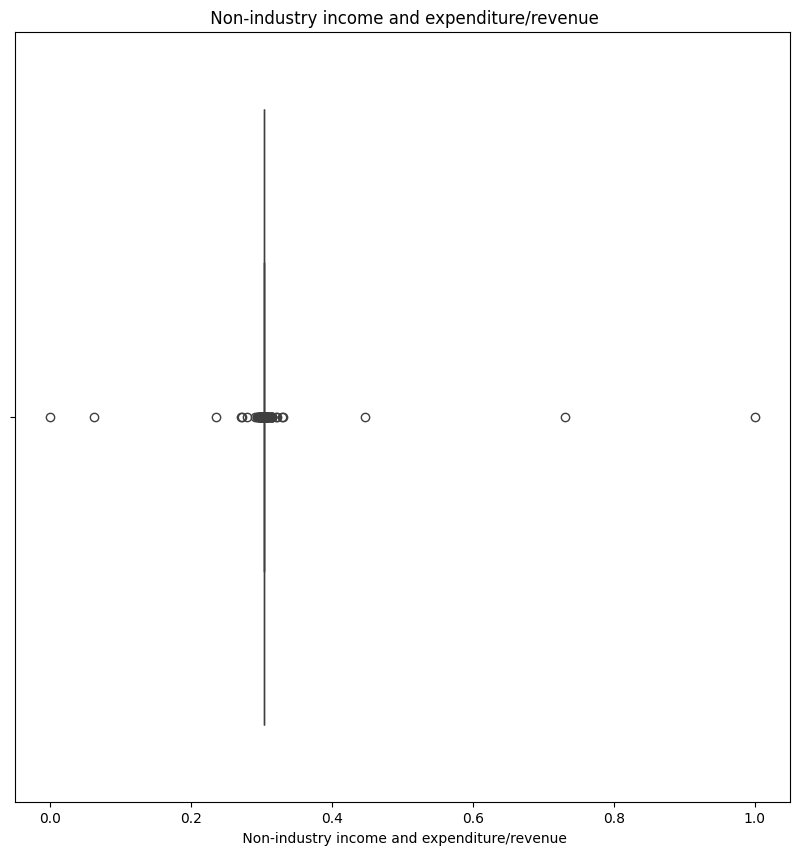

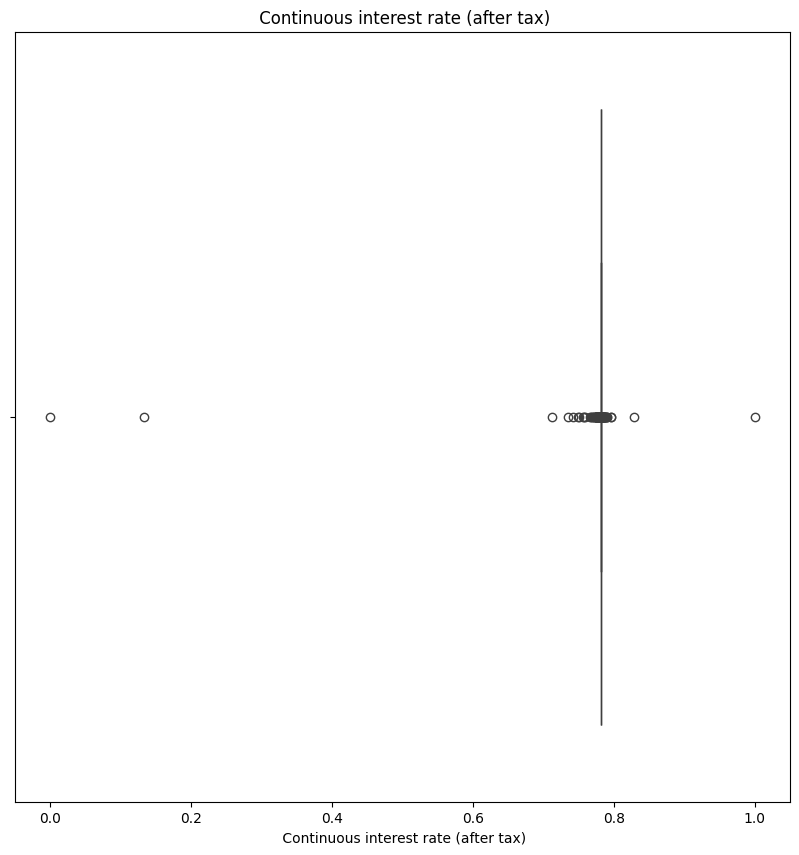

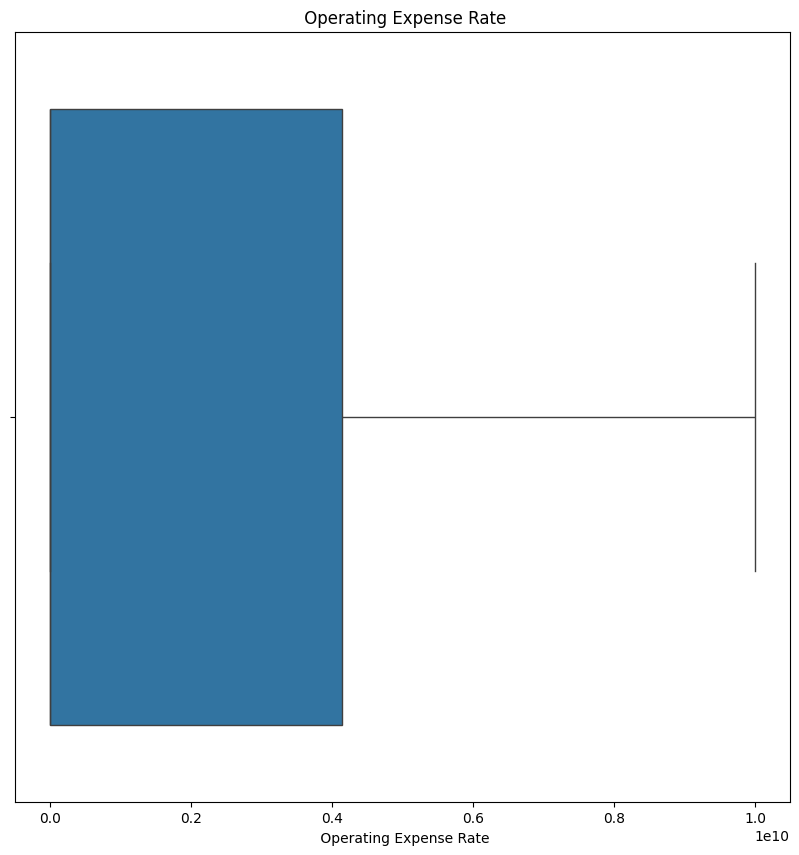

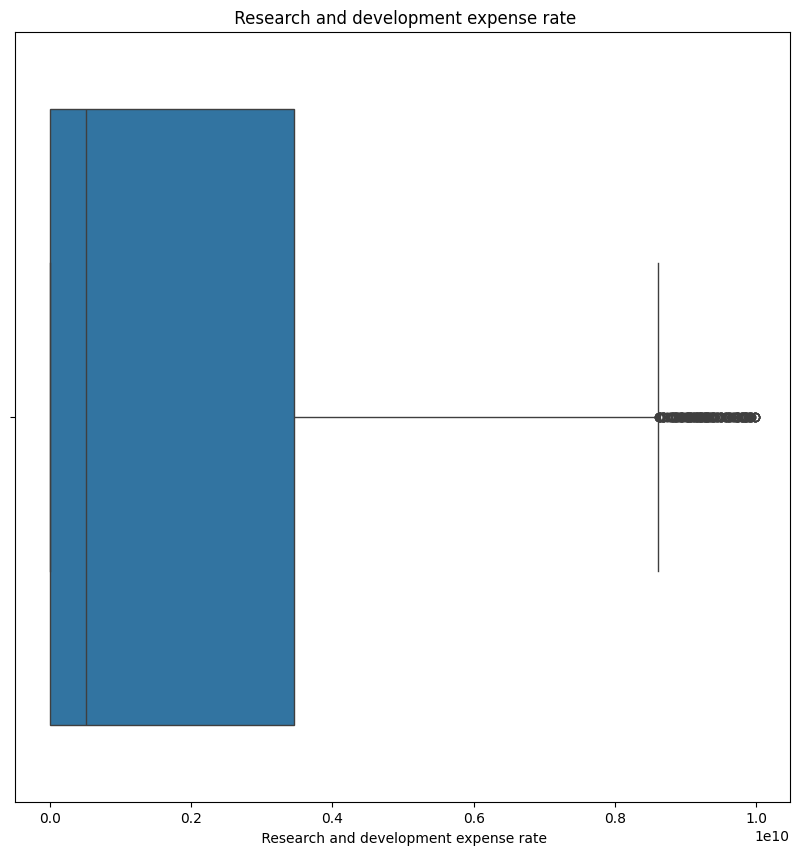

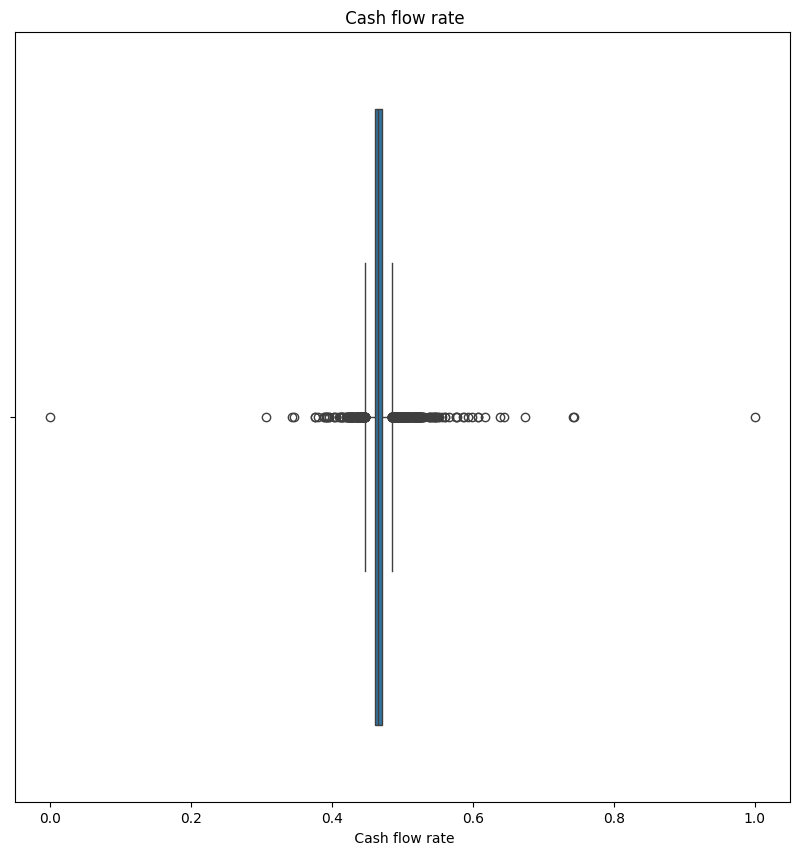

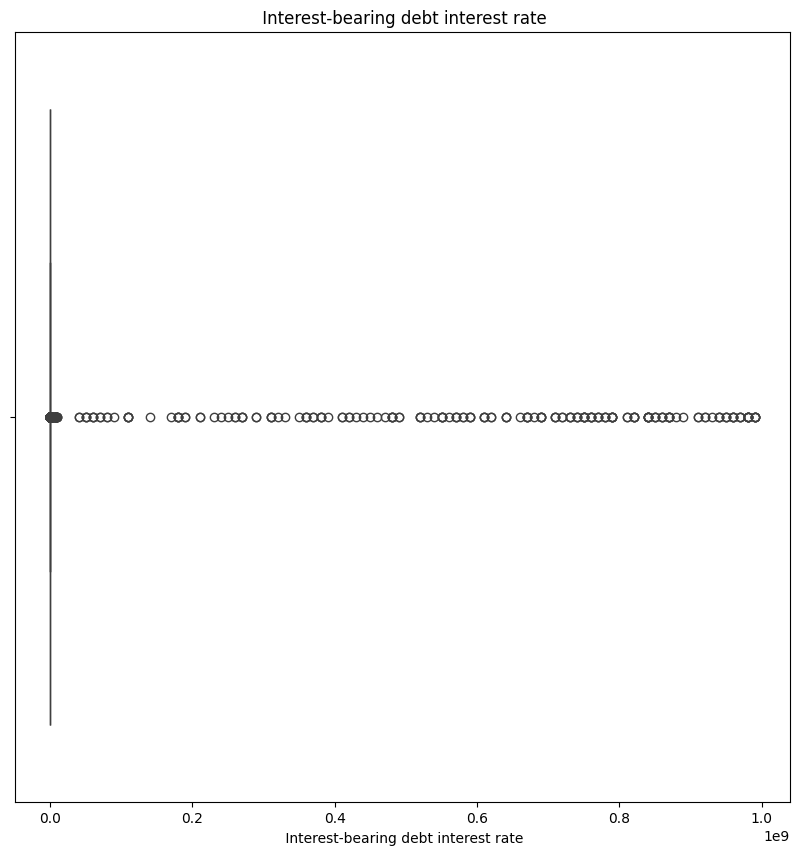

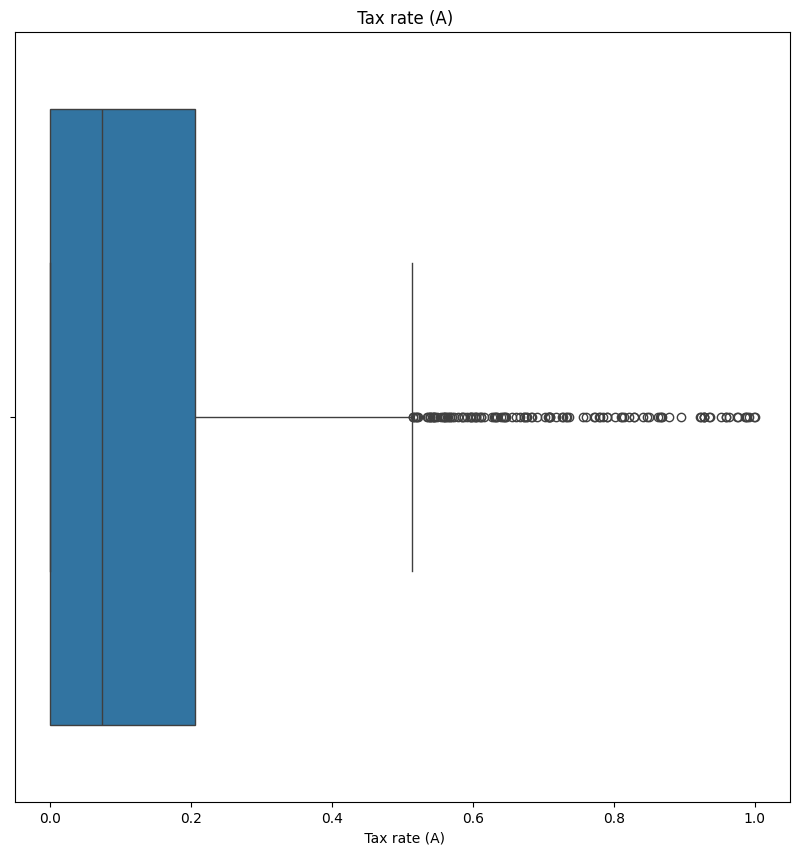

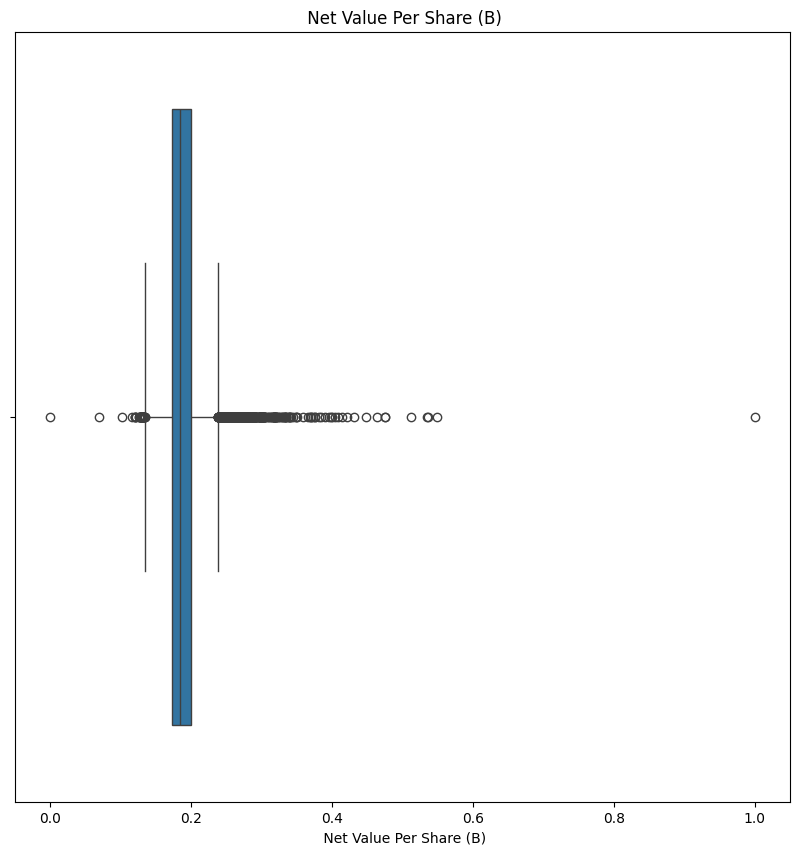

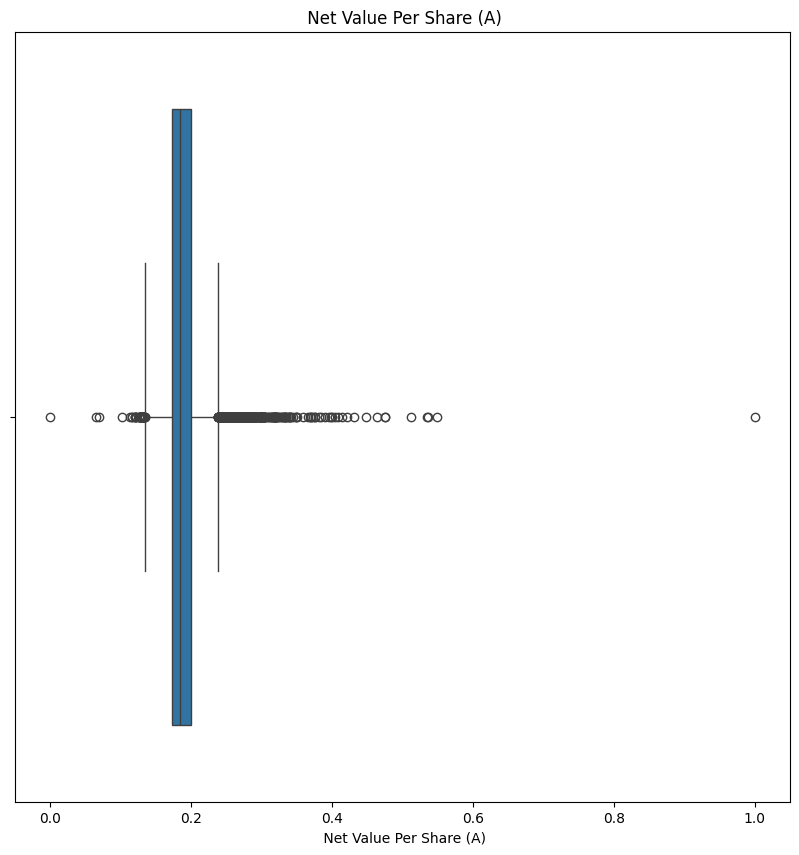

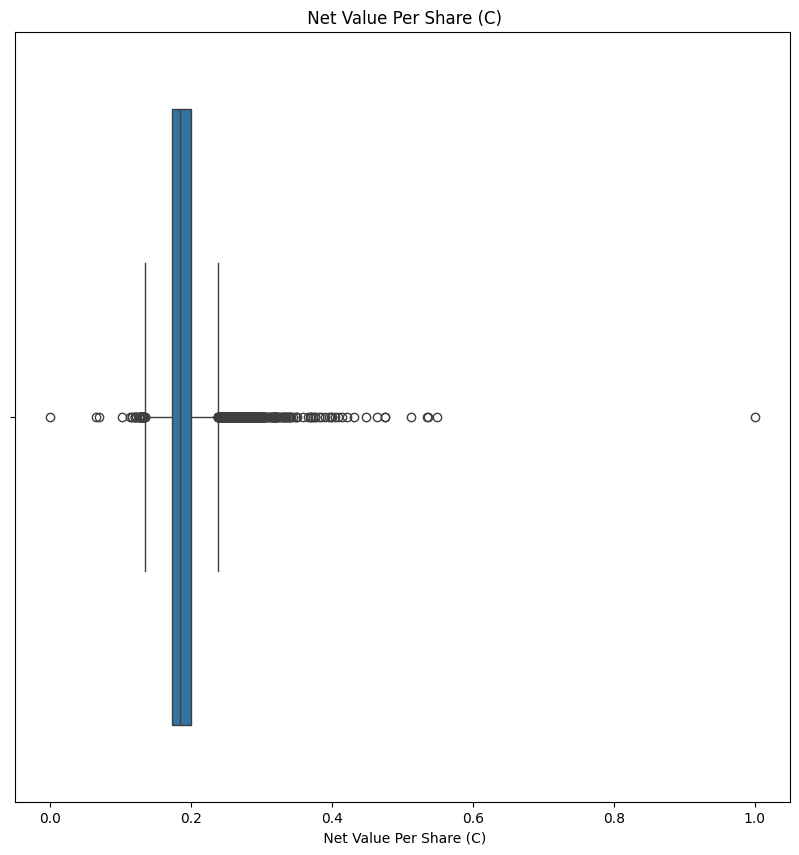

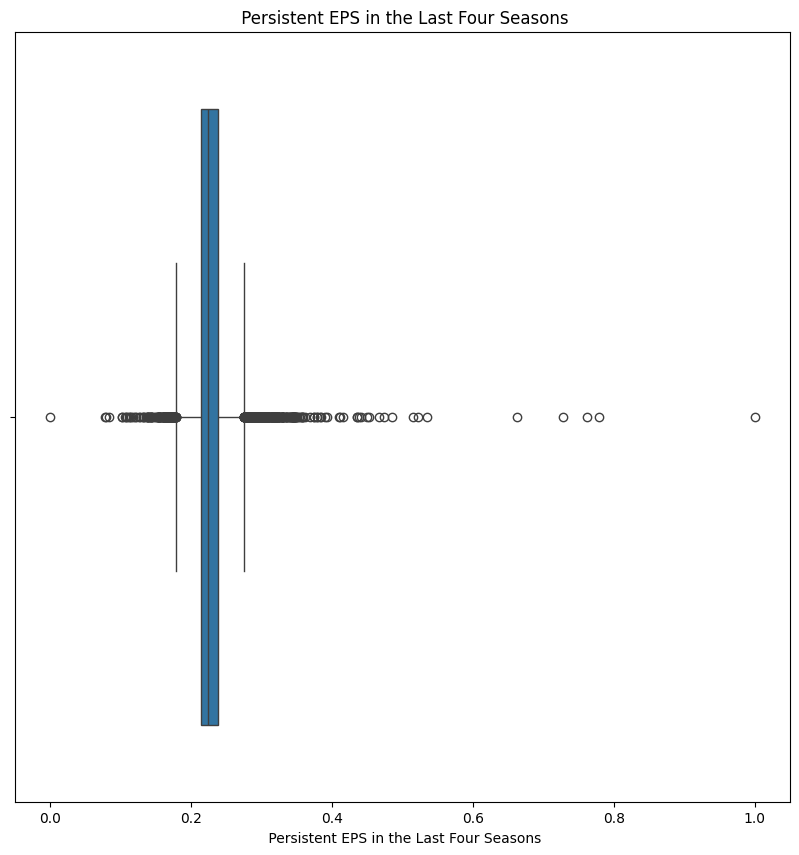

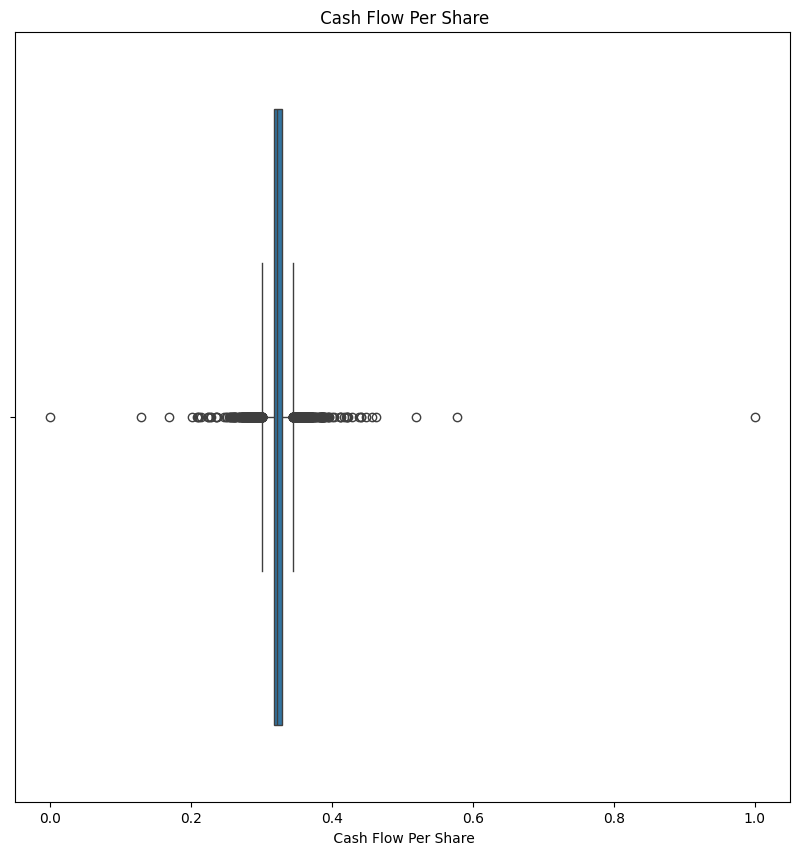

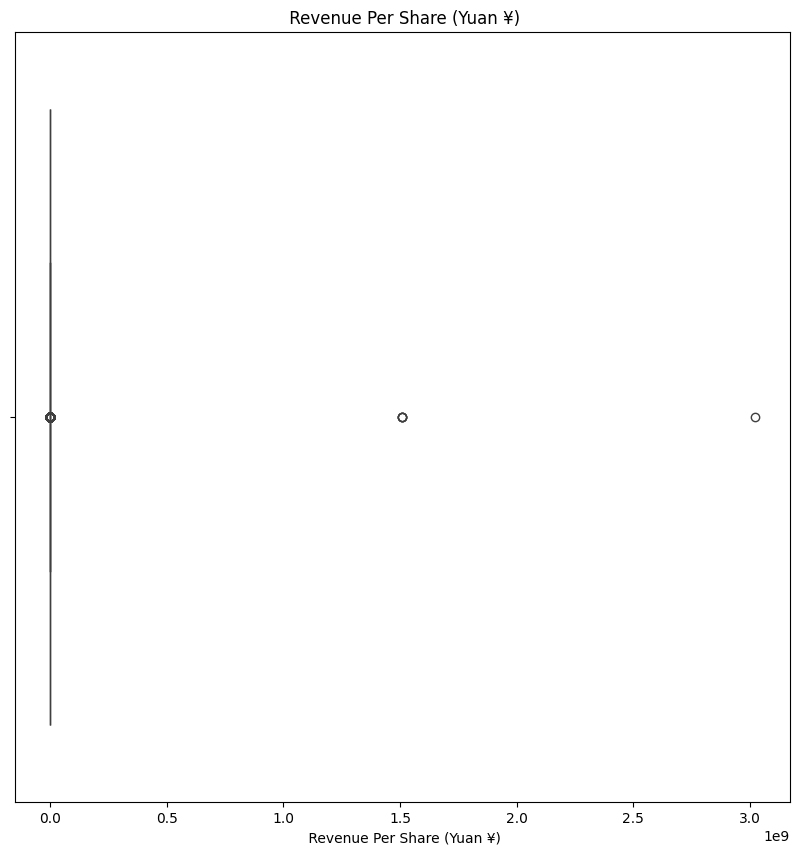

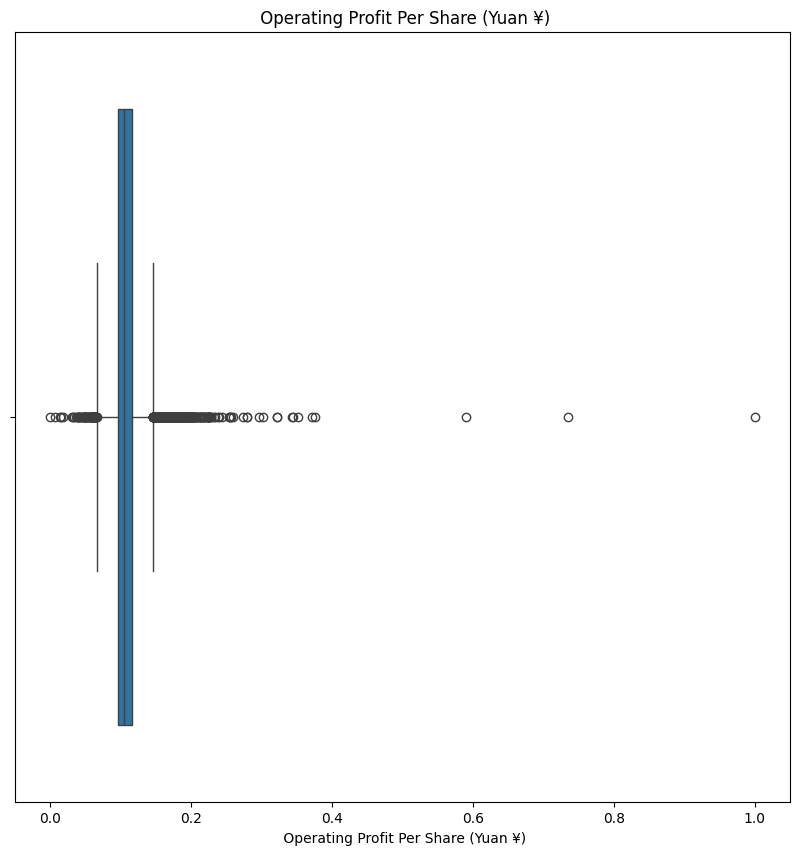

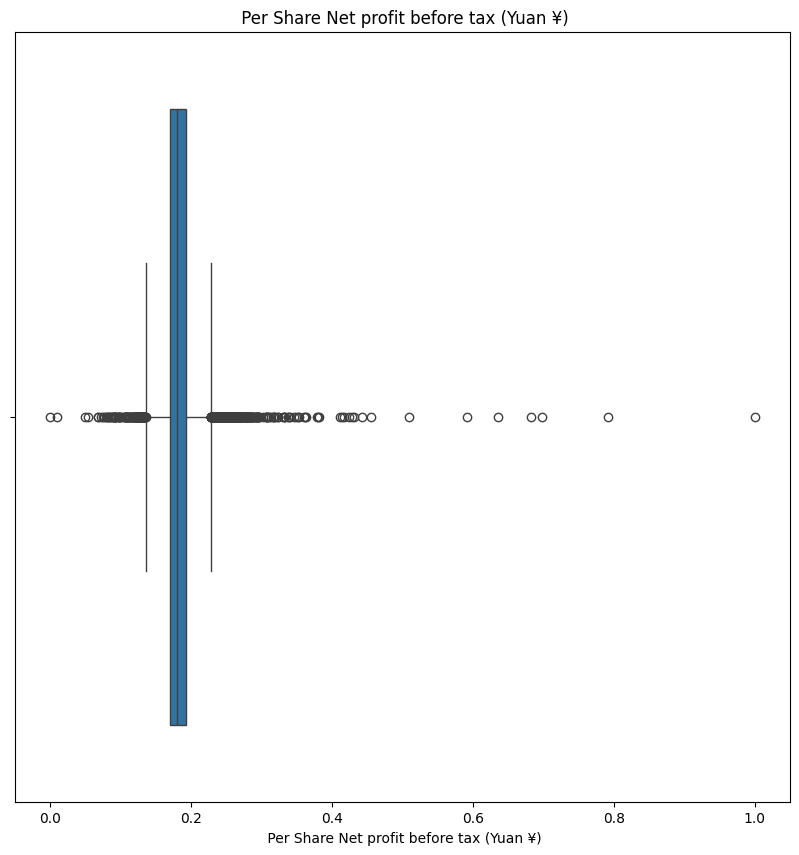

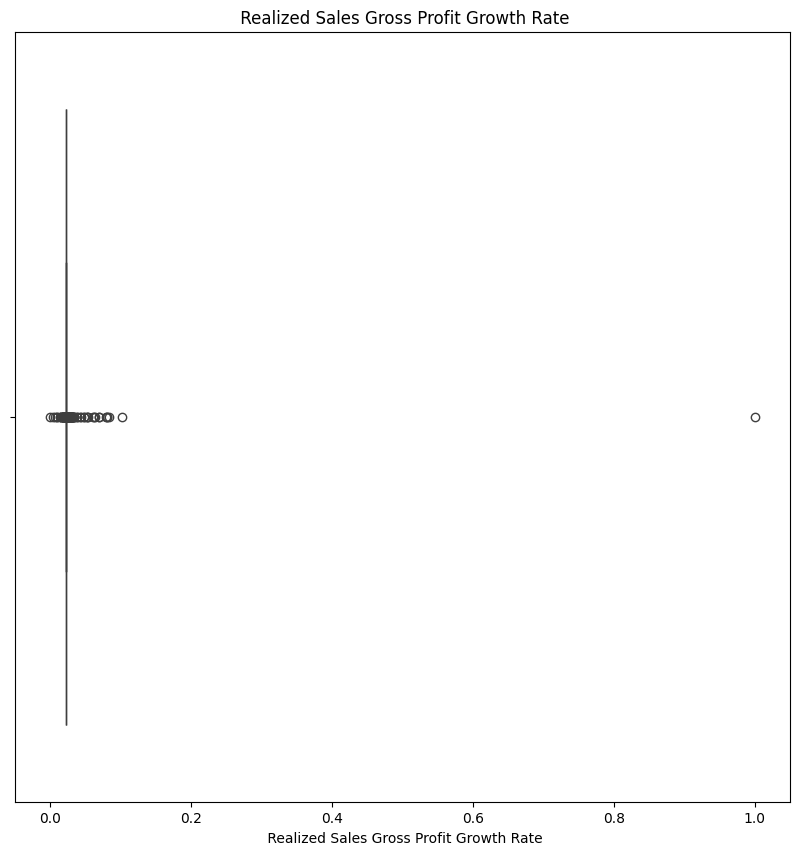

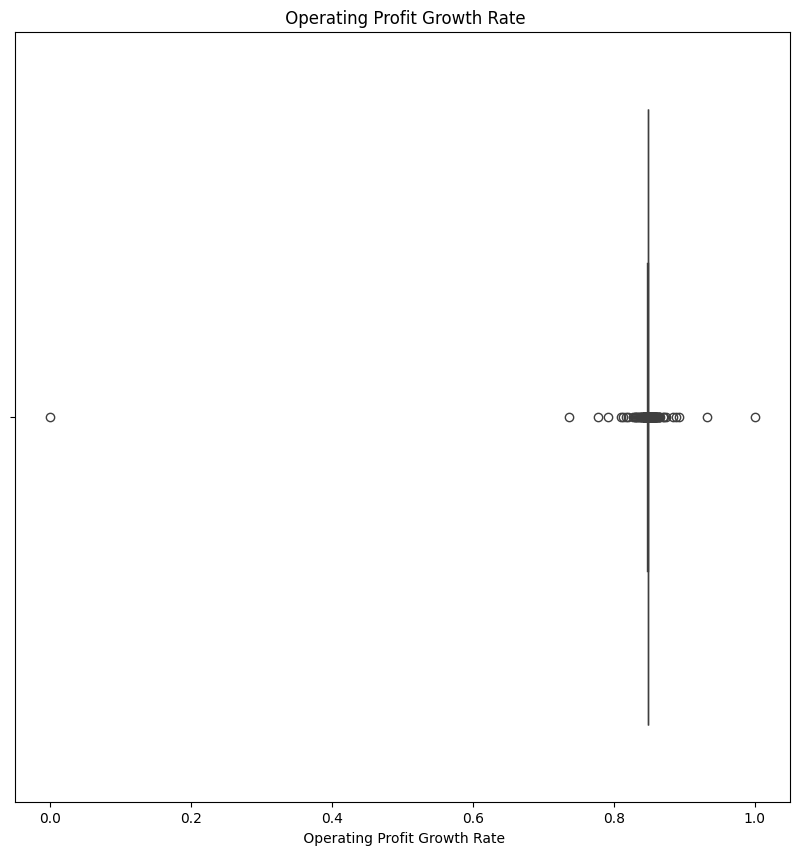

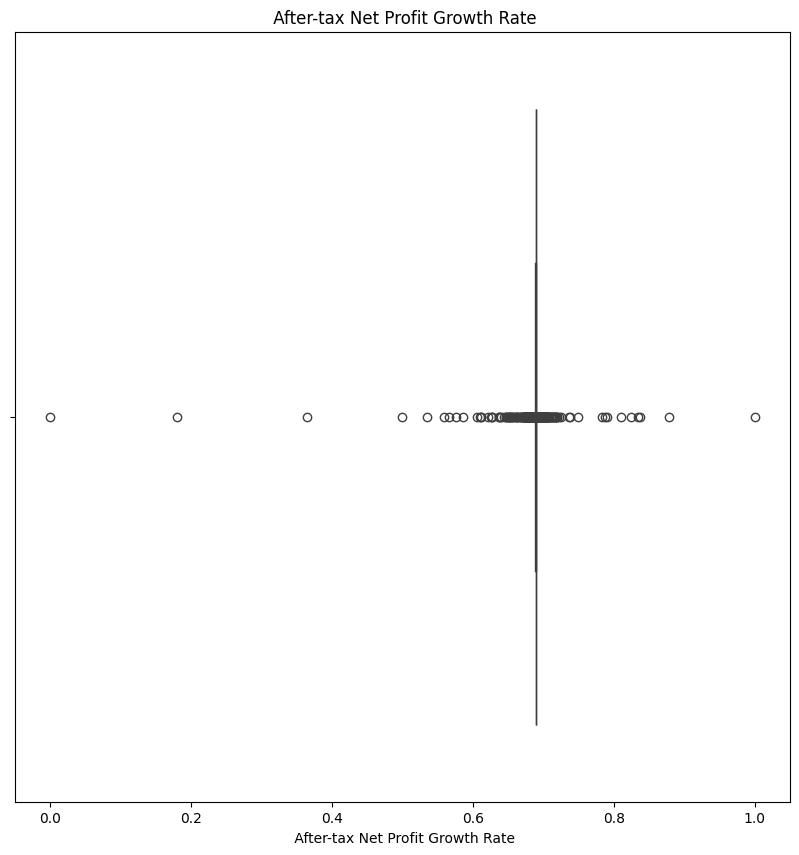

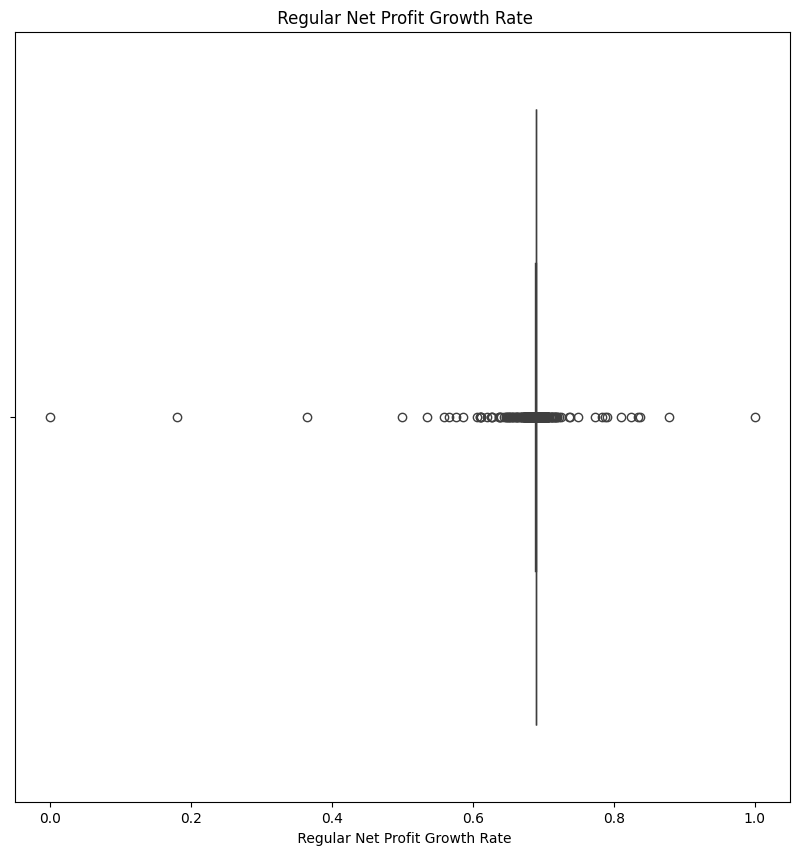

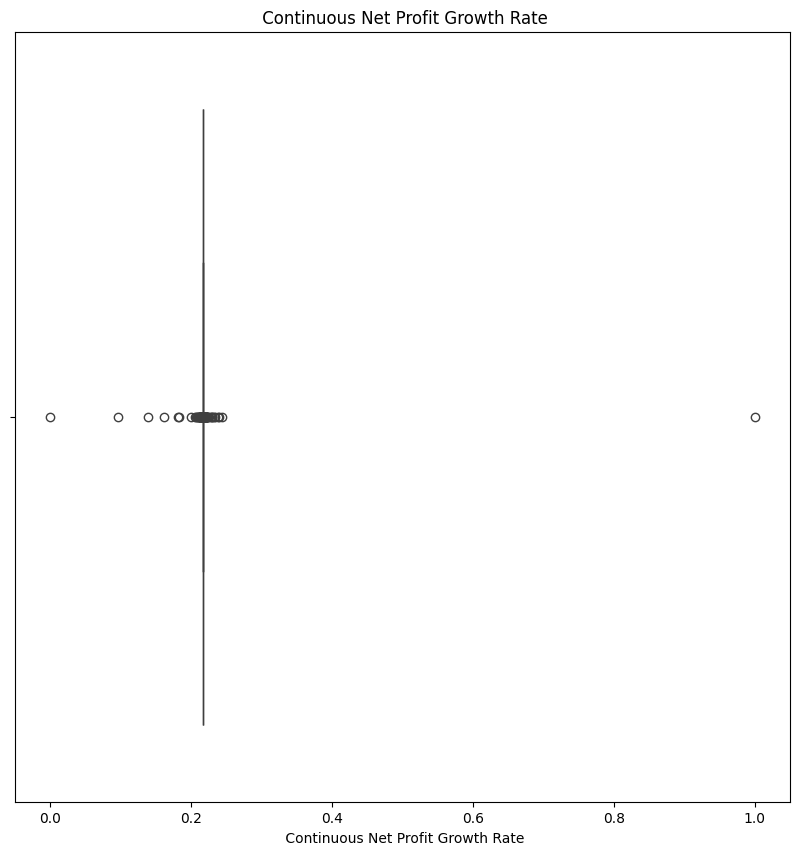

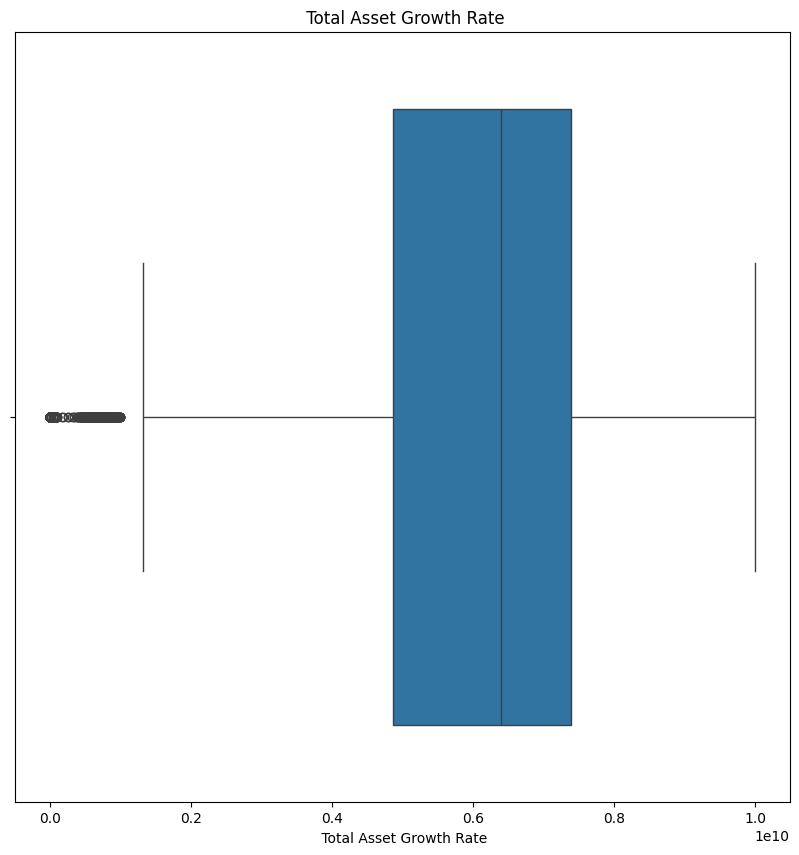

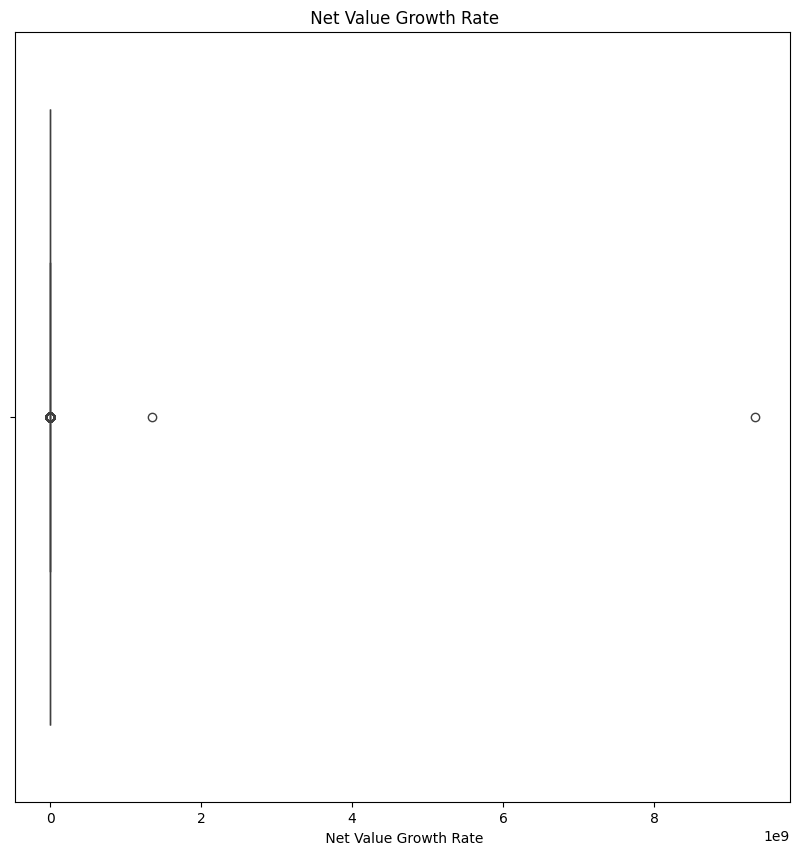

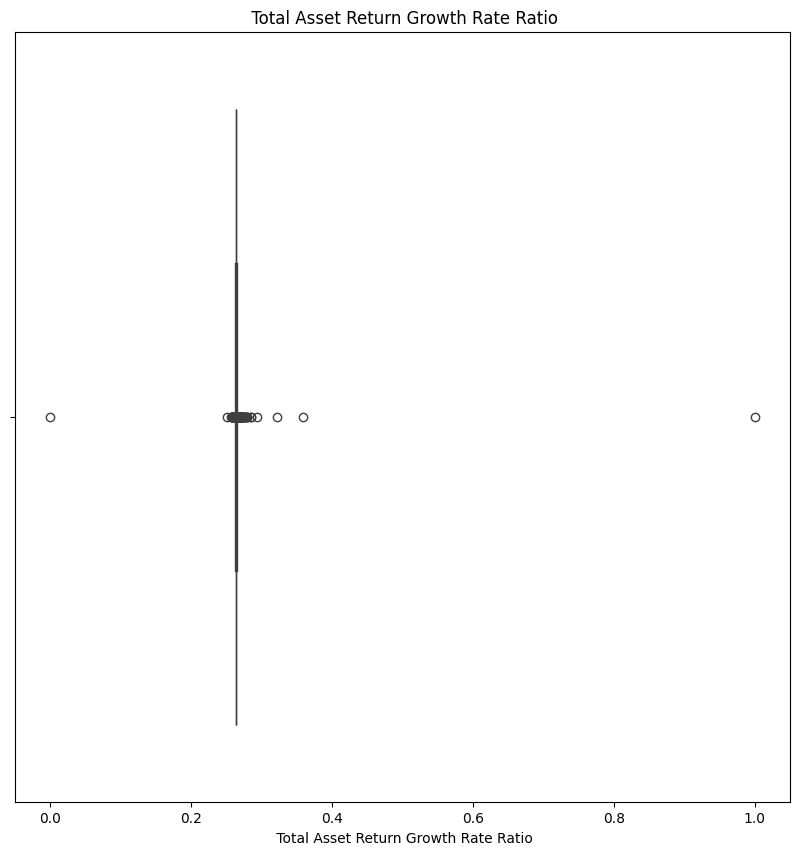

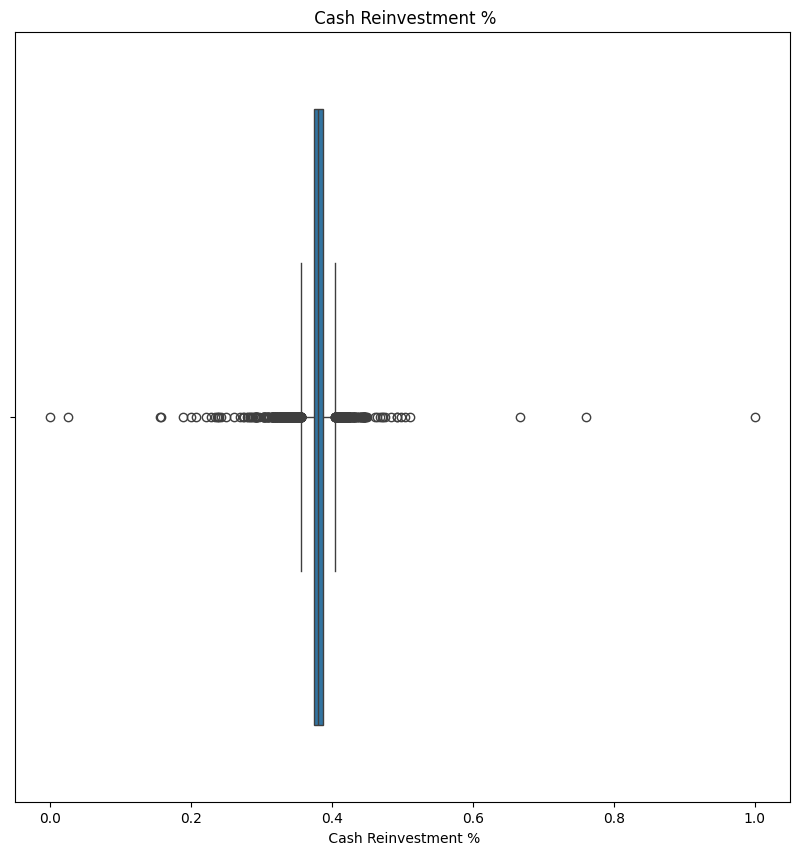

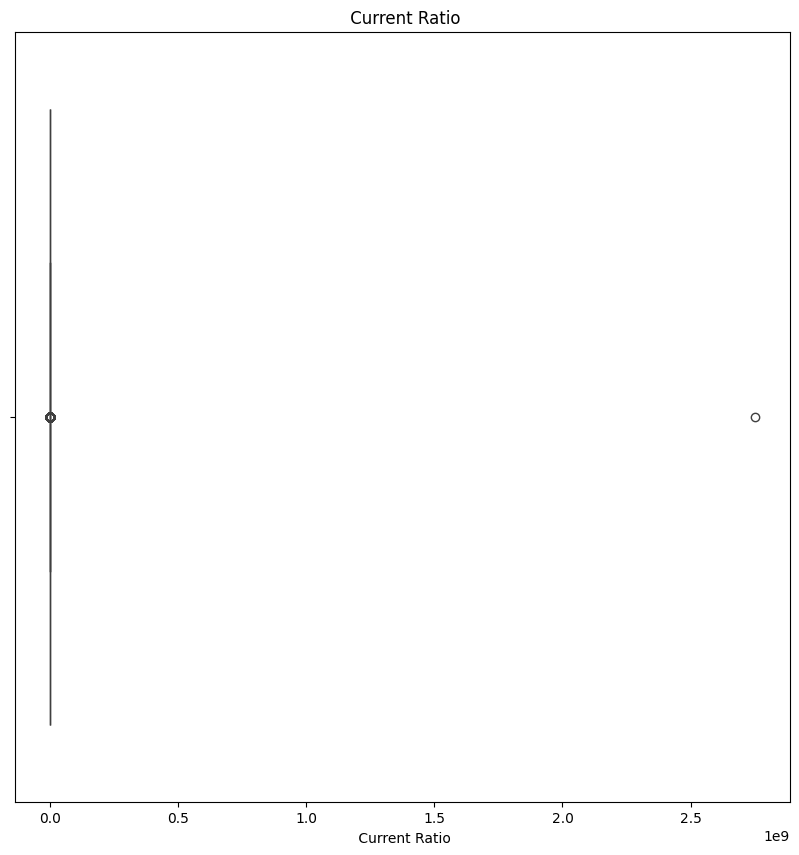

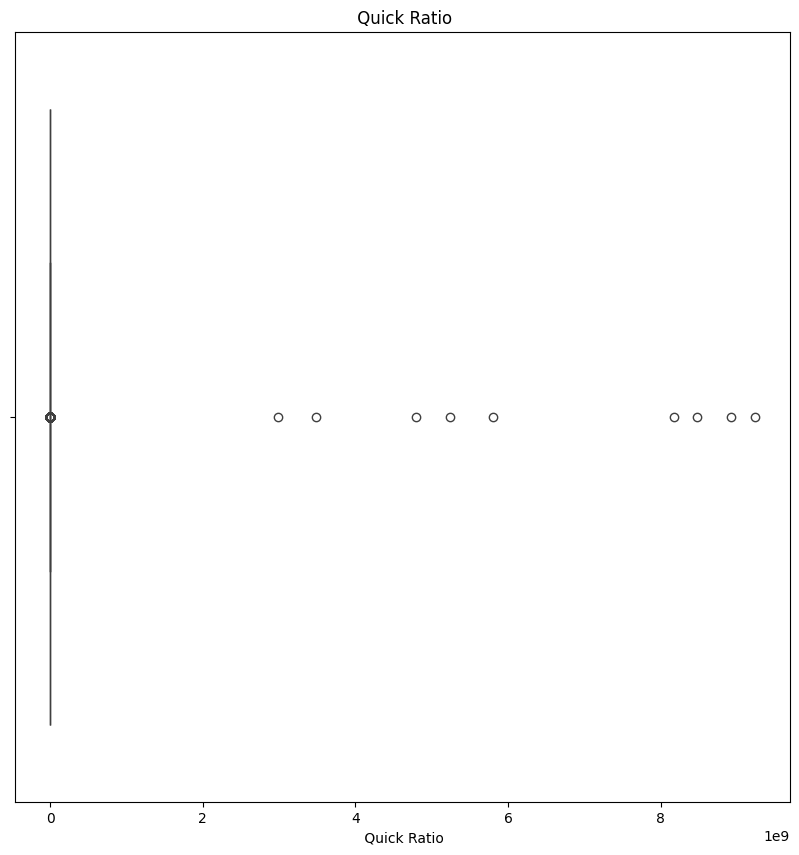

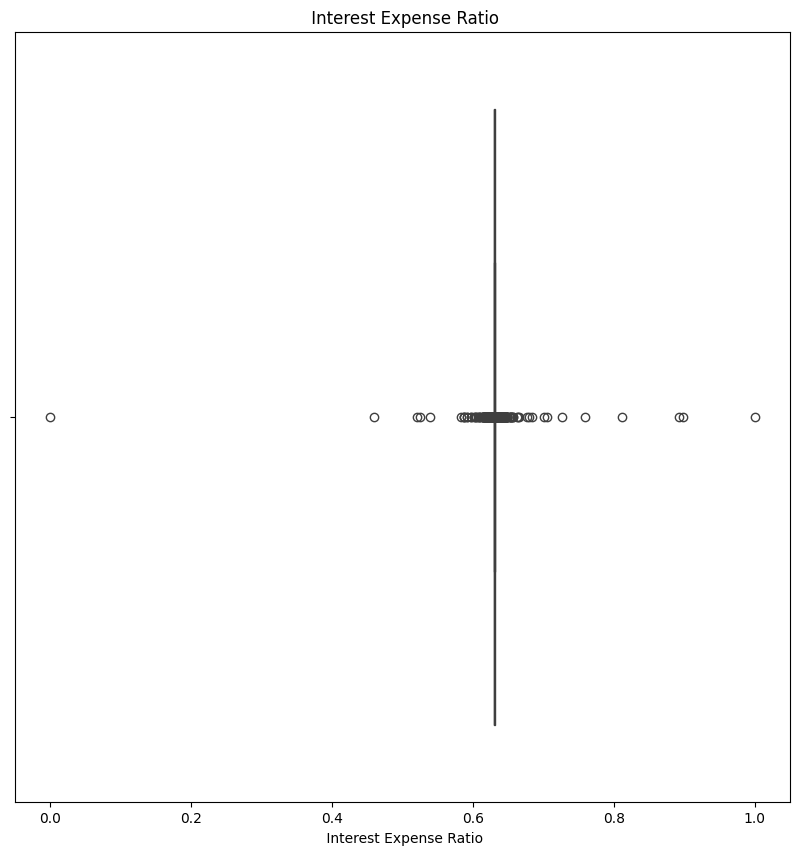

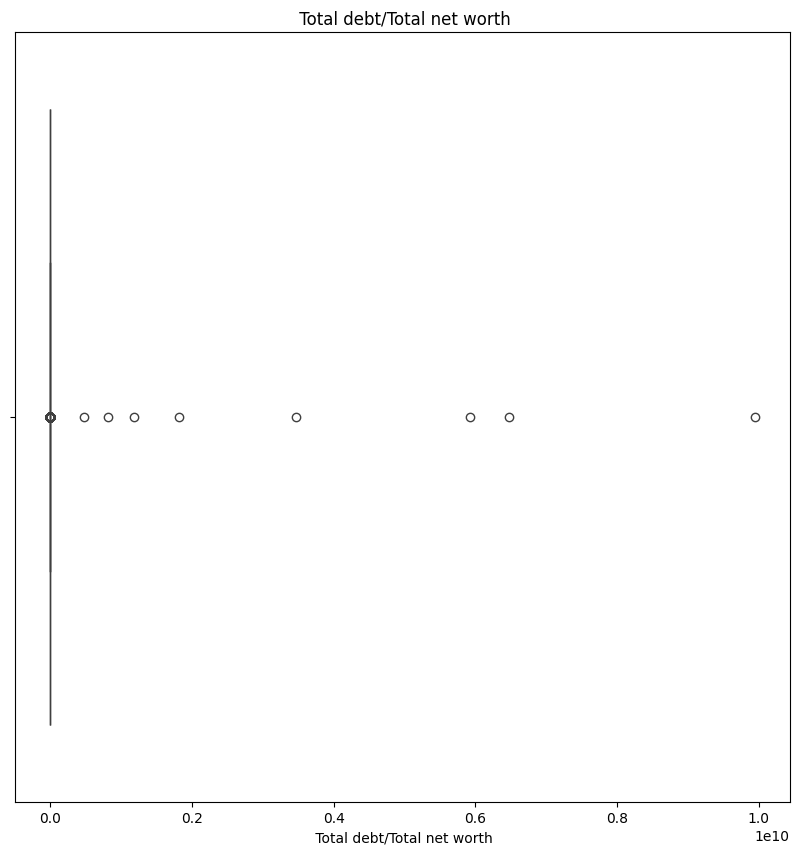

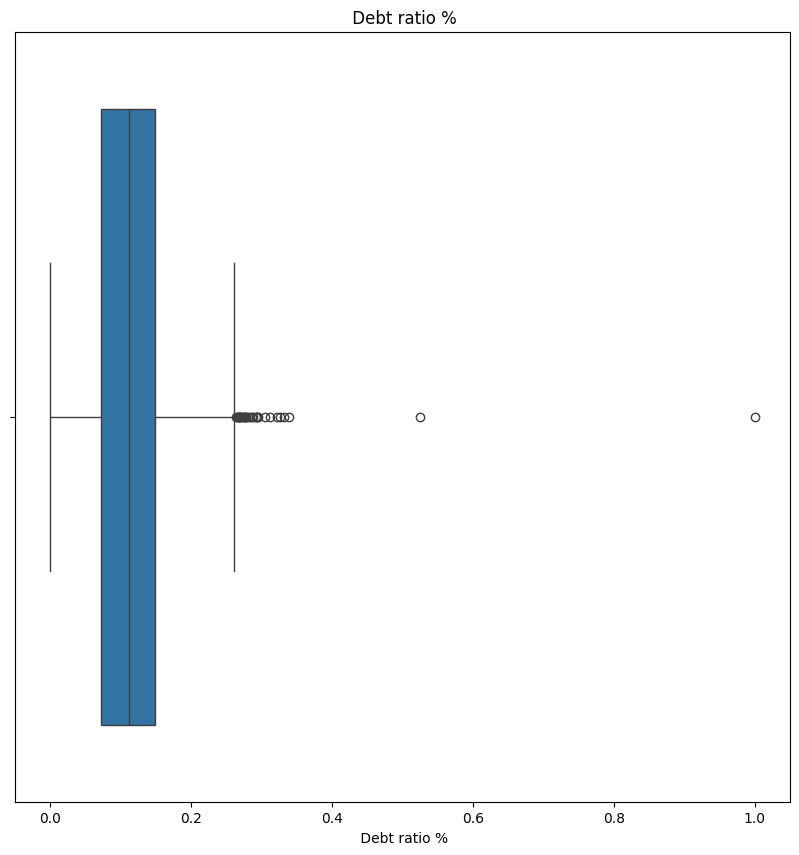

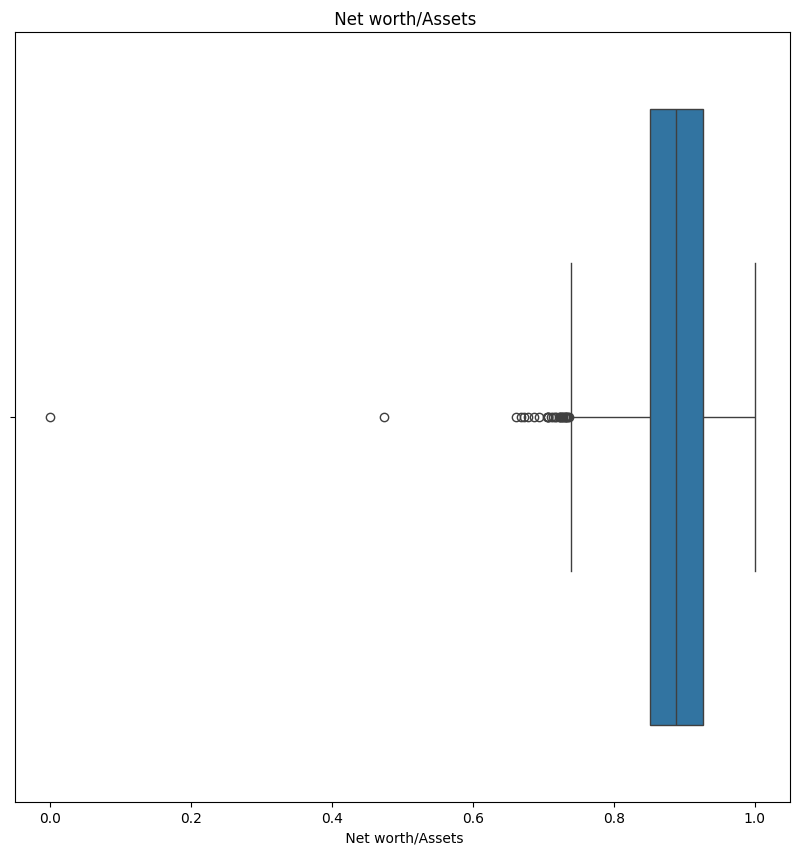

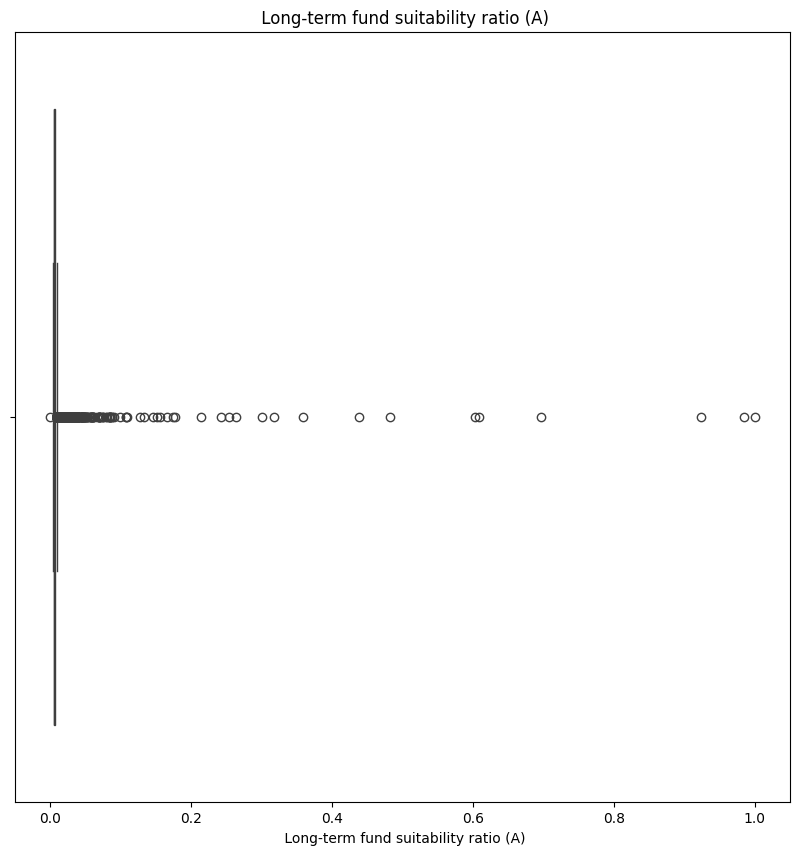

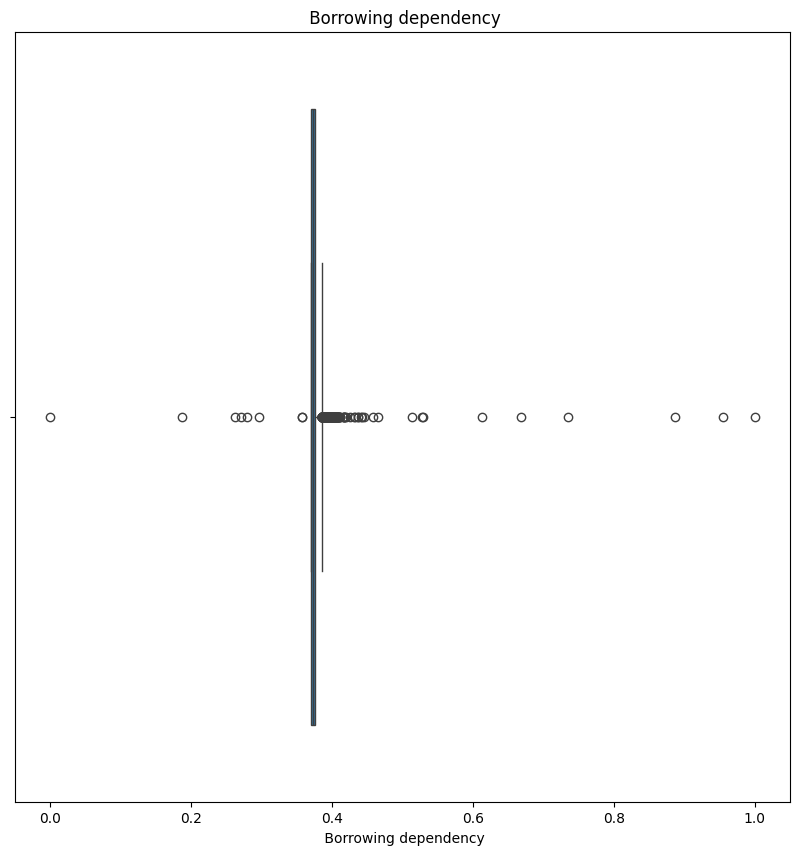

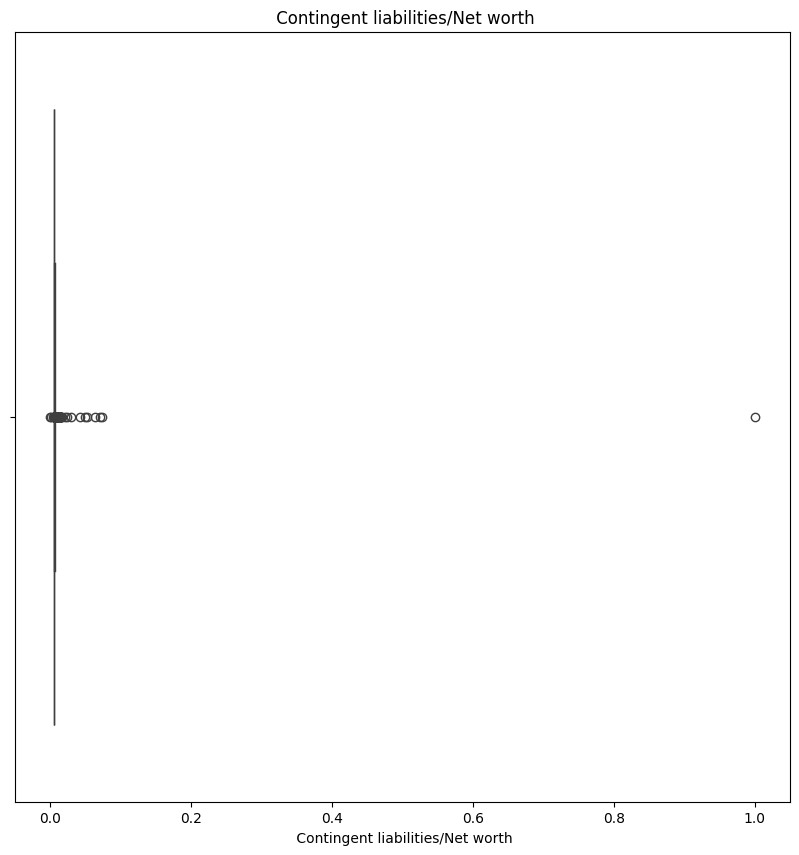

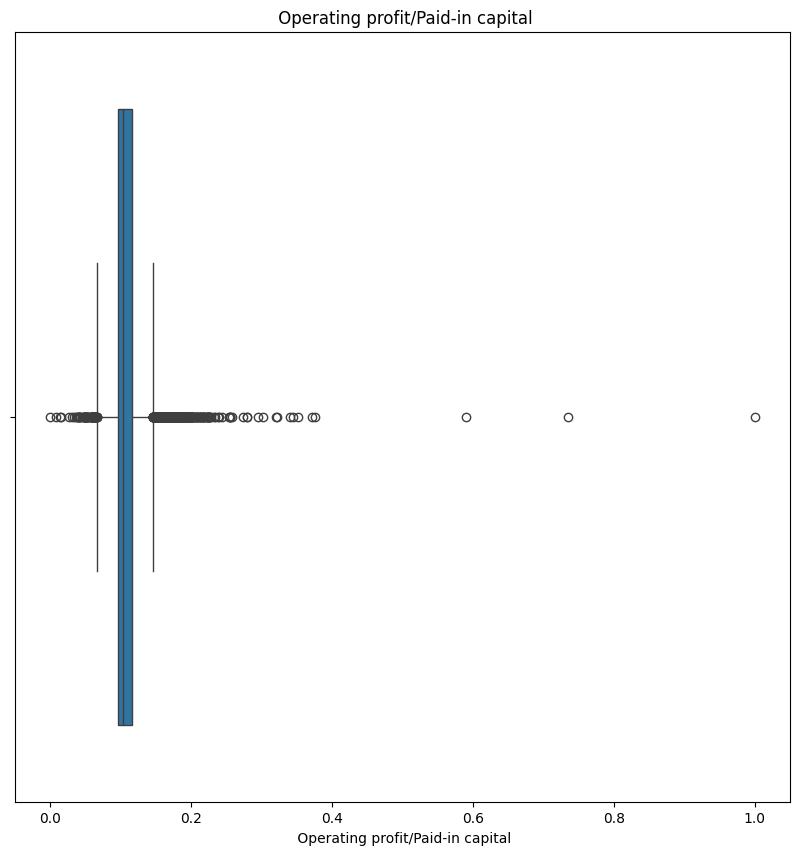

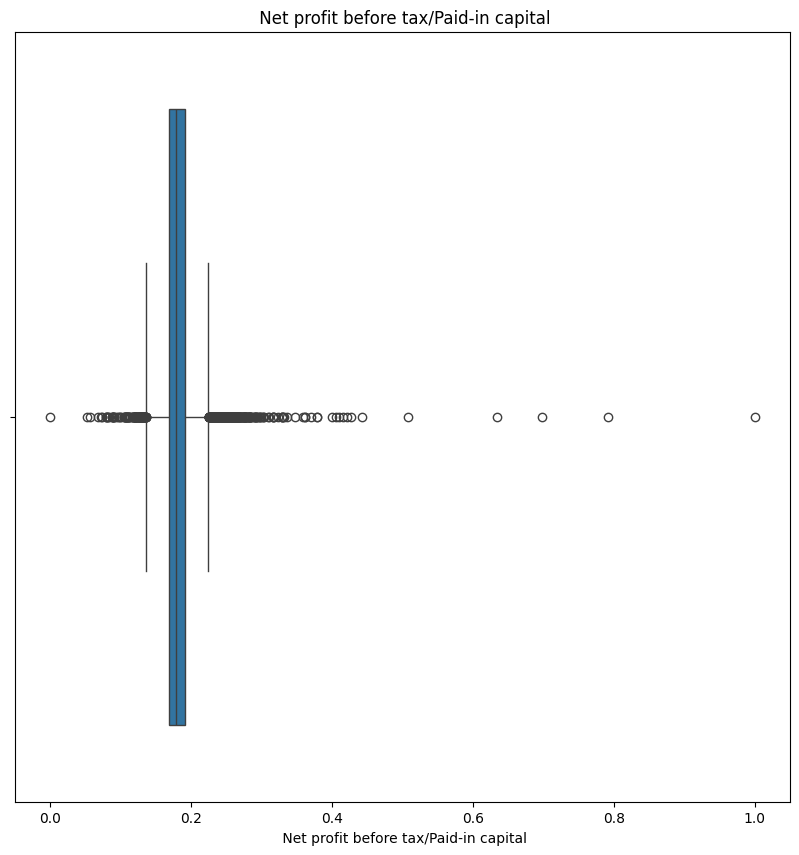

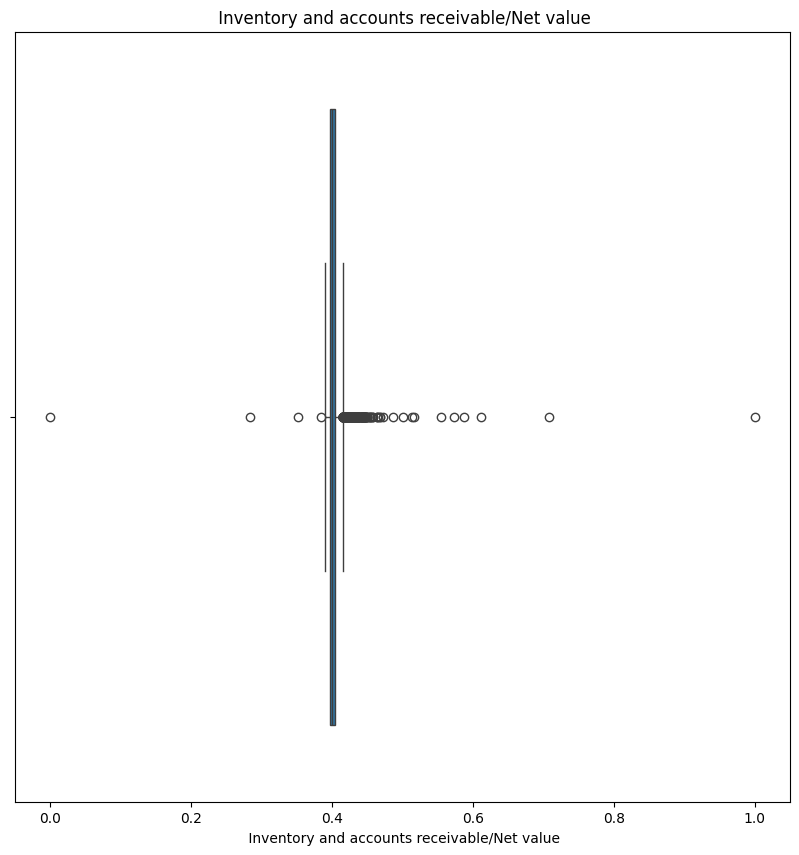

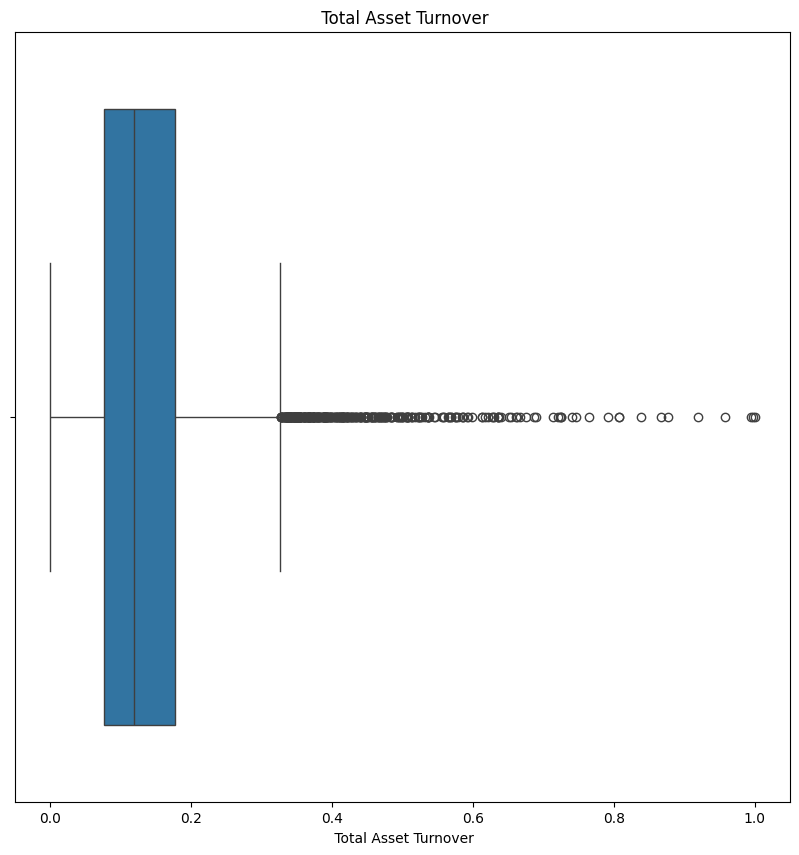

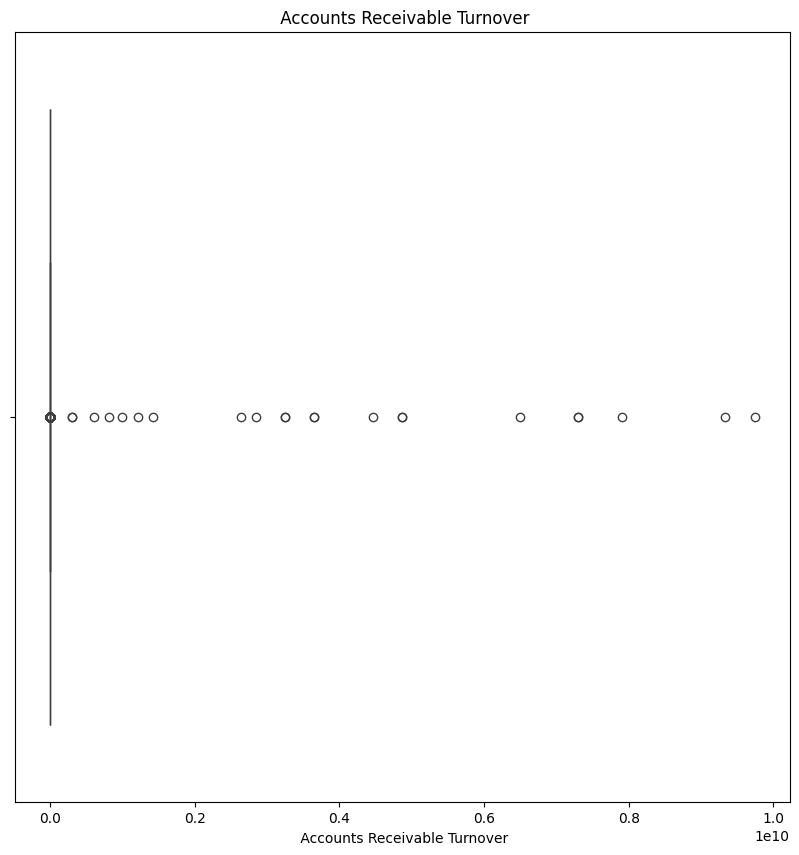

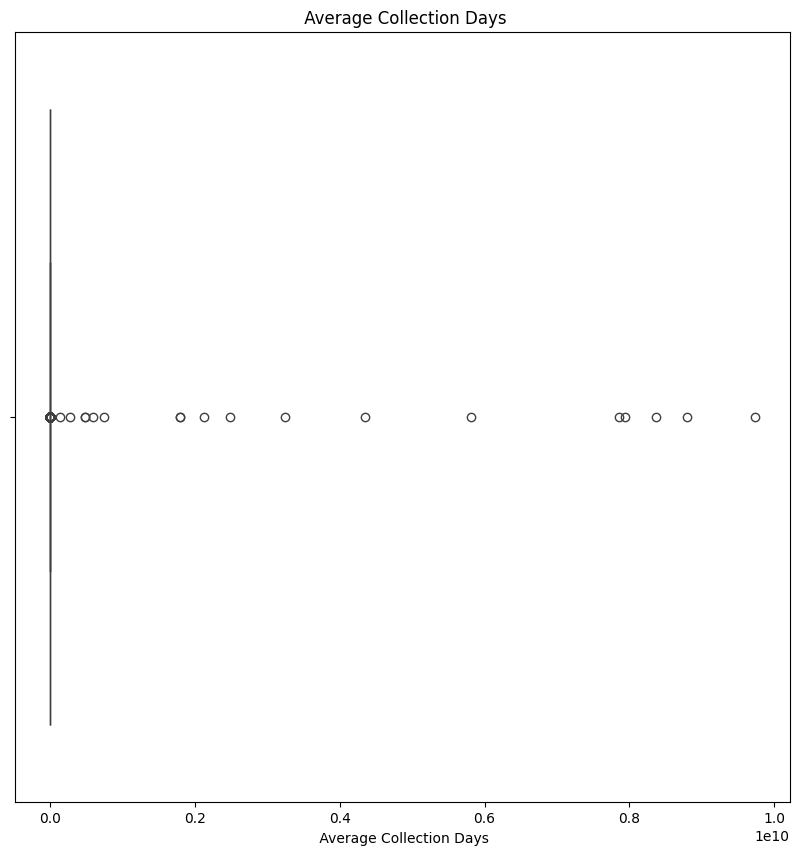

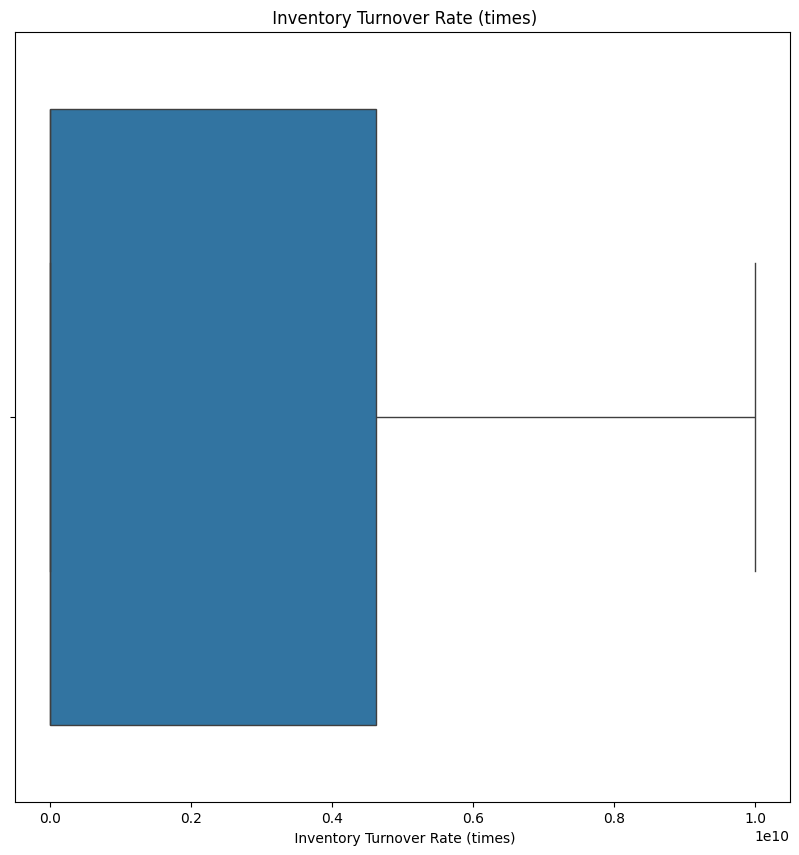

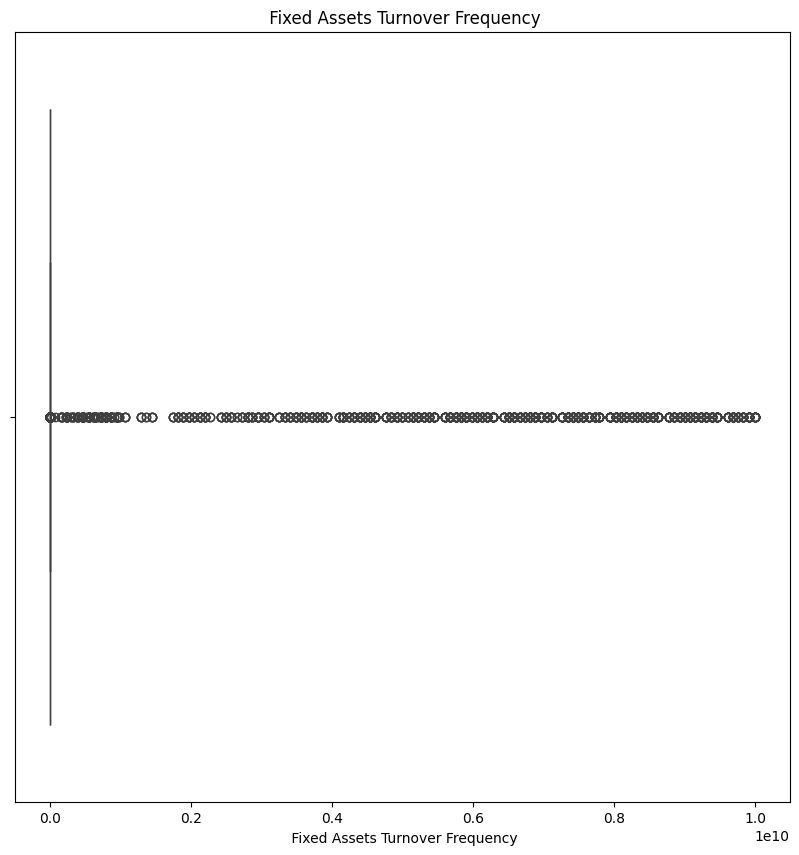

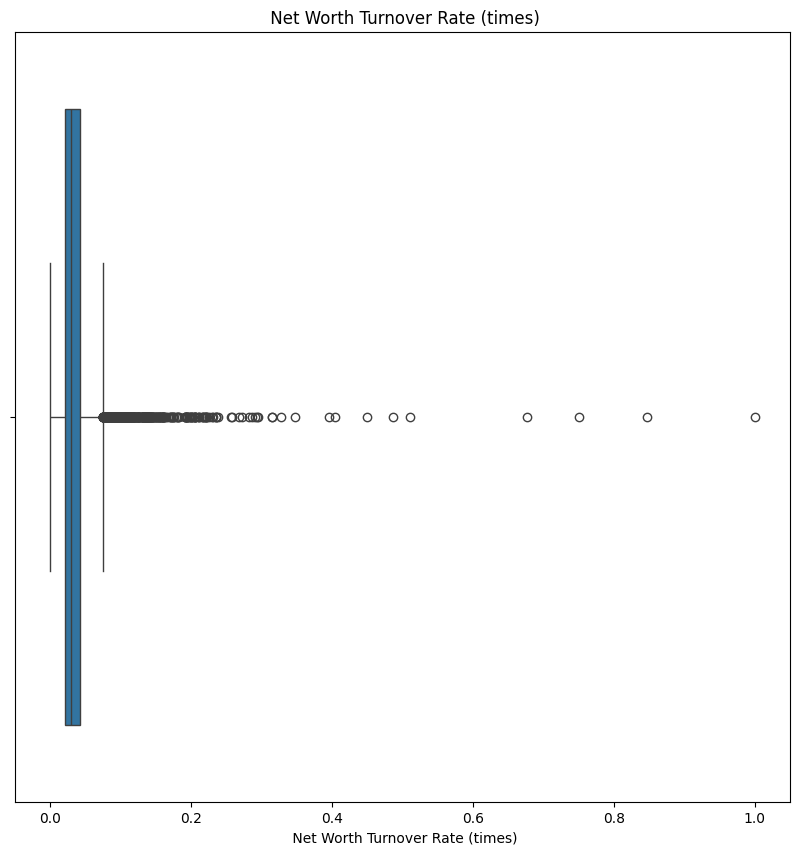

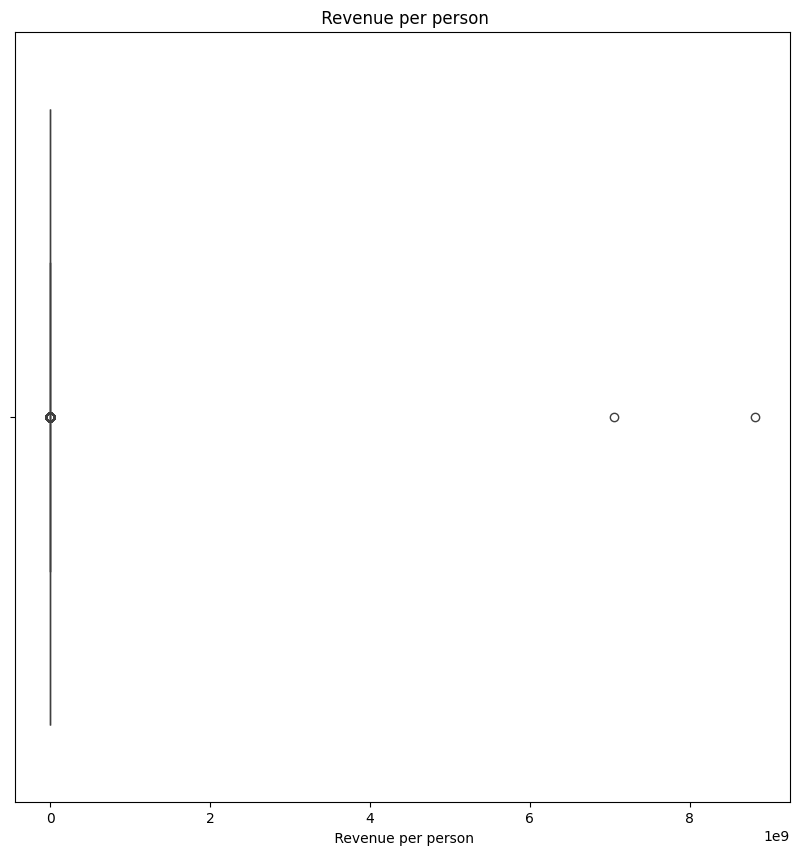

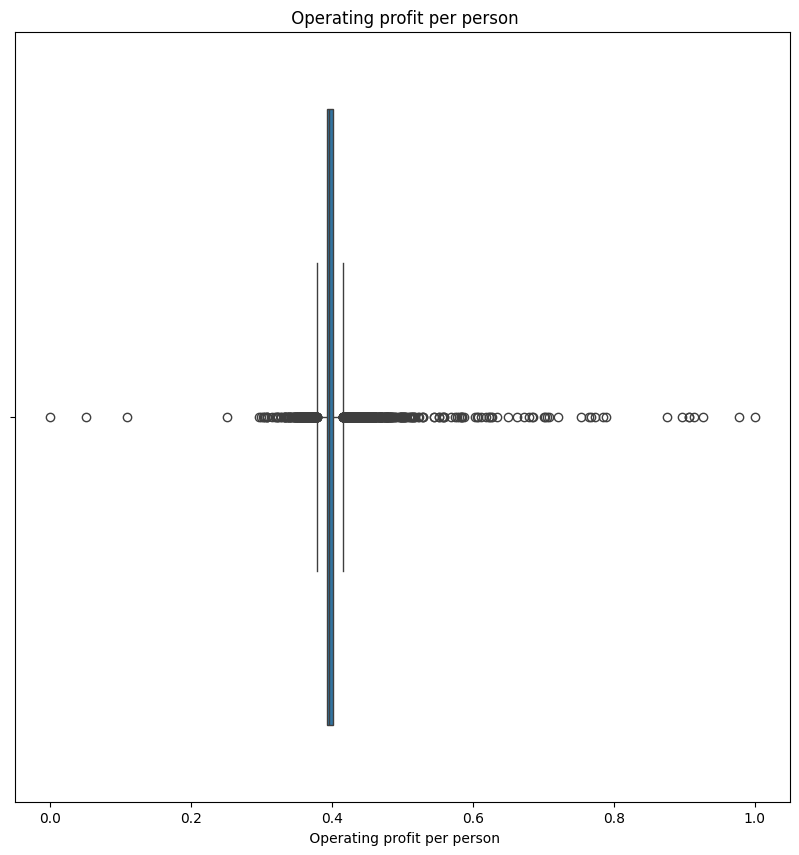

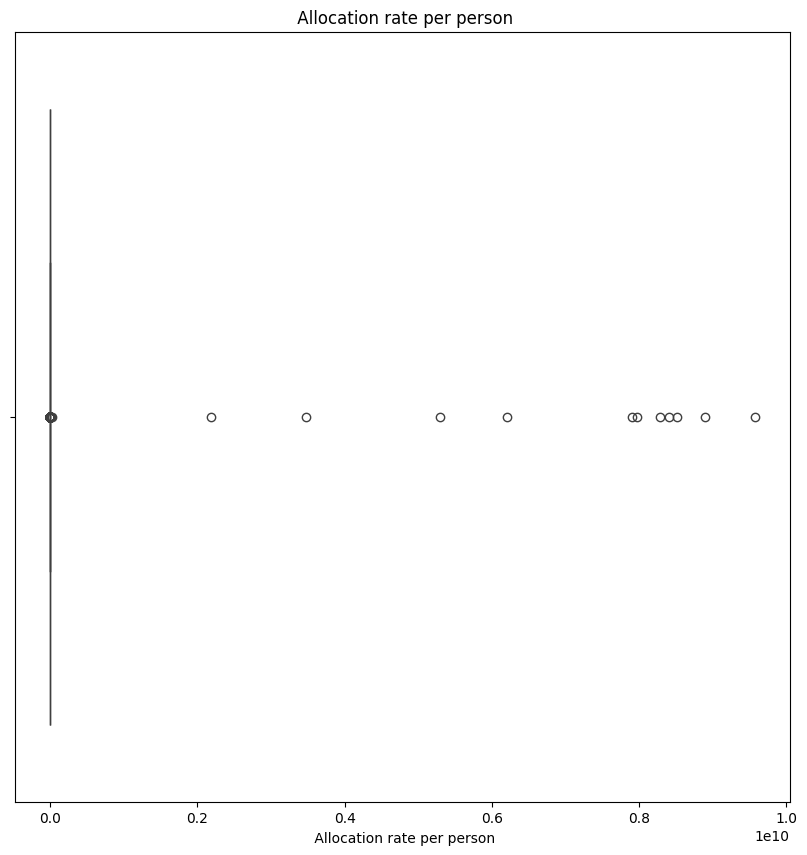

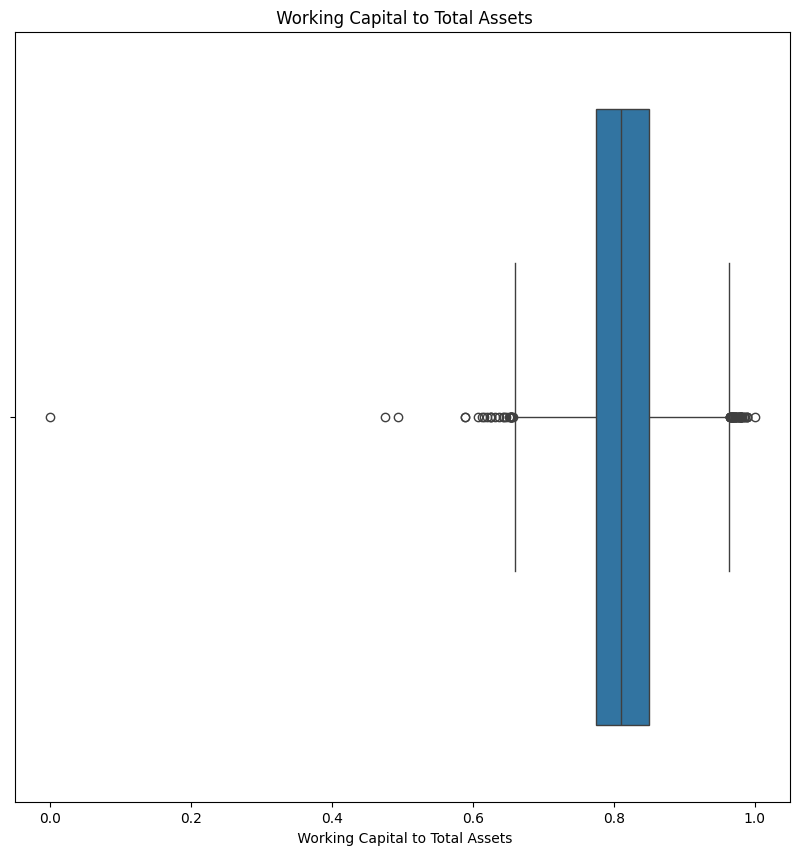

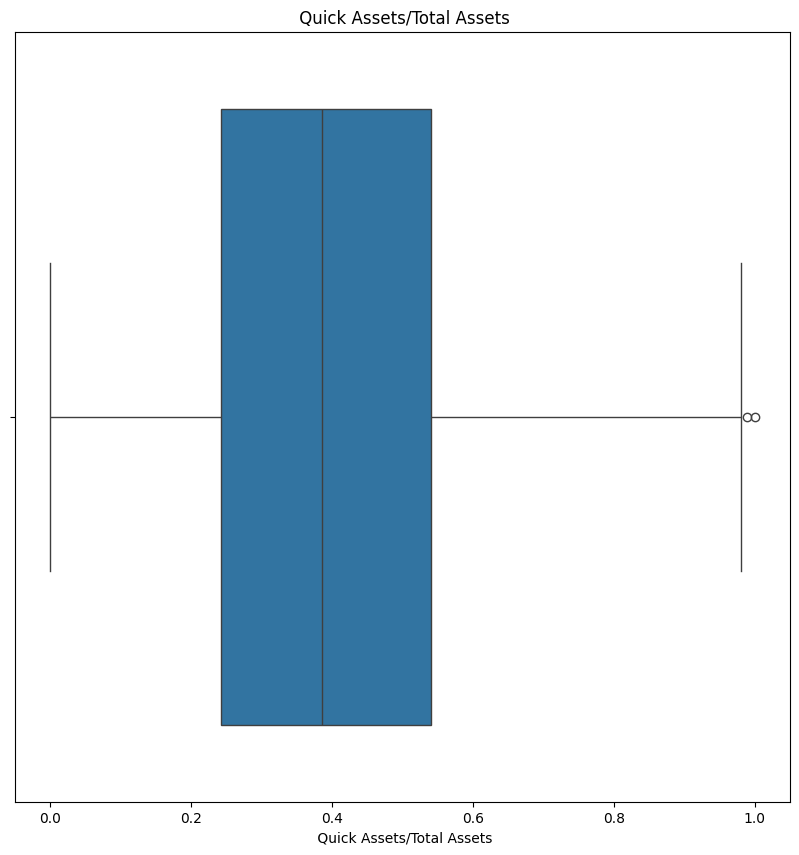

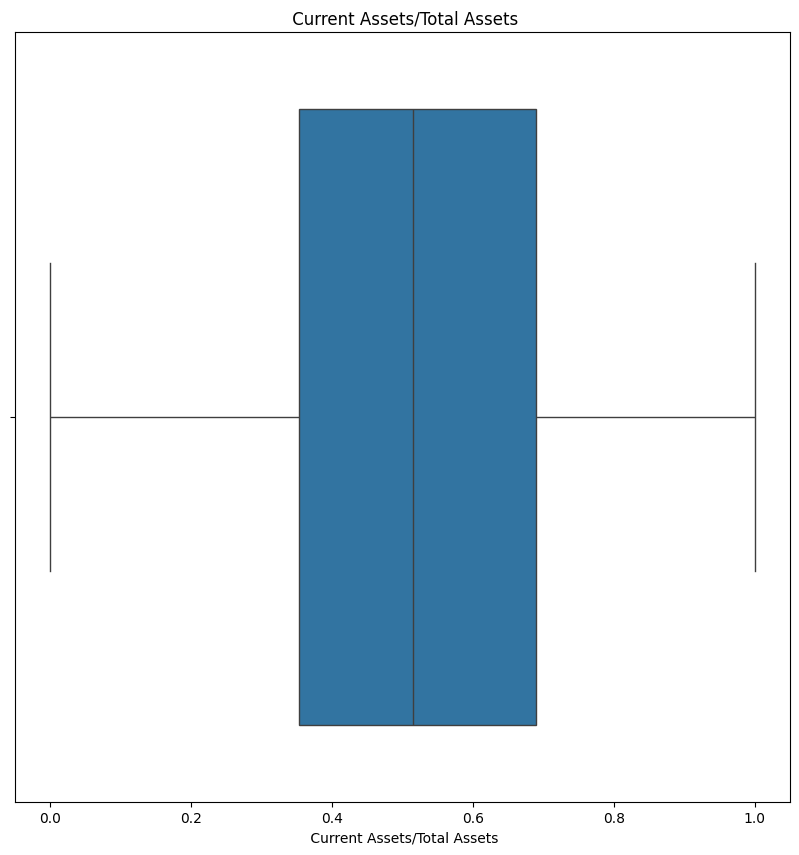

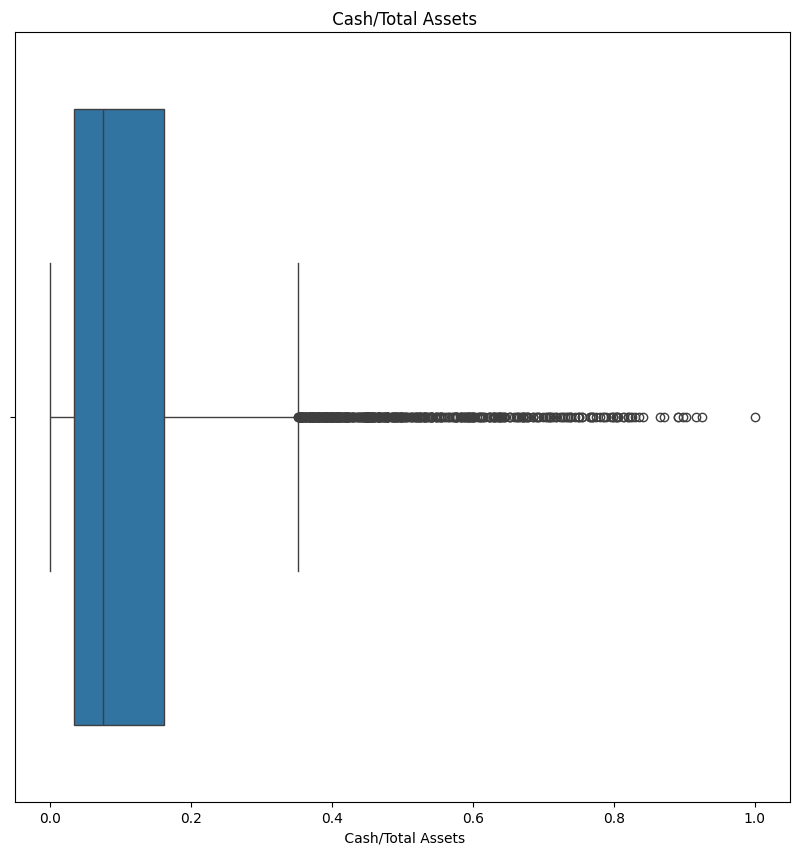

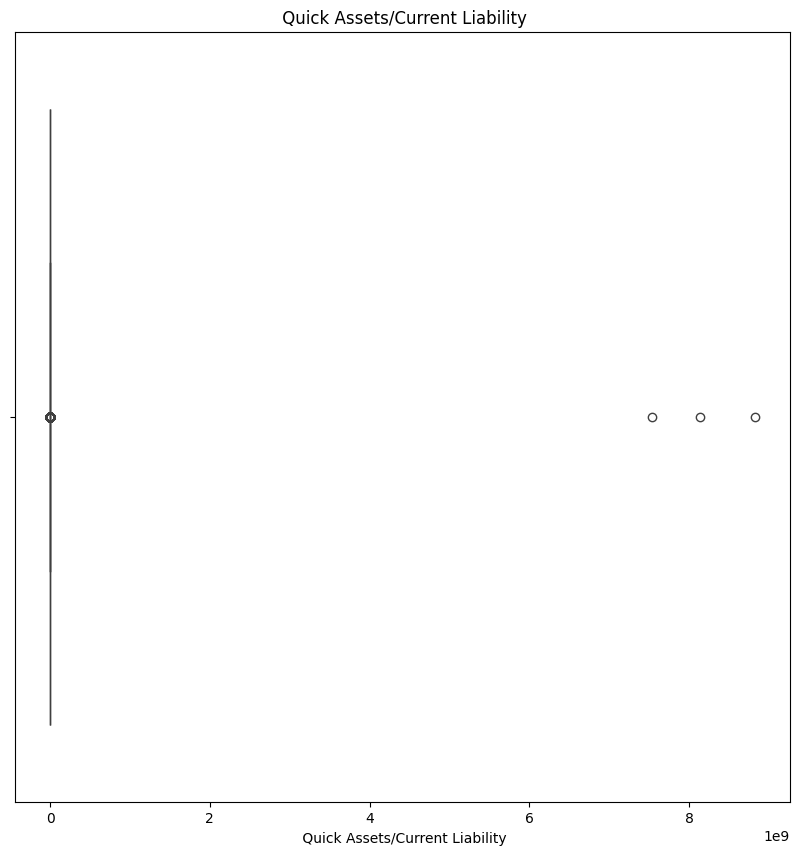

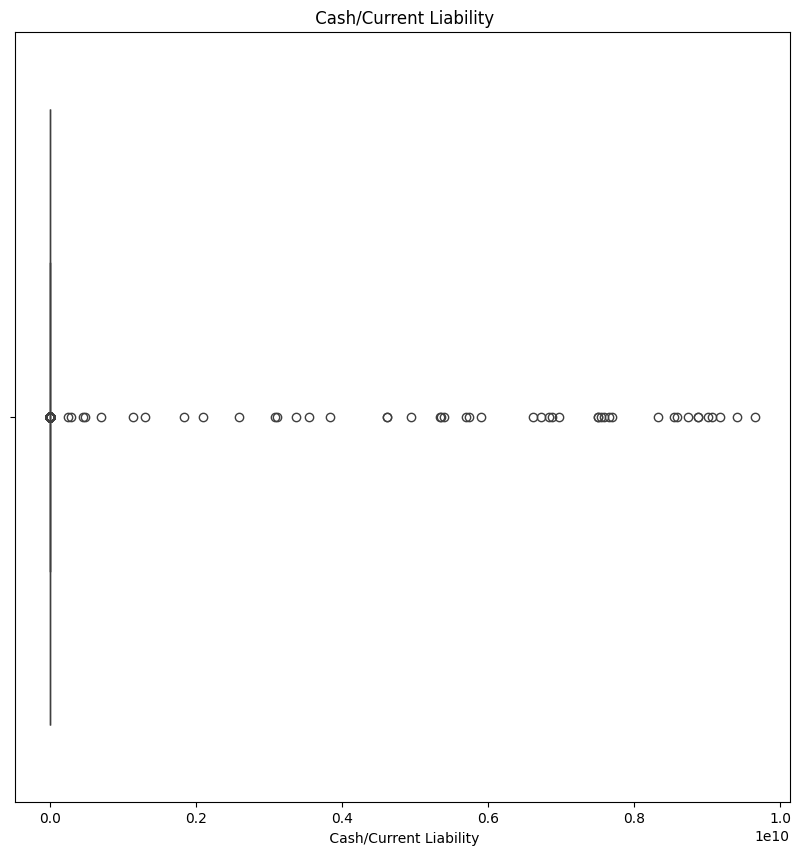

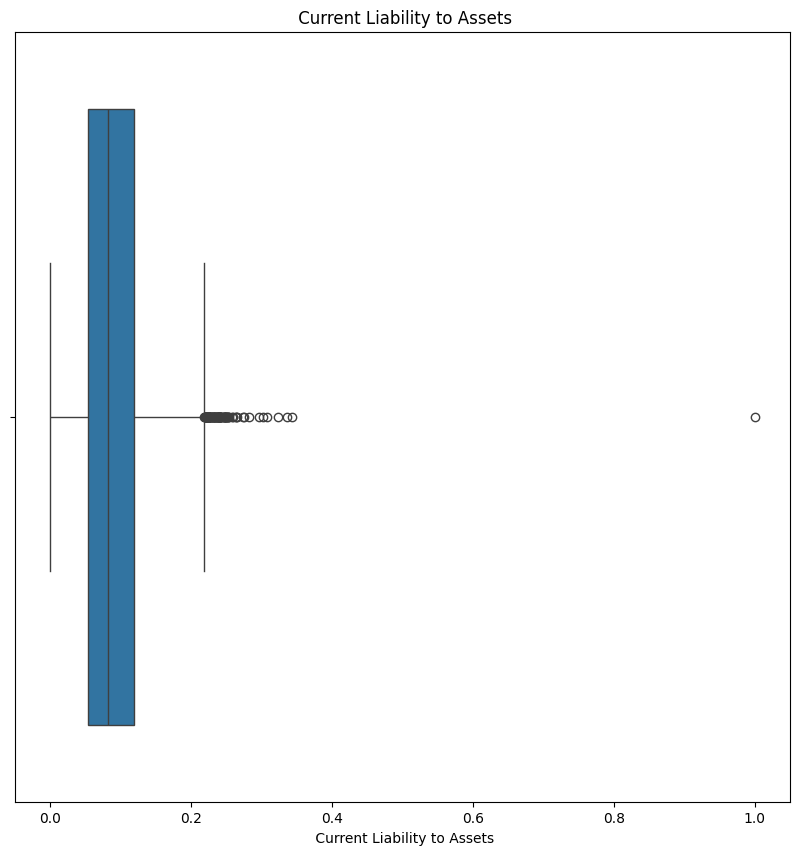

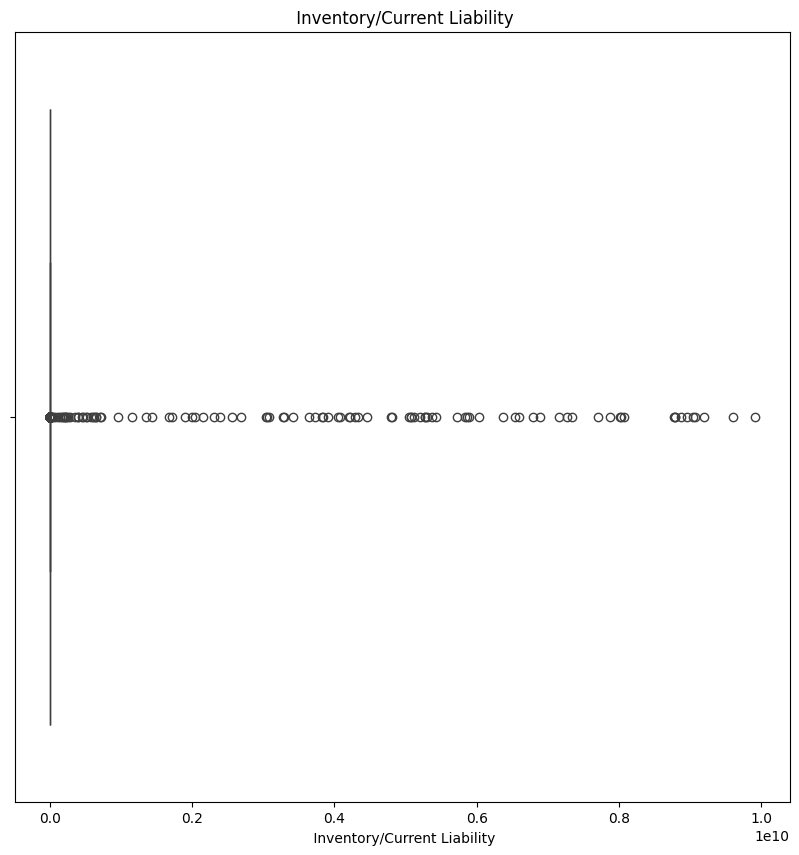

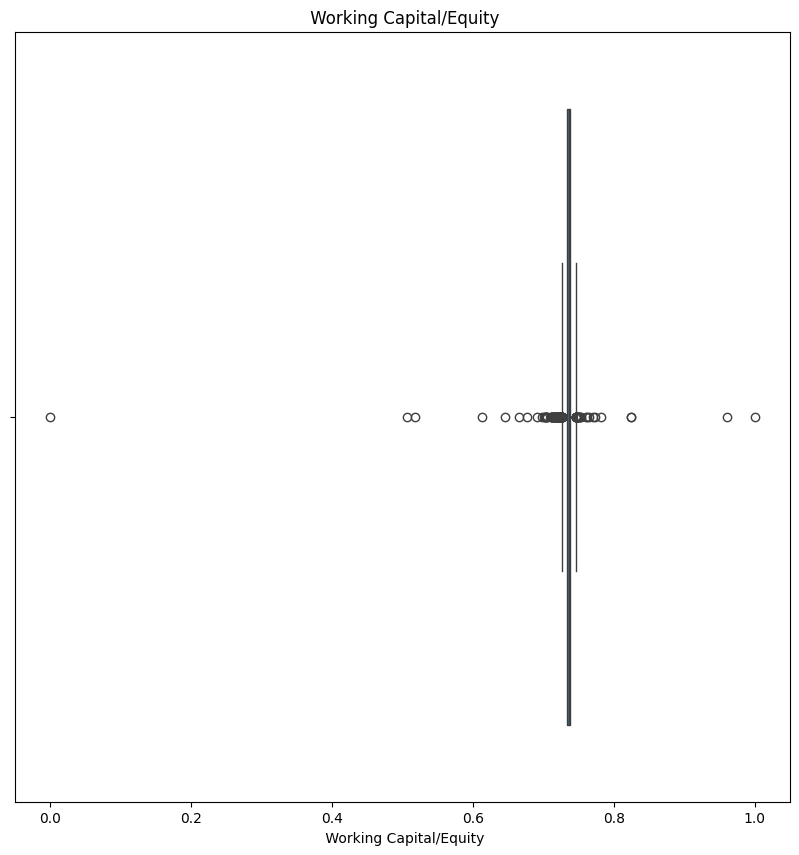

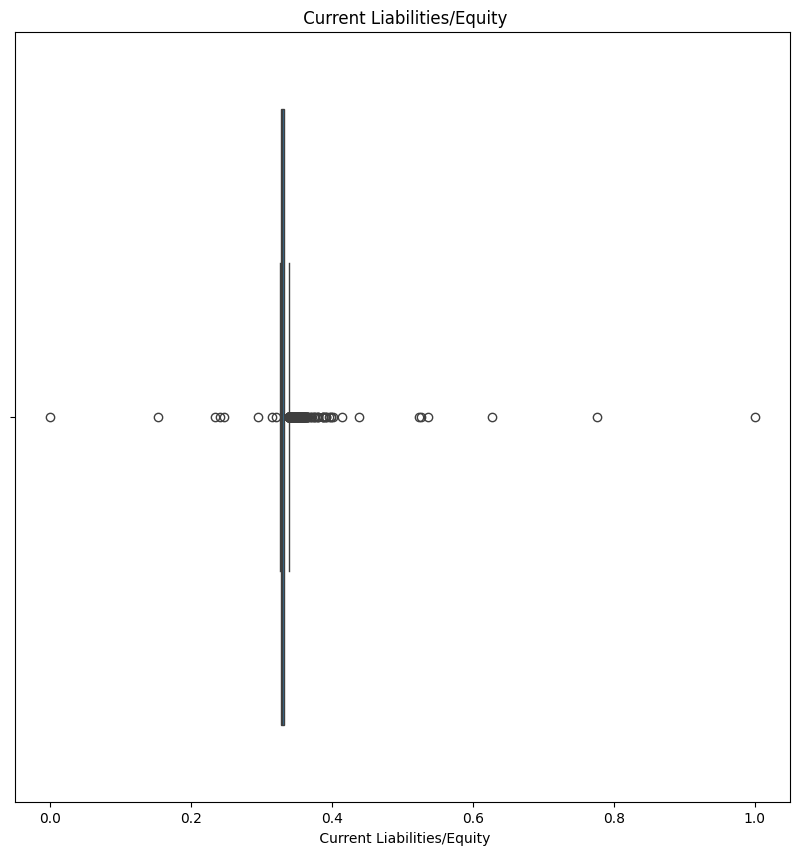

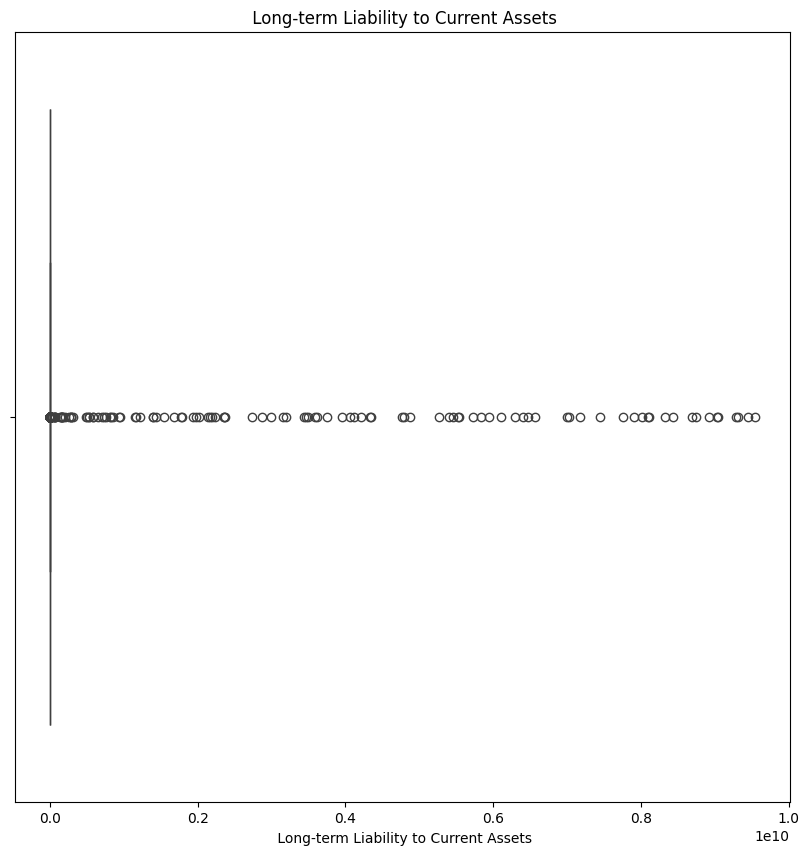

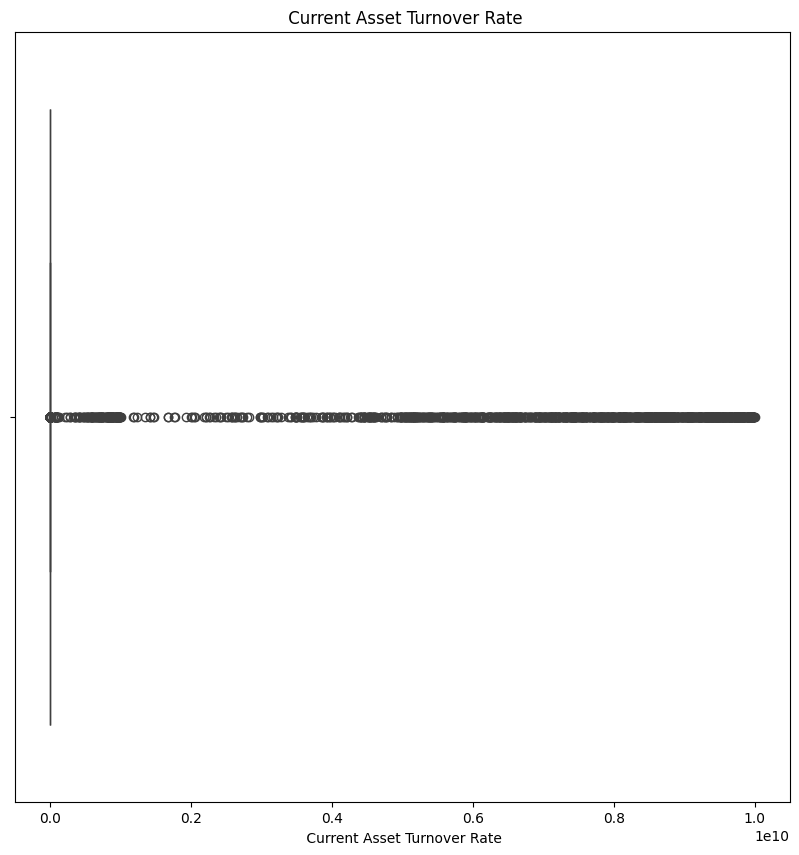

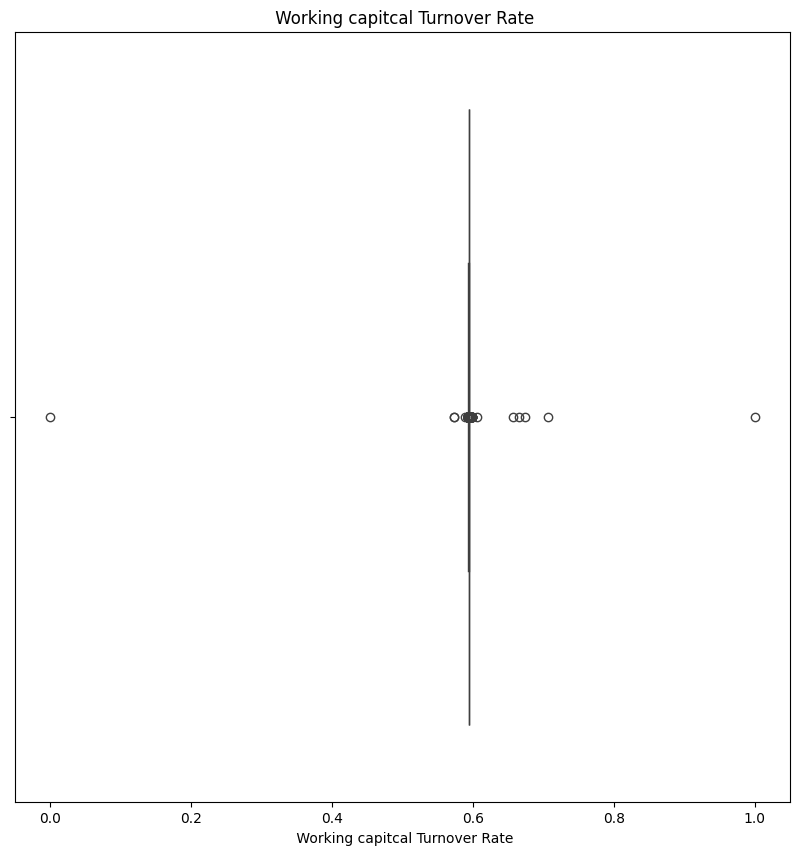

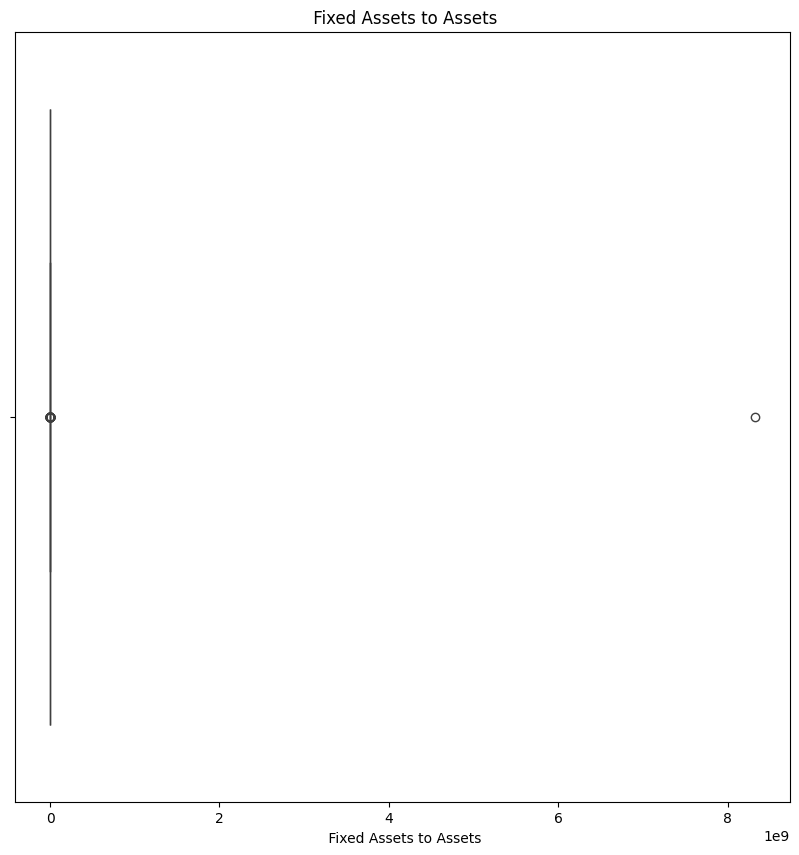

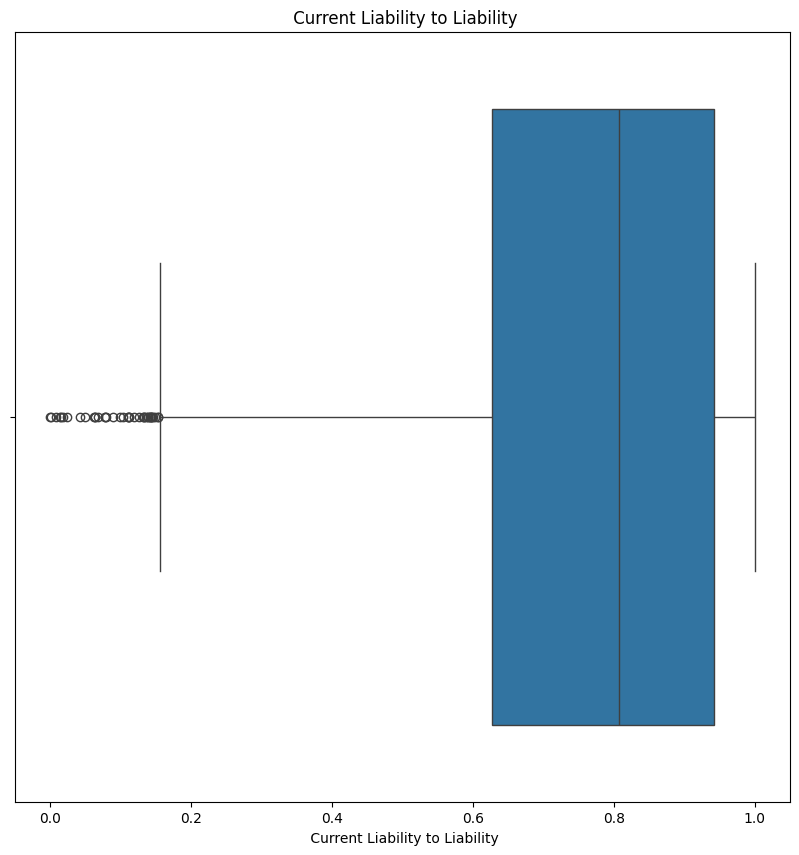

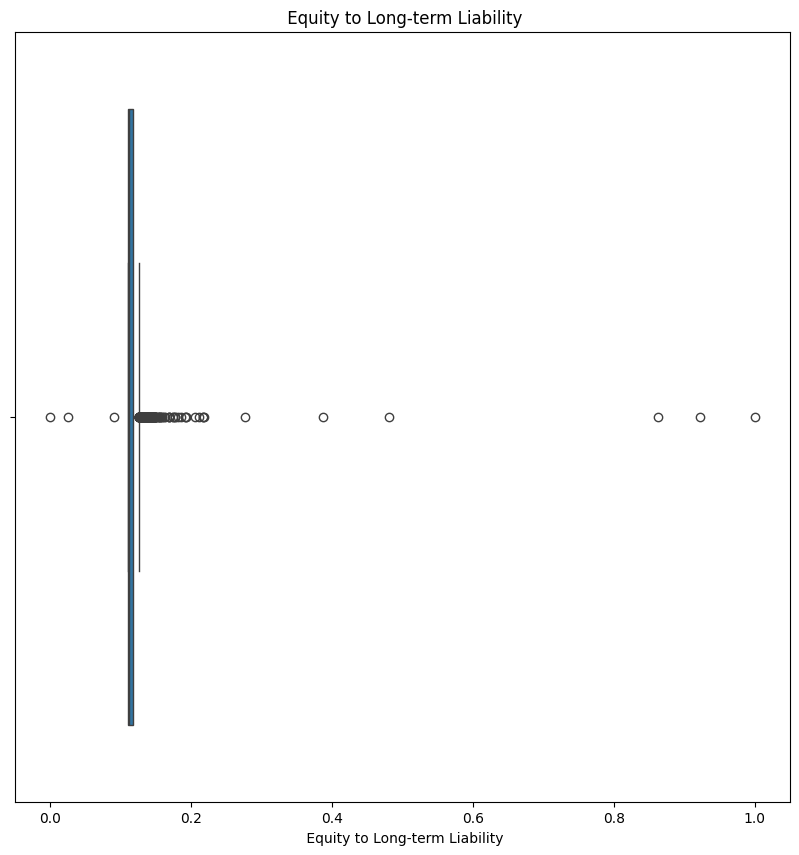

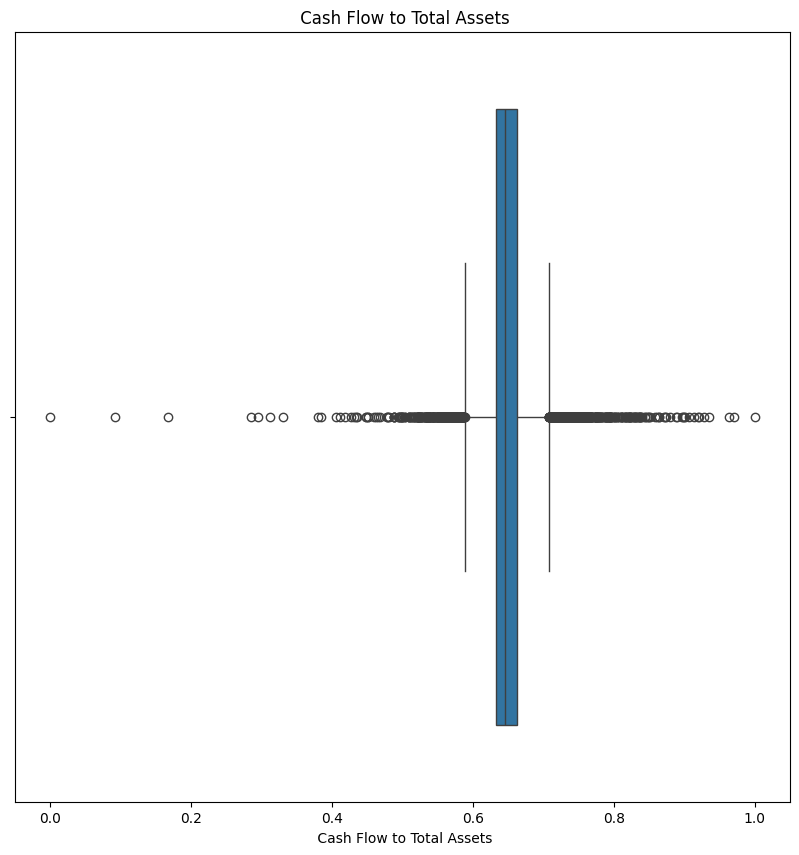

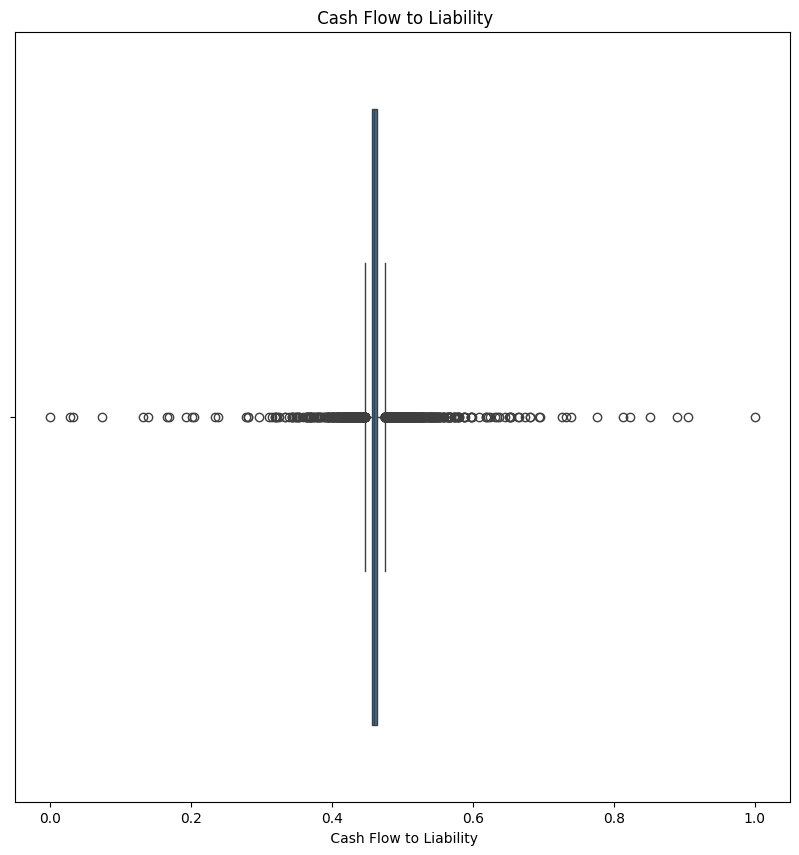

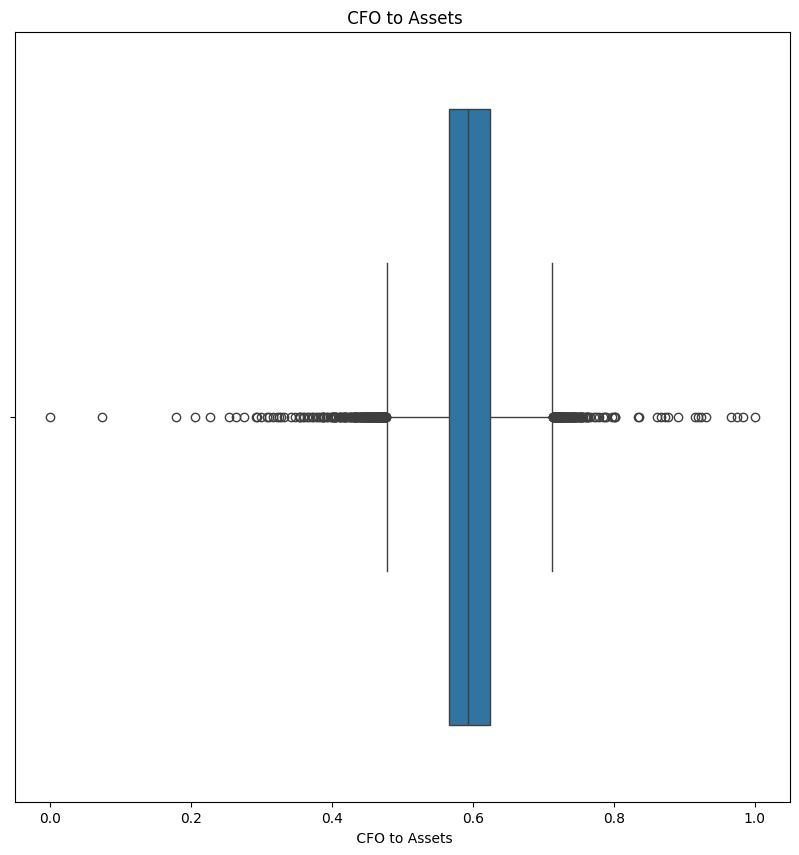

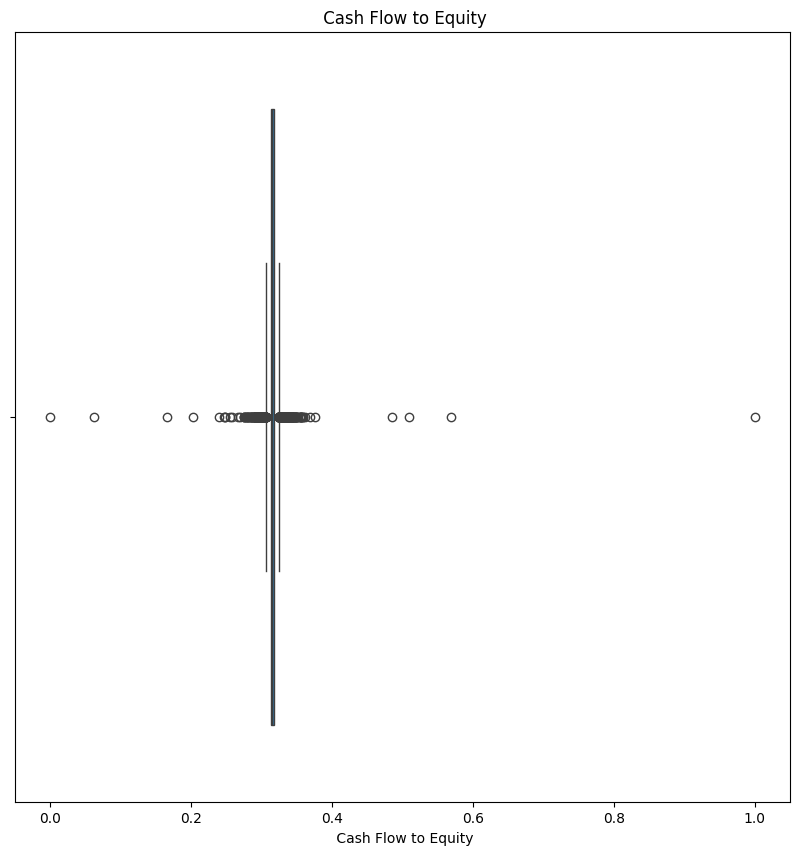

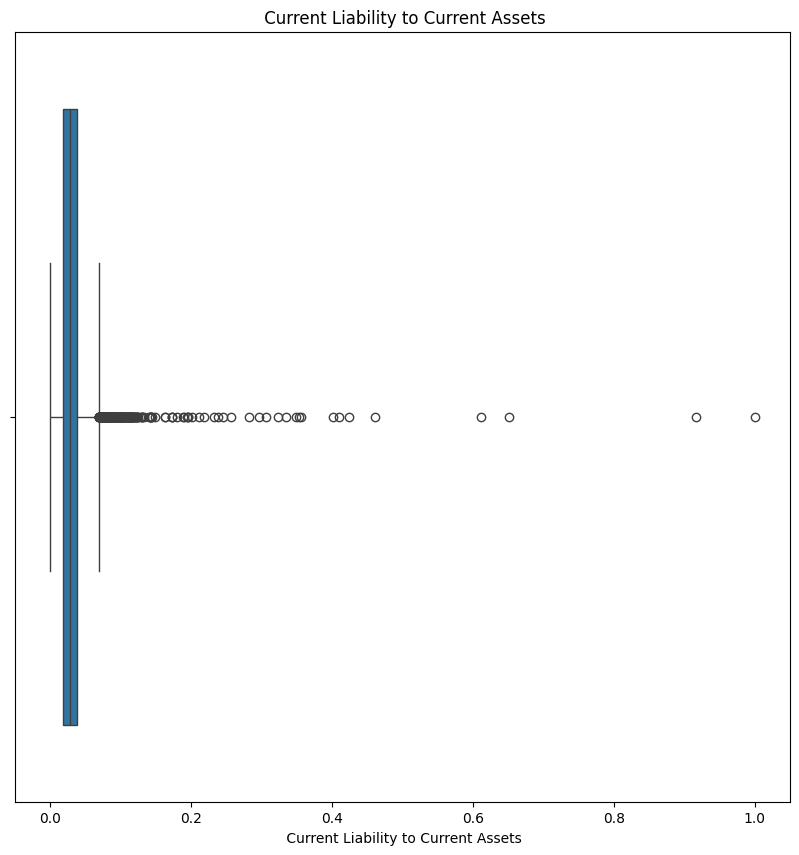

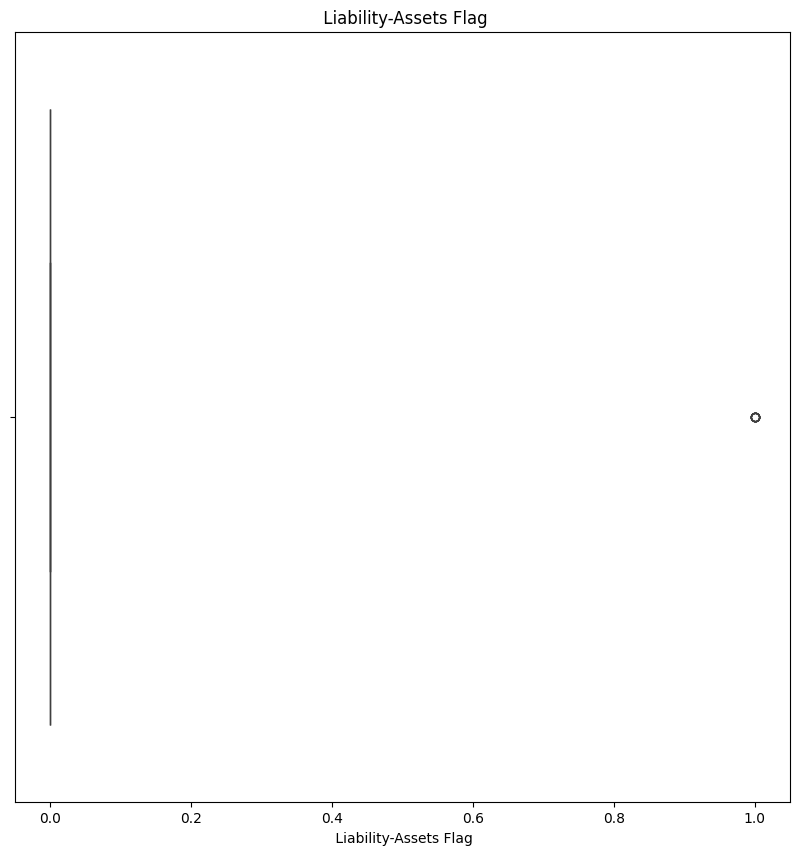

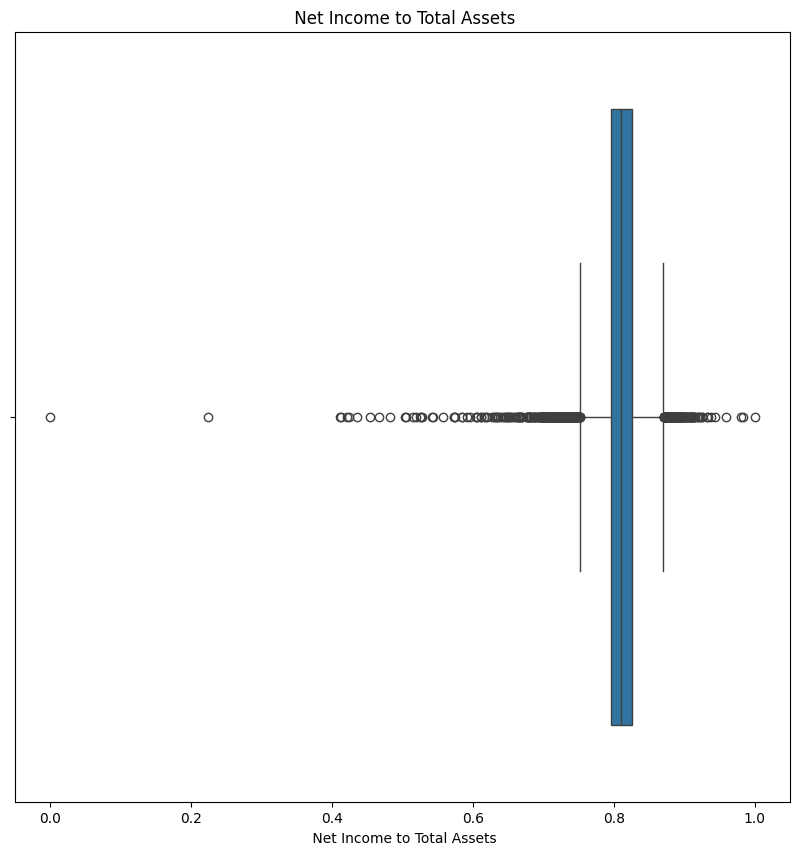

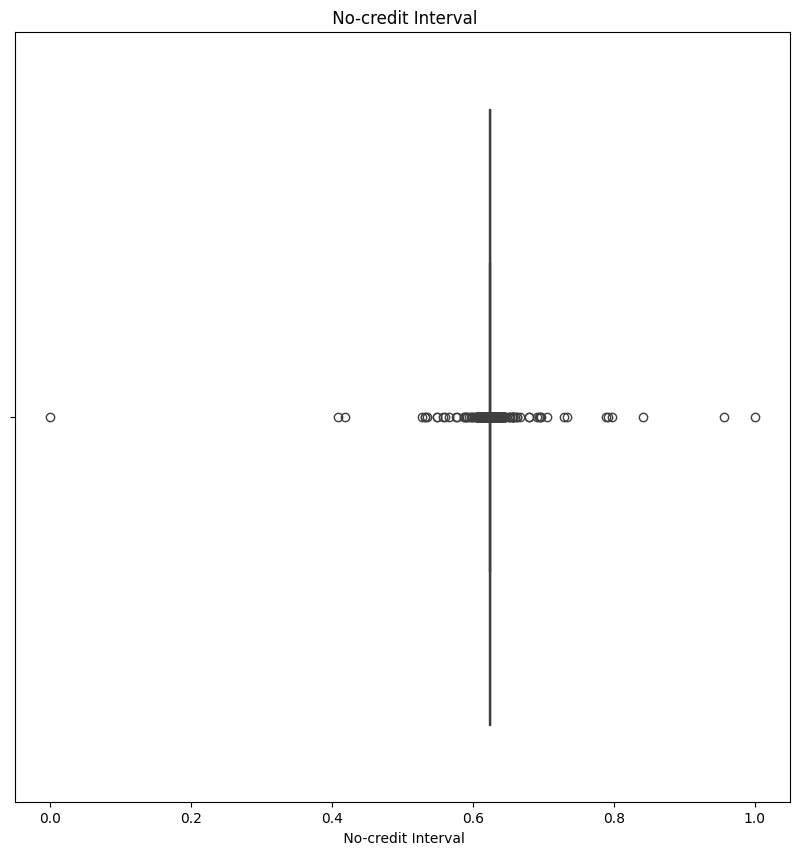

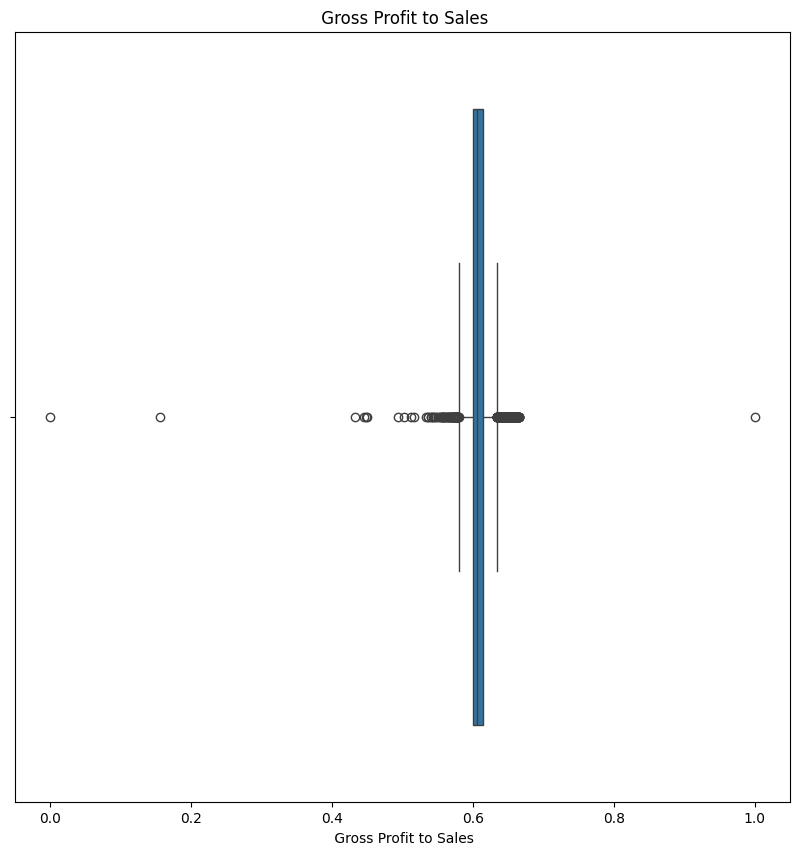

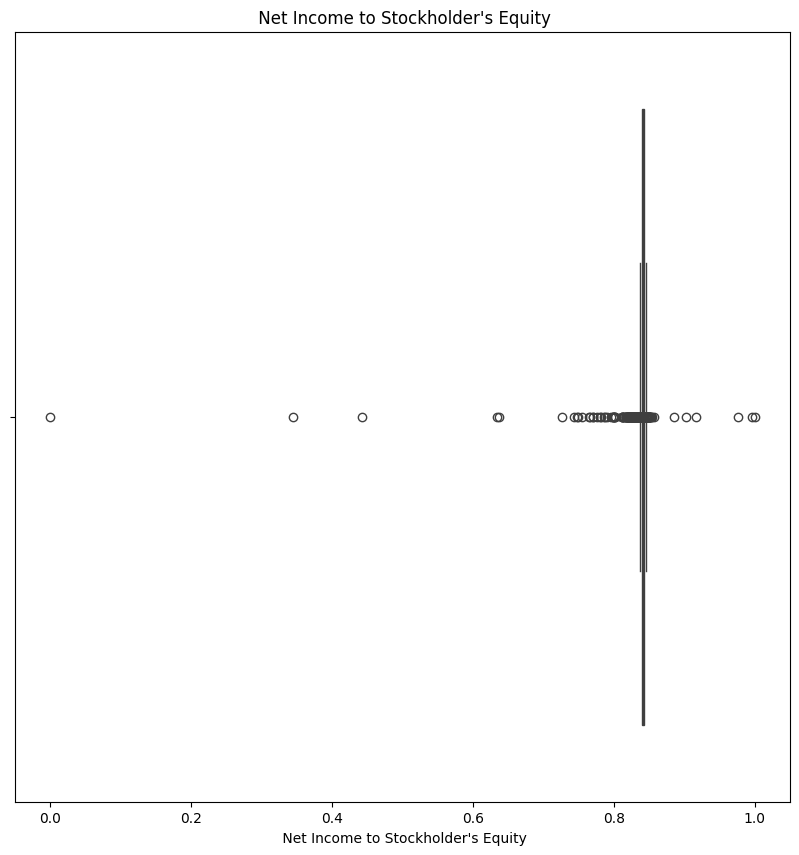

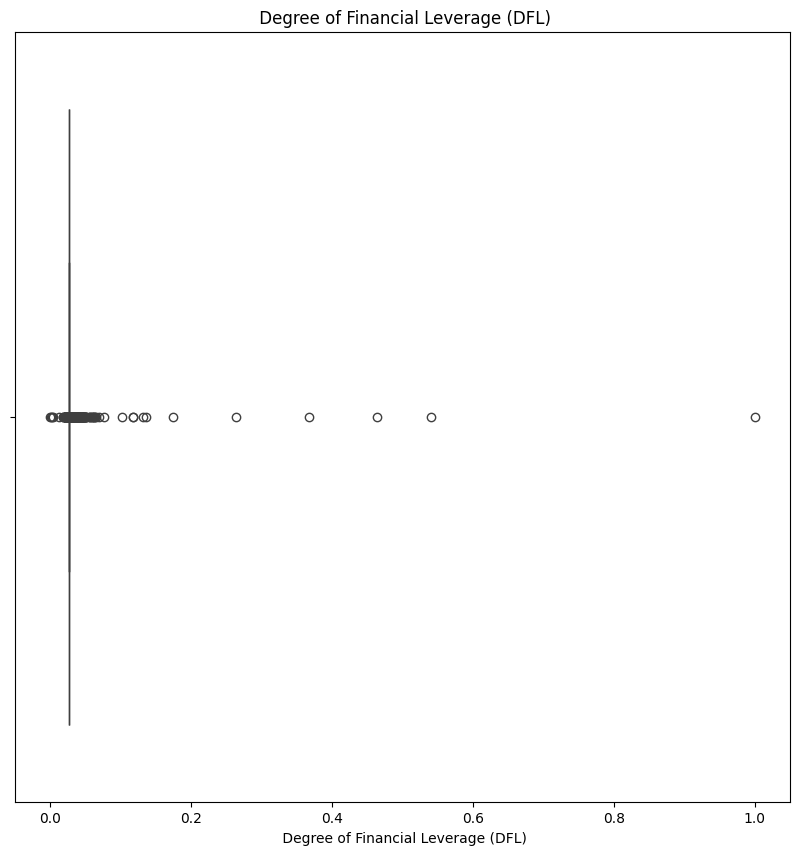

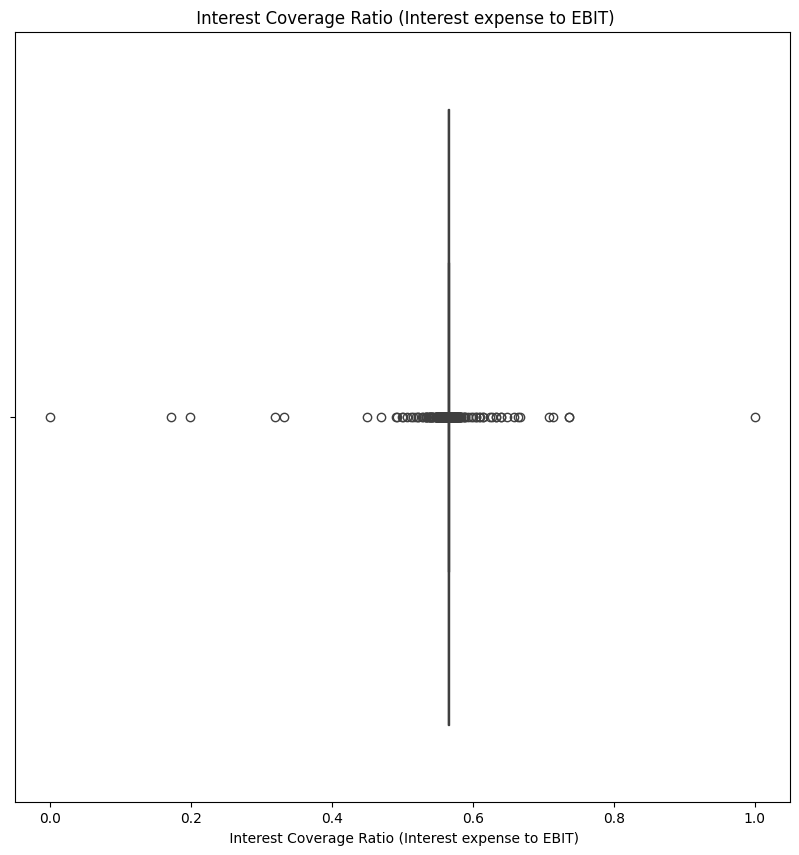

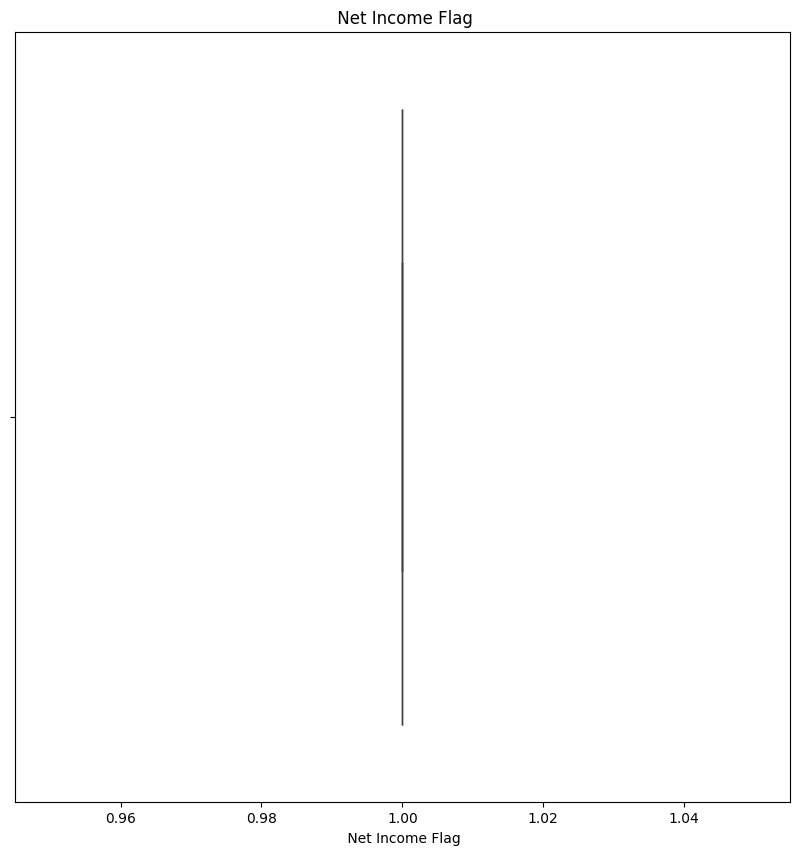

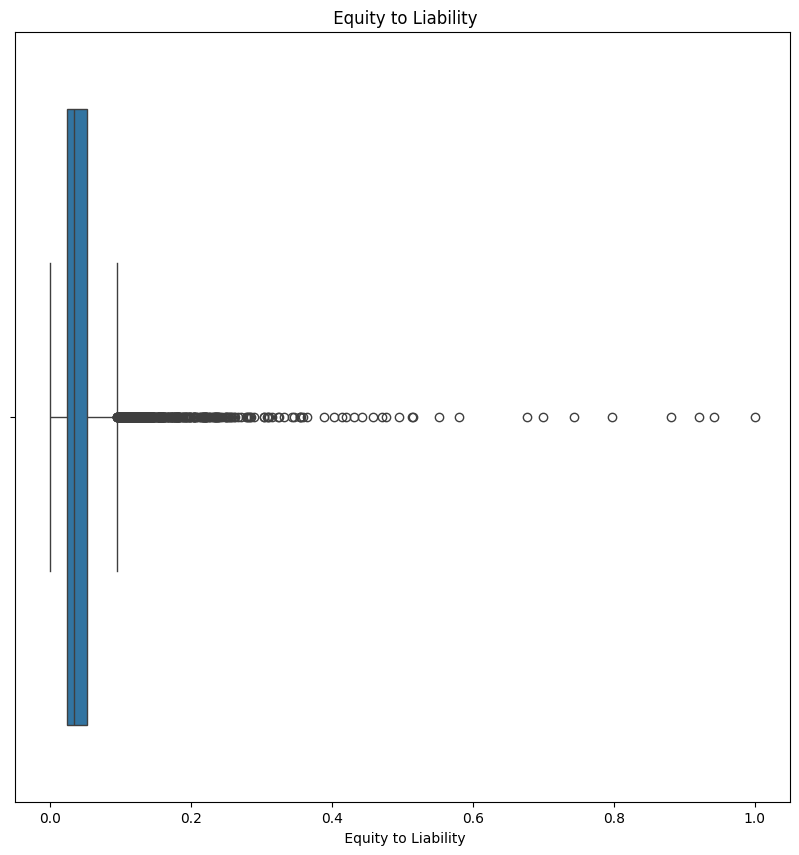

In [178]:
#finding outliers
for column in df.columns:
    plt.figure(figsize=(10, 10))
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()

In [180]:
#removing outliers
# Calculate Q1 and Q3
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Adjust outlier removal criteria (e.g., 3 * IQR instead of 1.5 * IQR)
df_filtered = df[~((df < (Q1 - 3 * IQR)) | (df > (Q3 + 3 * IQR))).any(axis=1)]

# Check the class distribution after filtering
print(df_filtered['Bankrupt'].value_counts())

Bankrupt
0    1379
Name: count, dtype: int64


In [181]:
#after removing outliers
df_filtered.shape

(1379, 96)

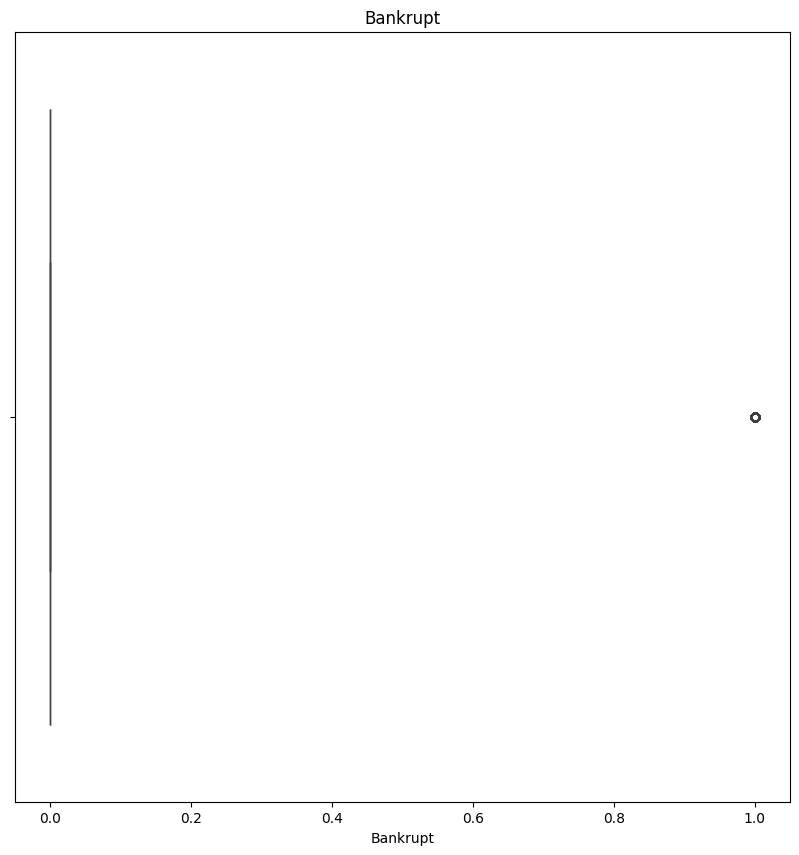

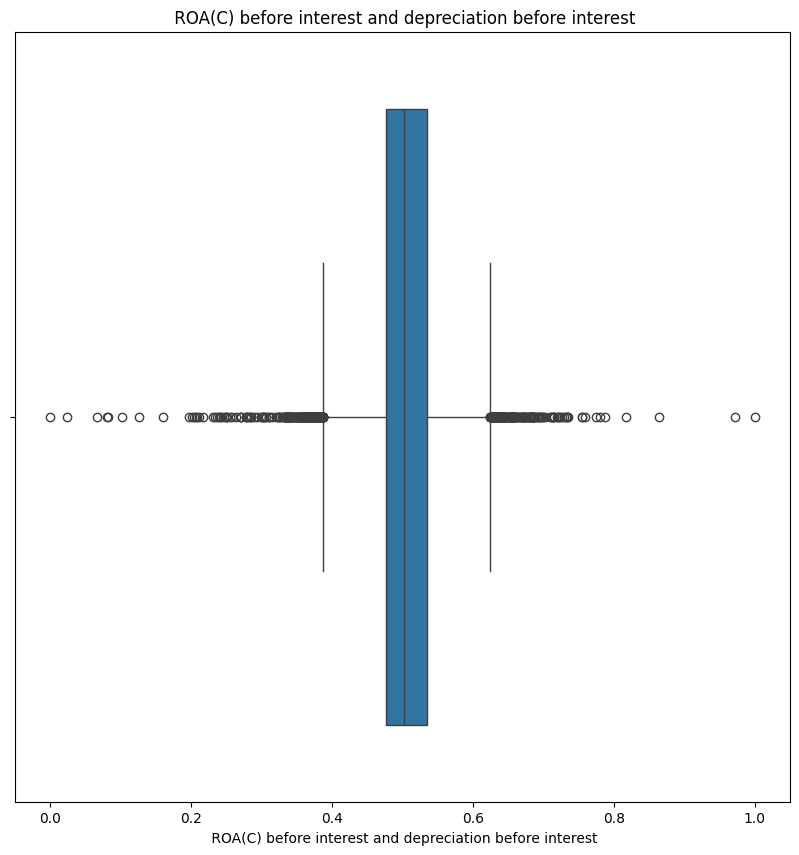

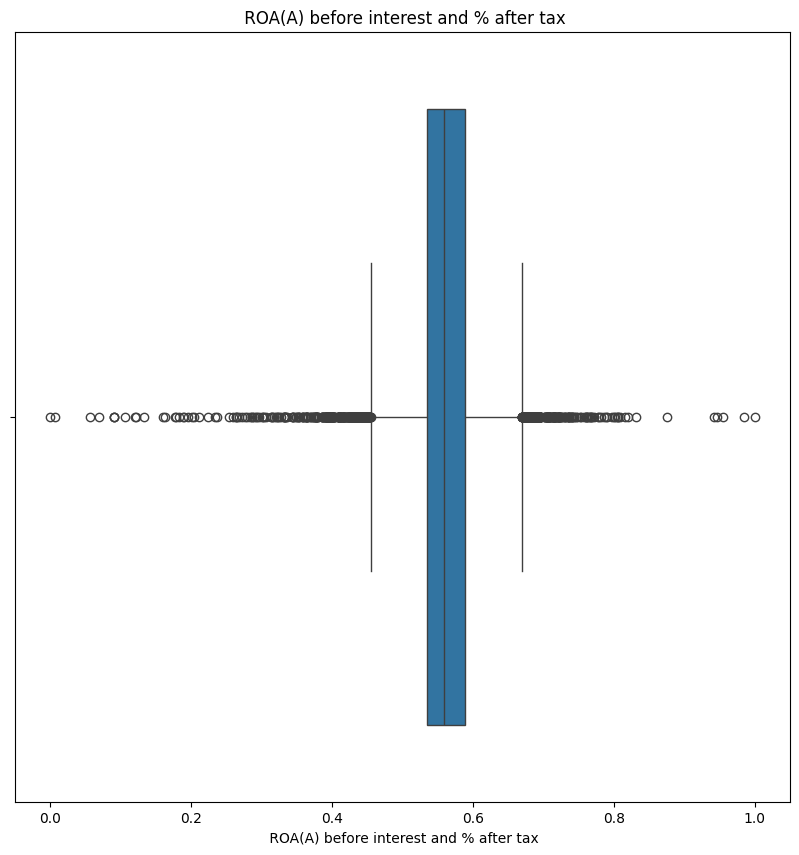

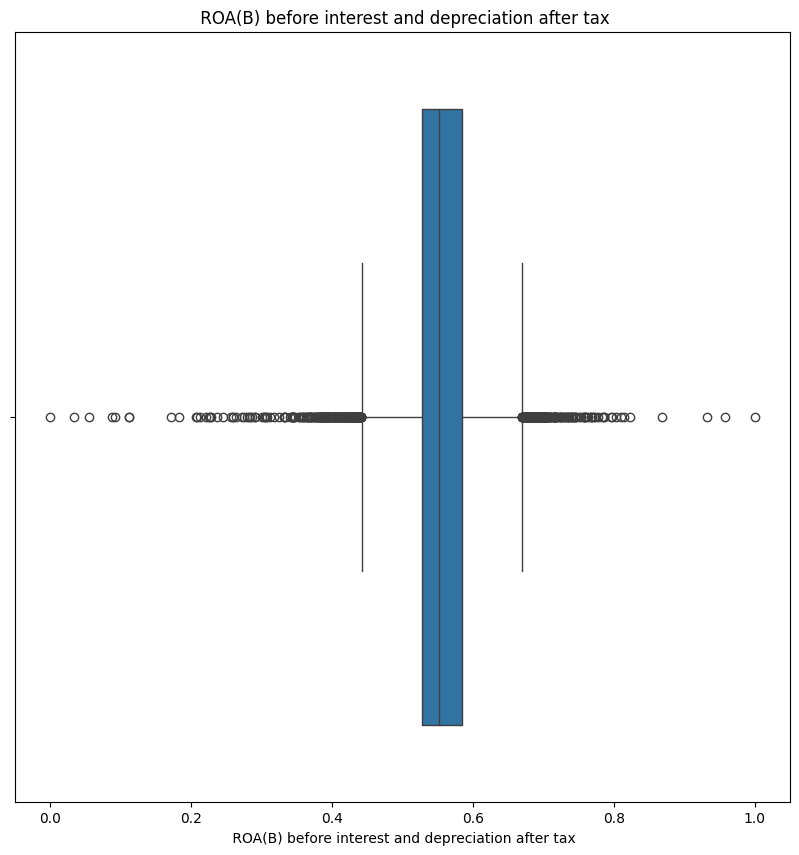

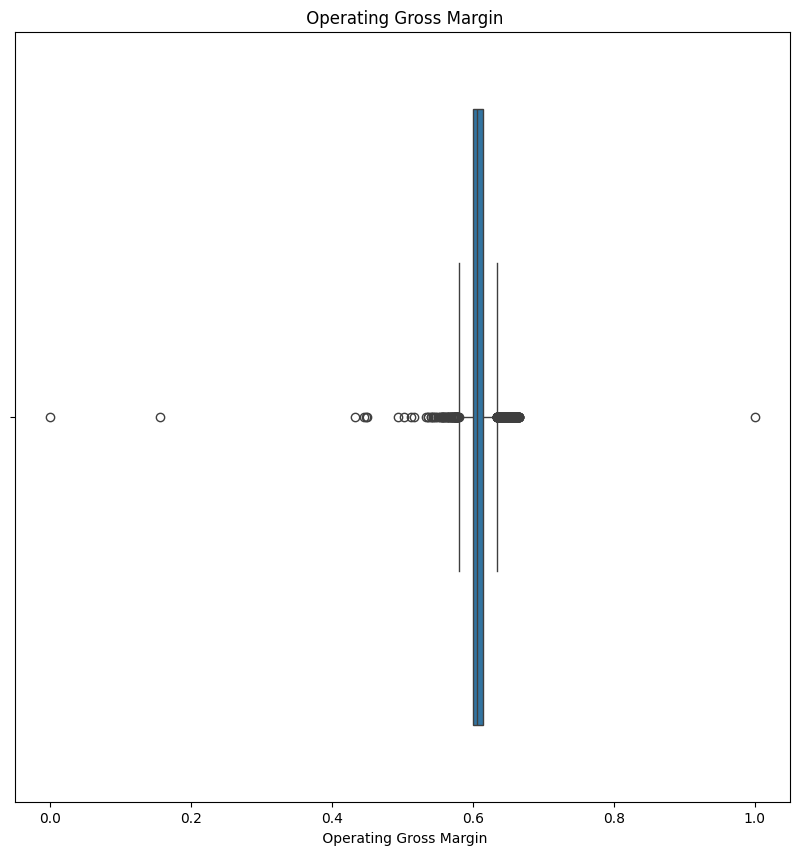

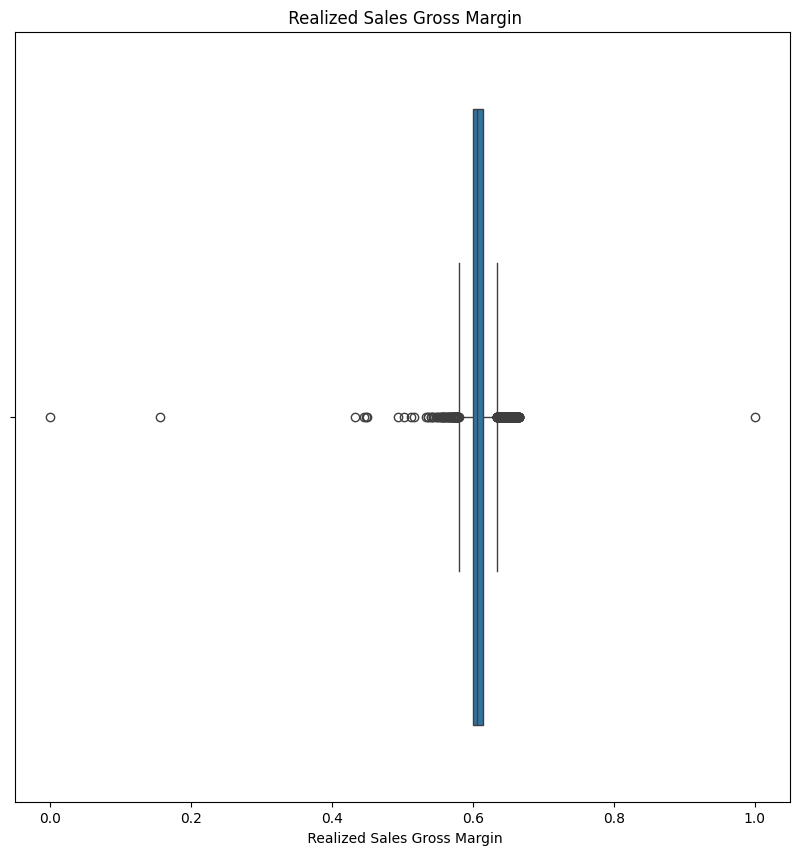

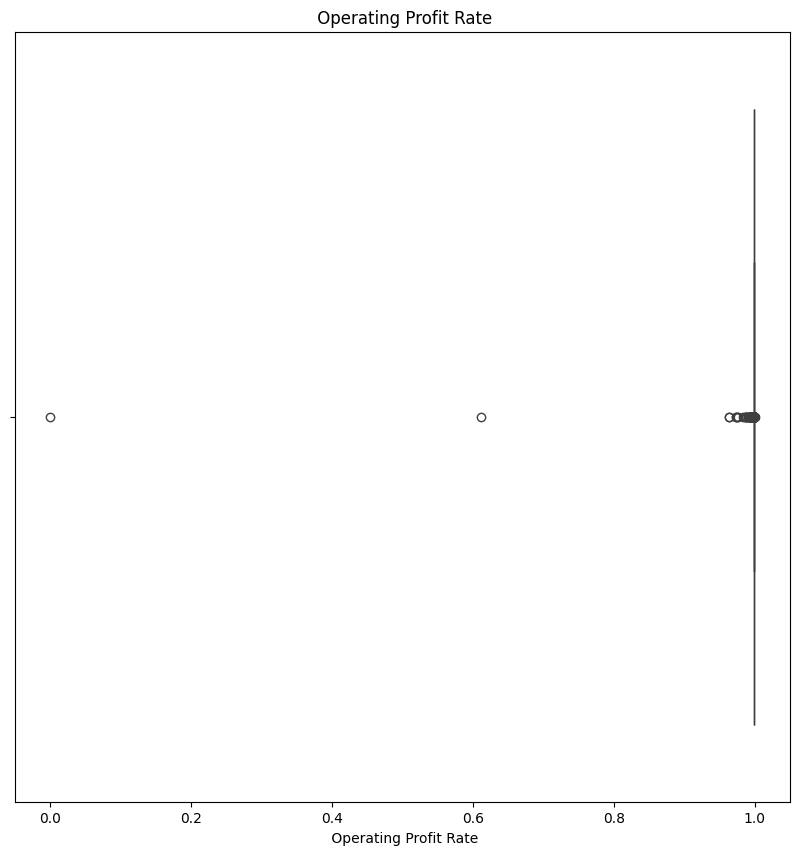

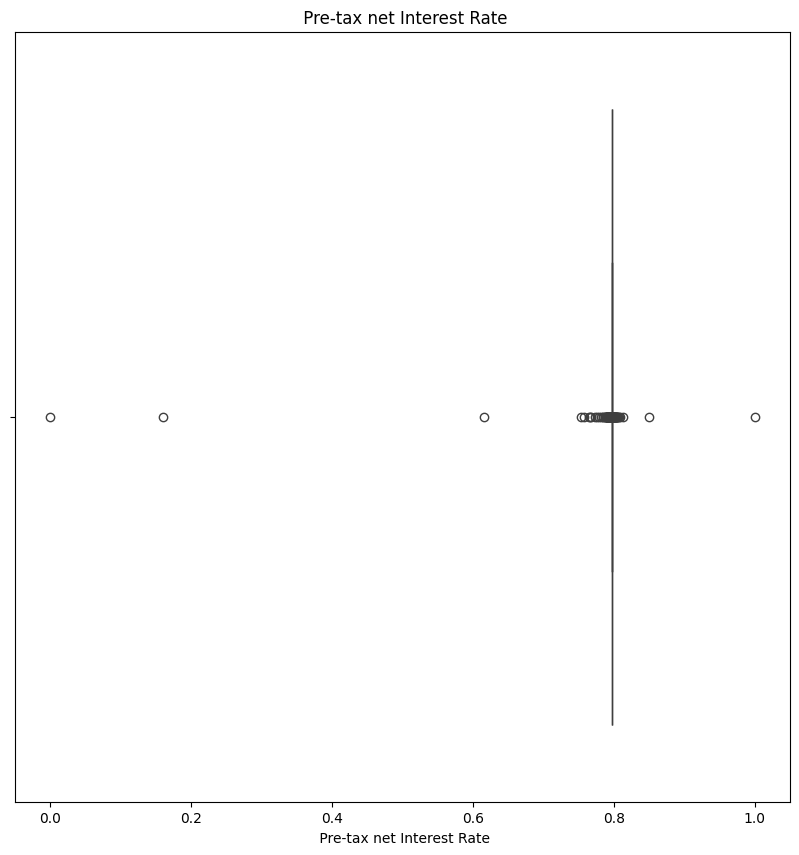

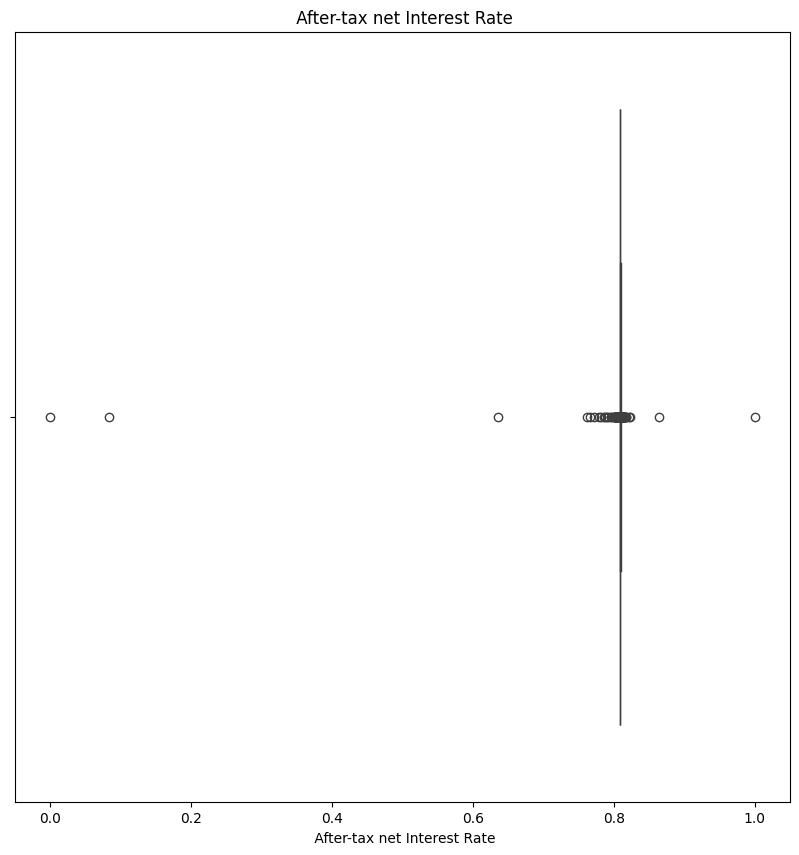

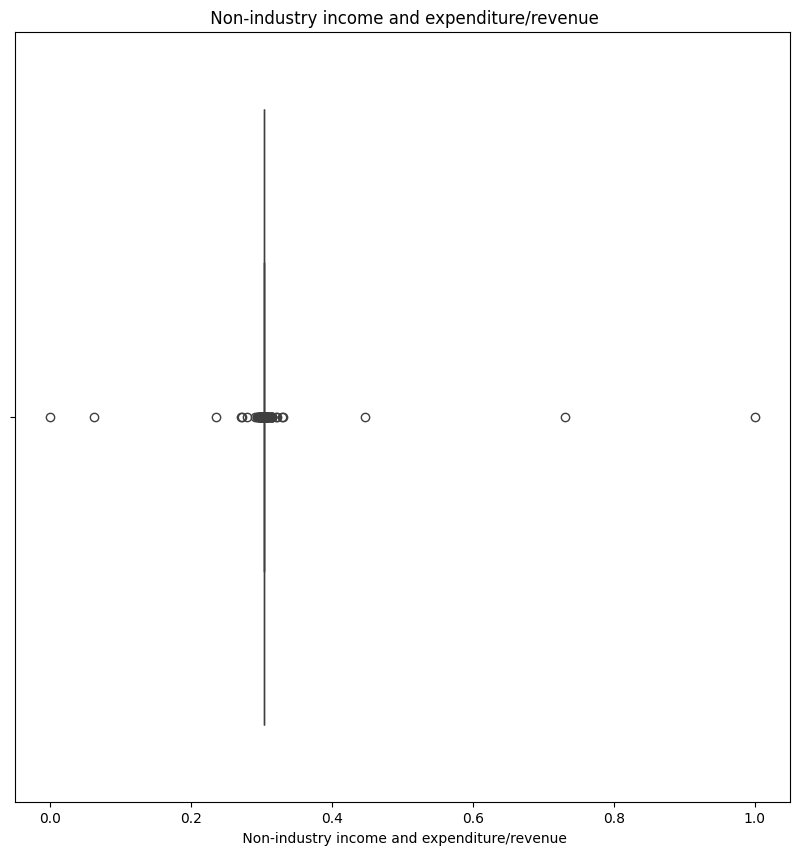

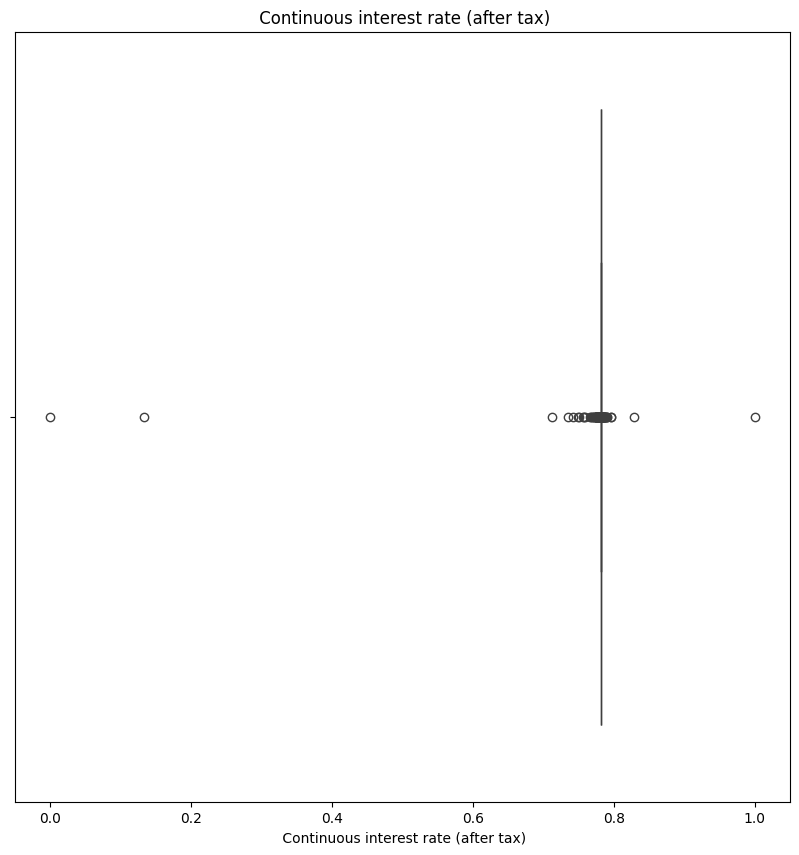

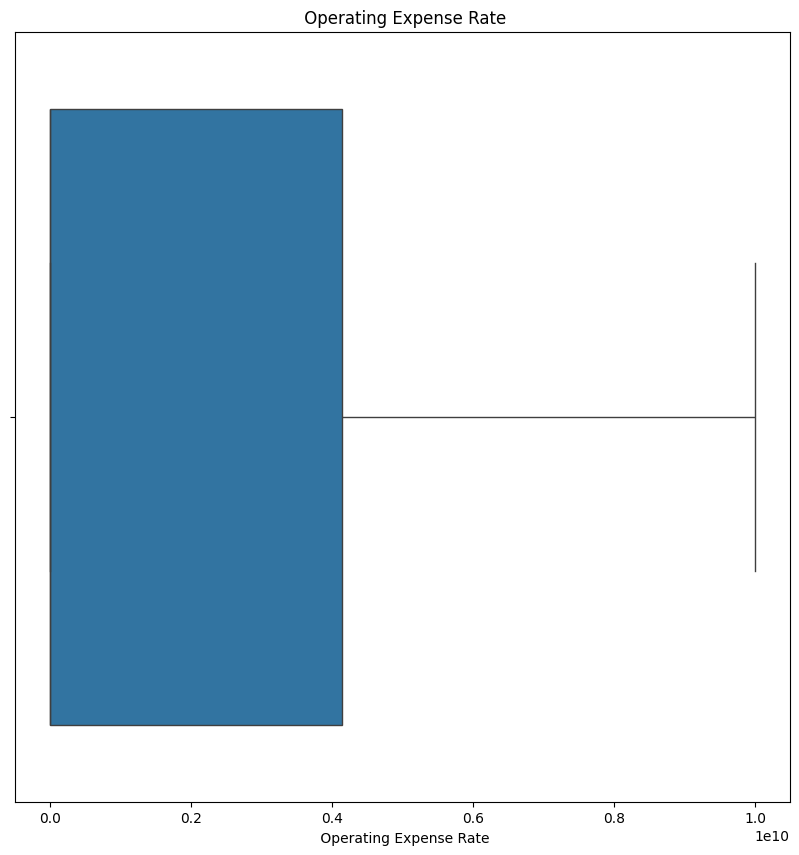

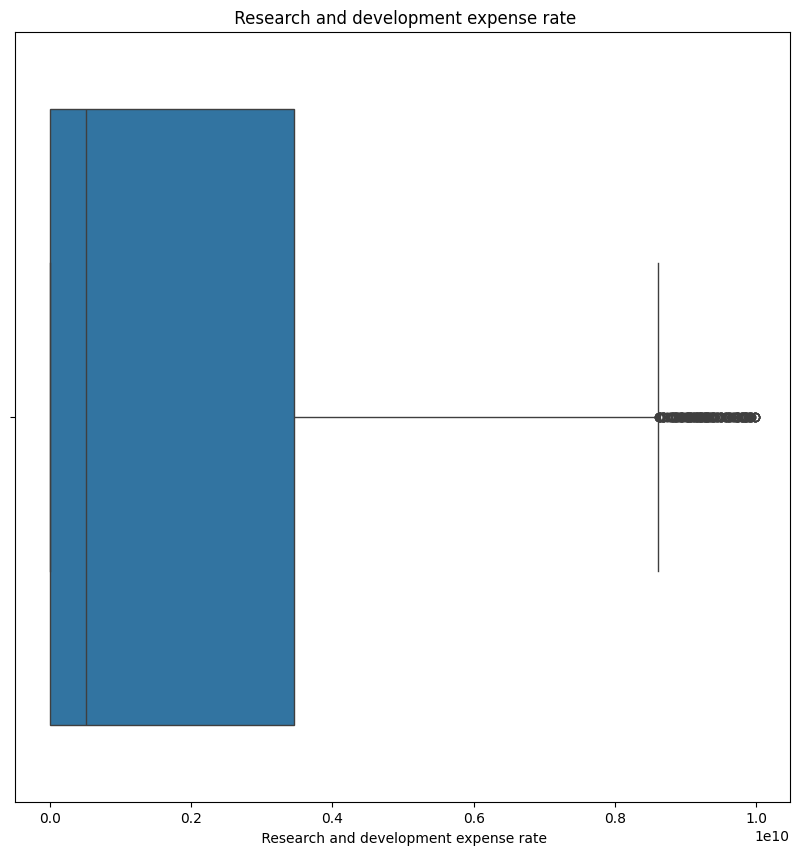

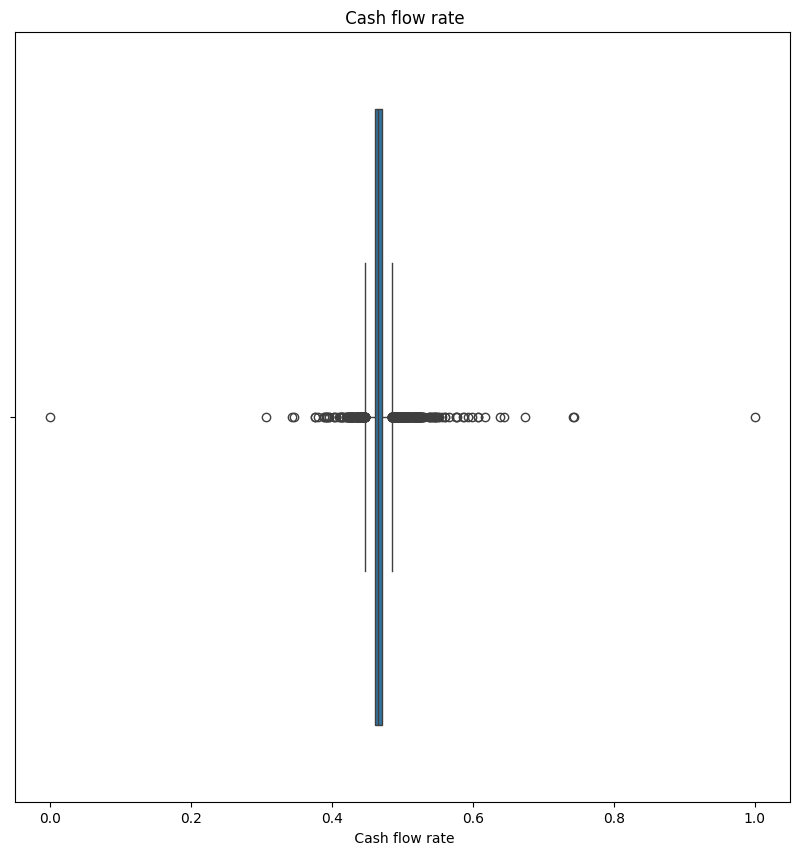

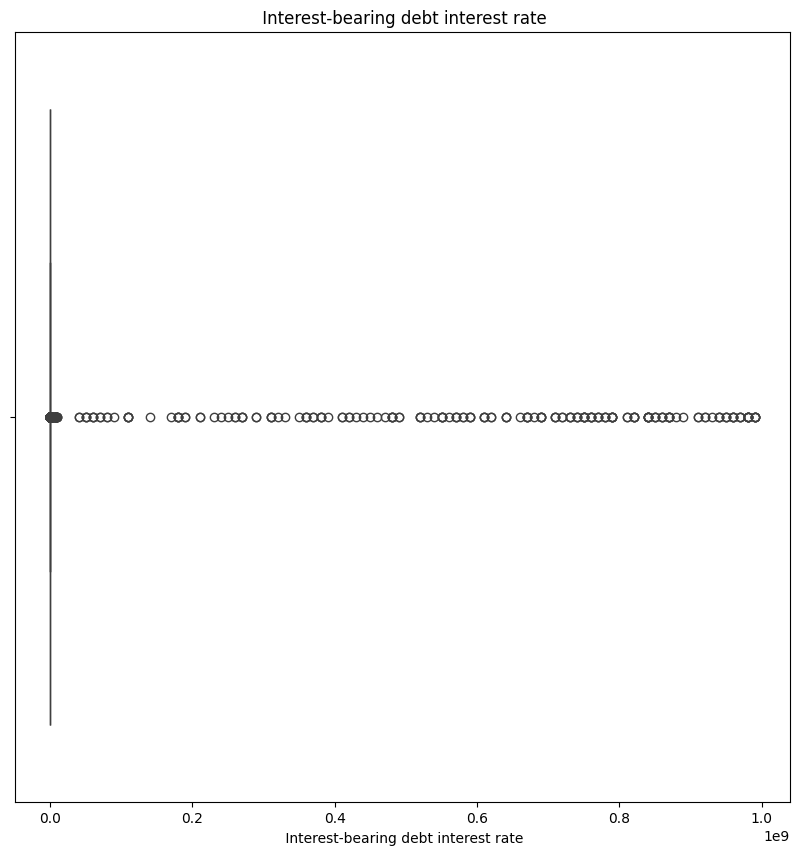

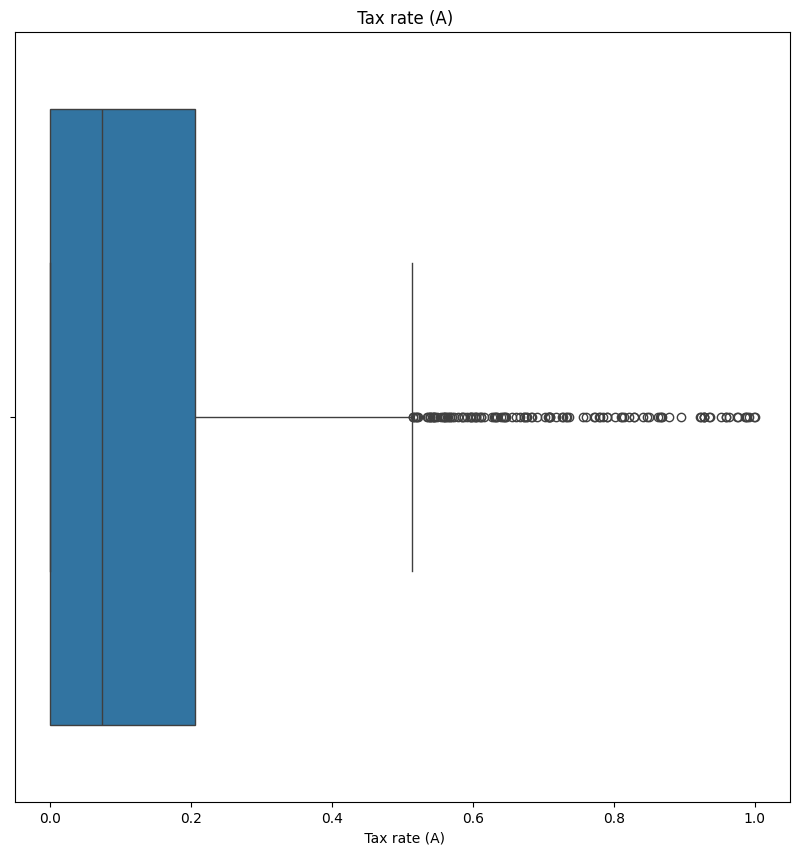

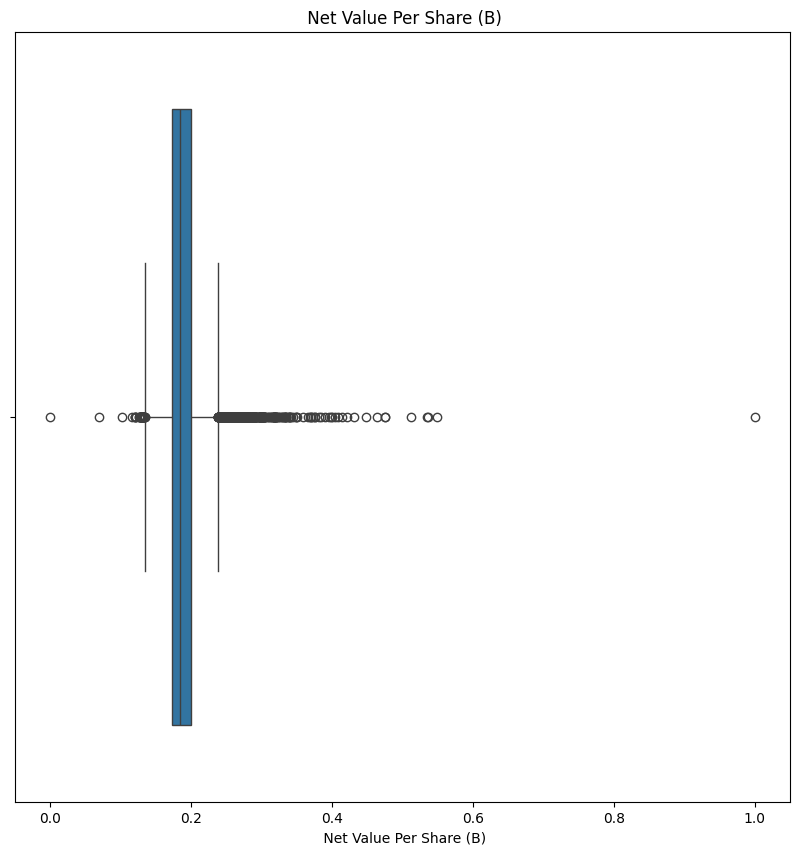

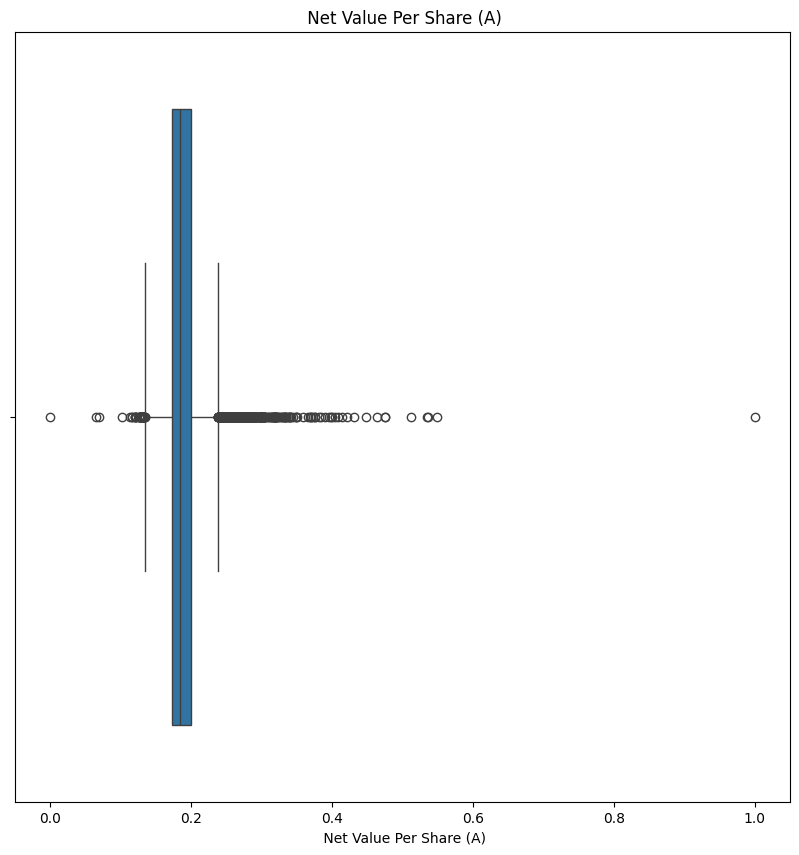

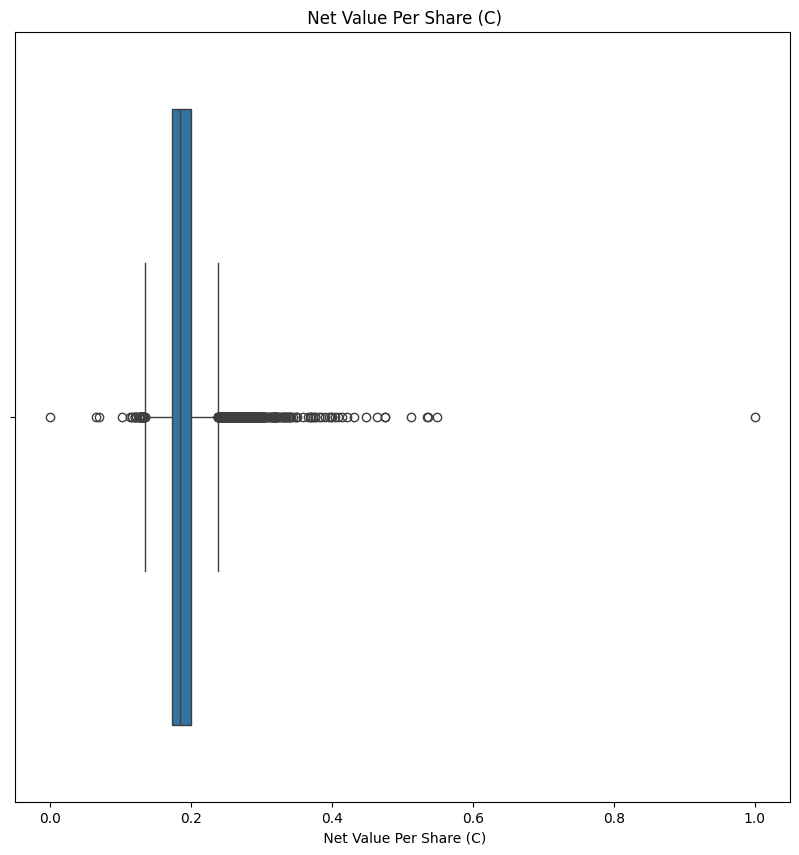

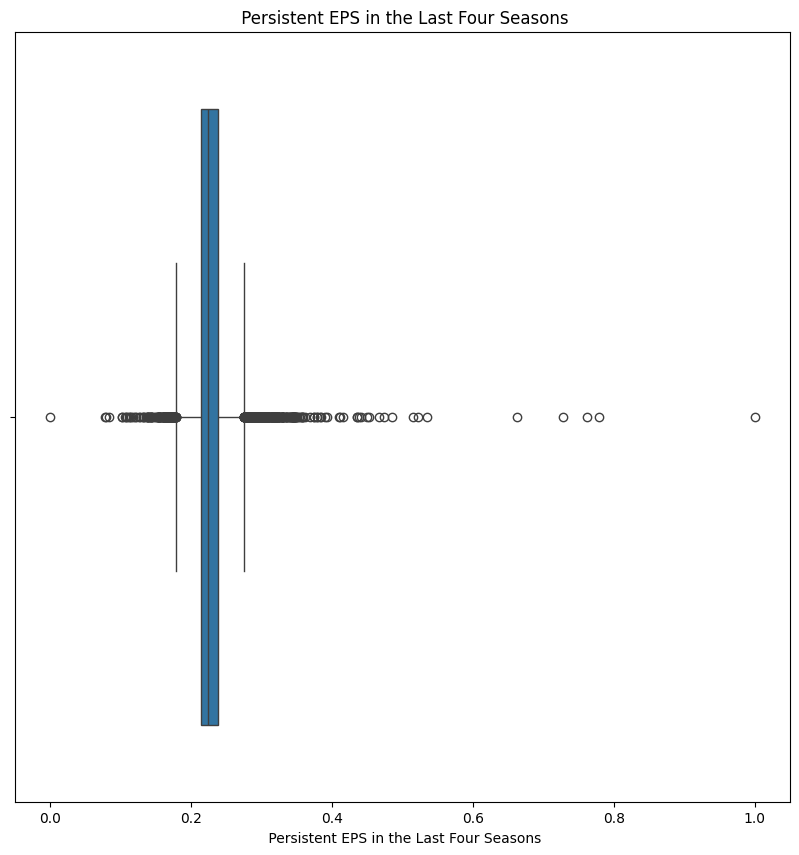

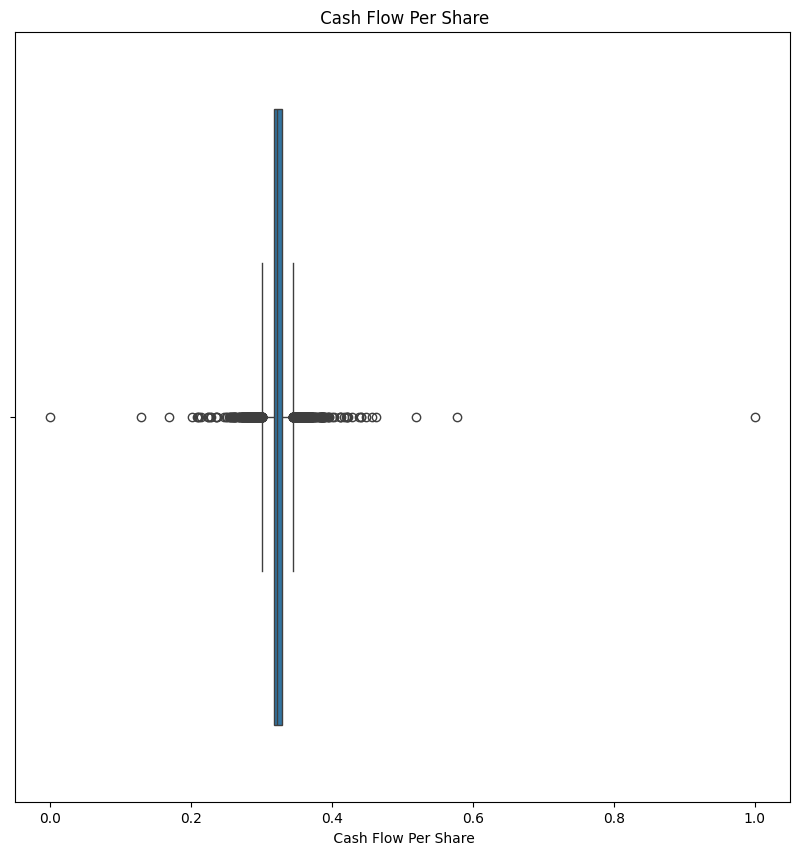

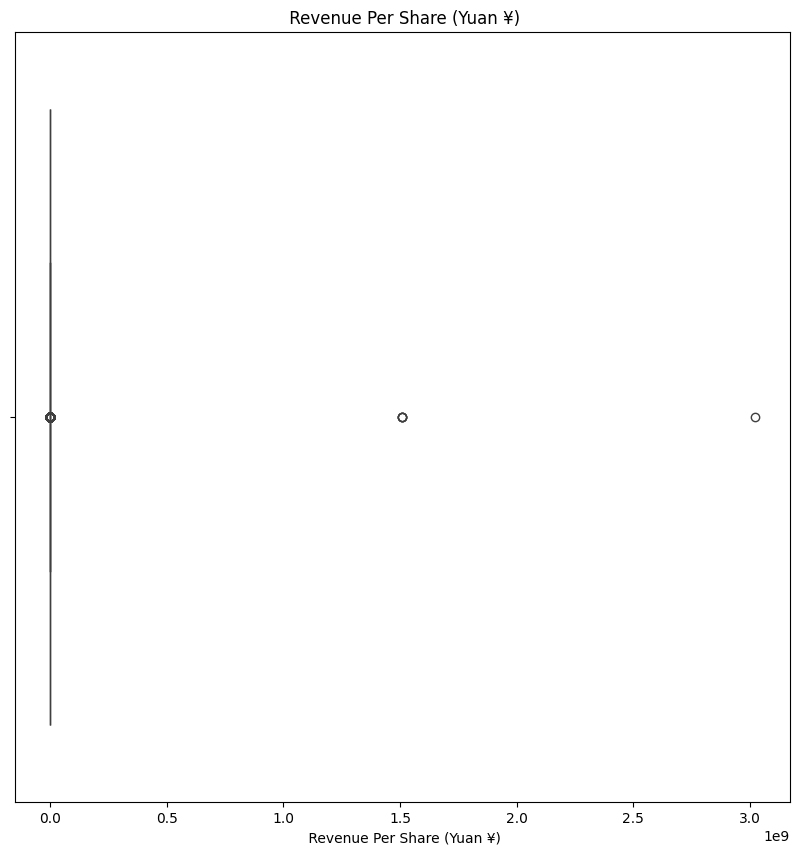

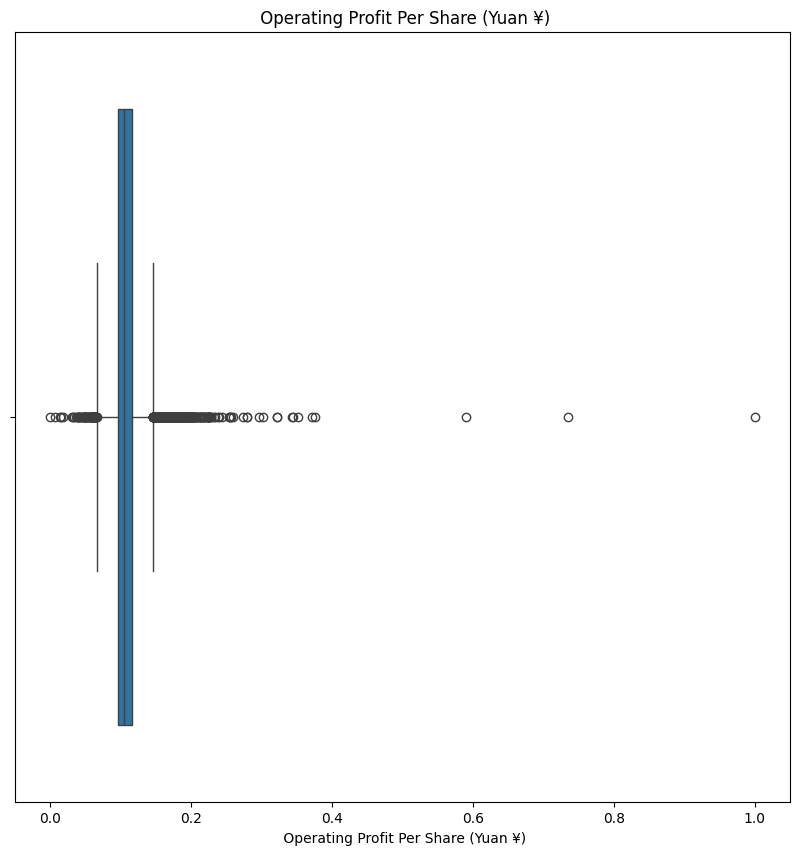

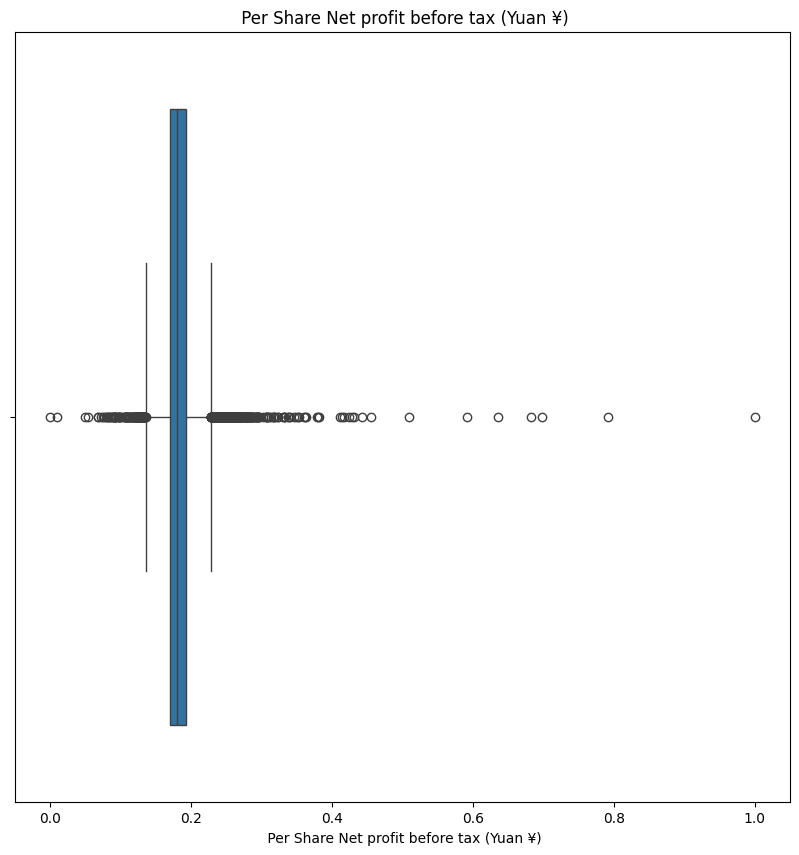

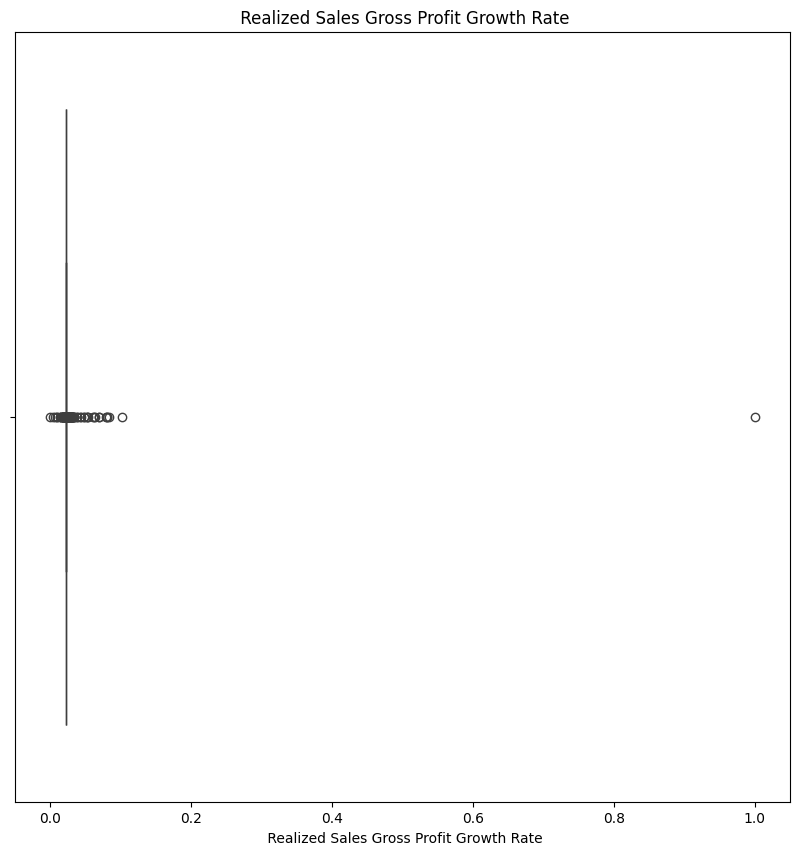

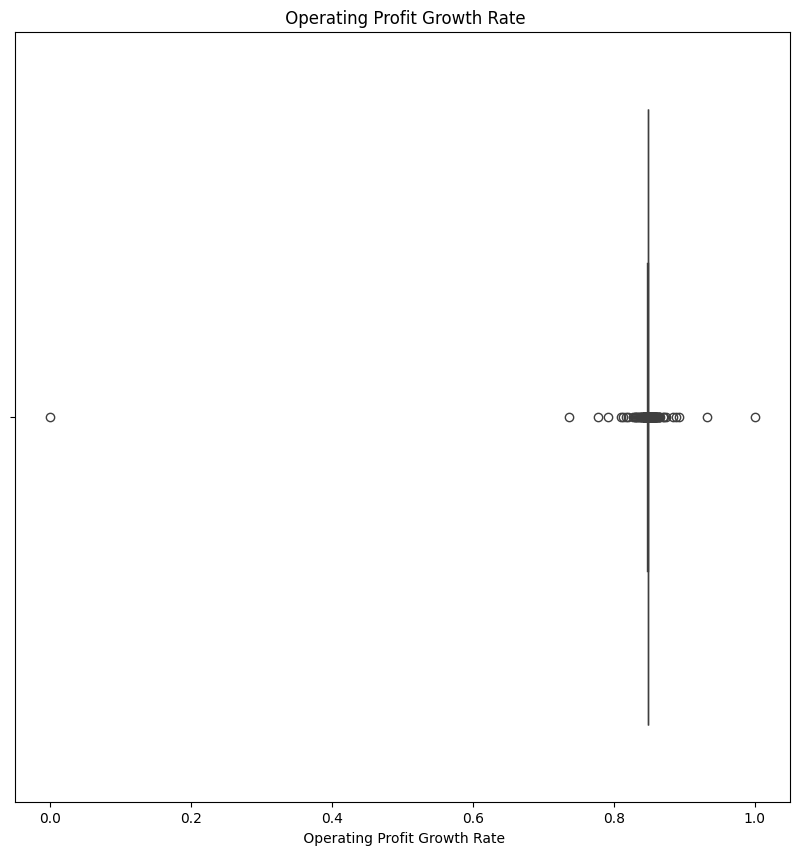

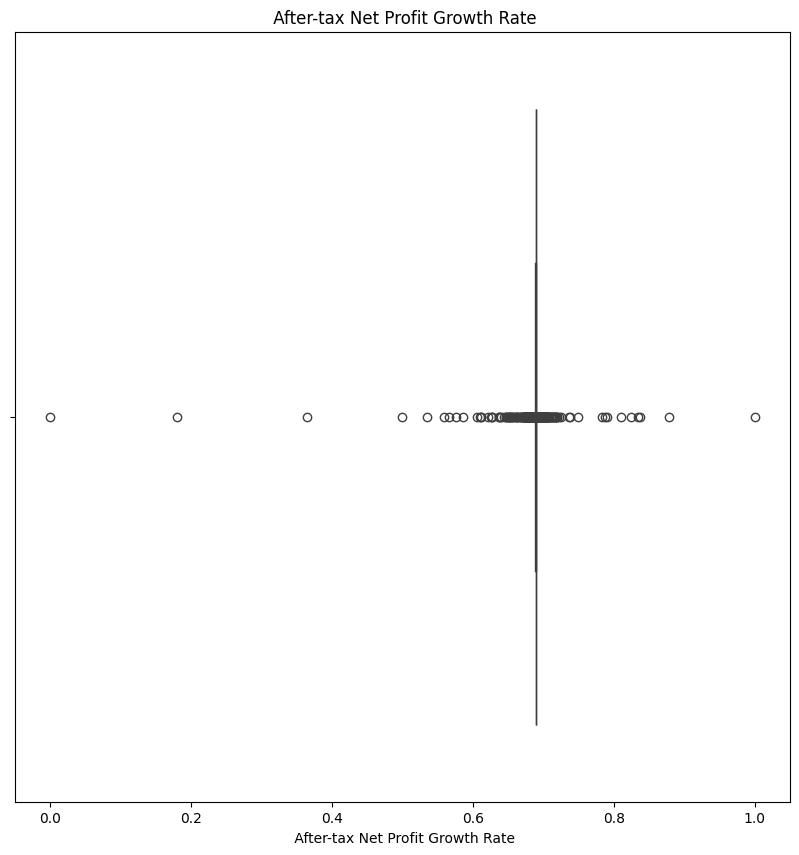

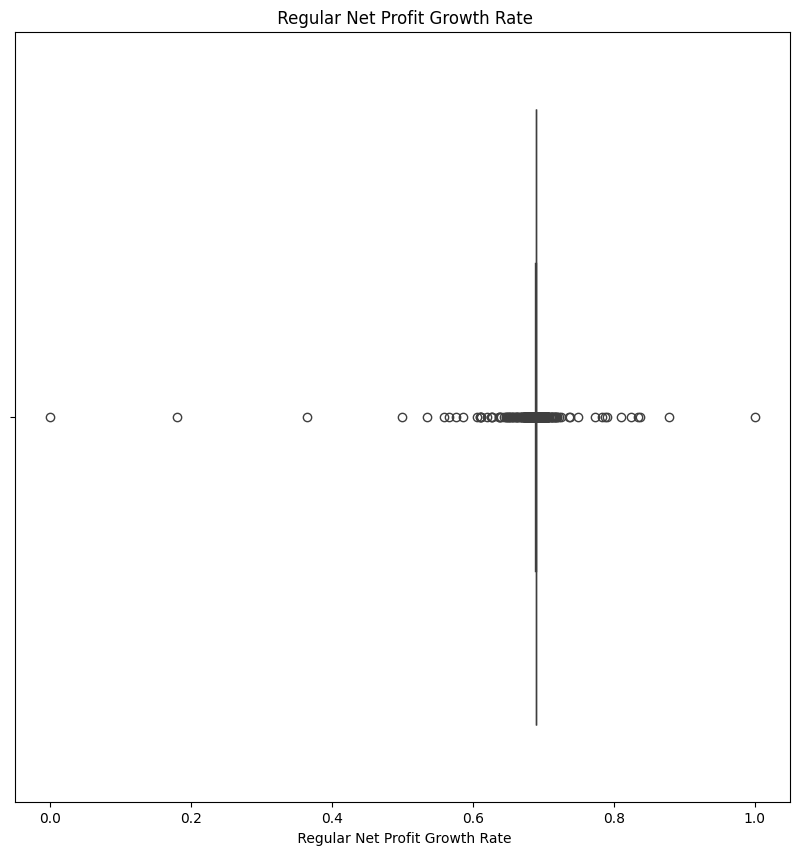

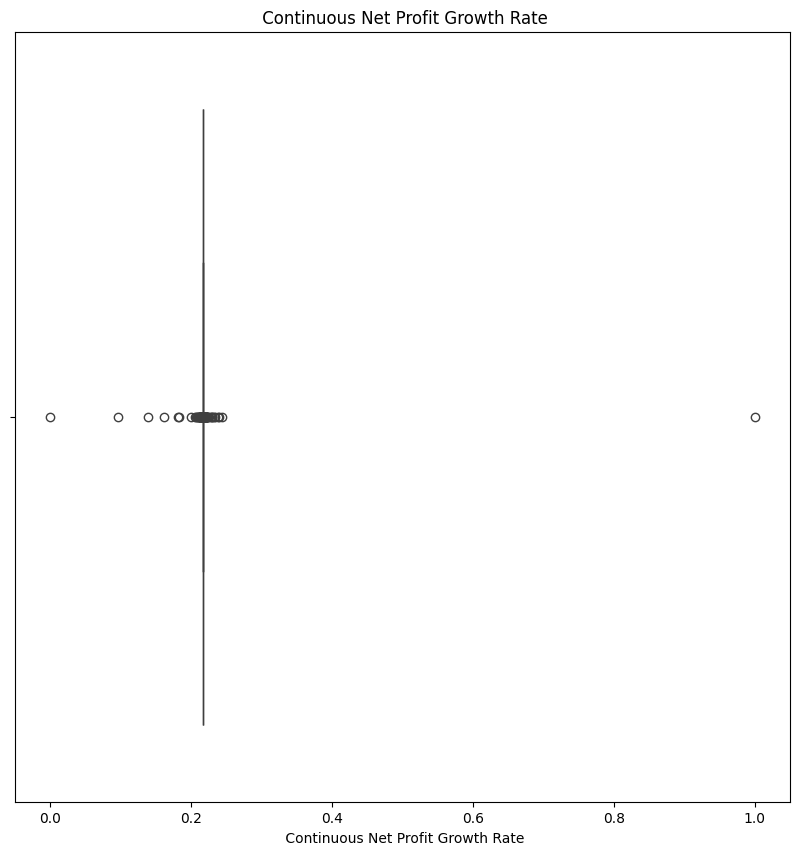

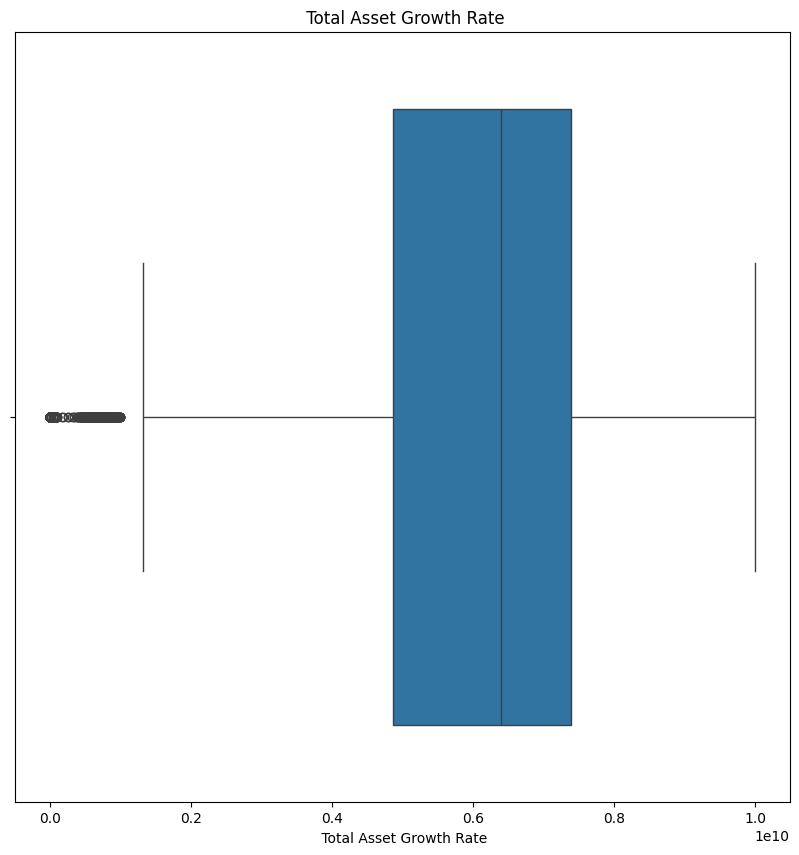

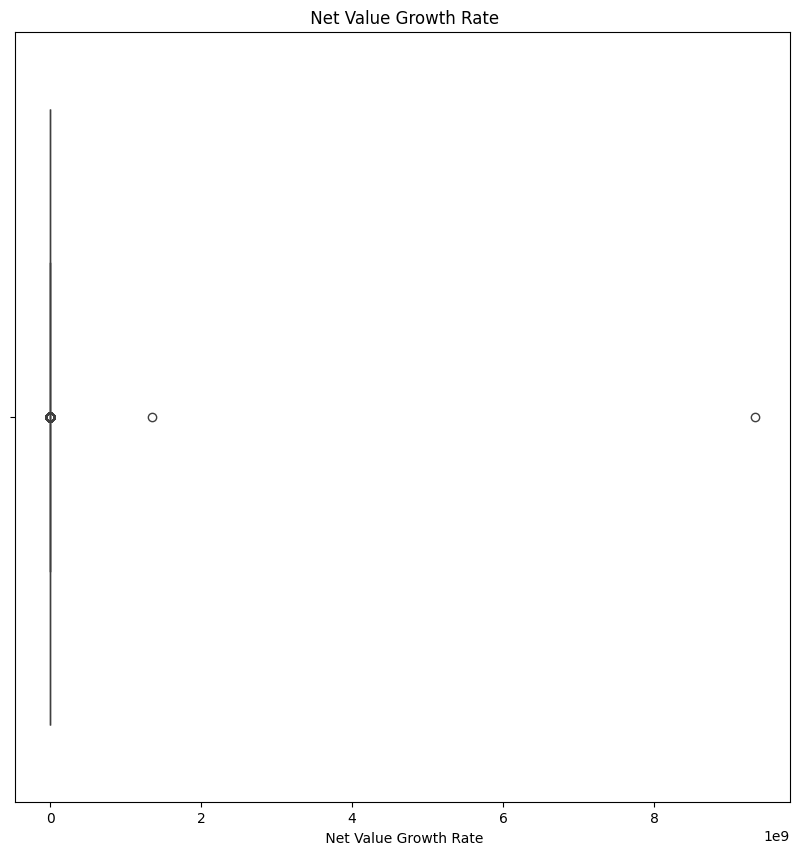

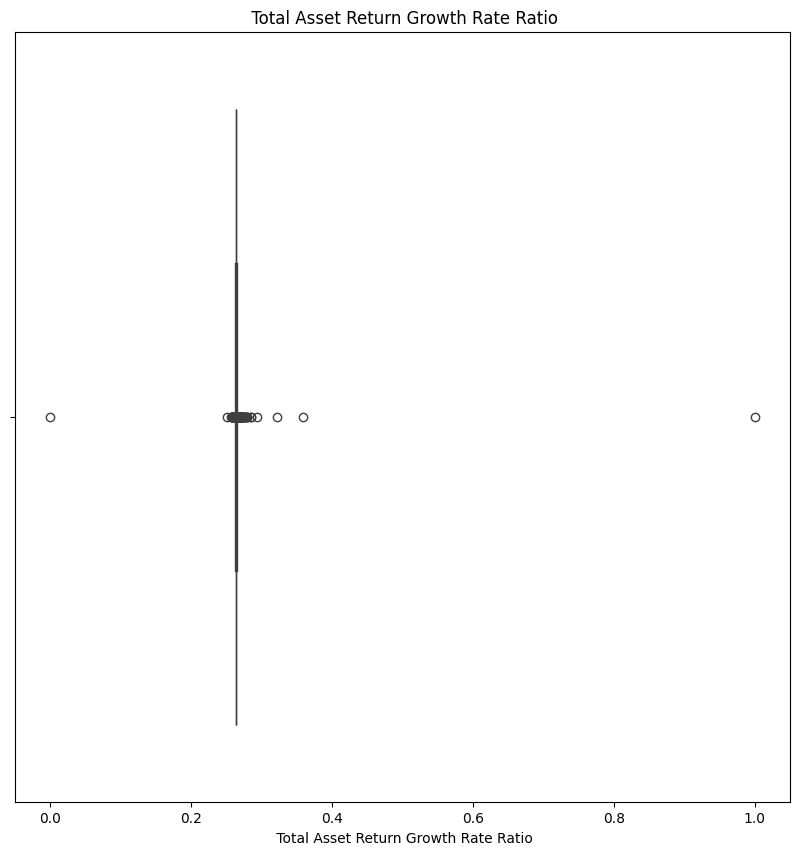

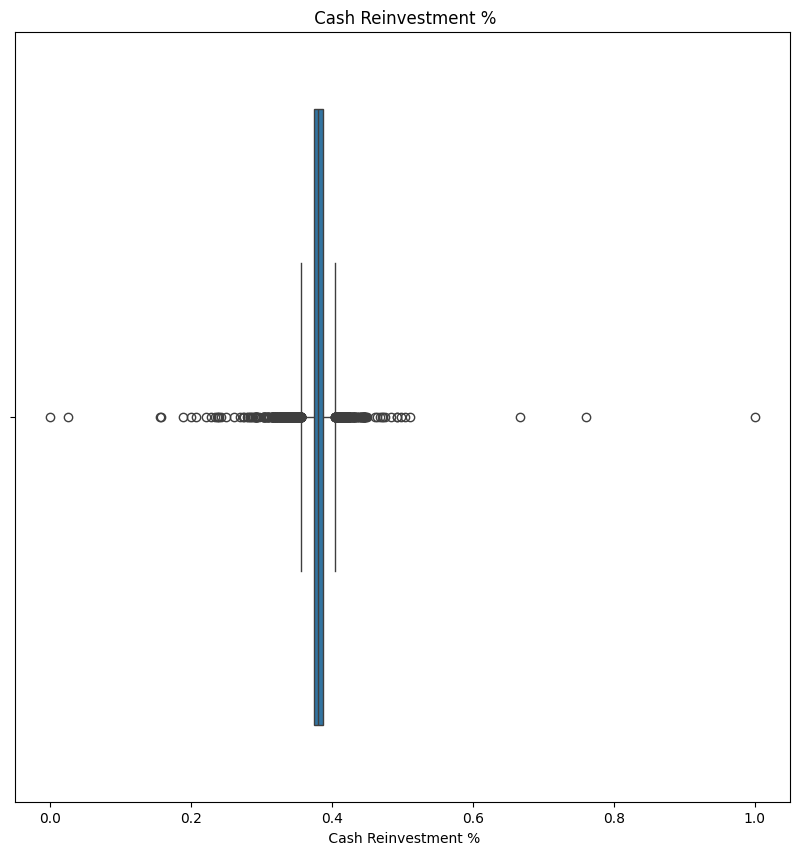

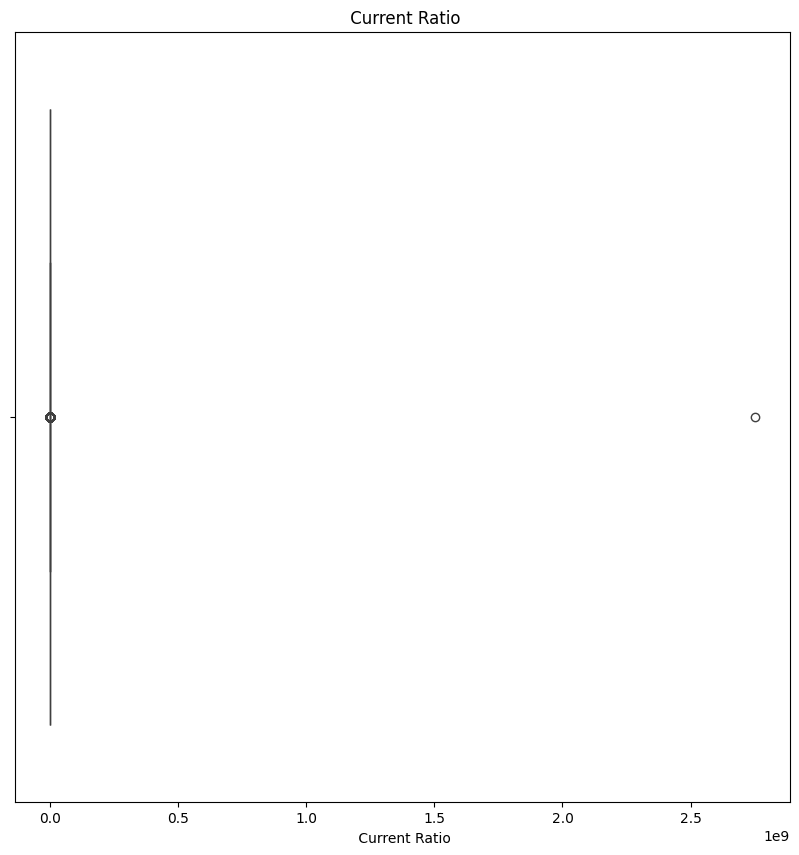

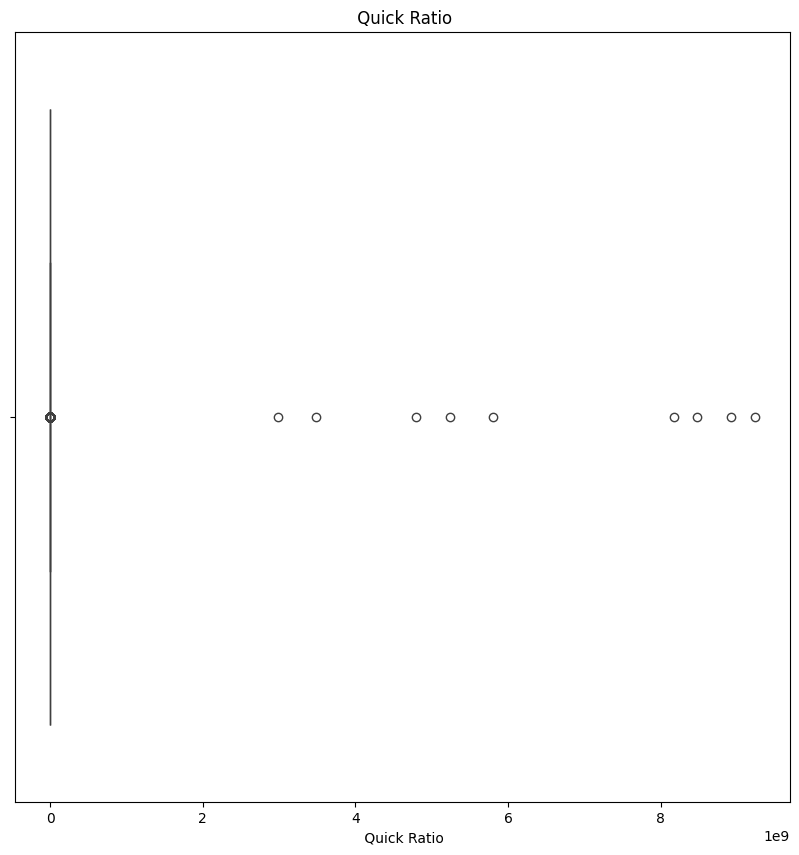

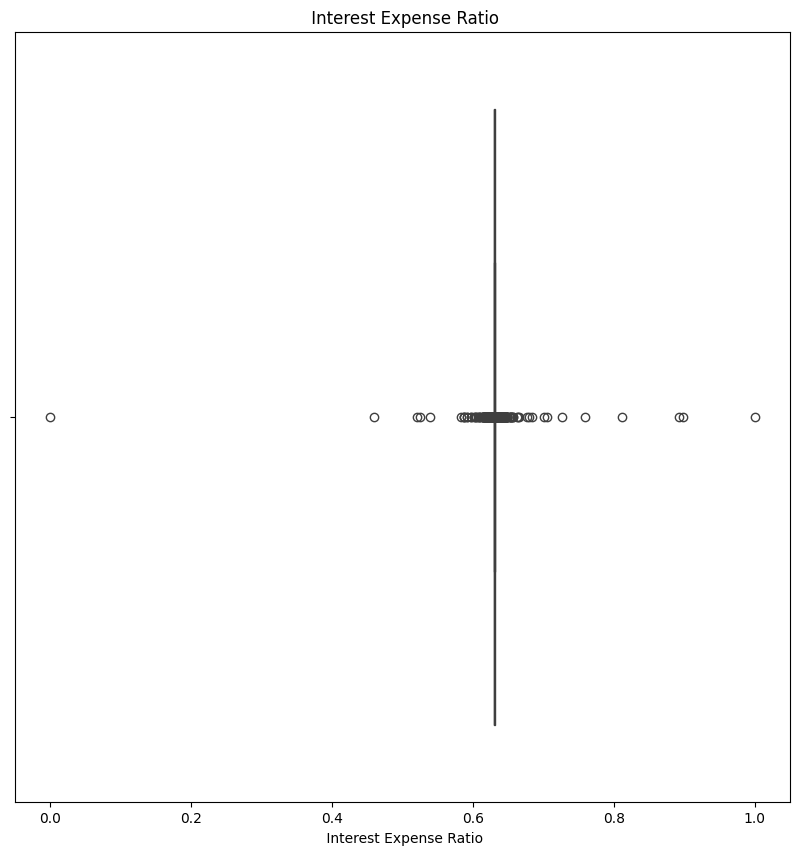

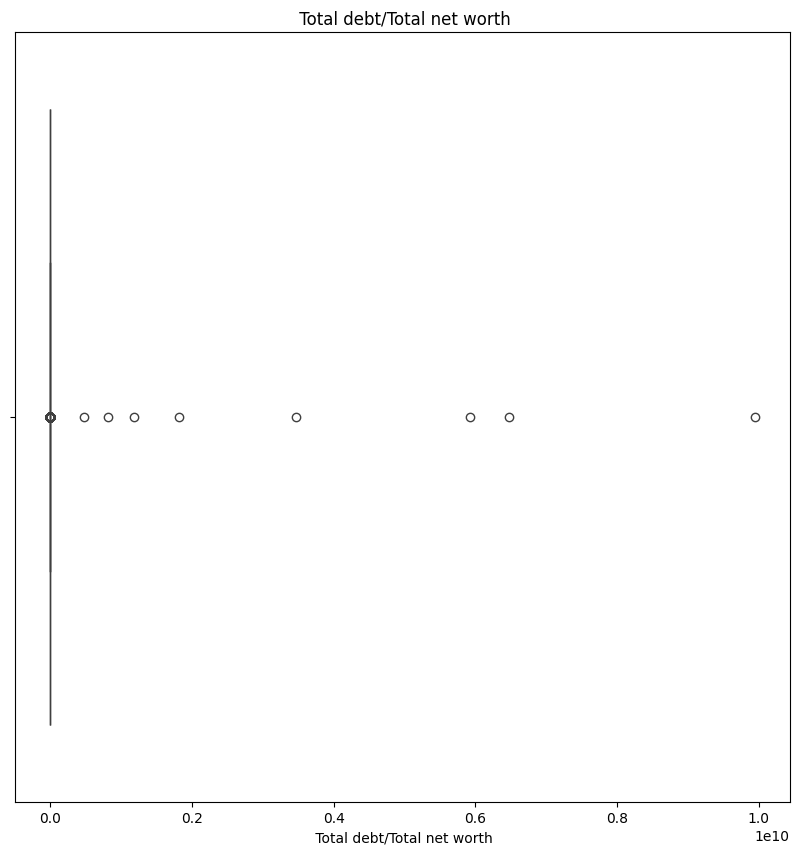

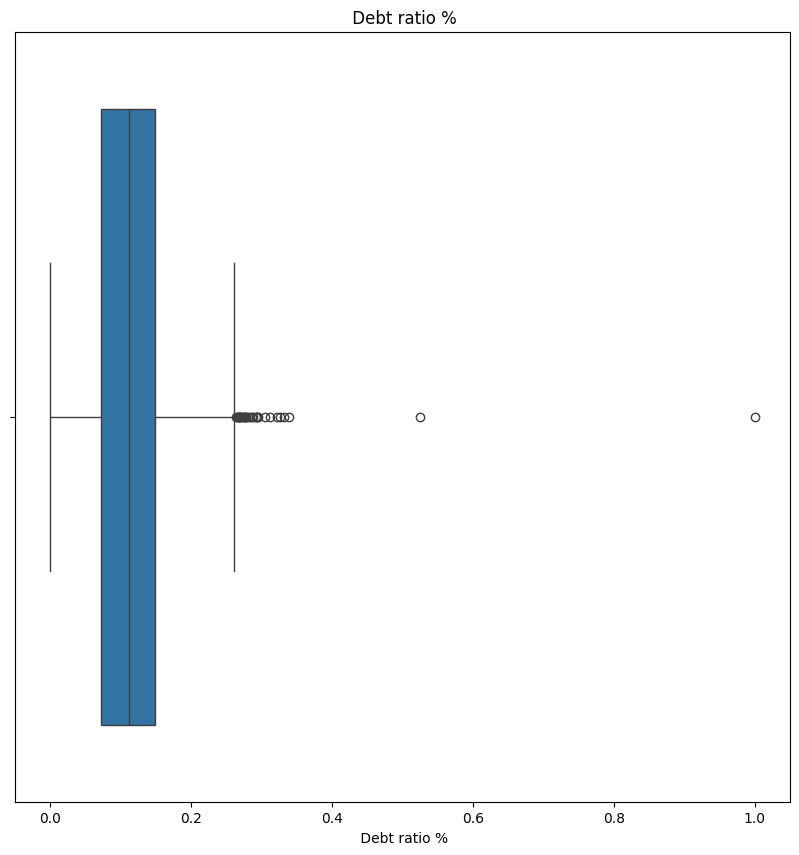

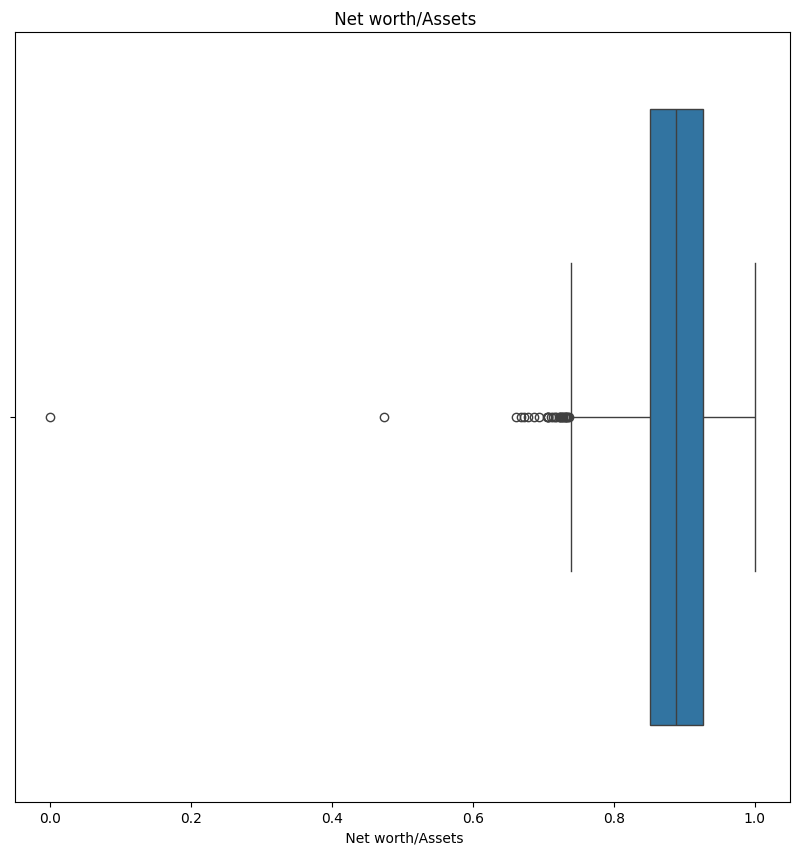

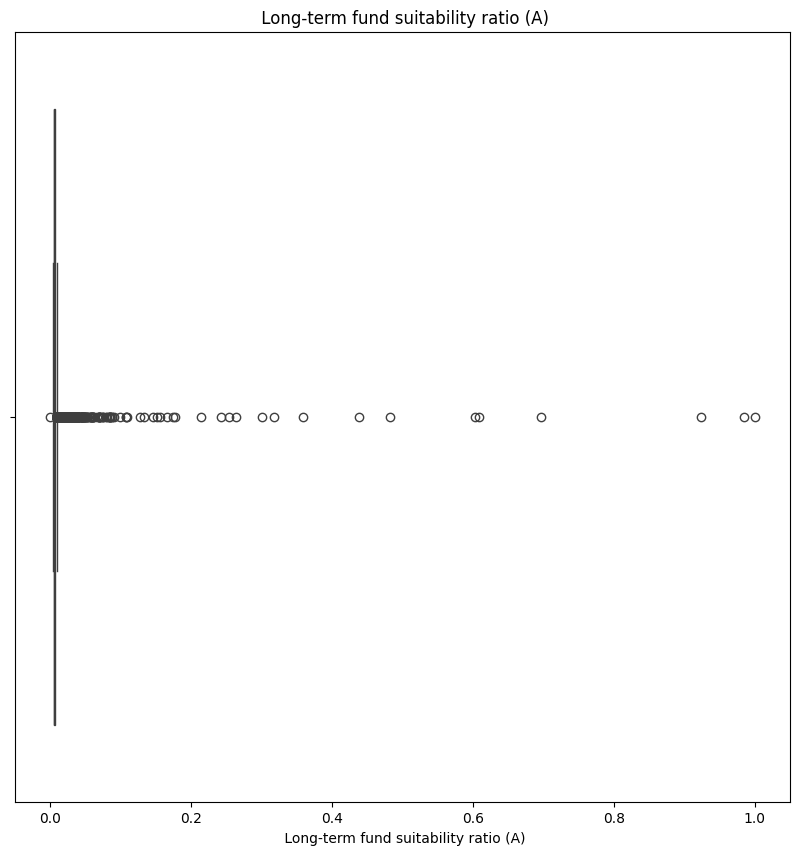

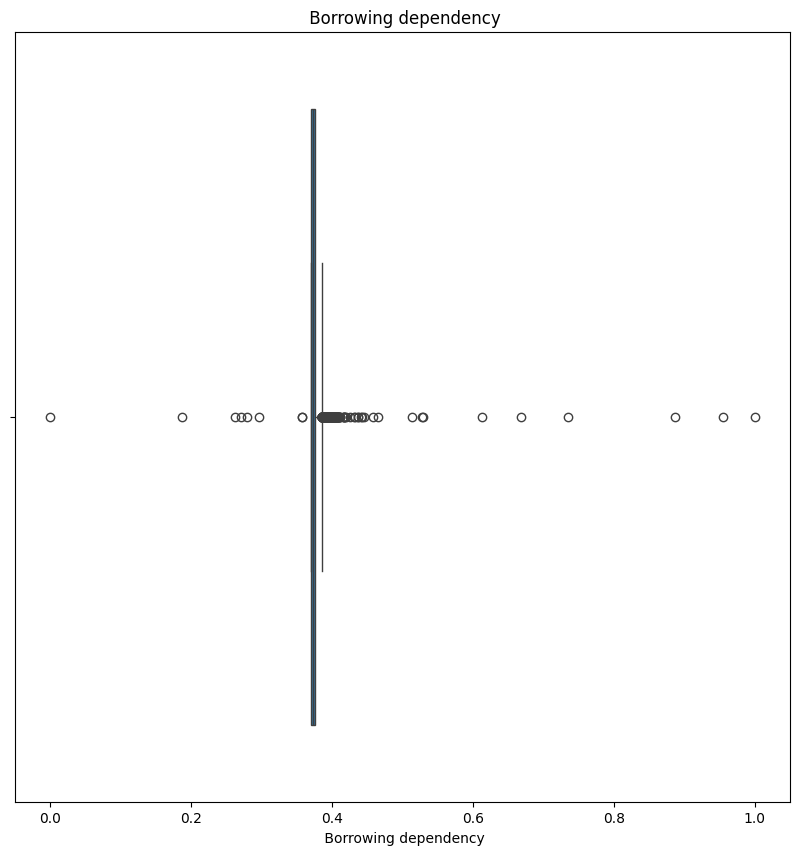

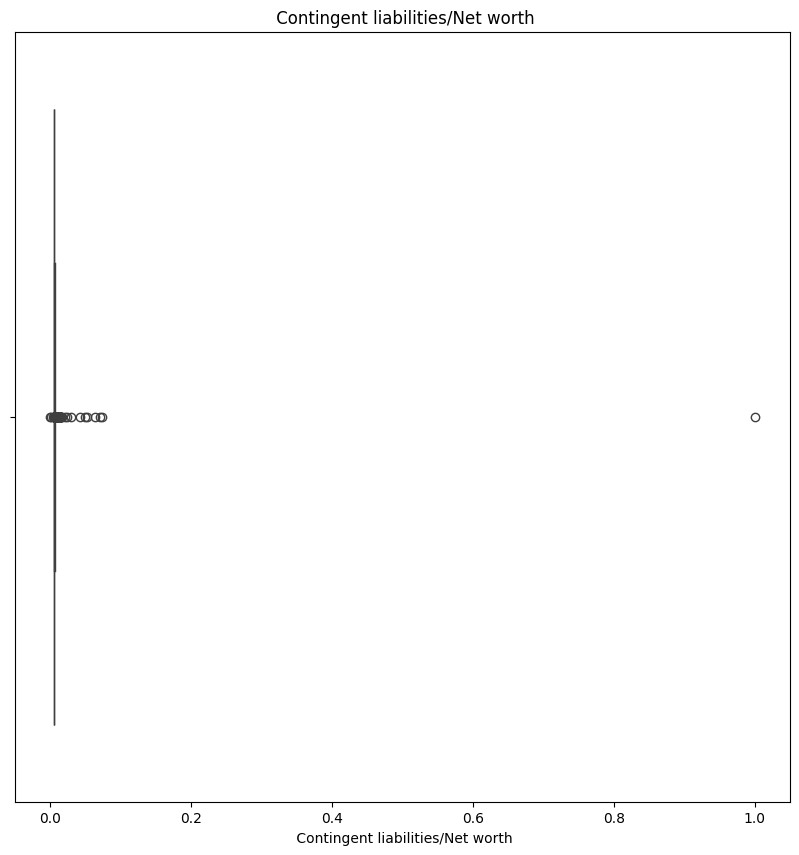

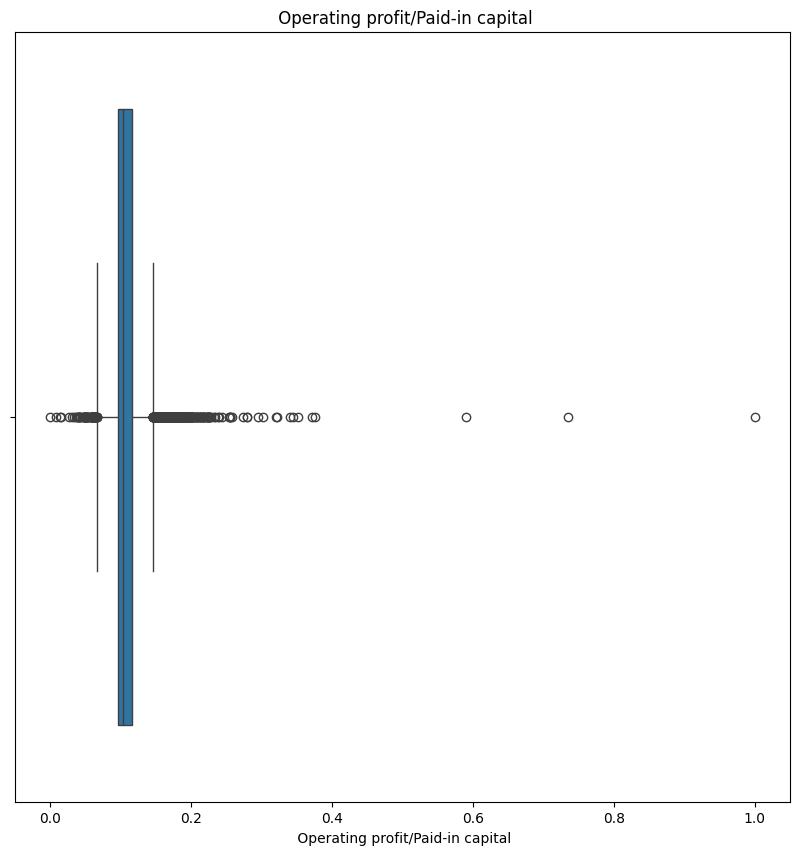

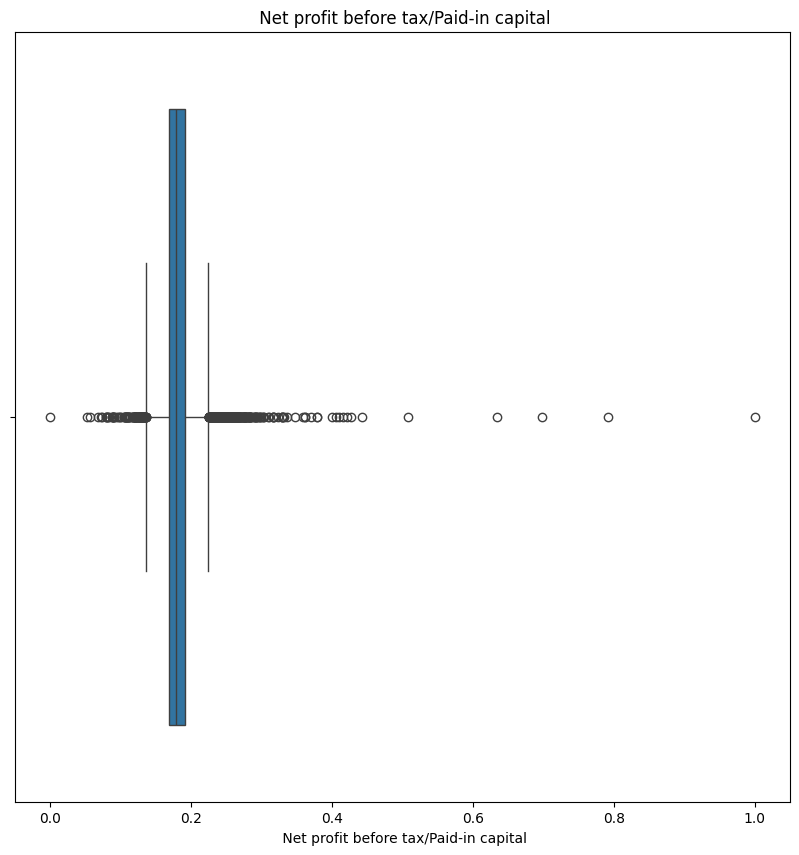

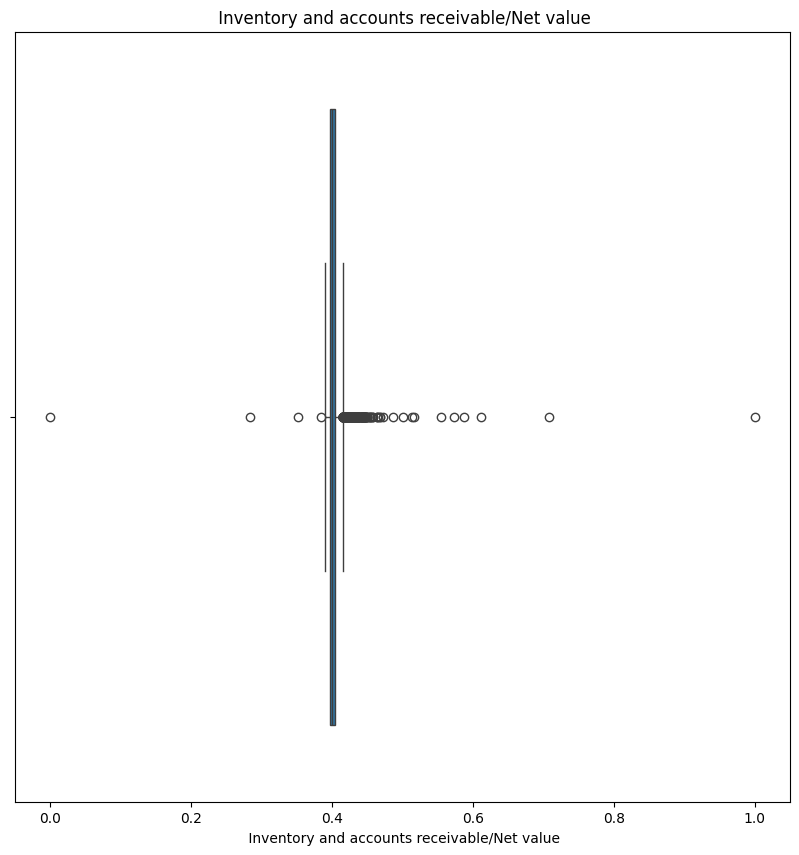

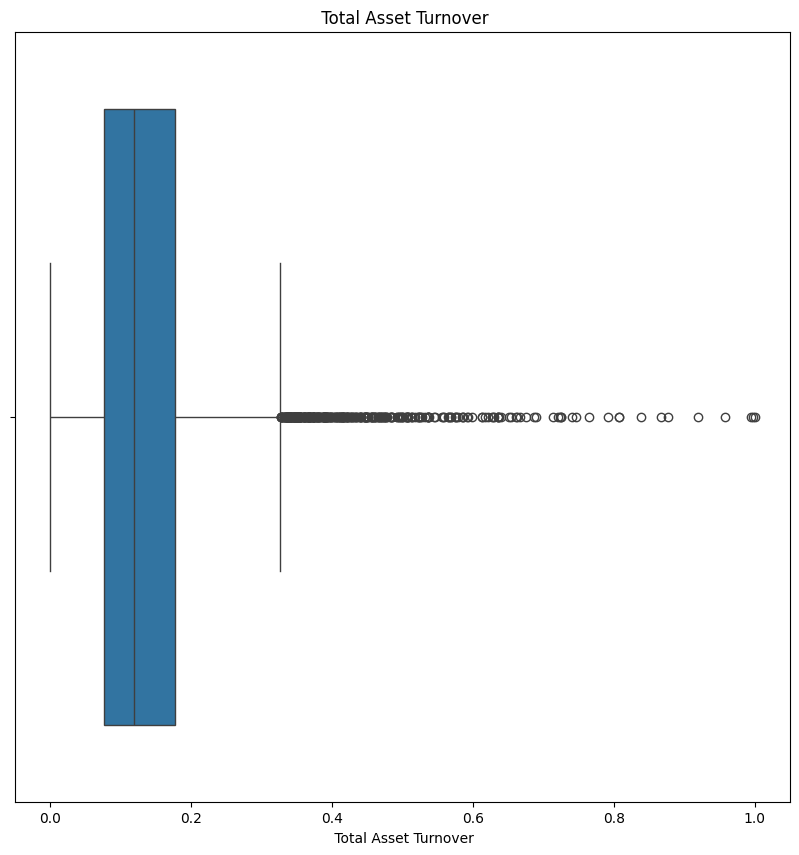

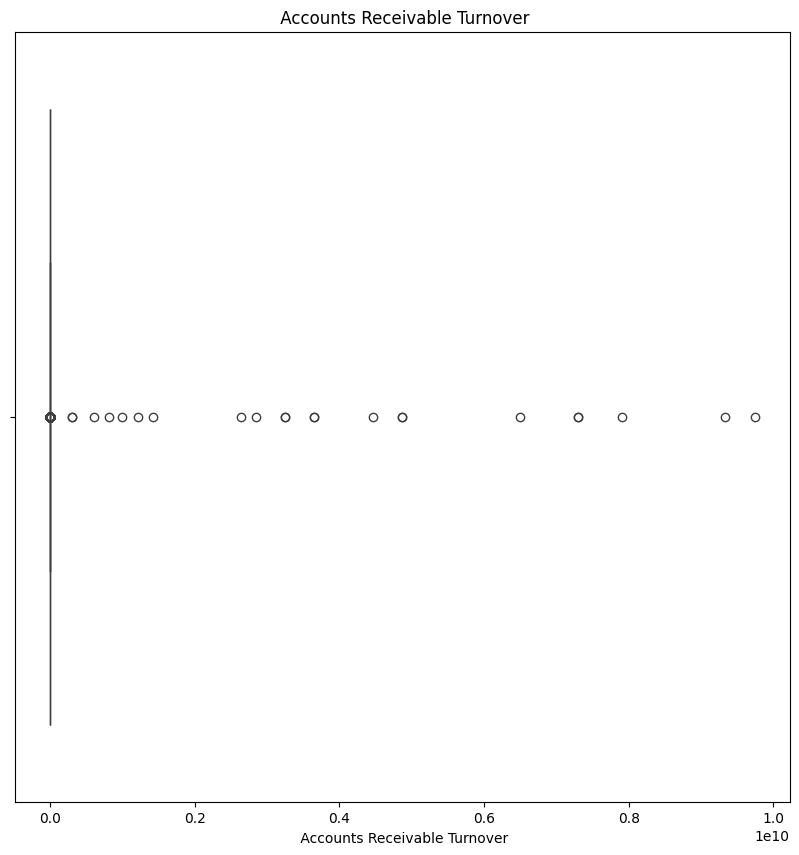

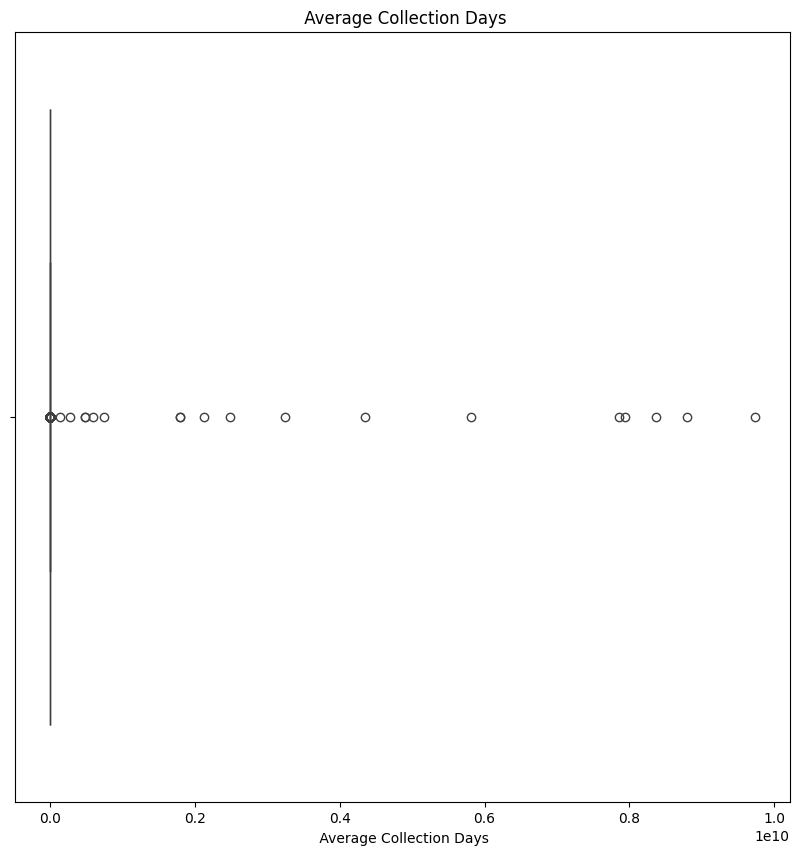

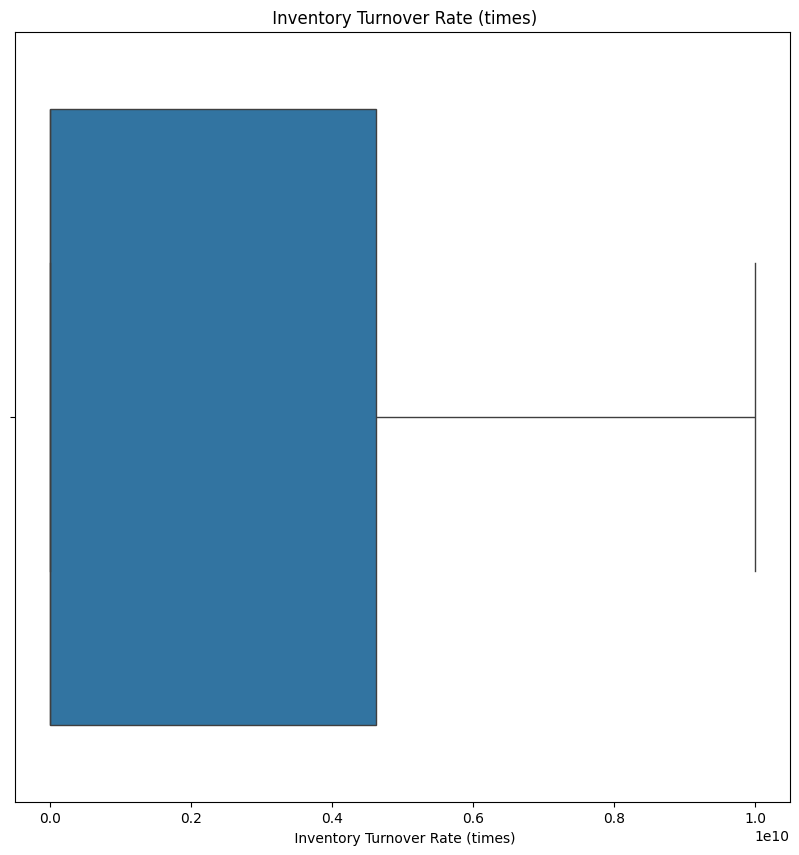

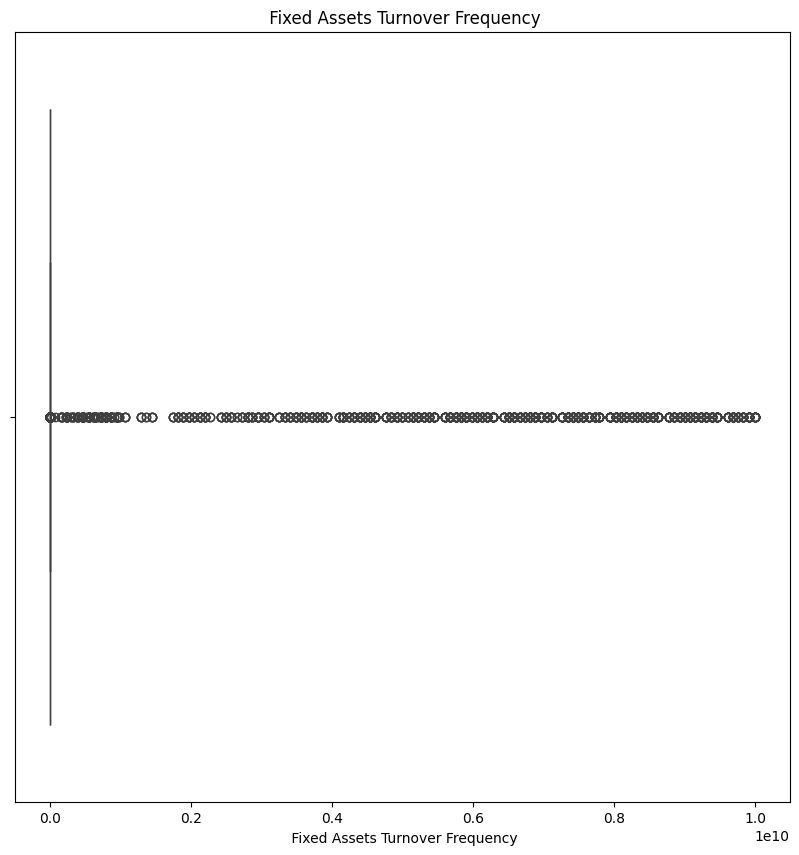

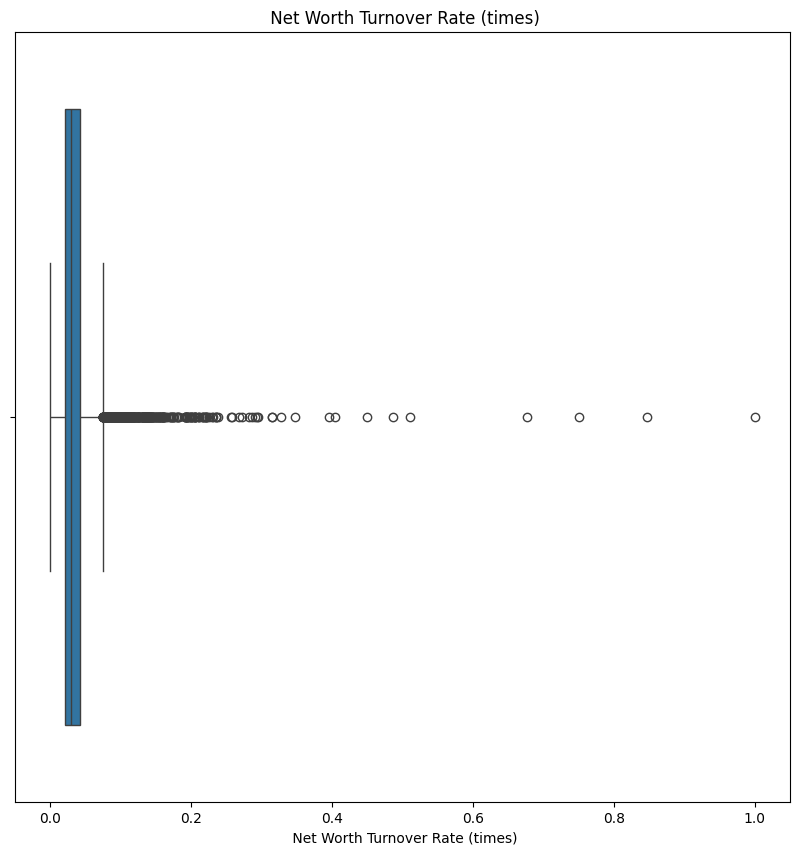

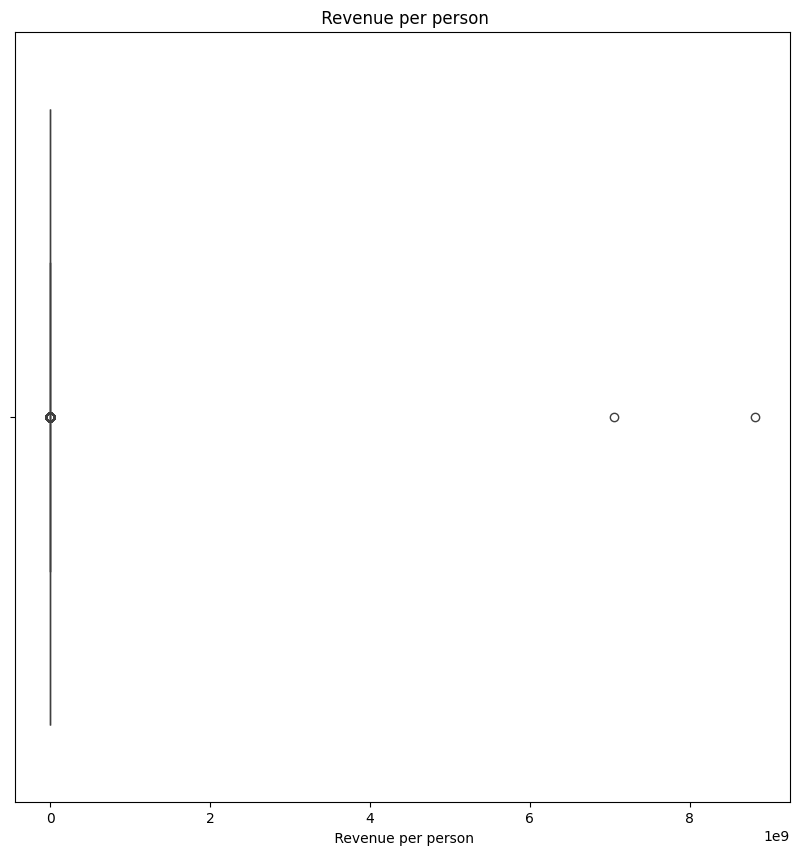

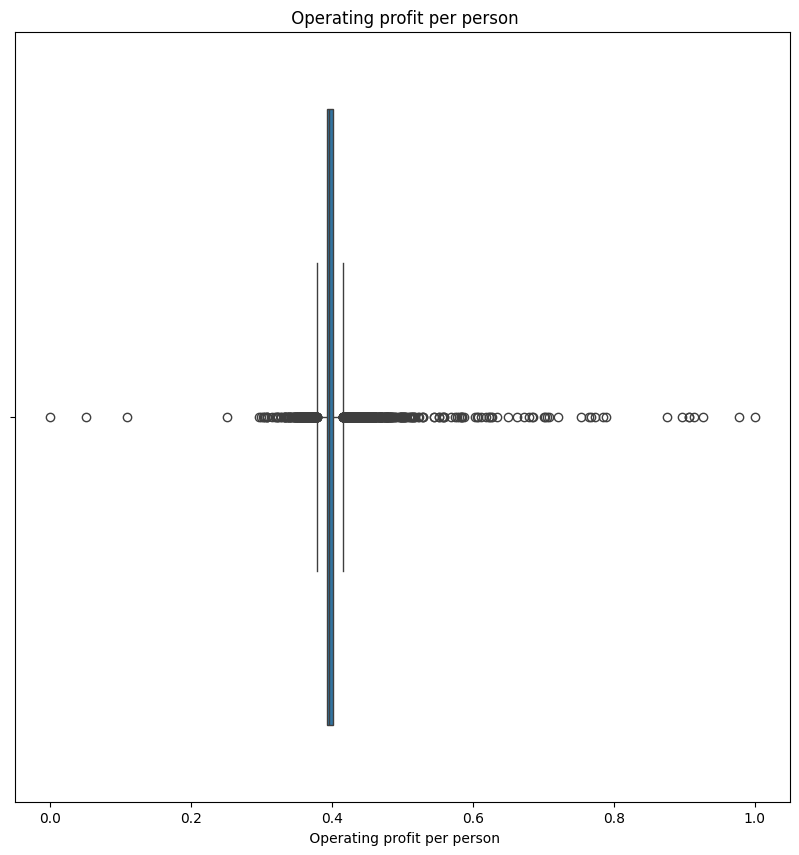

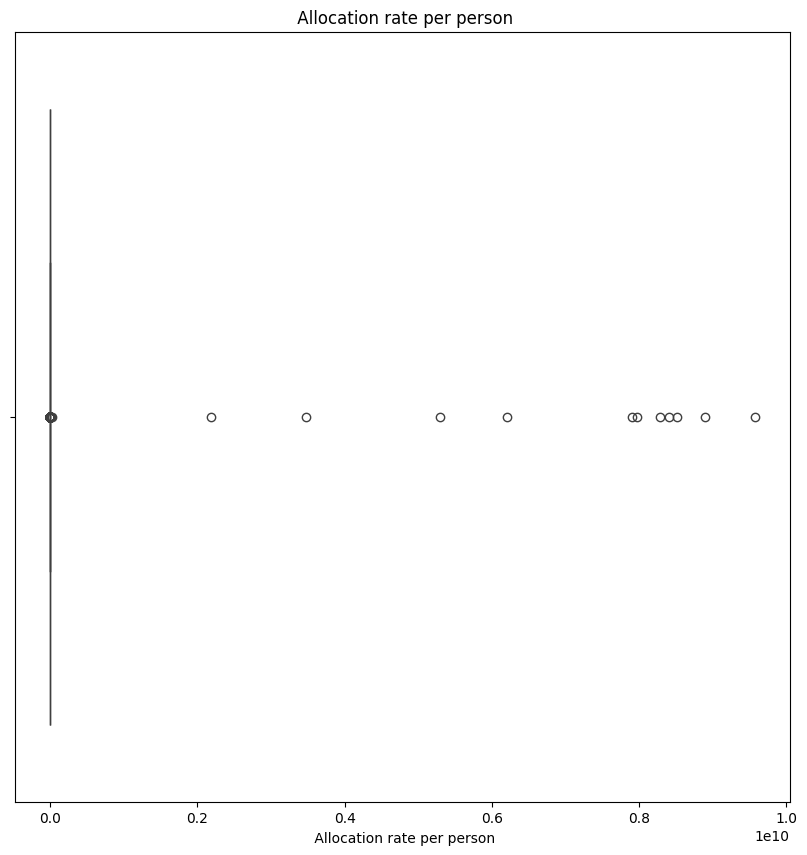

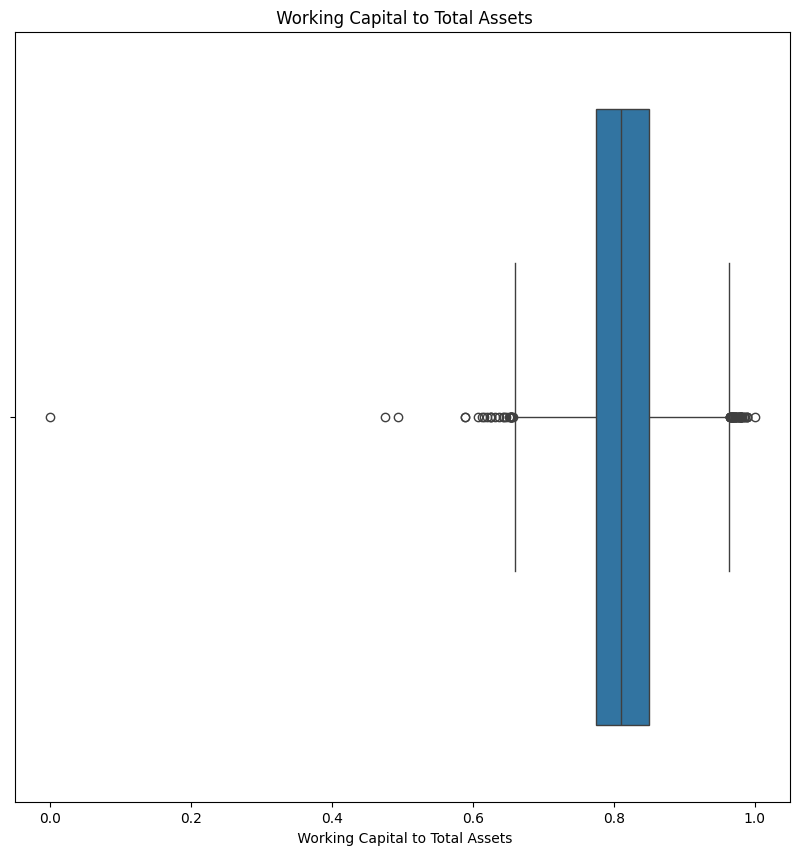

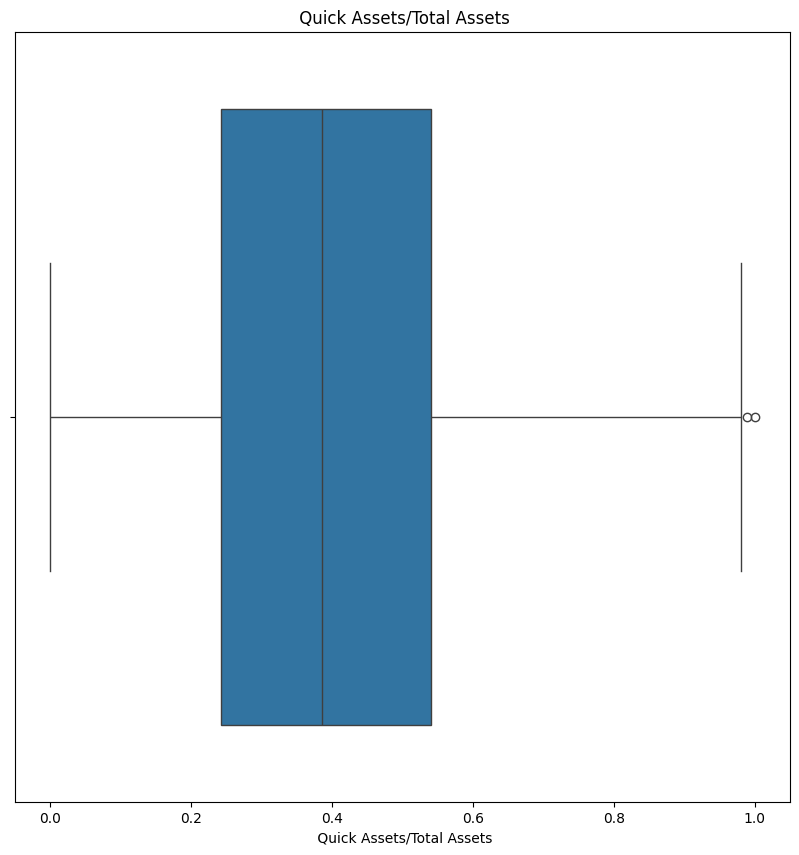

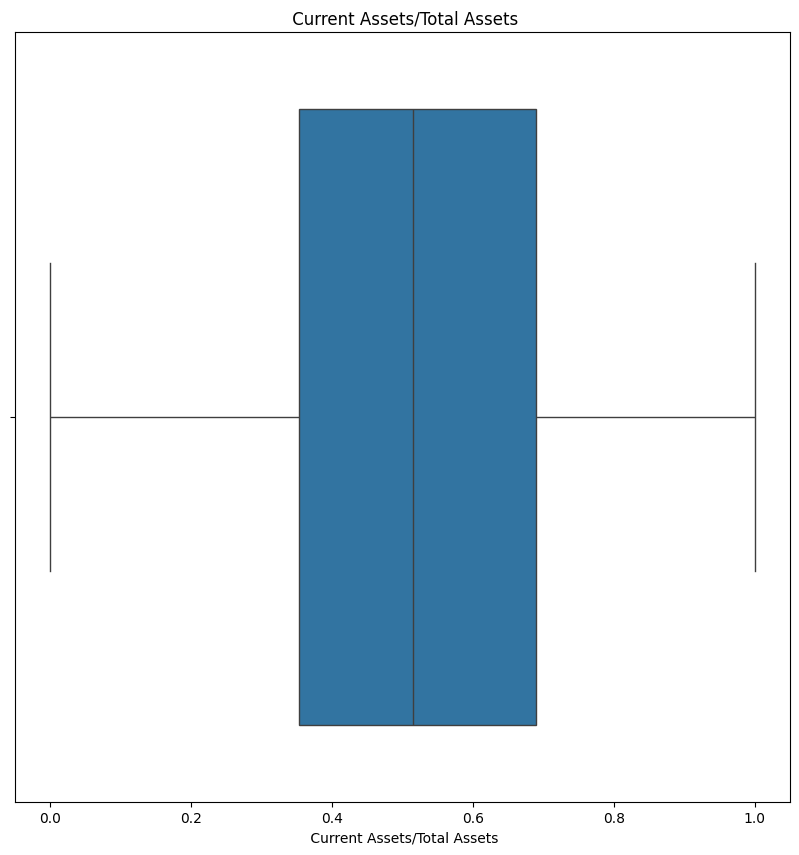

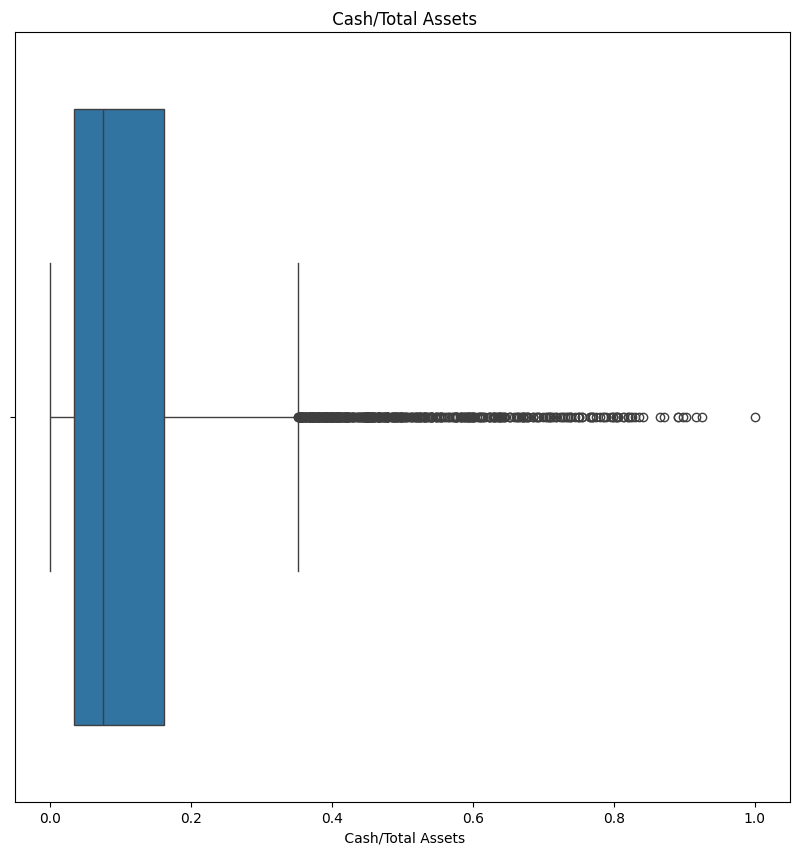

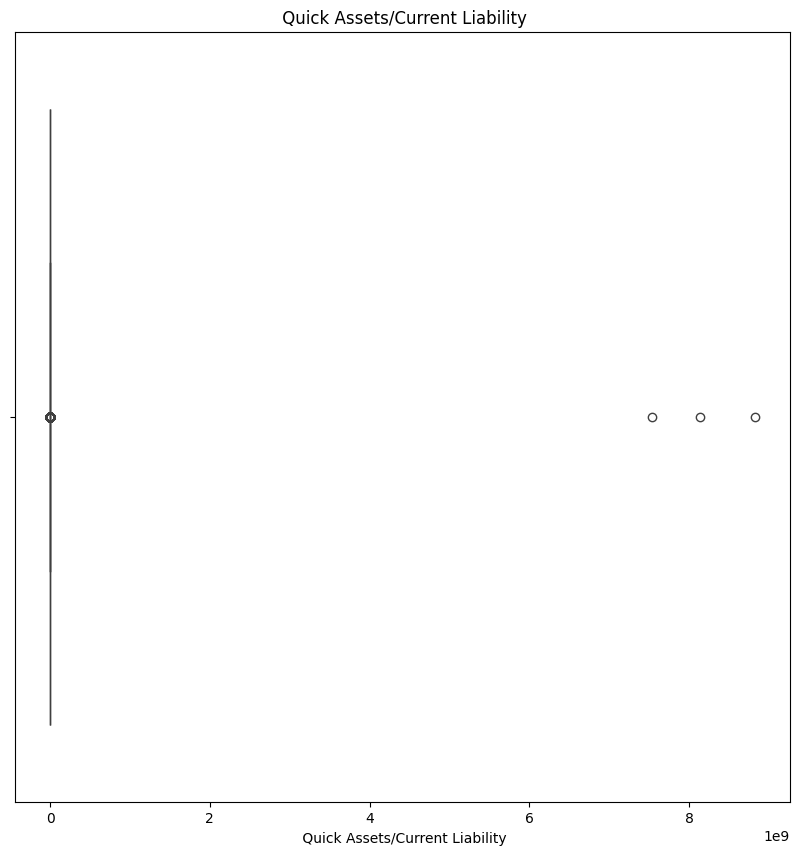

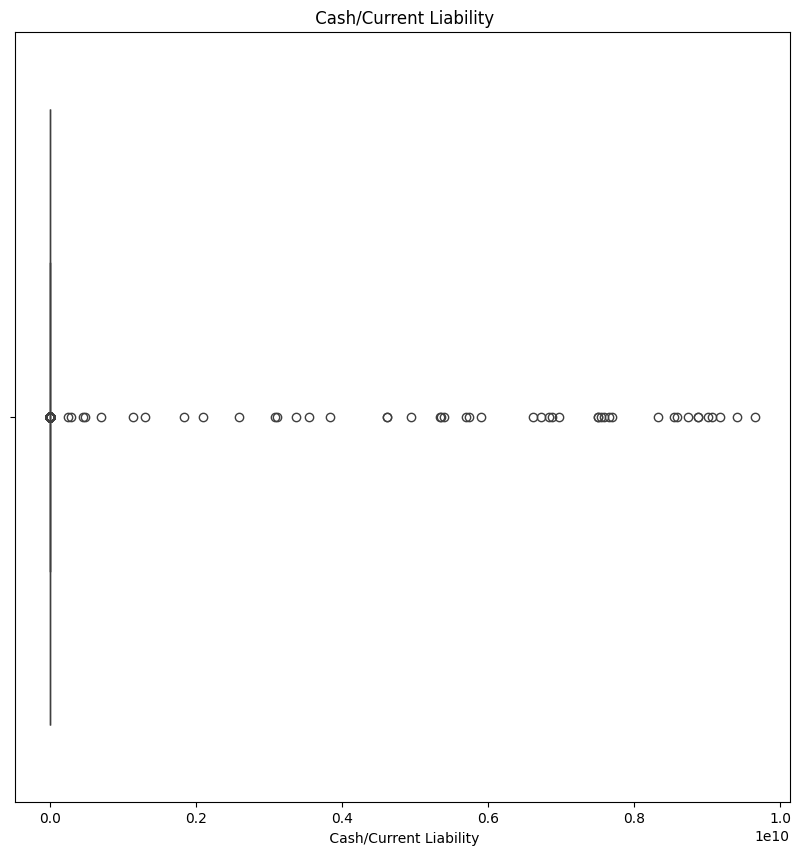

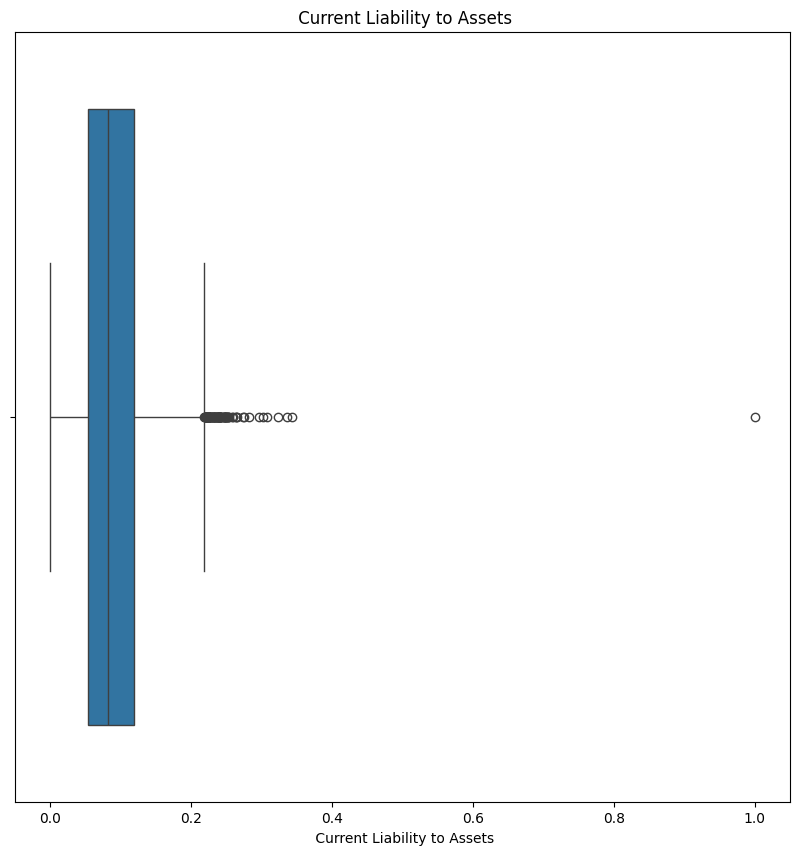

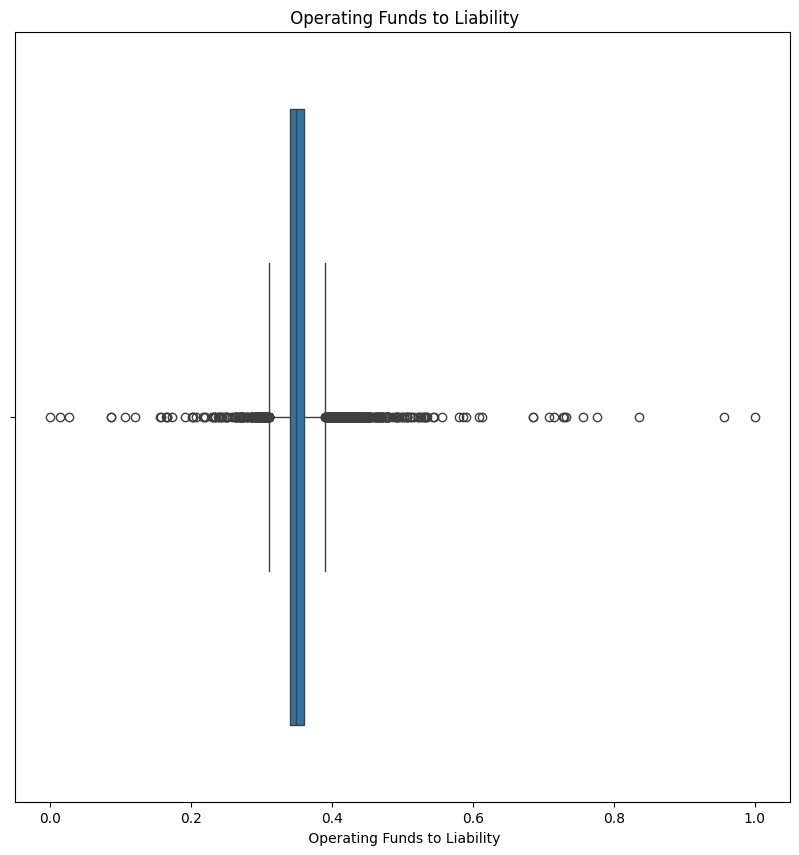

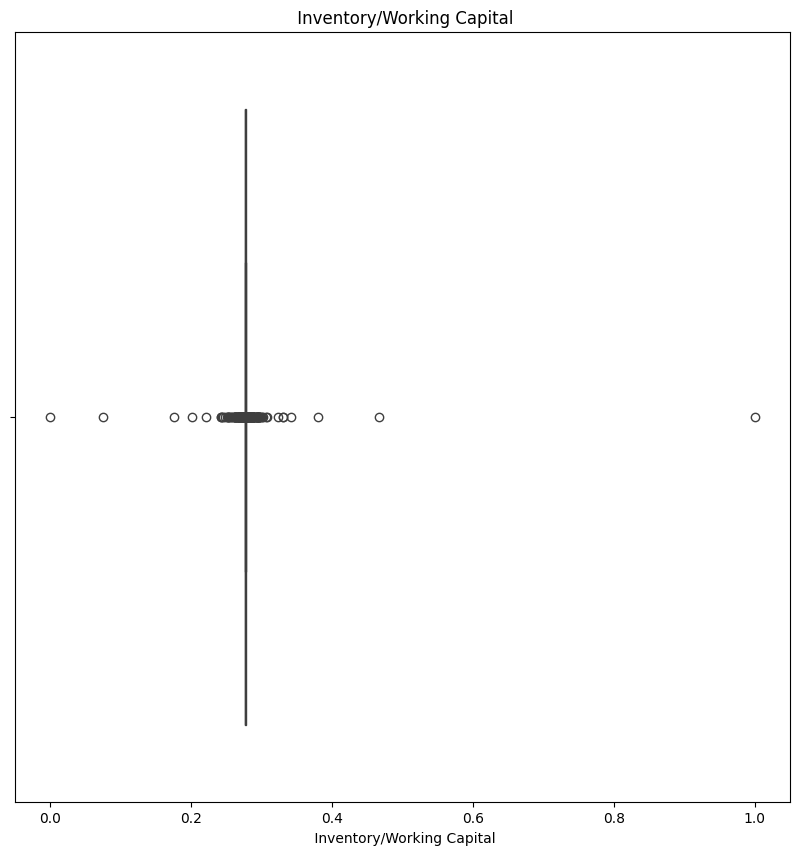

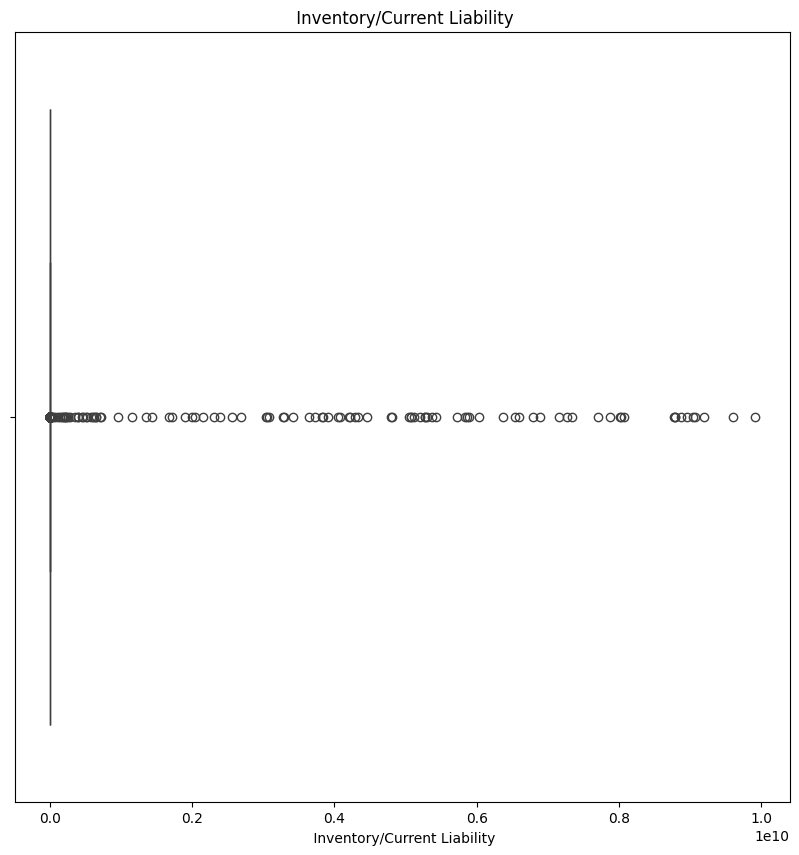

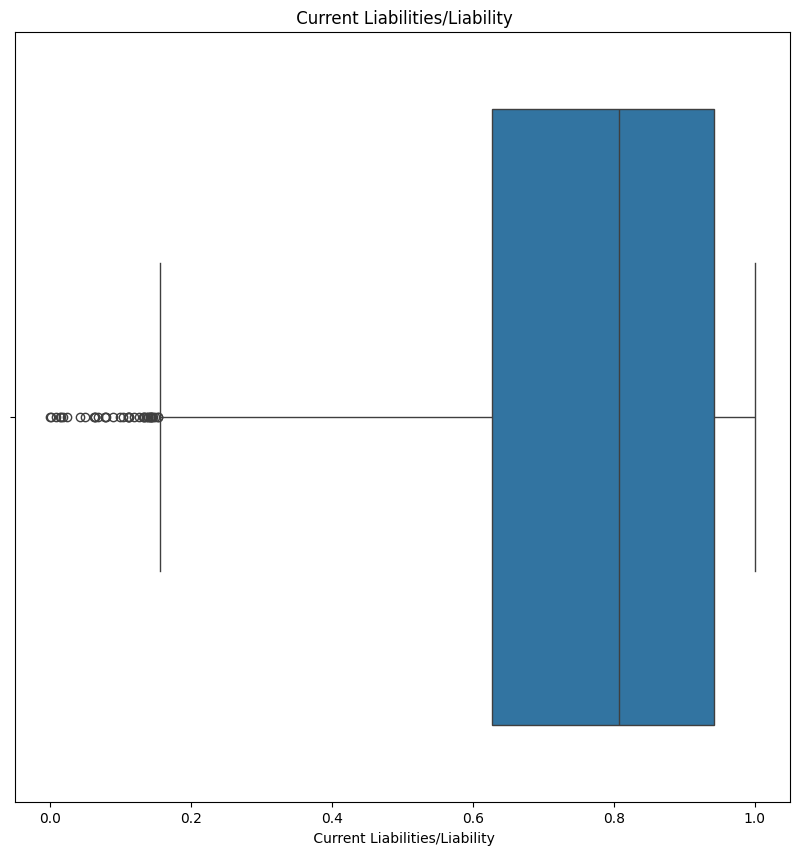

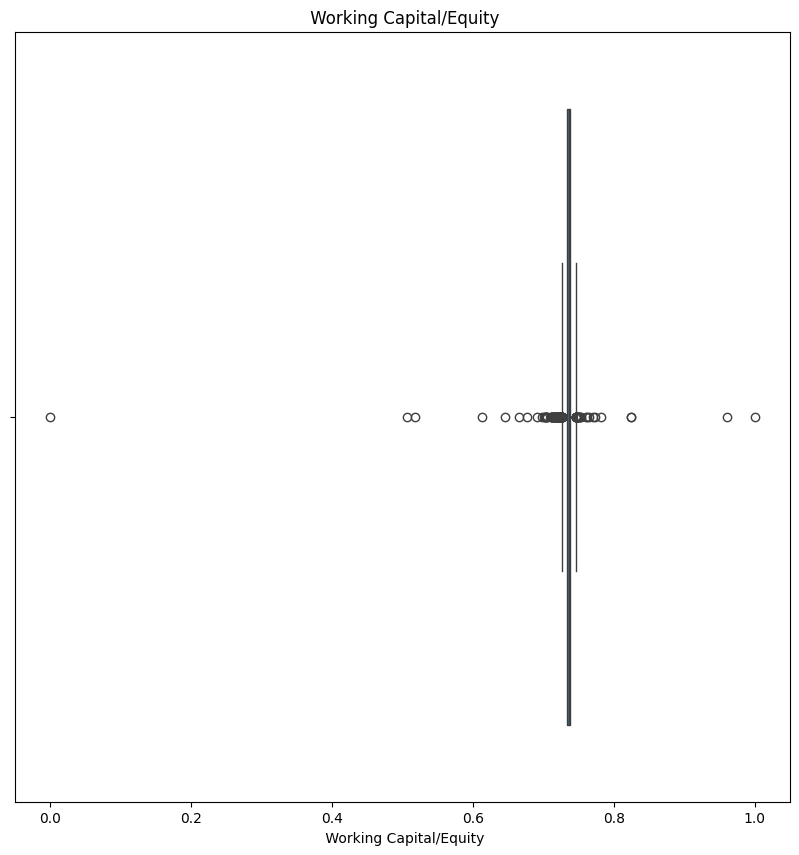

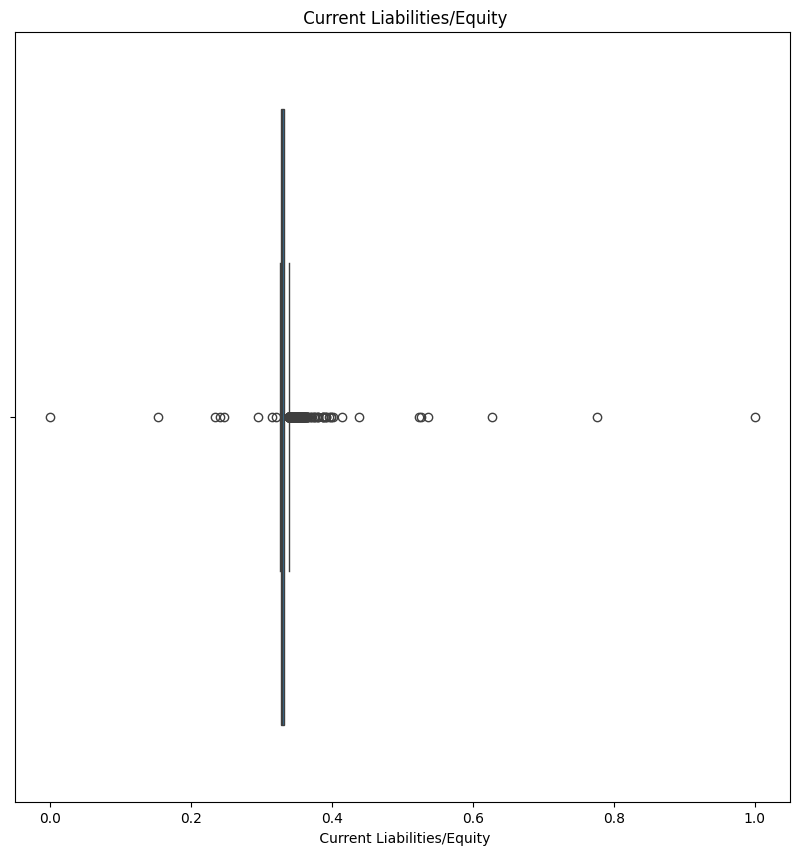

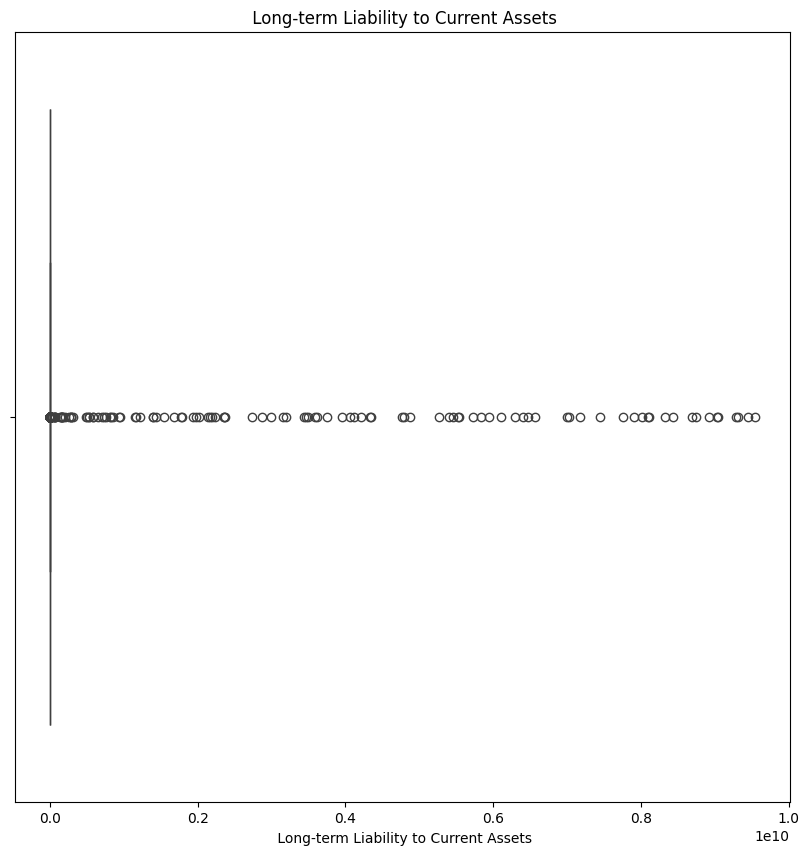

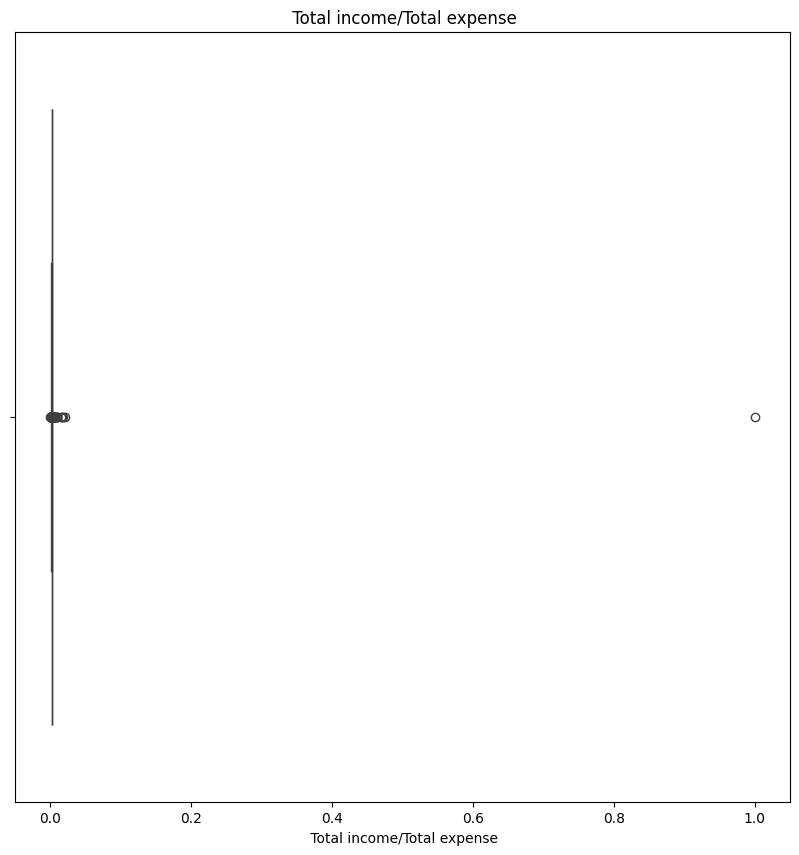

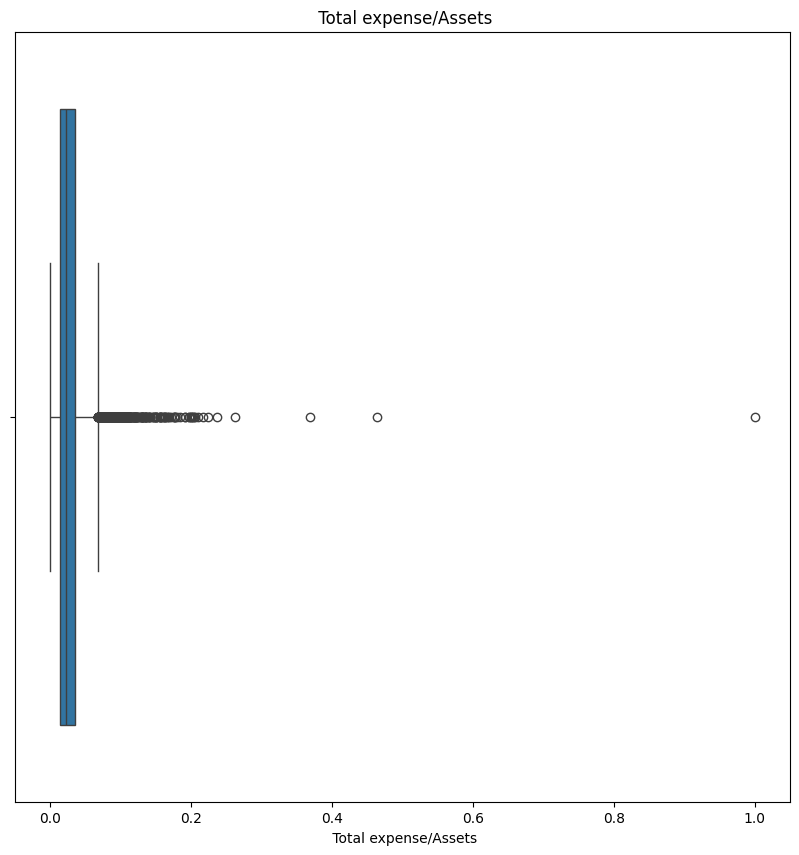

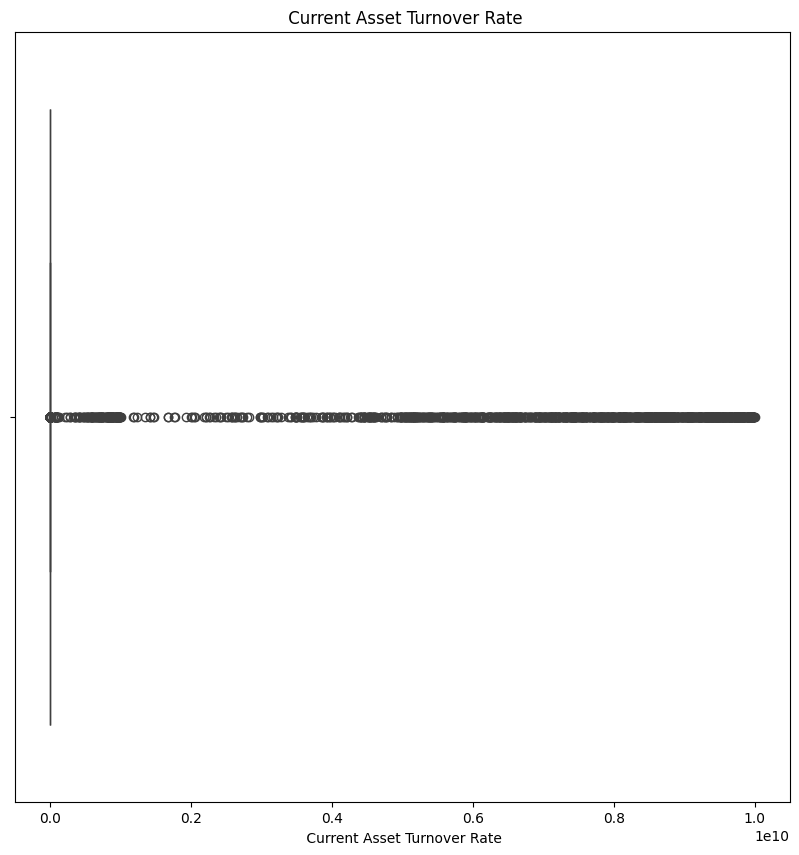

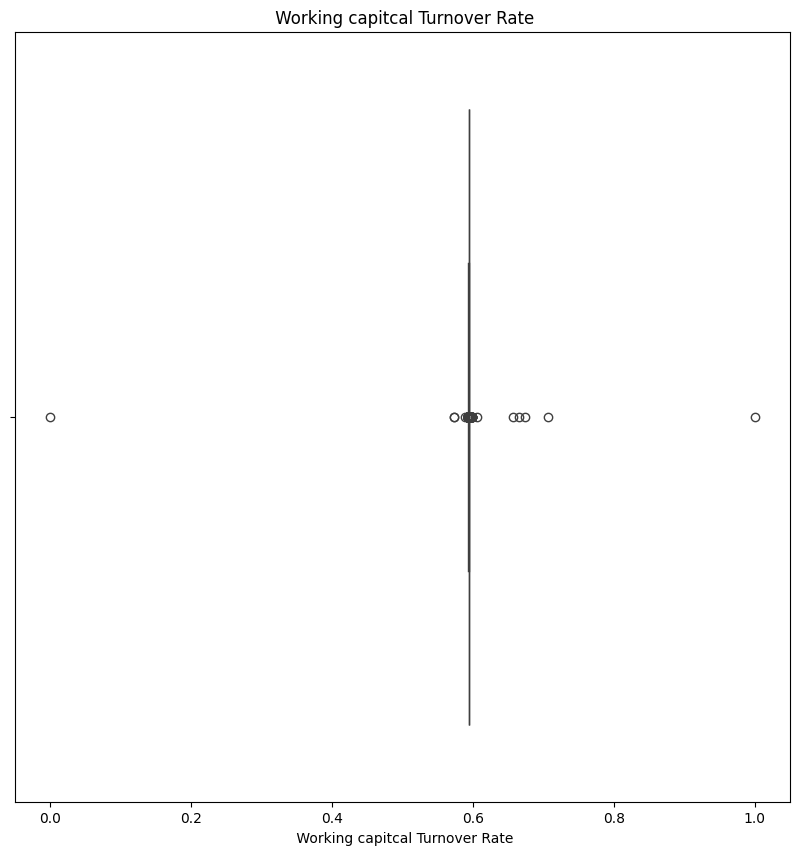

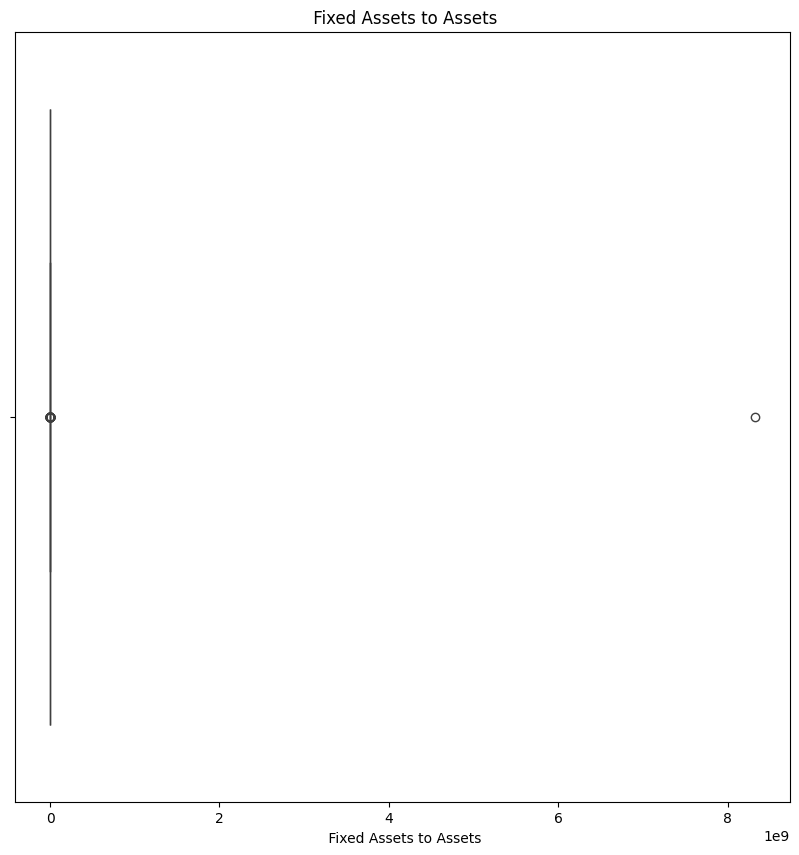

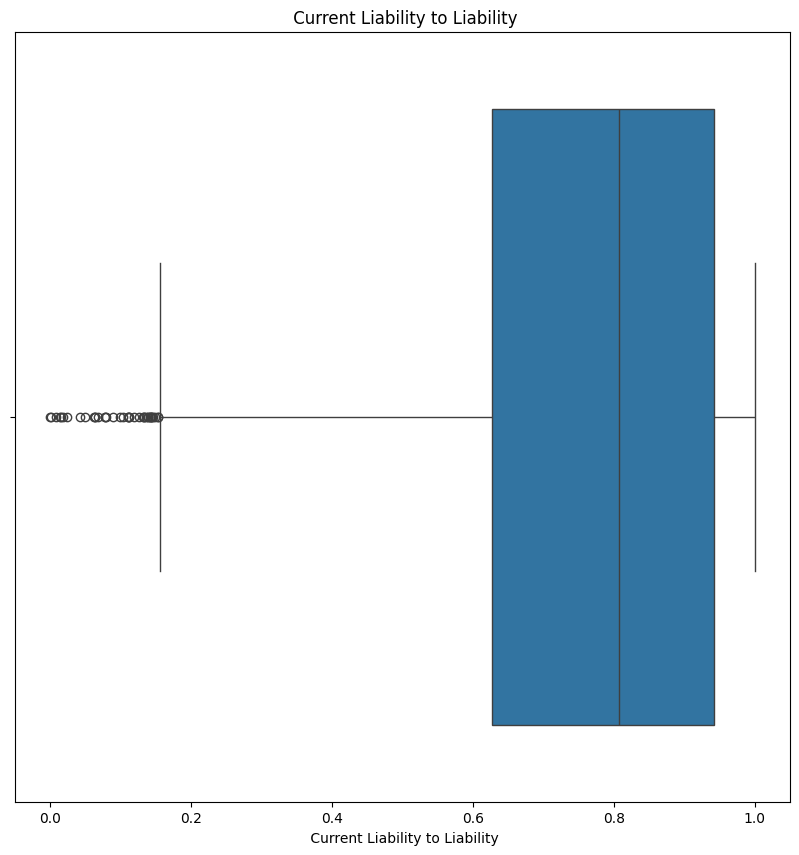

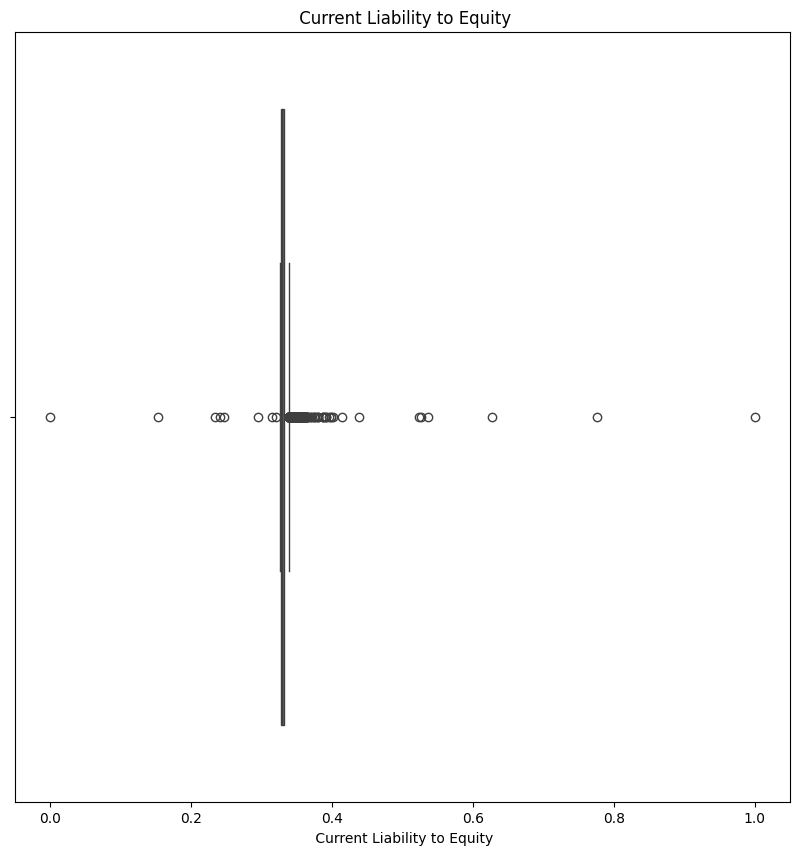

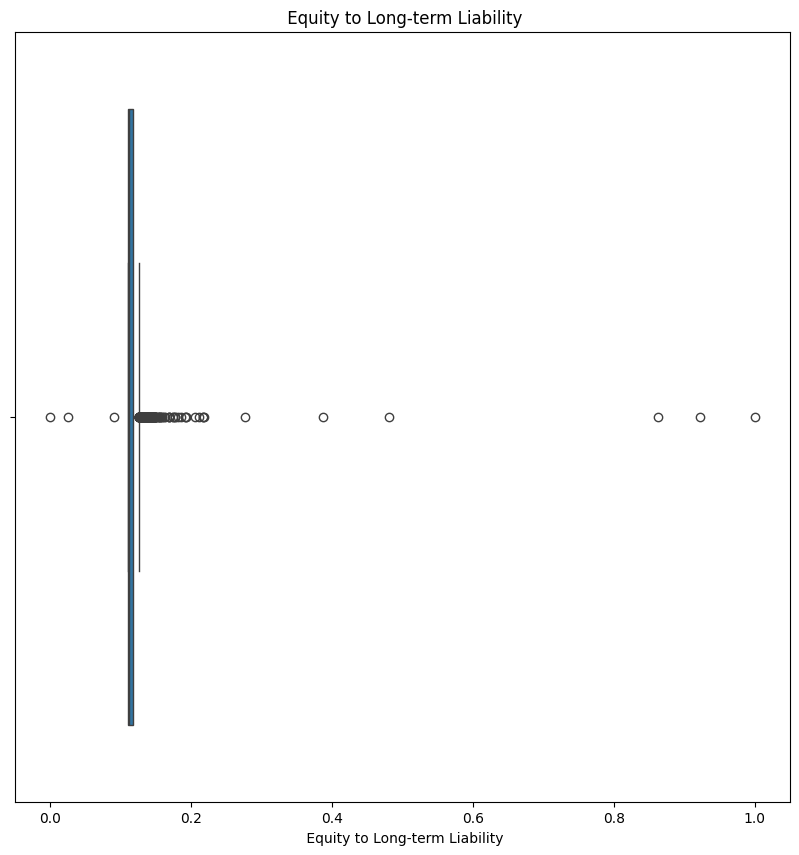

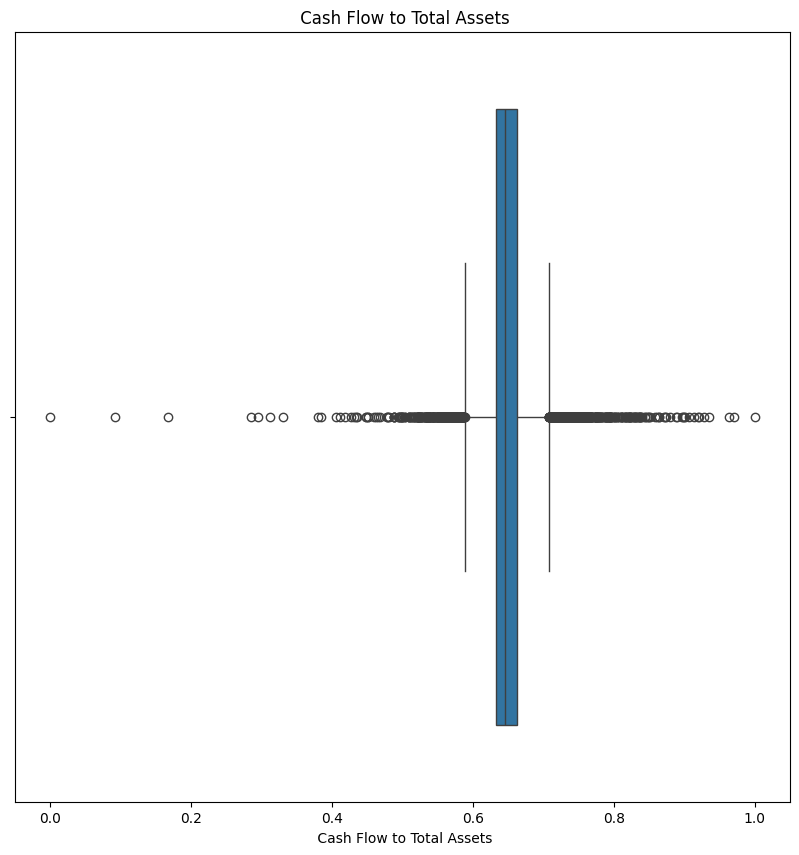

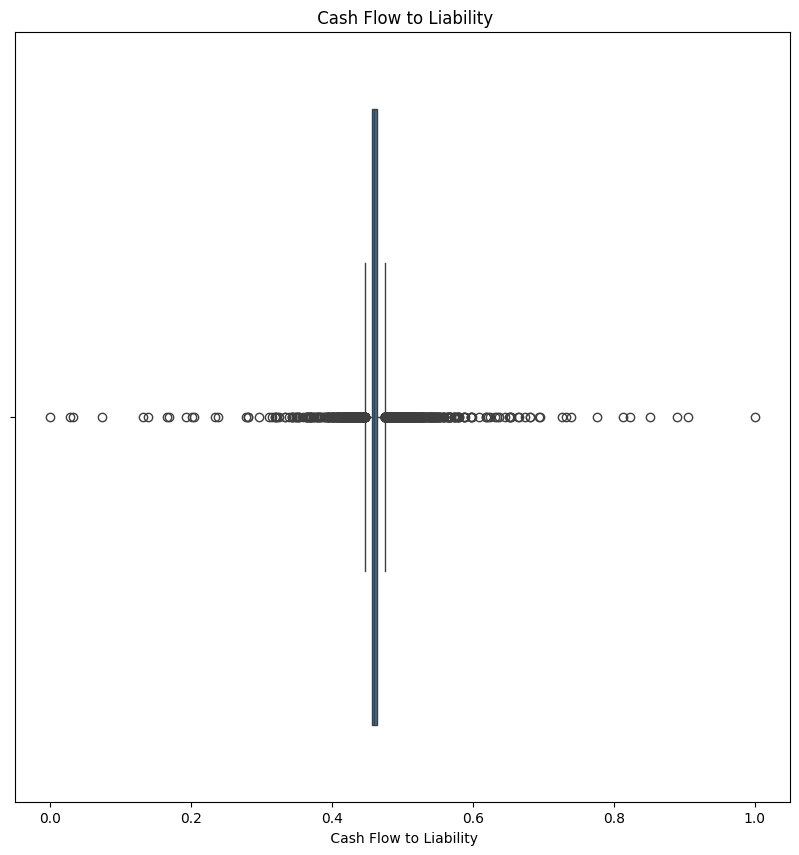

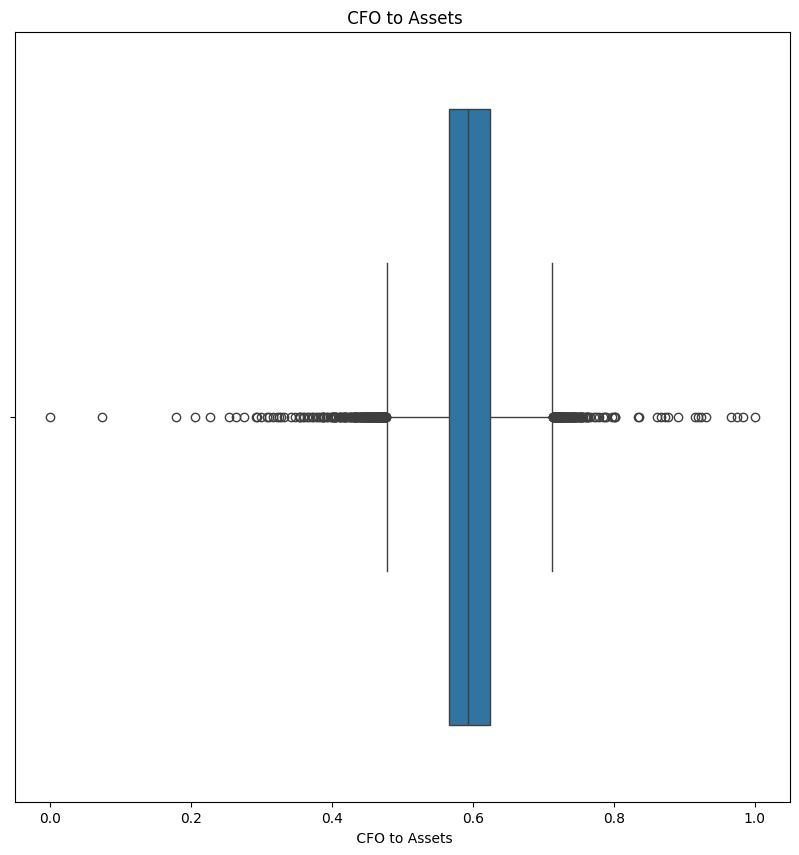

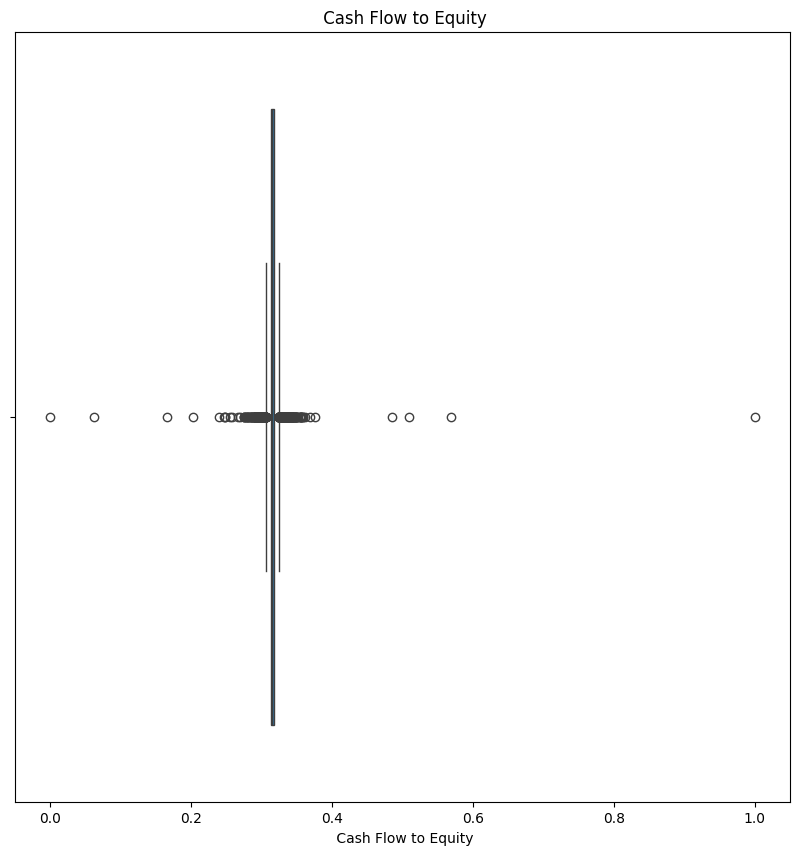

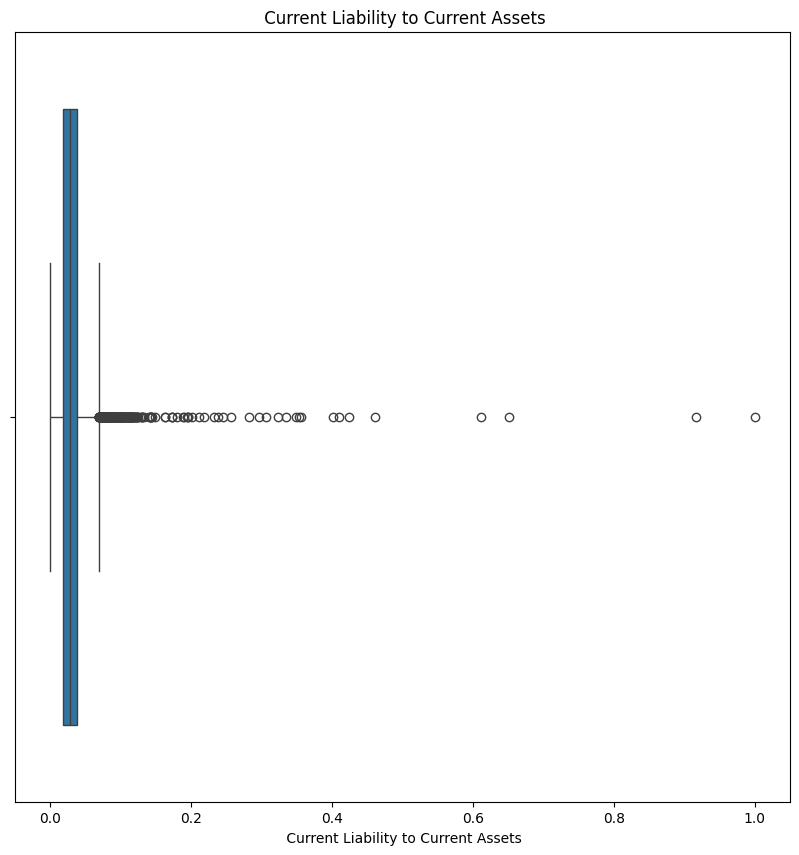

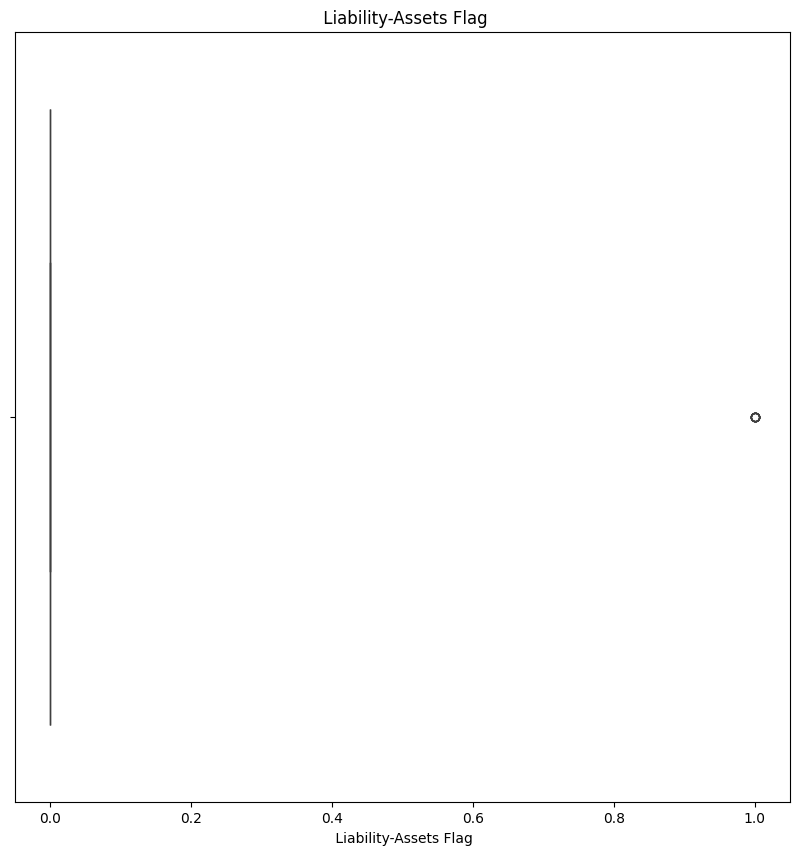

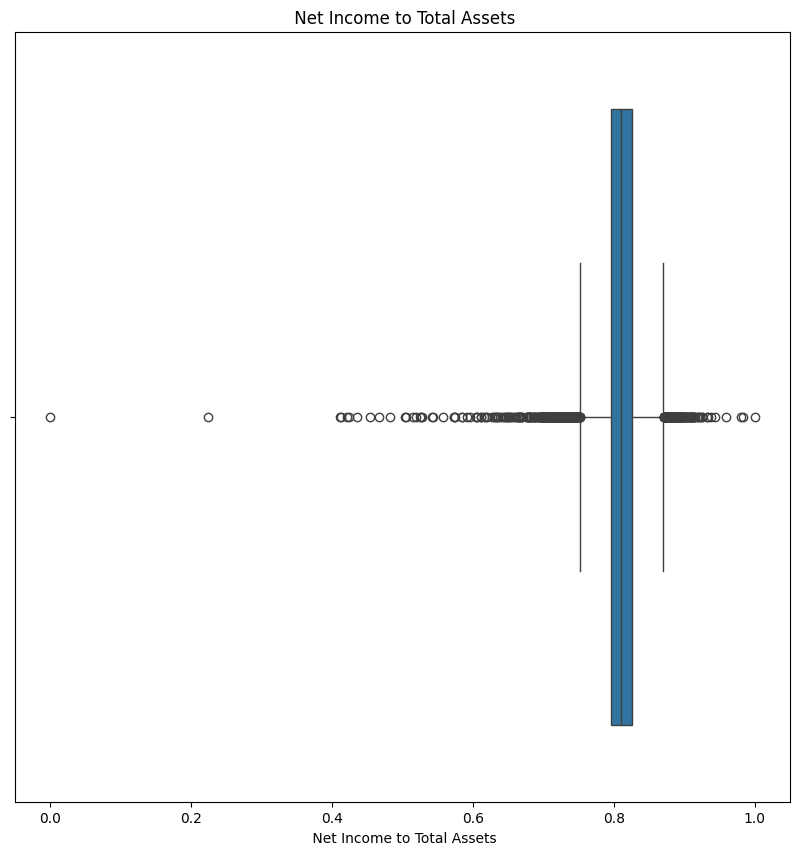

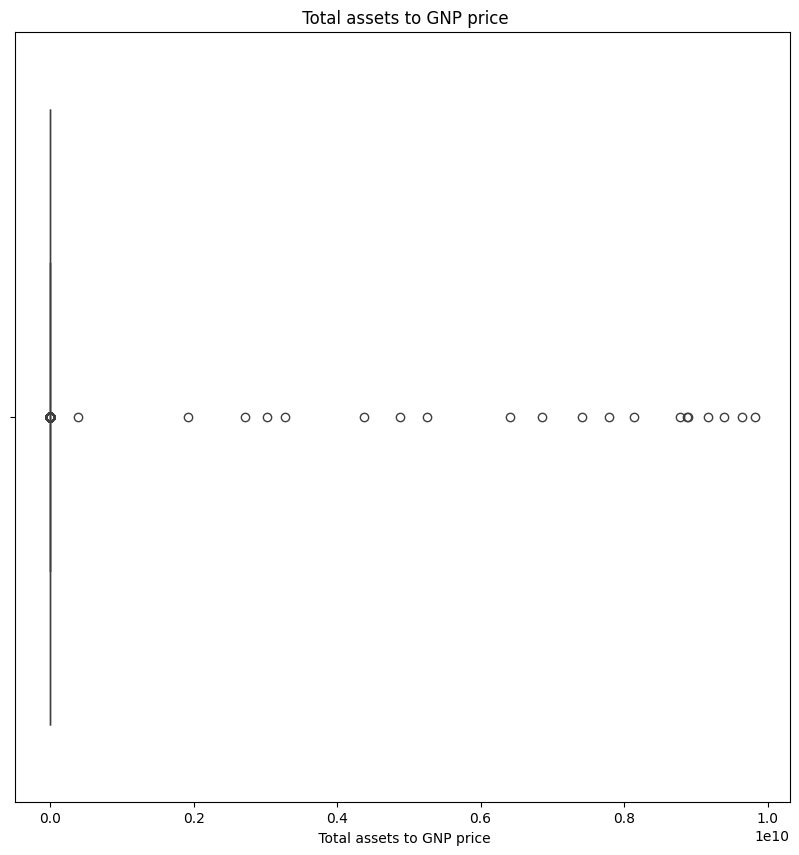

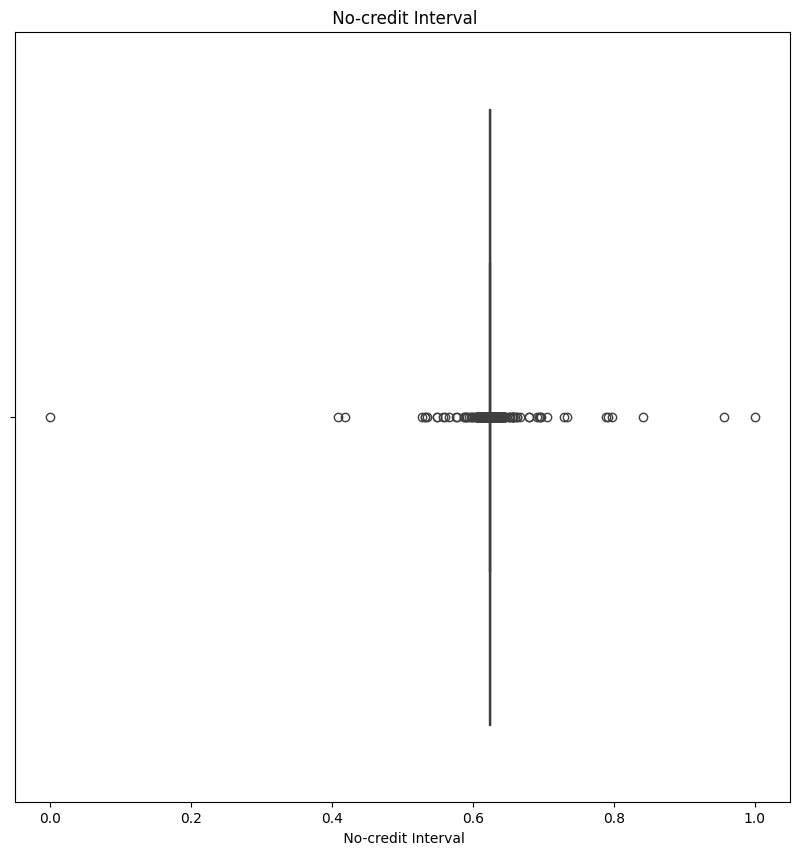

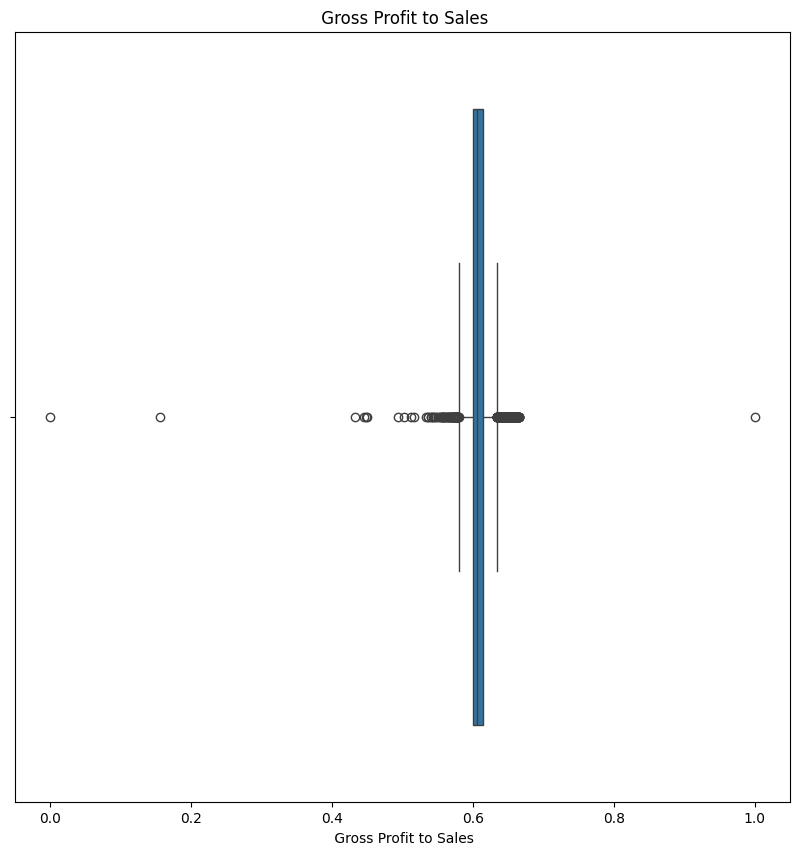

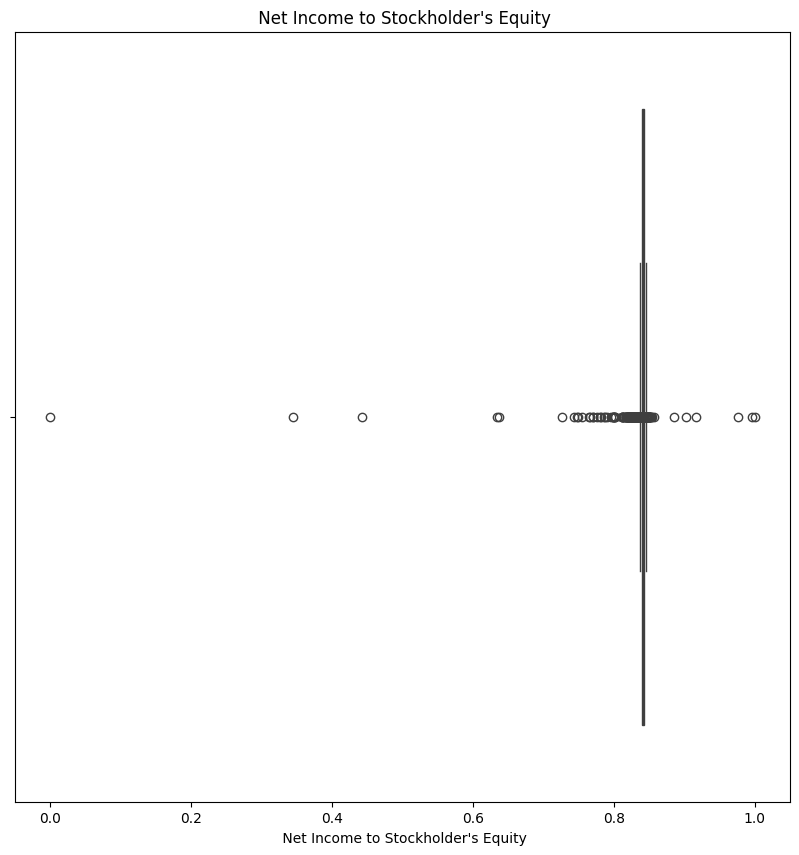

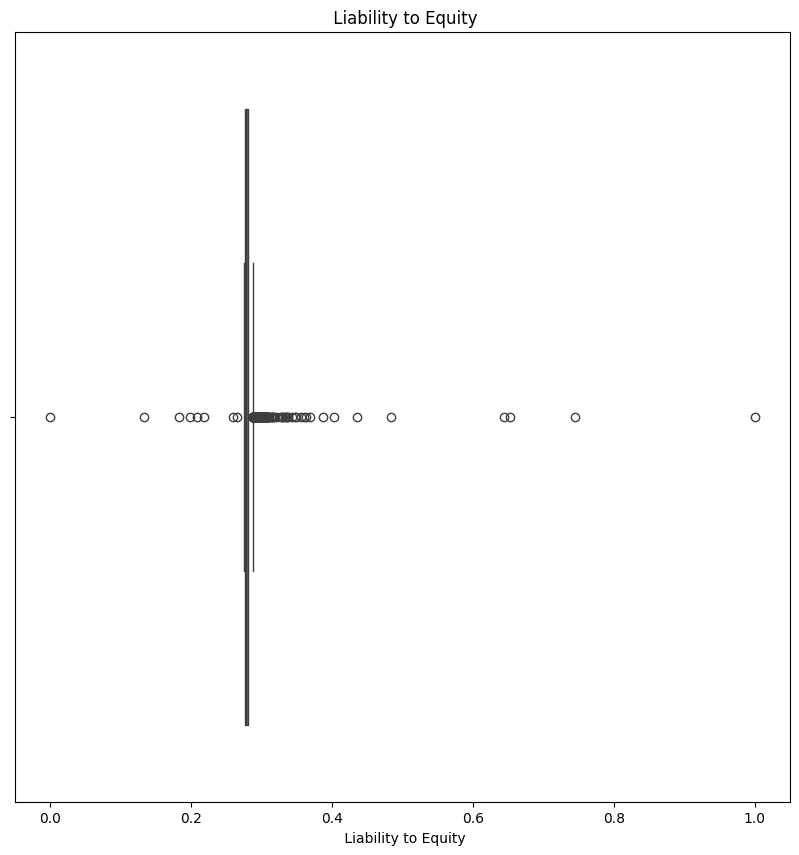

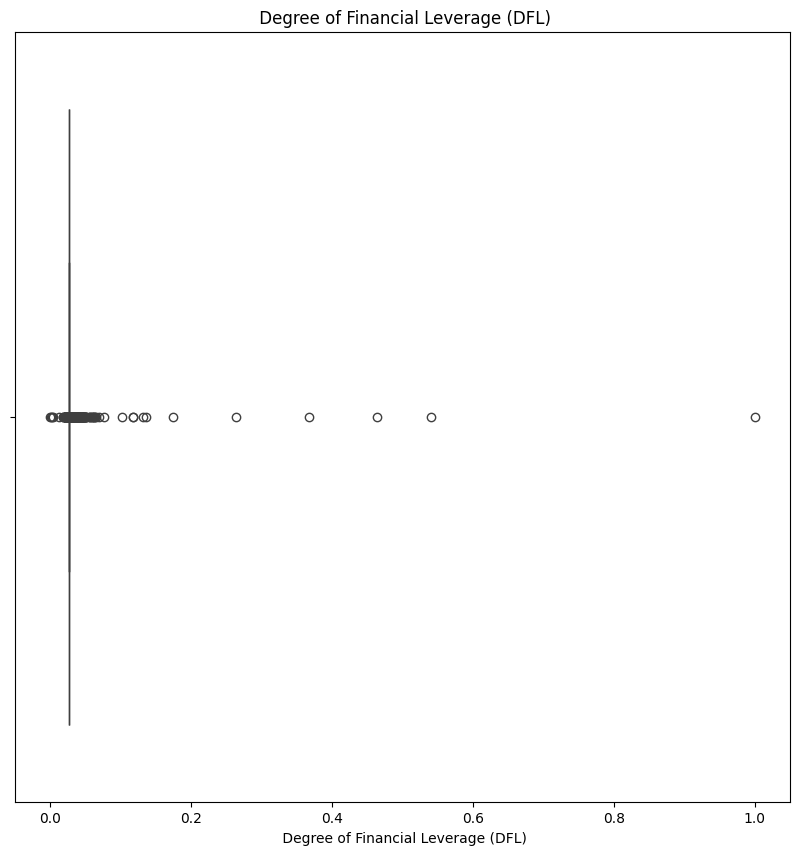

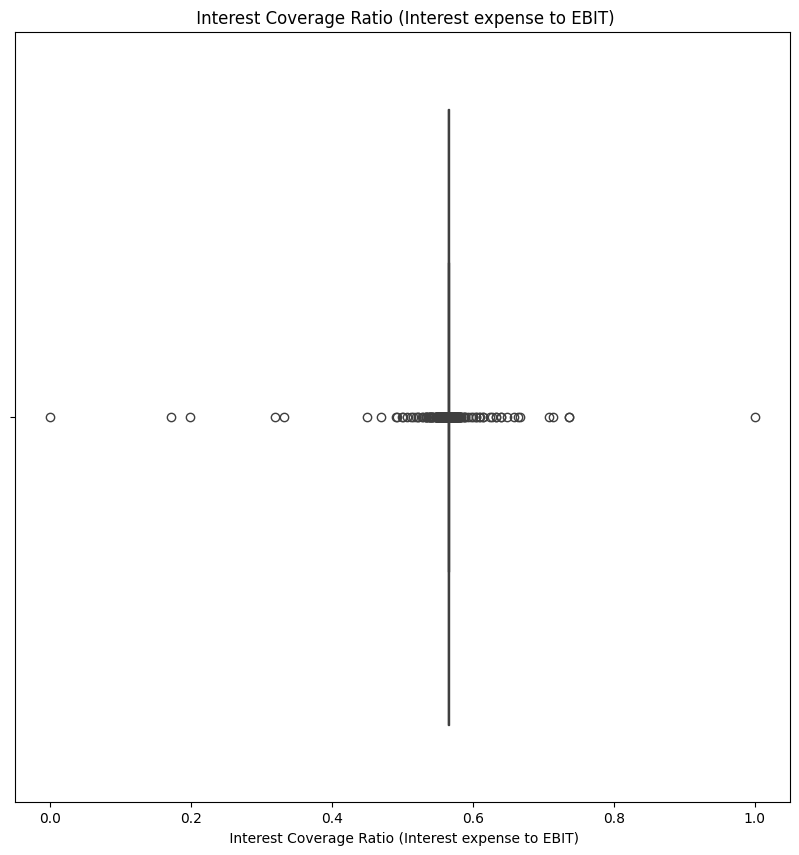

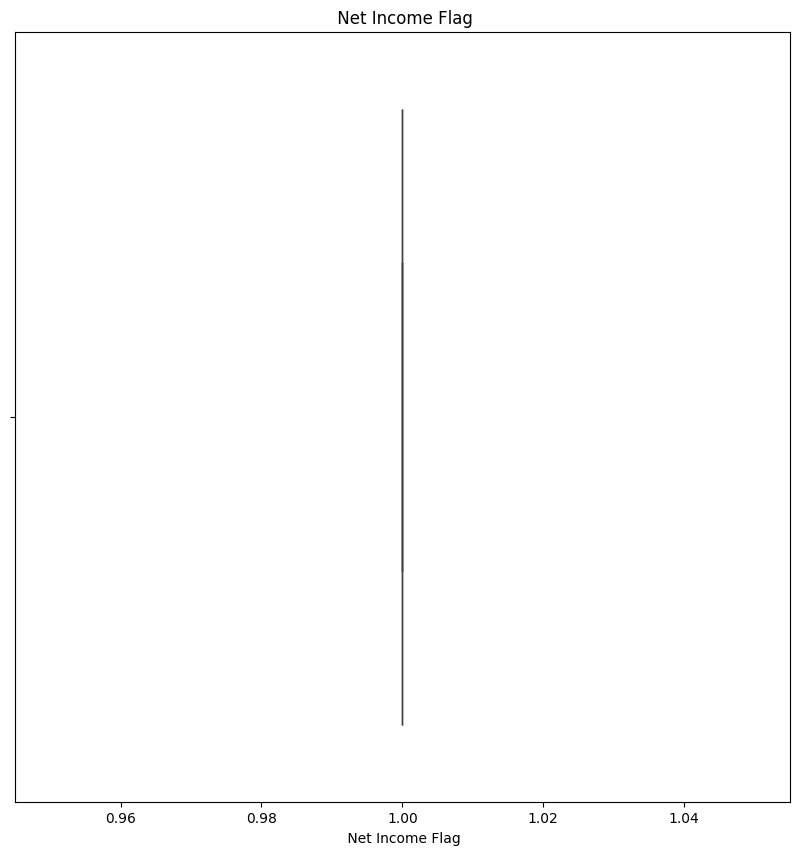

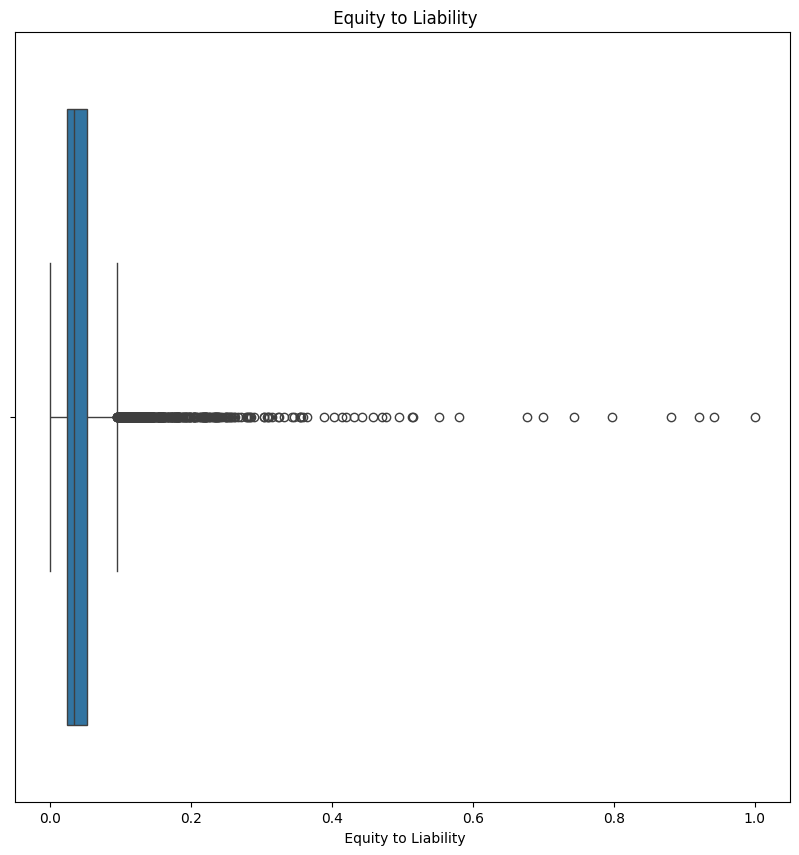

In [182]:
#after removing outliers
for column in df_filtered.columns:
    plt.figure(figsize=(10, 10))
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()

In [183]:
# Generate descriptive statistics
print(df_filtered.describe())

       Bankrupt   ROA(C) before interest and depreciation before interest  \
count    1379.0                                        1379.000000          
mean        0.0                                           0.517762          
std         0.0                                           0.037453          
min         0.0                                           0.384878          
25%         0.0                                           0.494833          
50%         0.0                                           0.514405          
75%         0.0                                           0.540023          
max         0.0                                           0.644859          

        ROA(A) before interest and % after tax  \
count                              1379.000000   
mean                                  0.573964   
std                                   0.036653   
min                                   0.422536   
25%                                   0.554596   
50%   

#  Visualizing Feature  and Target Variable distributions 


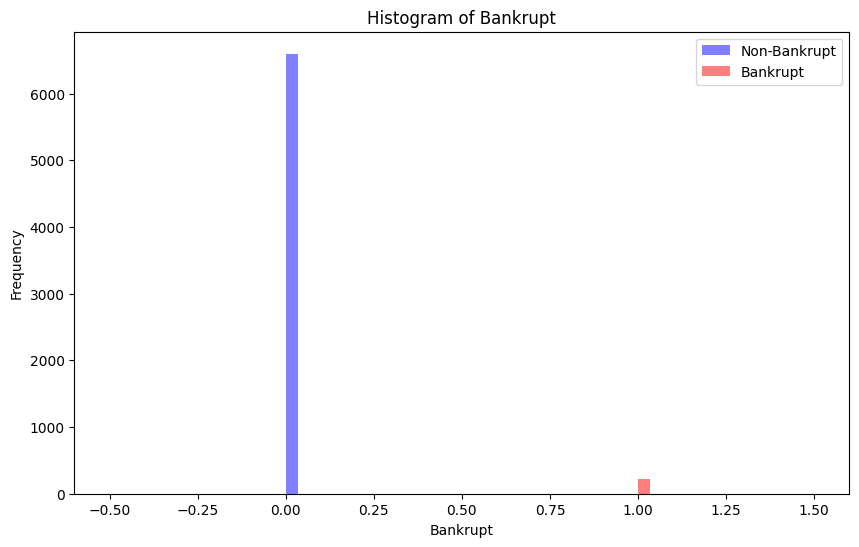

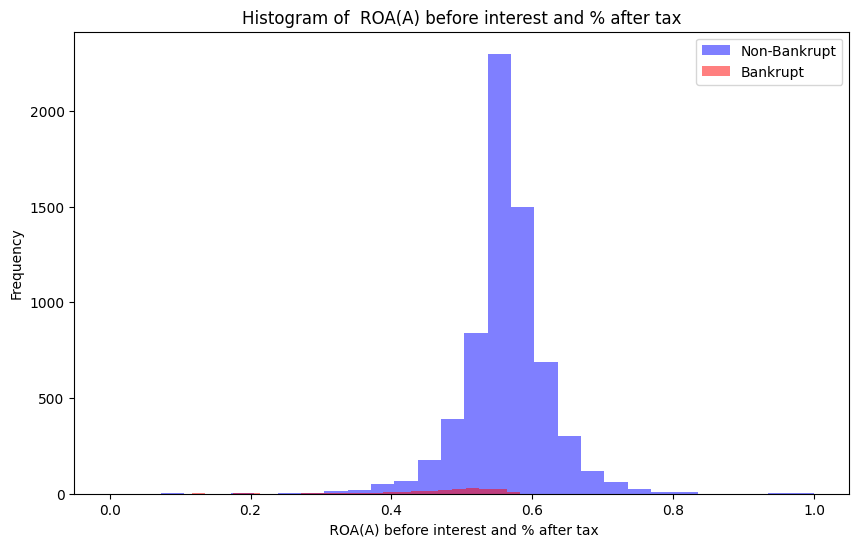

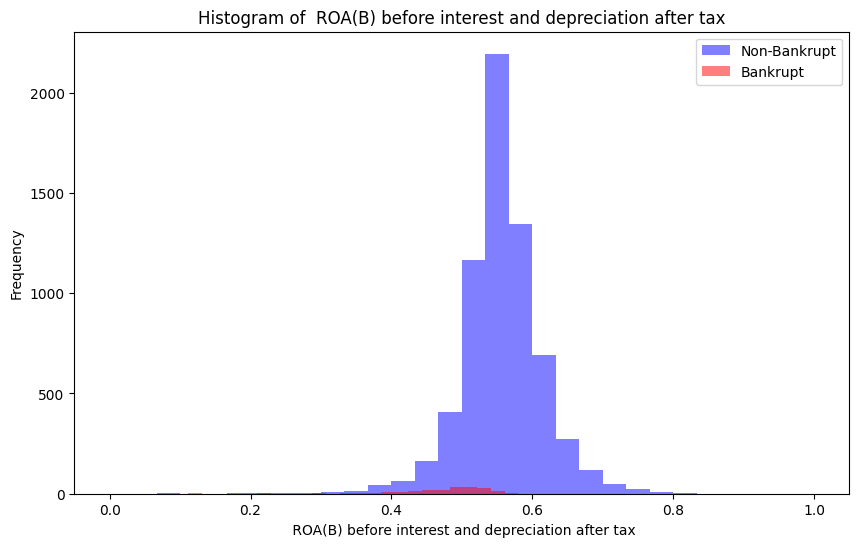

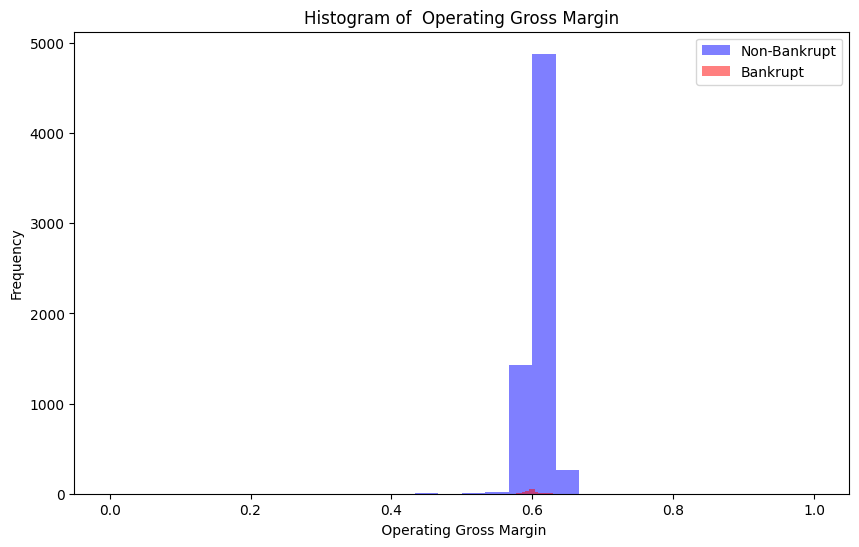

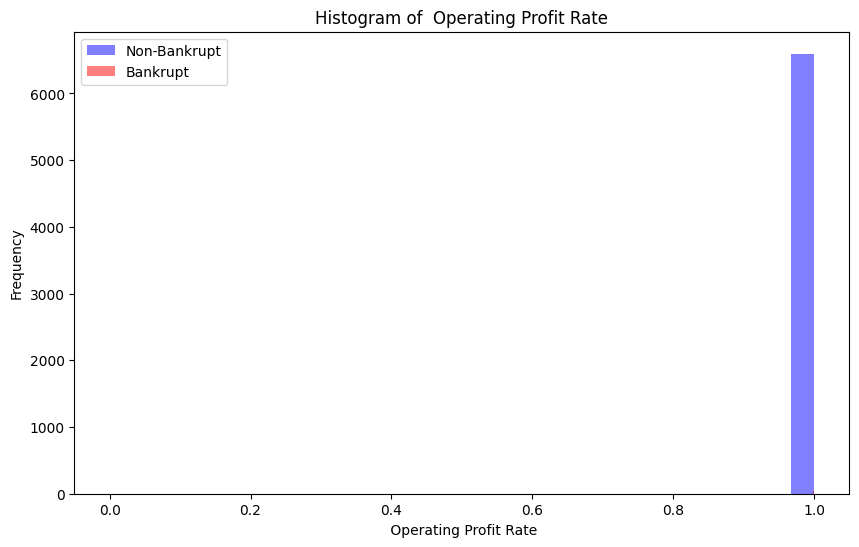

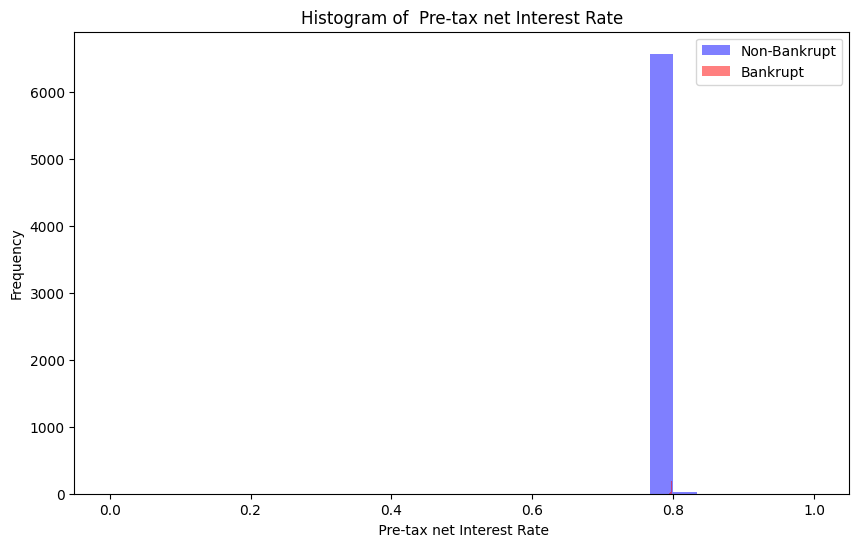

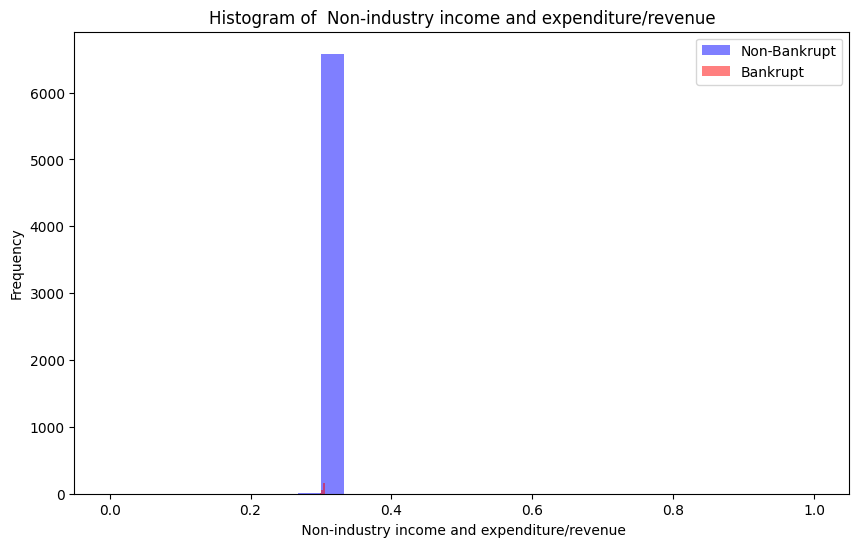

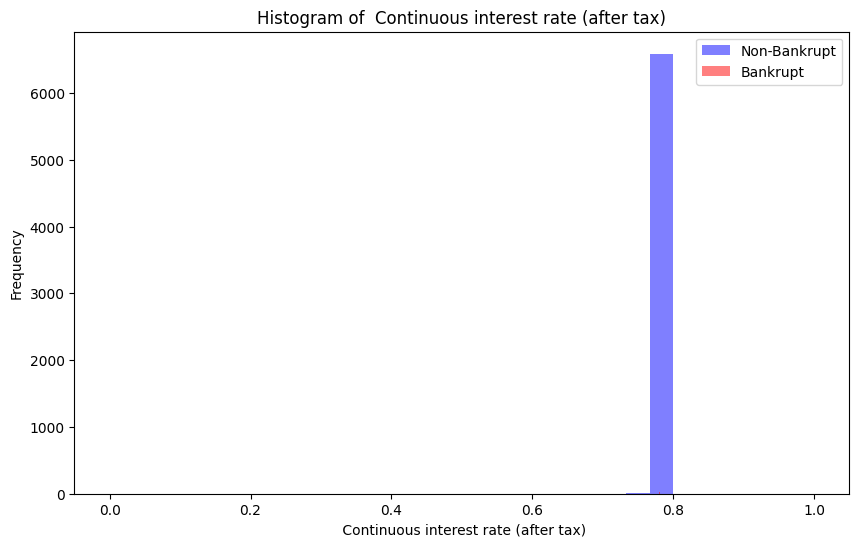

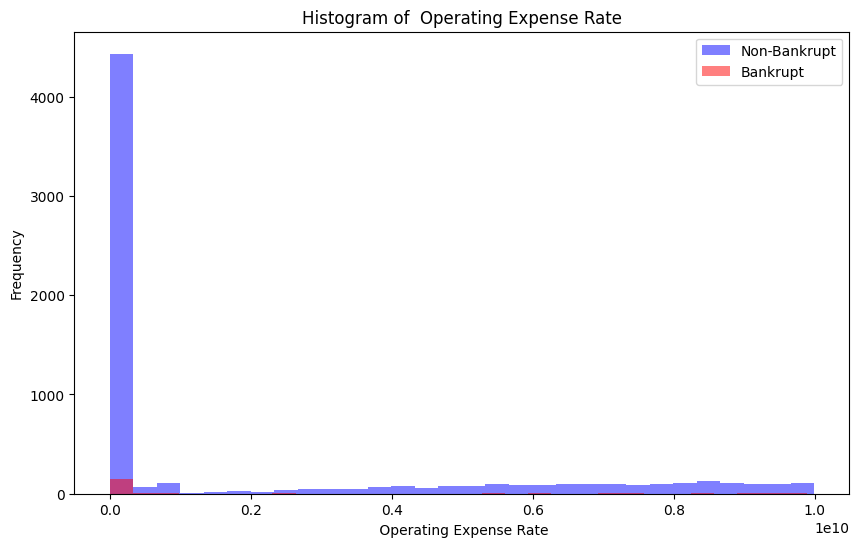

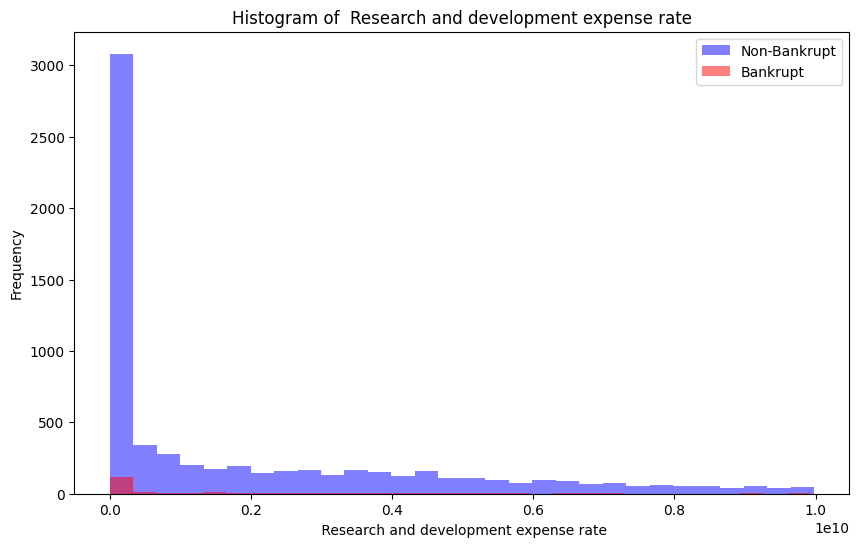

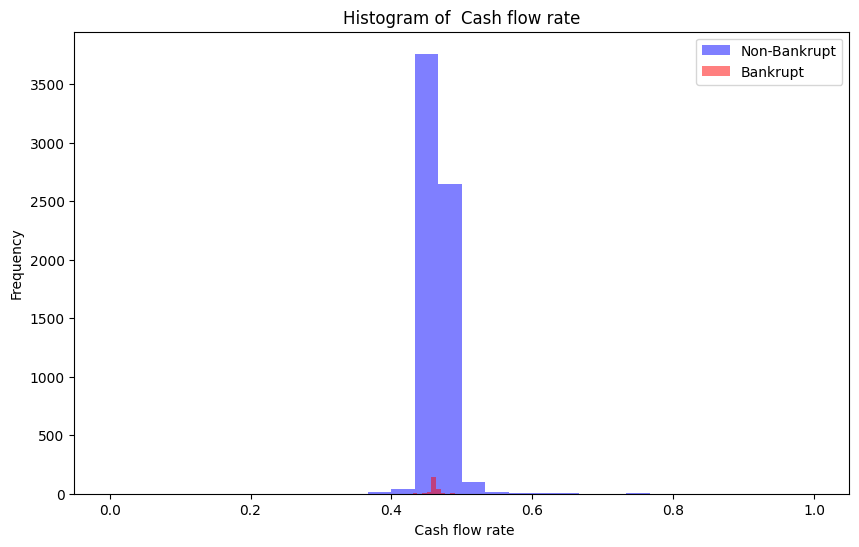

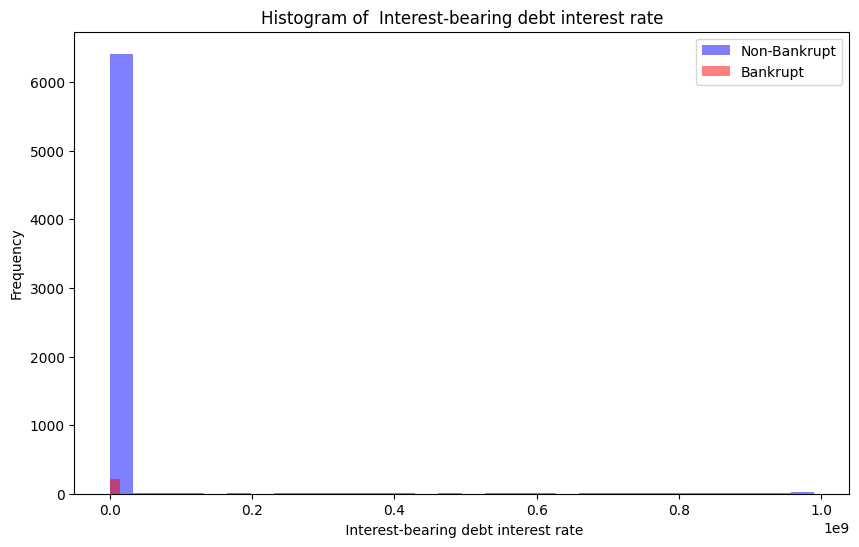

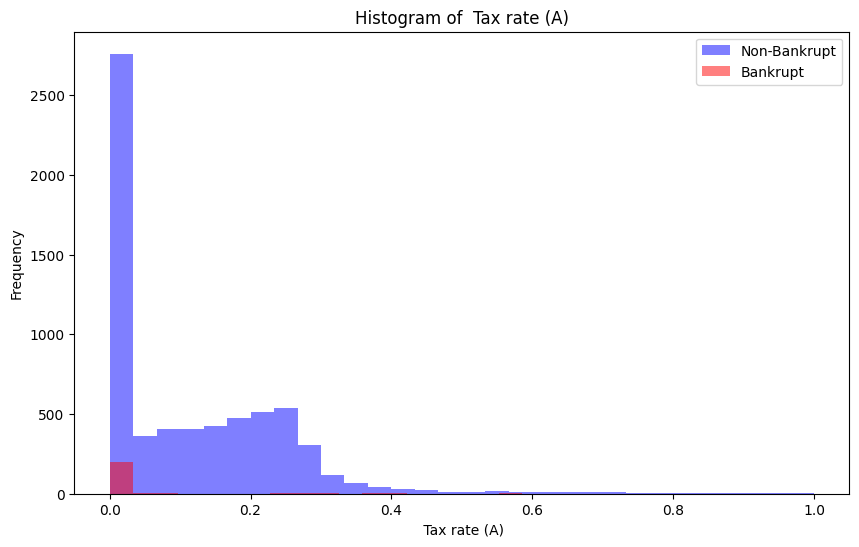

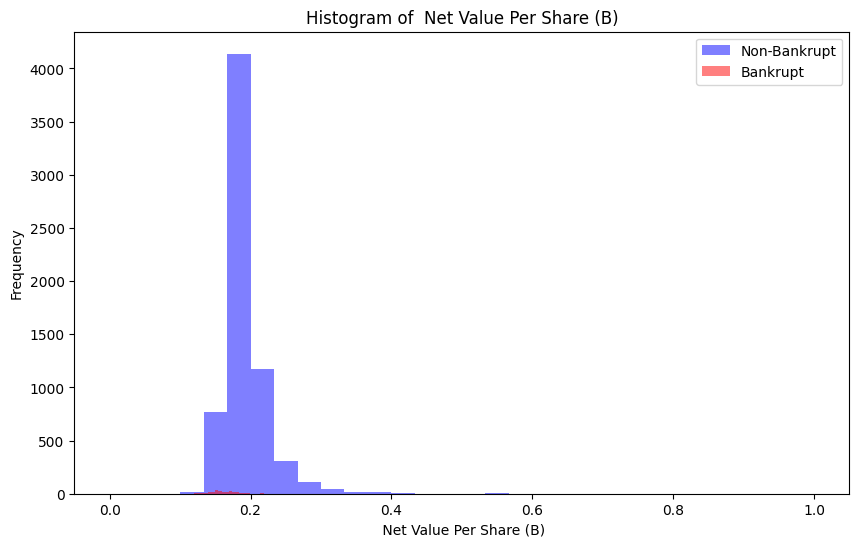

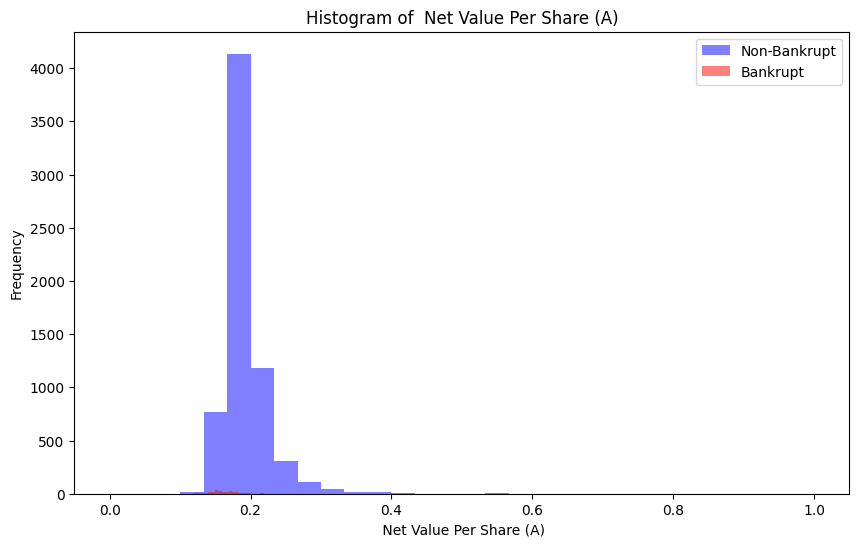

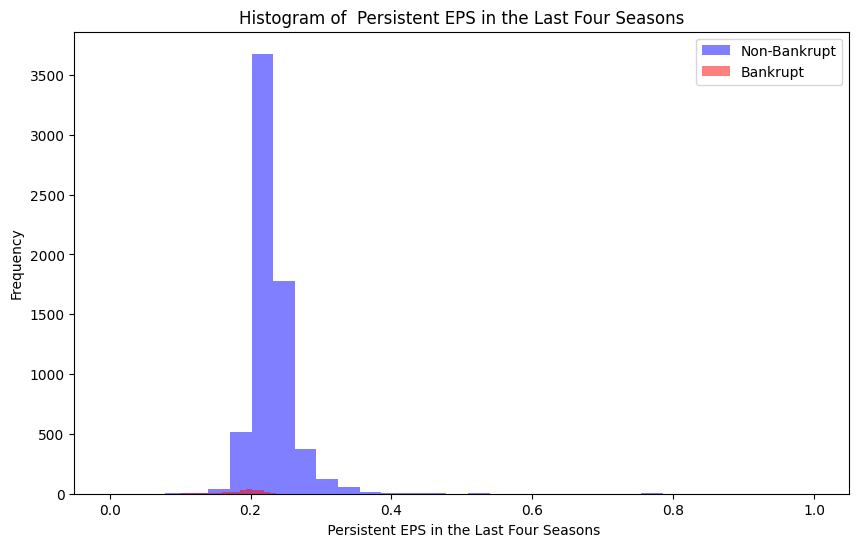

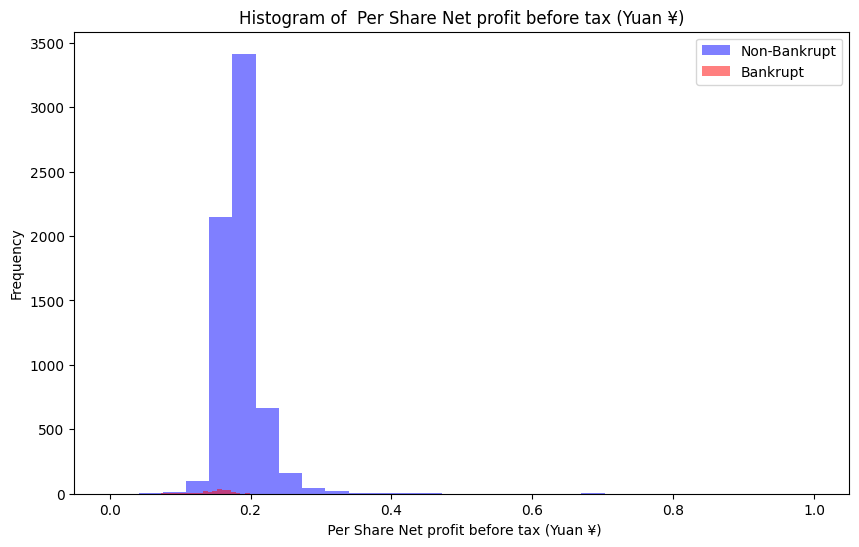

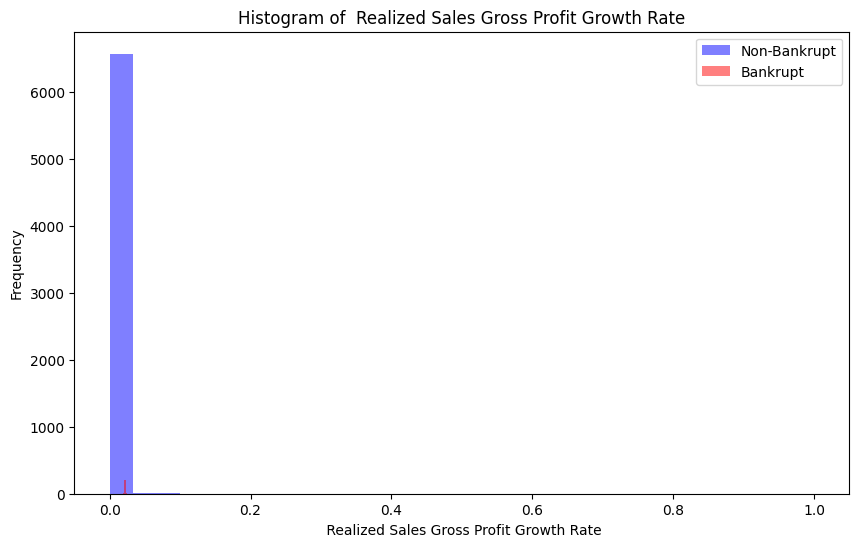

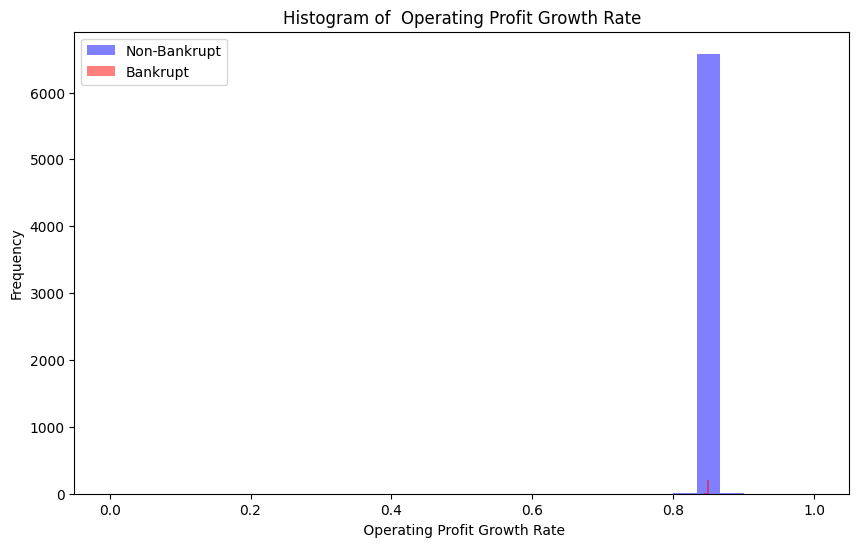

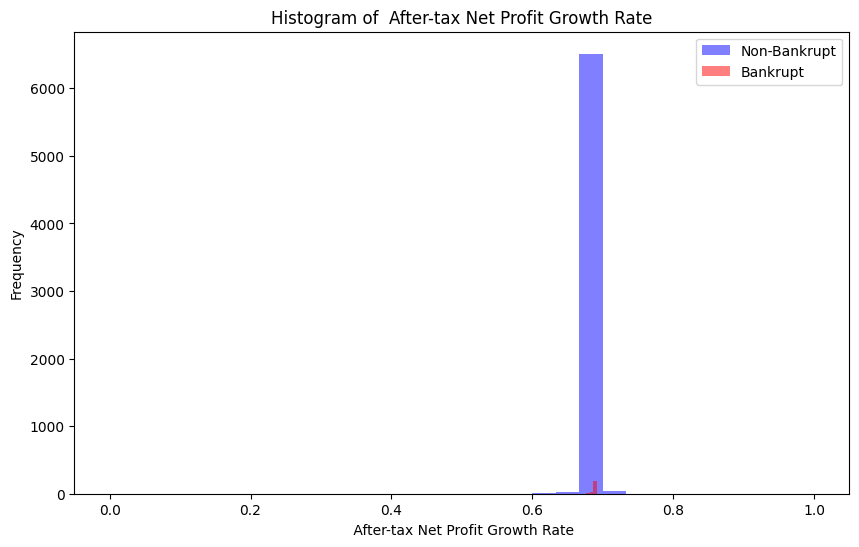

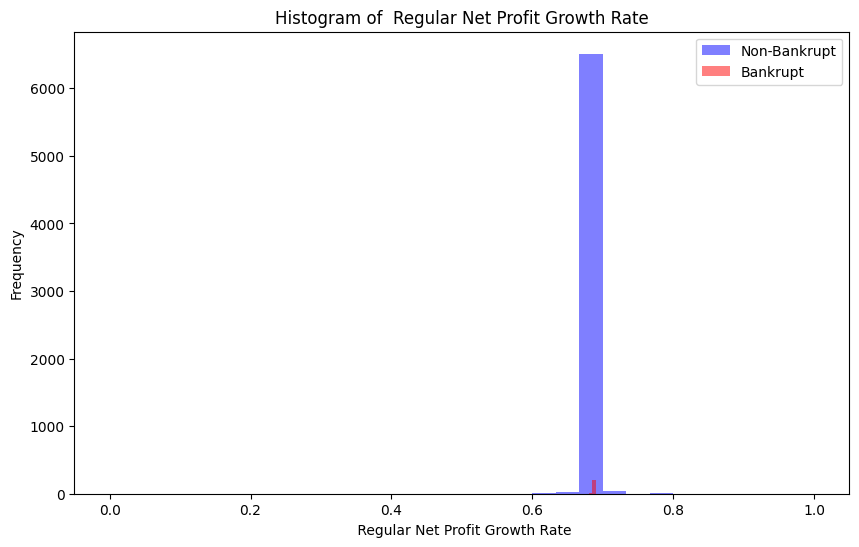

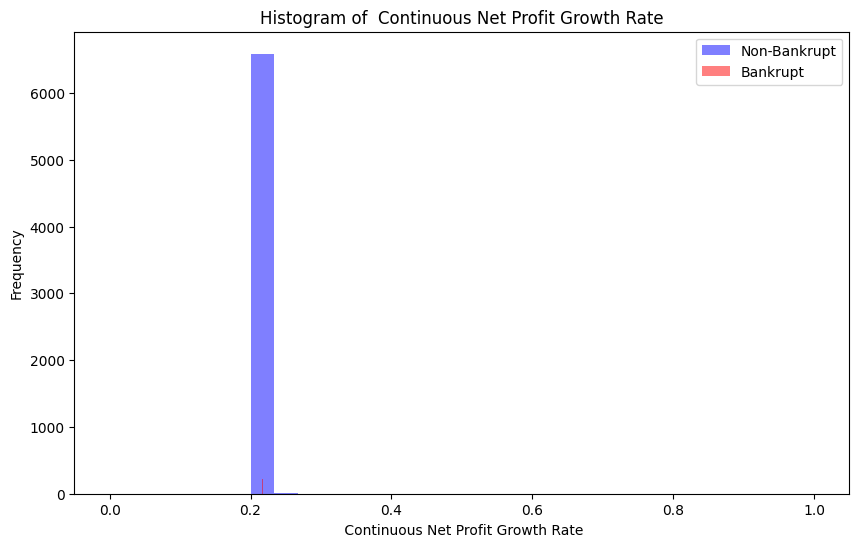

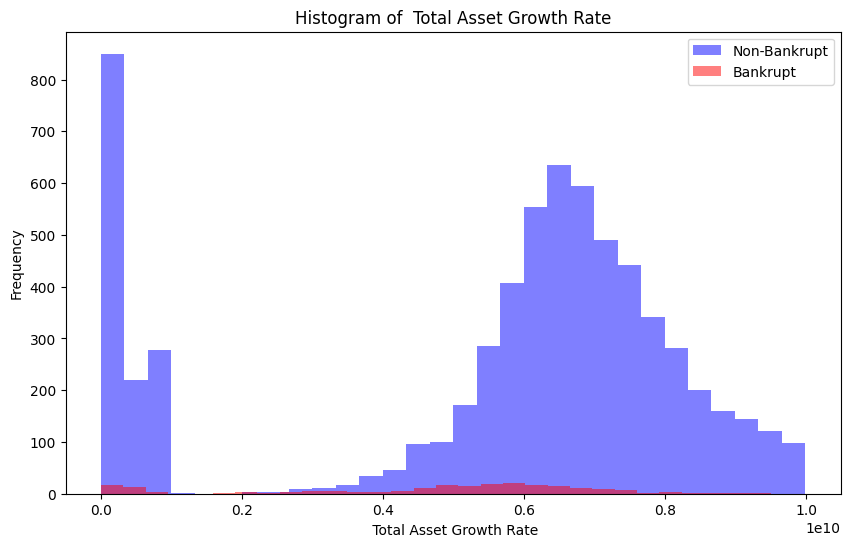

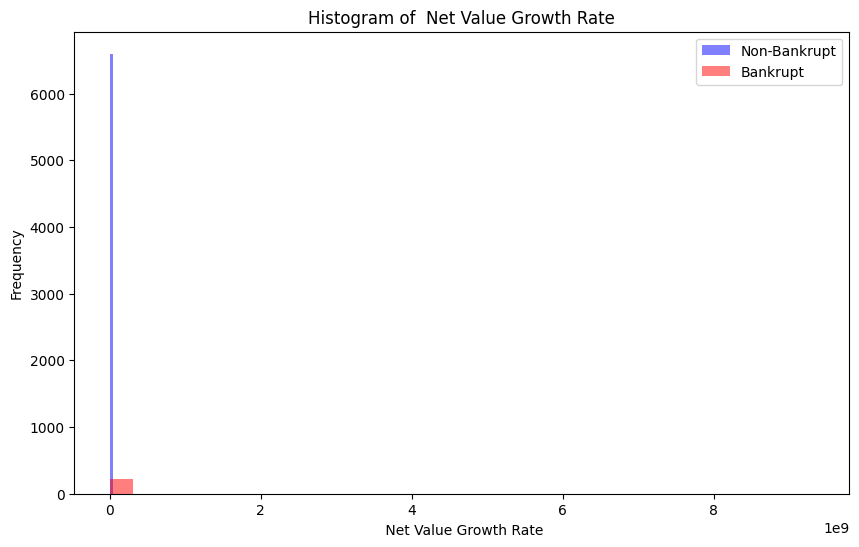

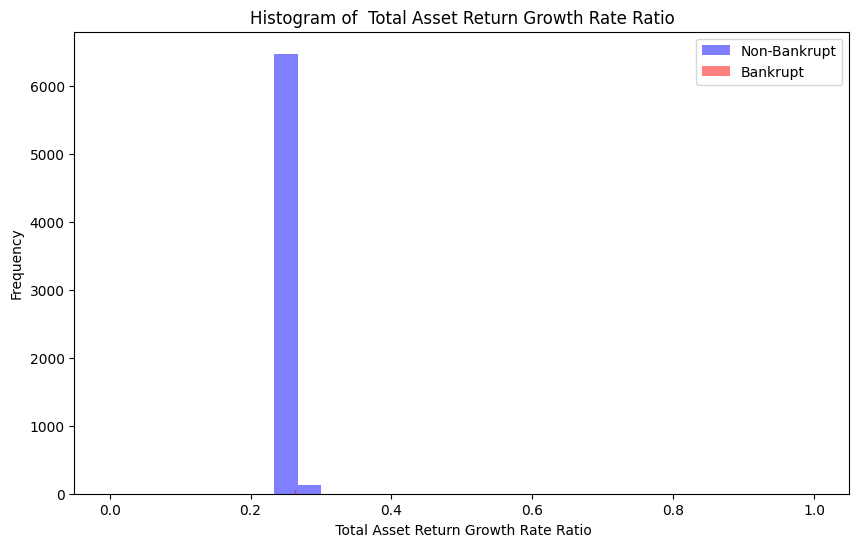

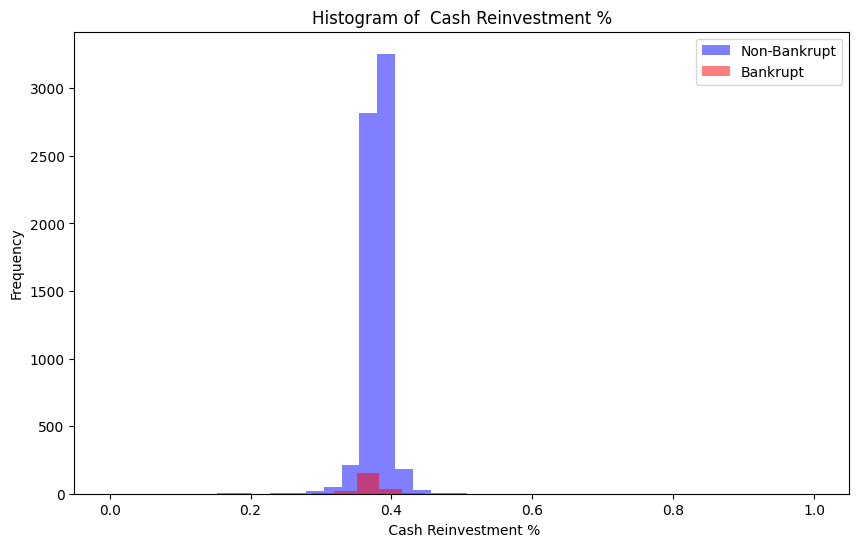

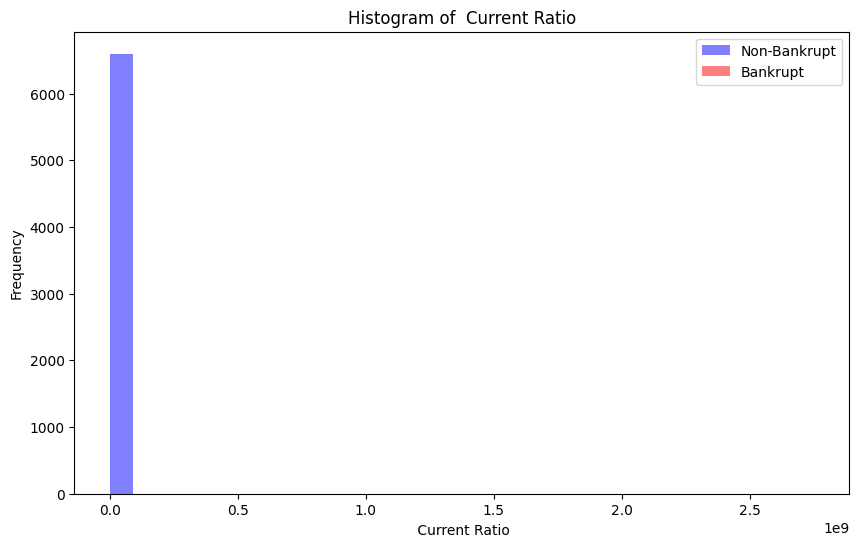

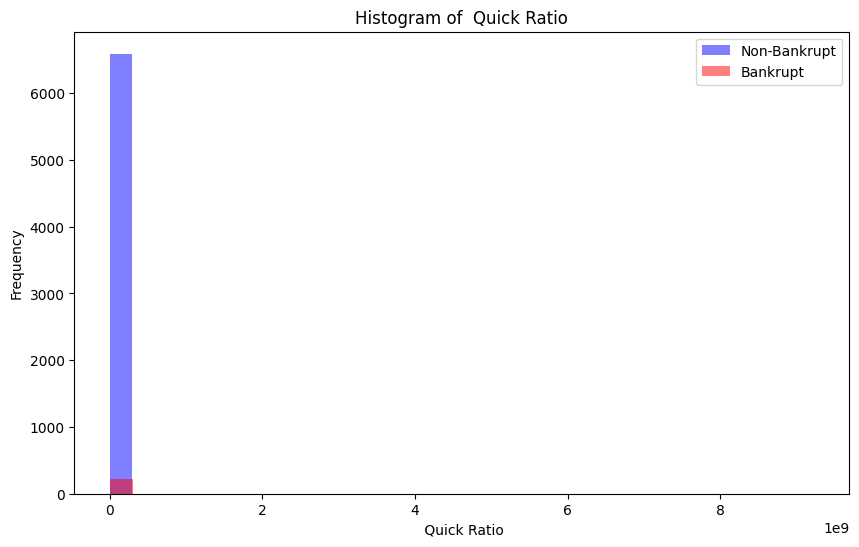

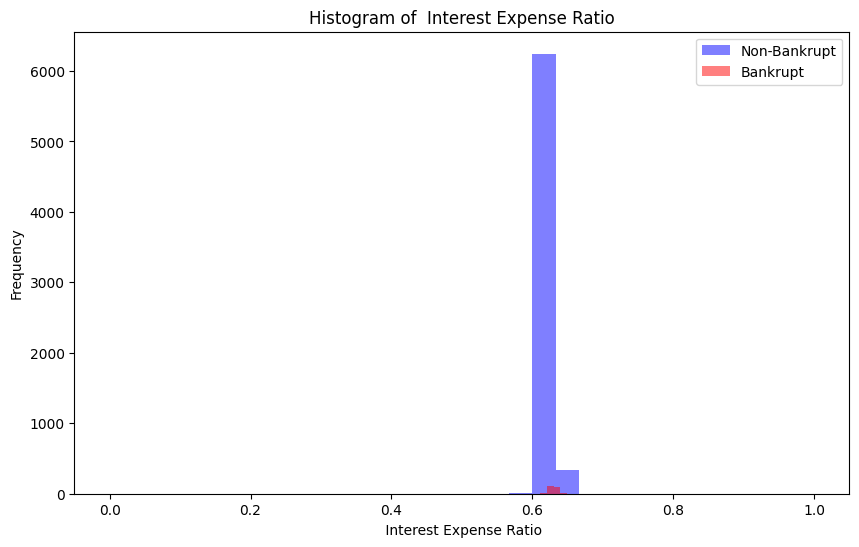

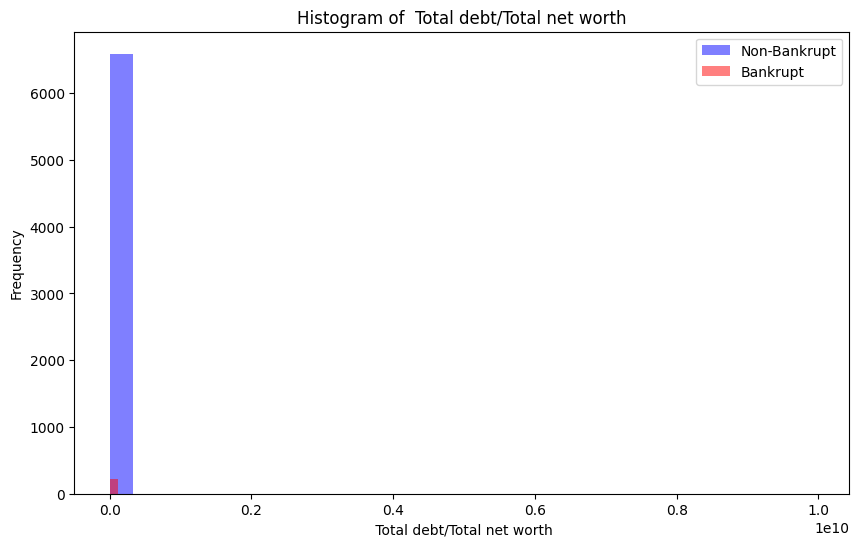

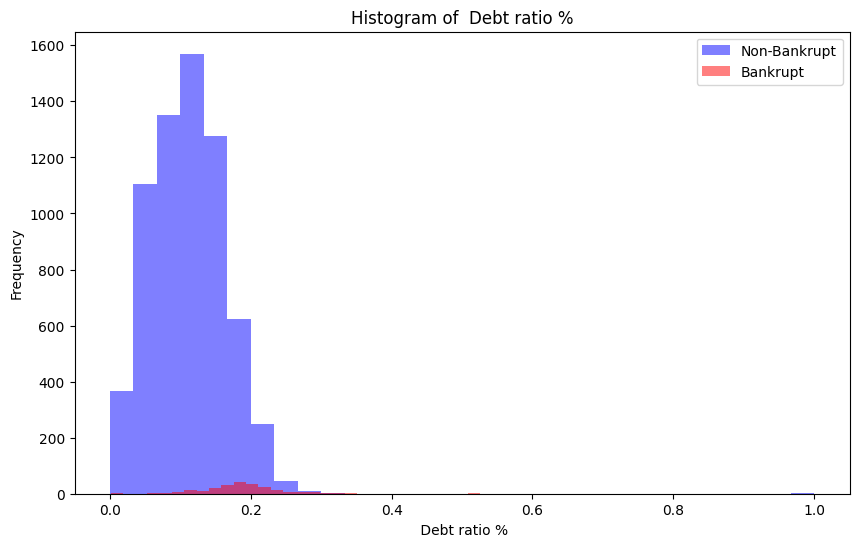

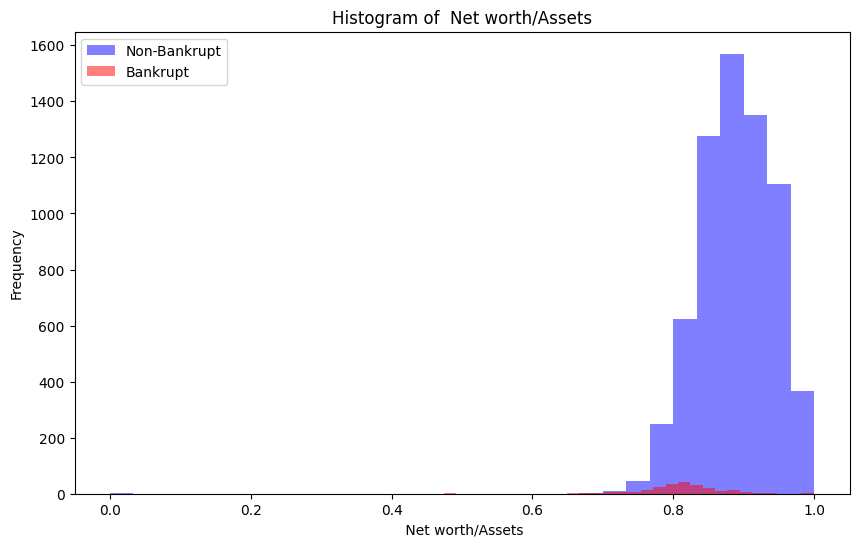

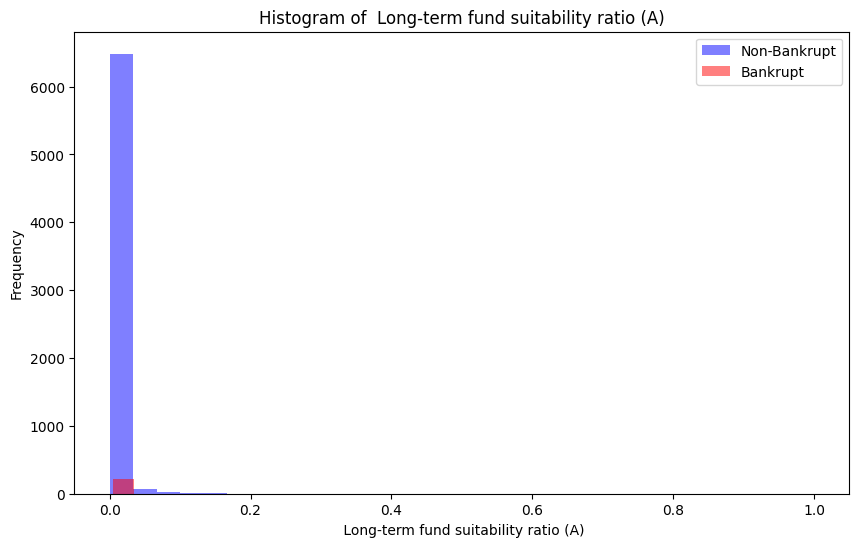

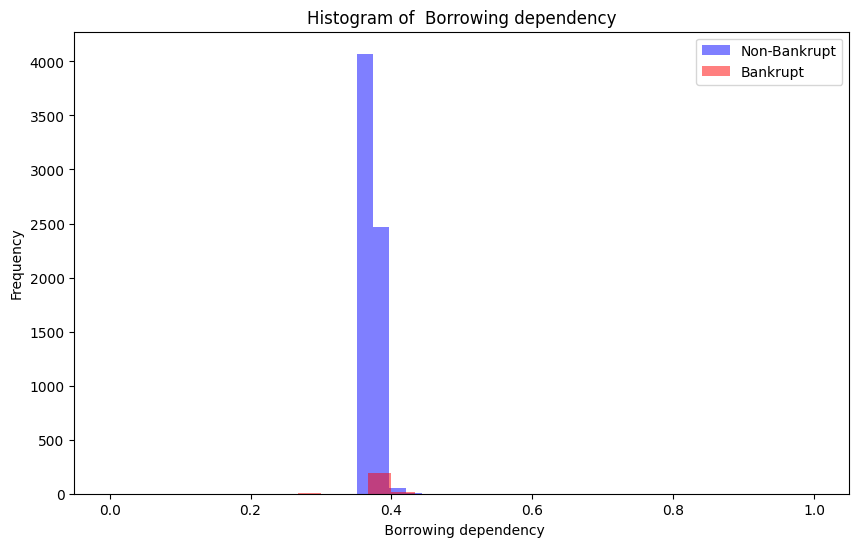

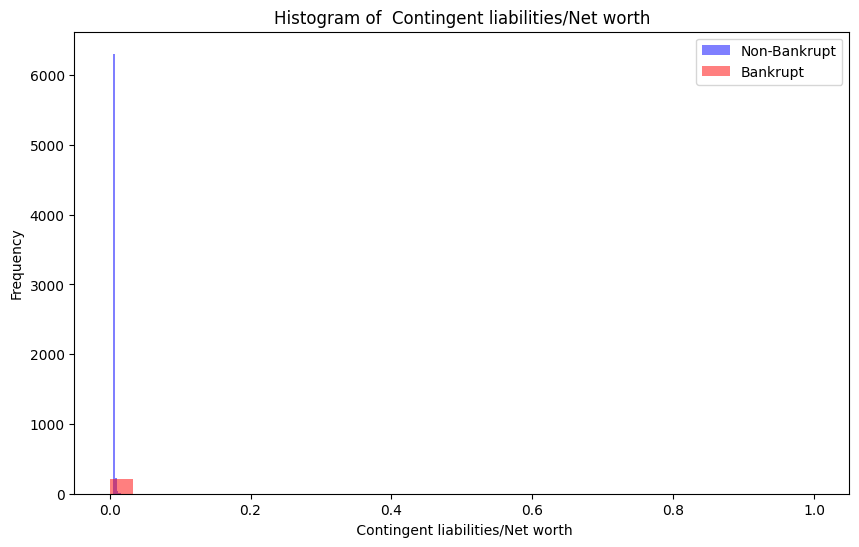

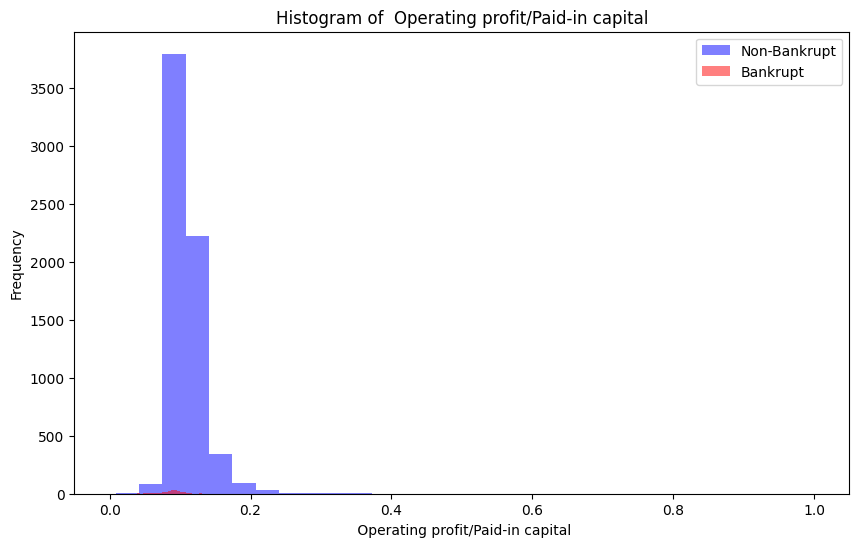

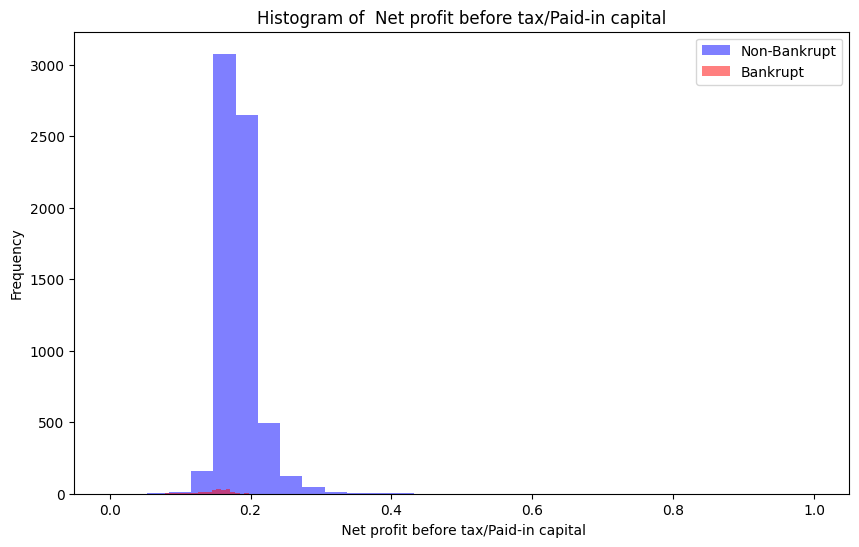

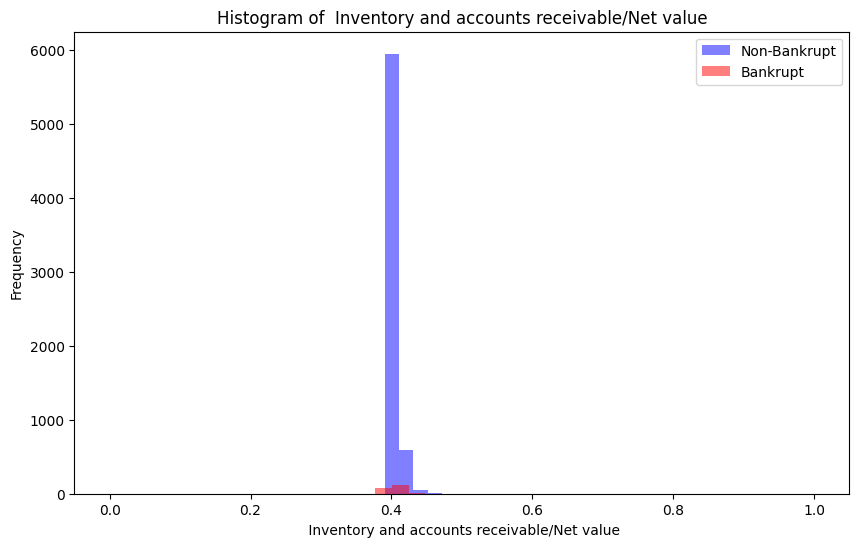

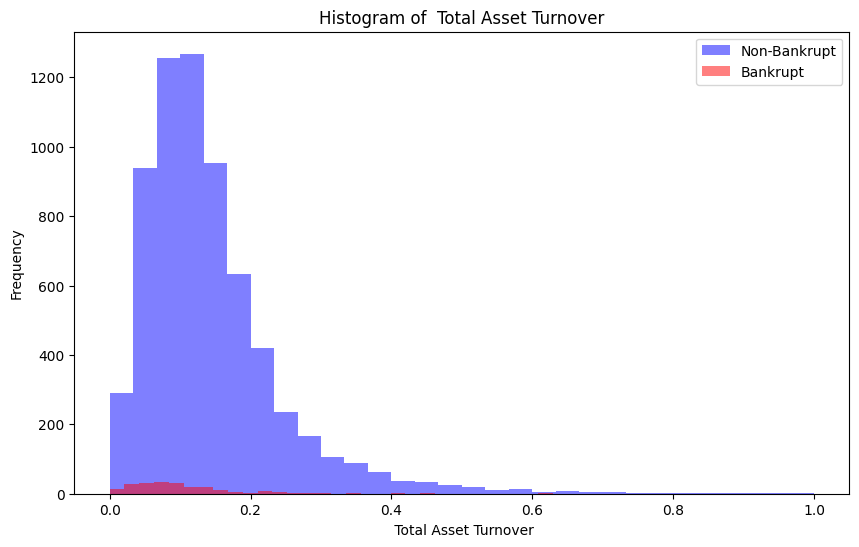

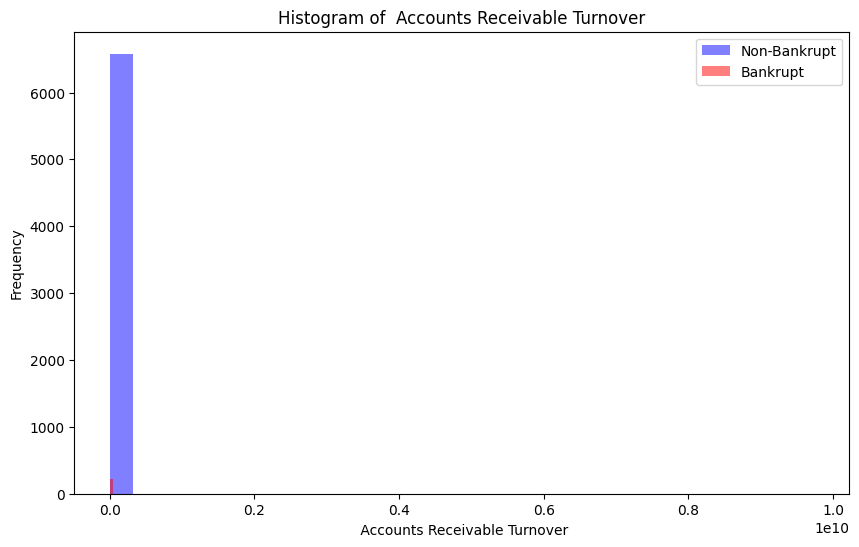

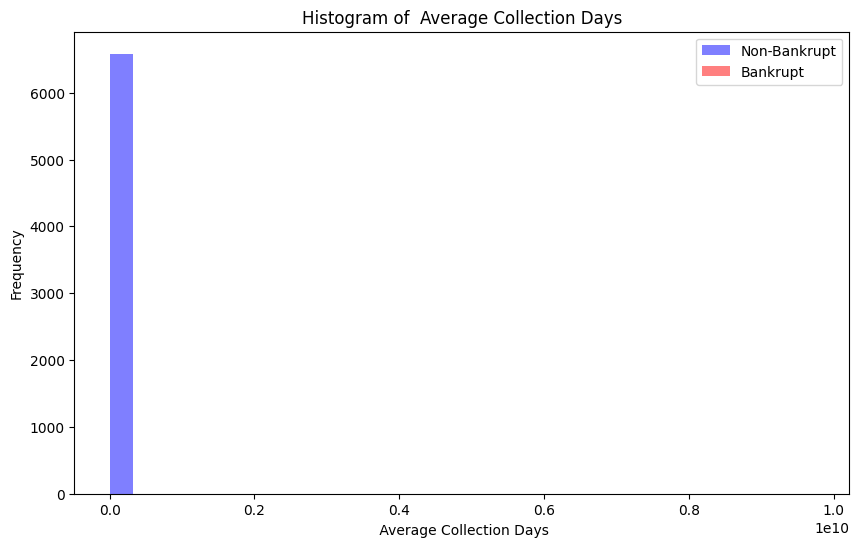

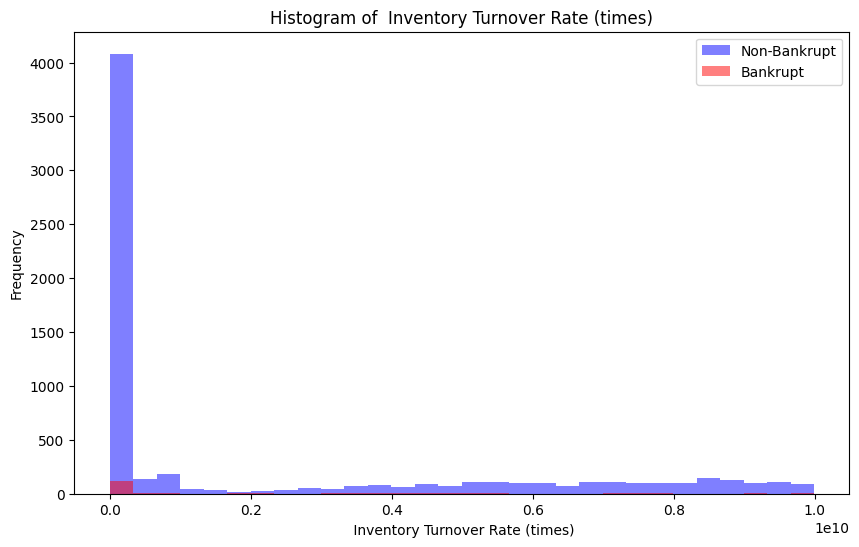

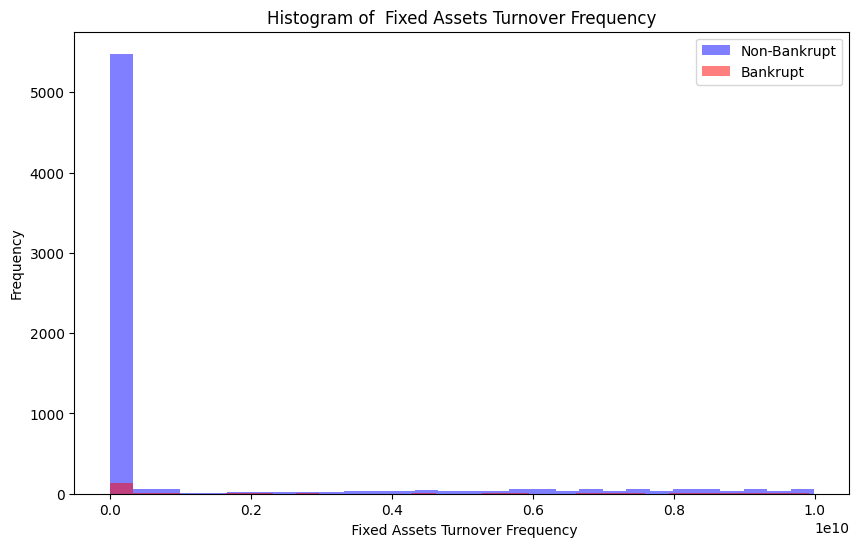

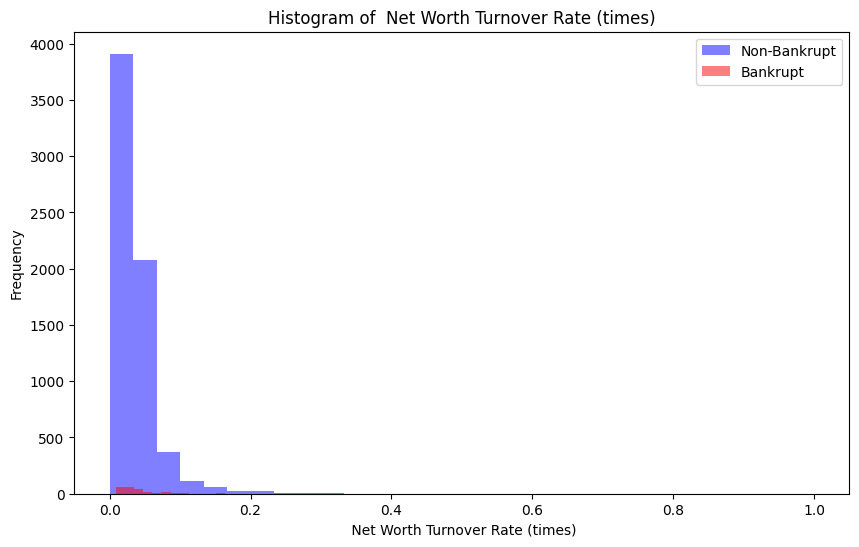

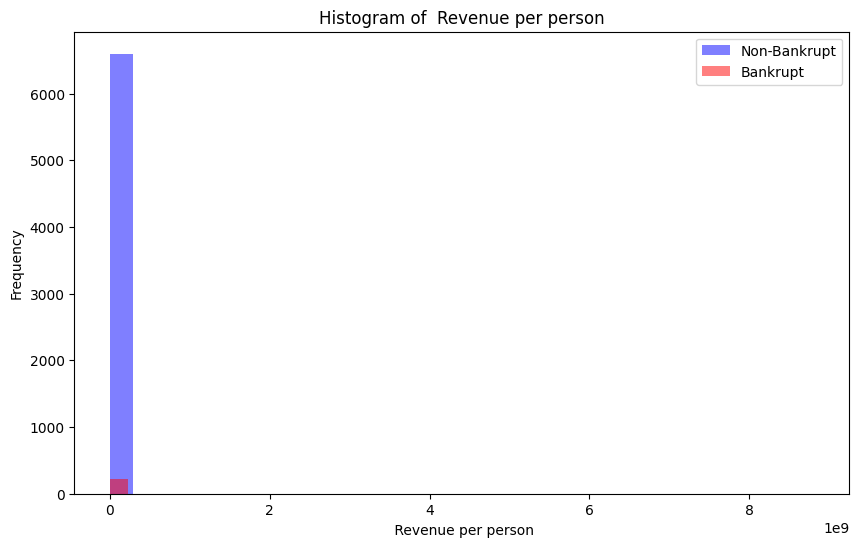

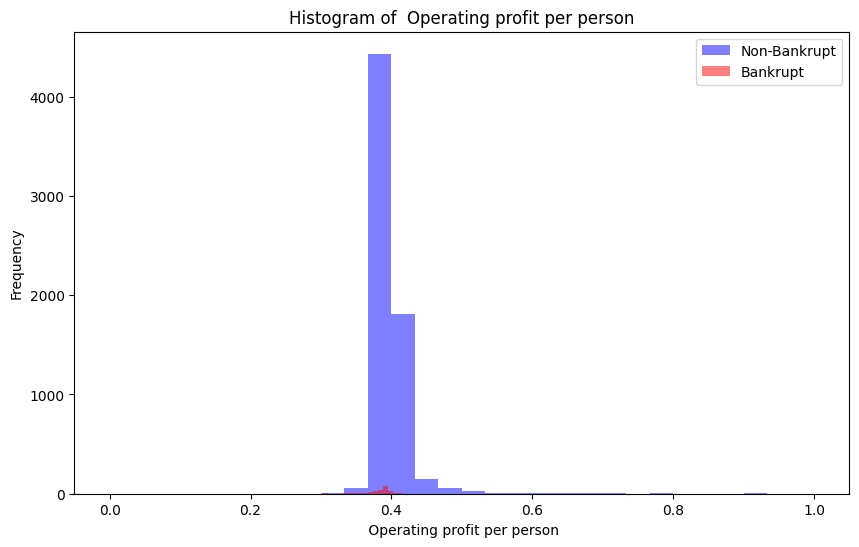

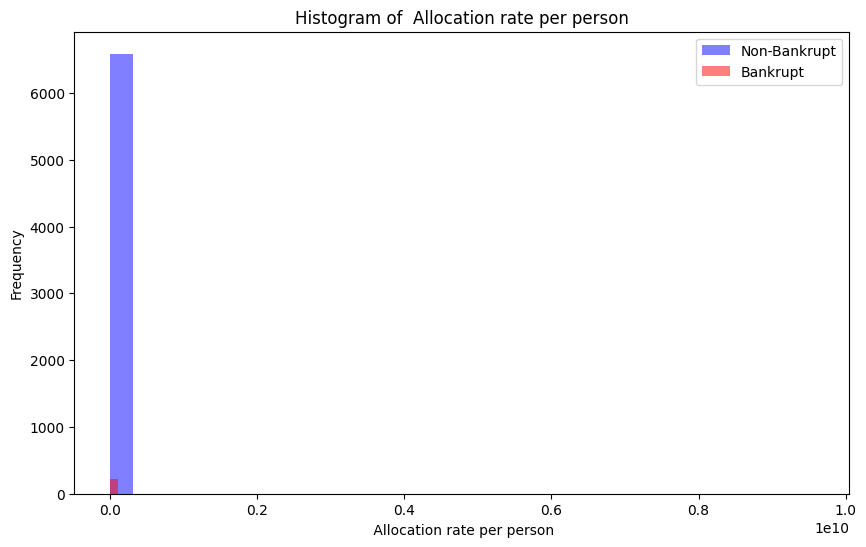

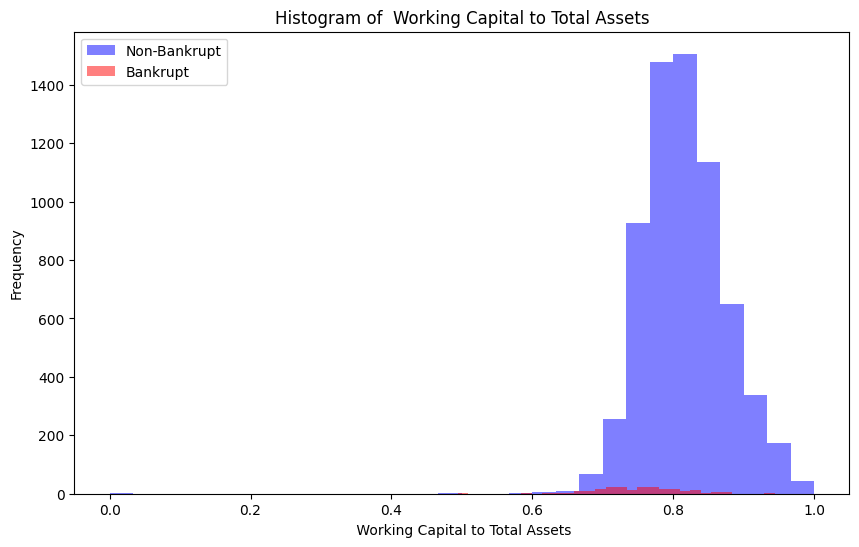

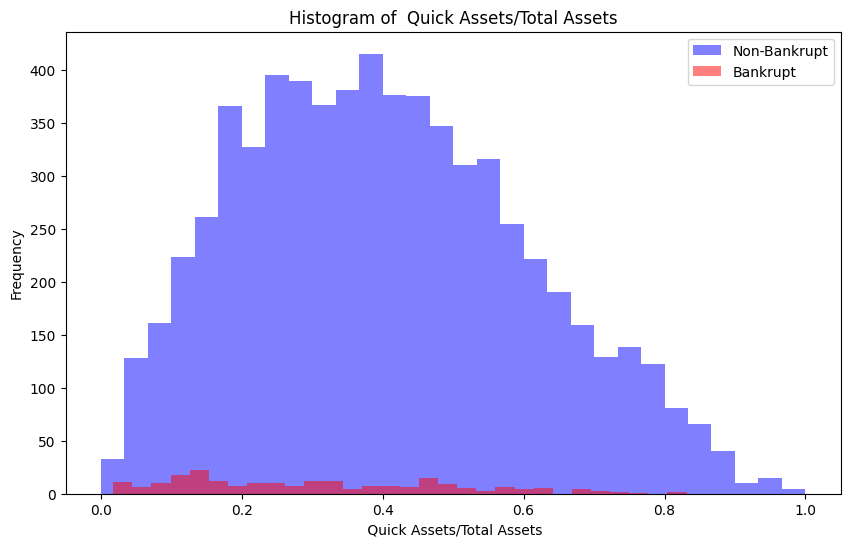

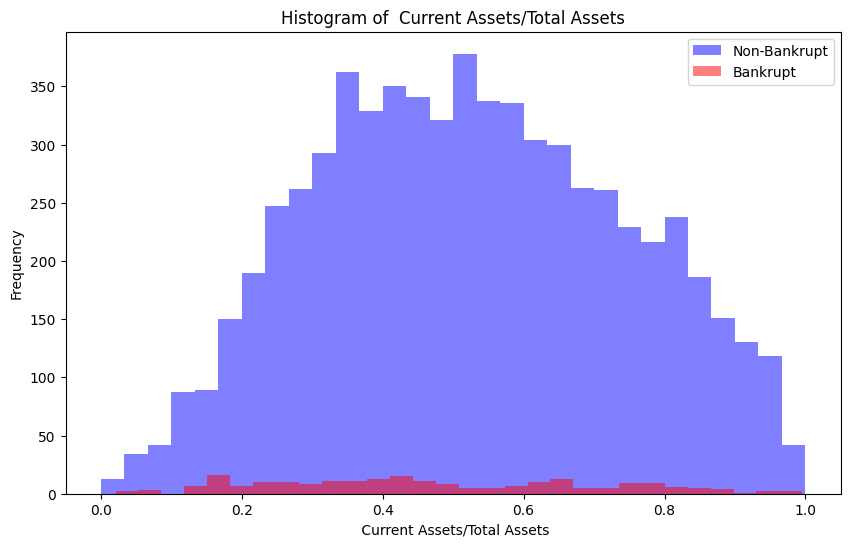

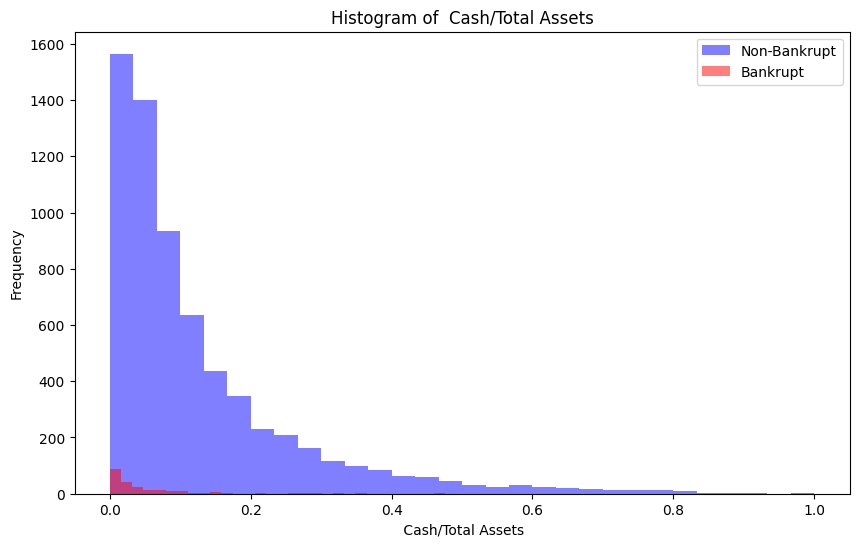

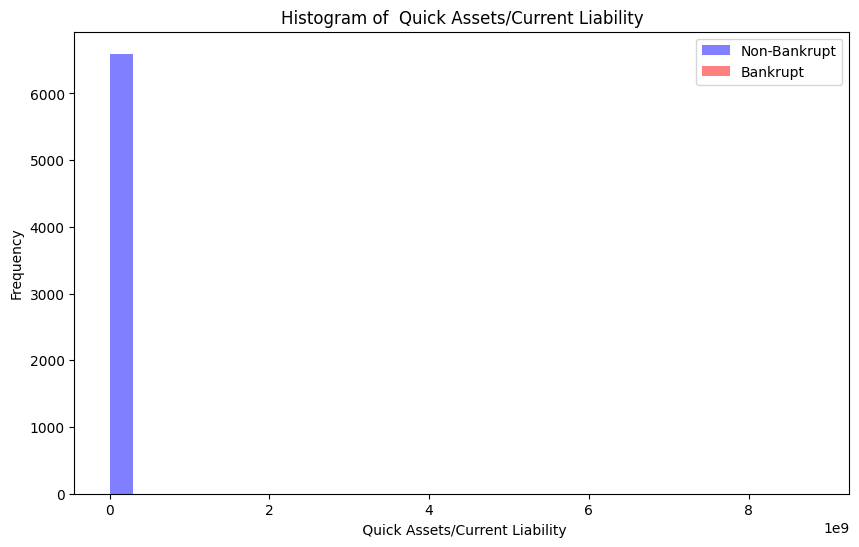

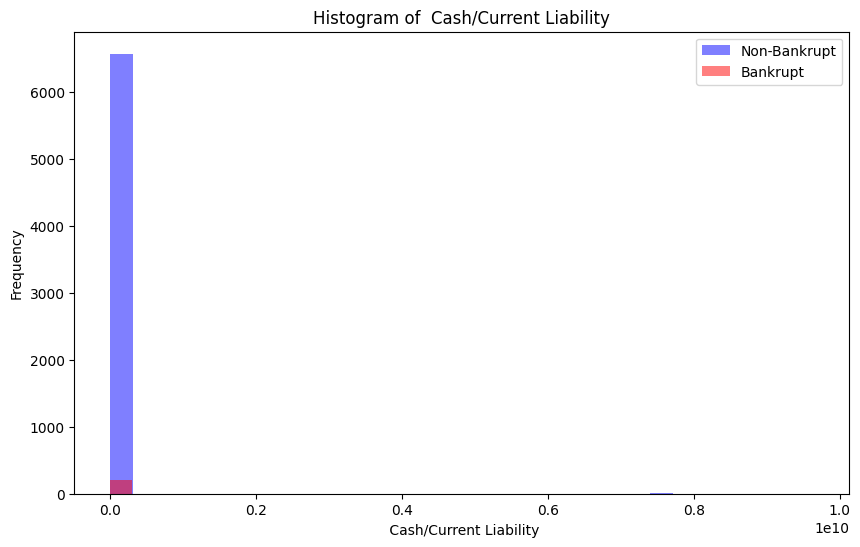

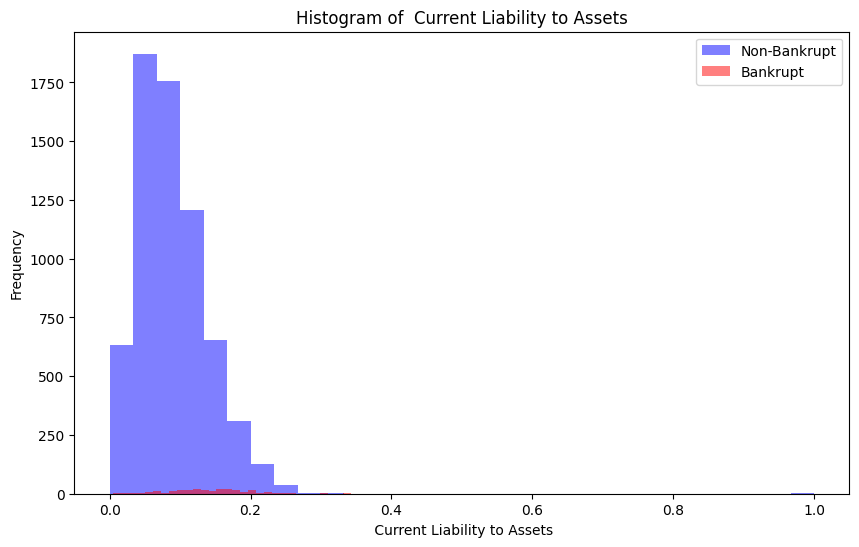

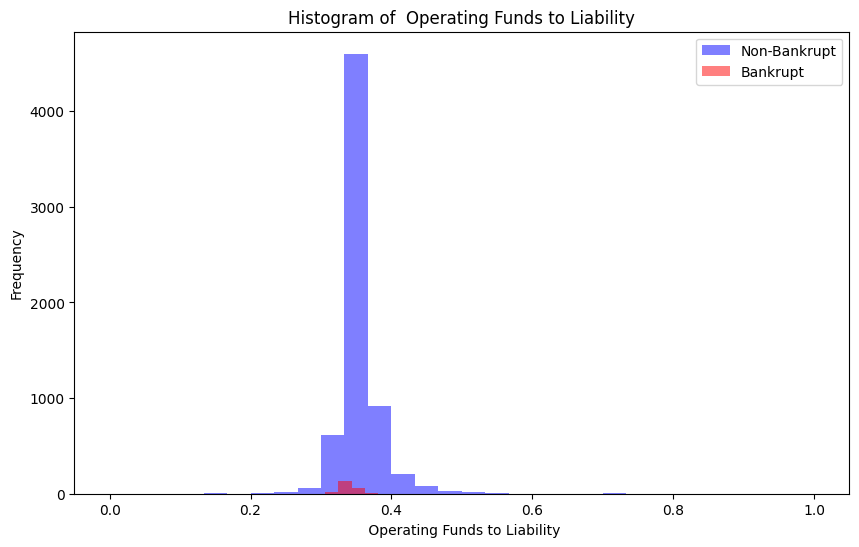

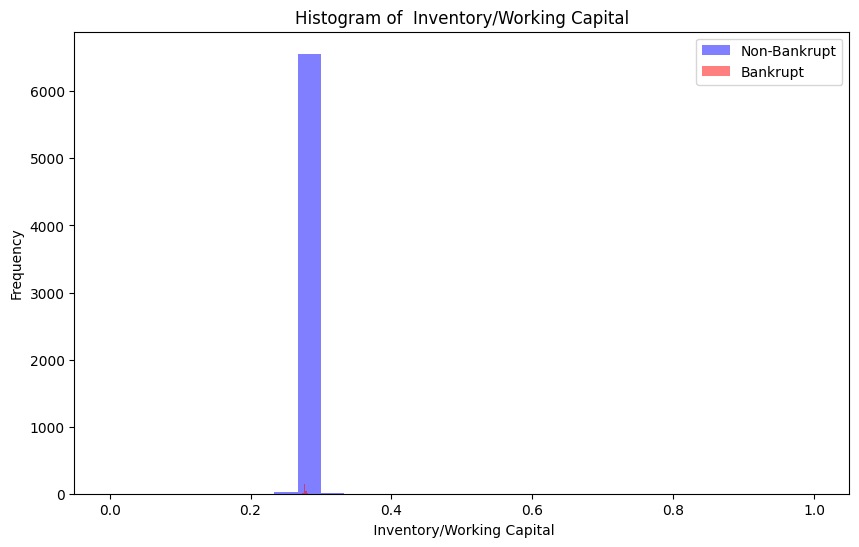

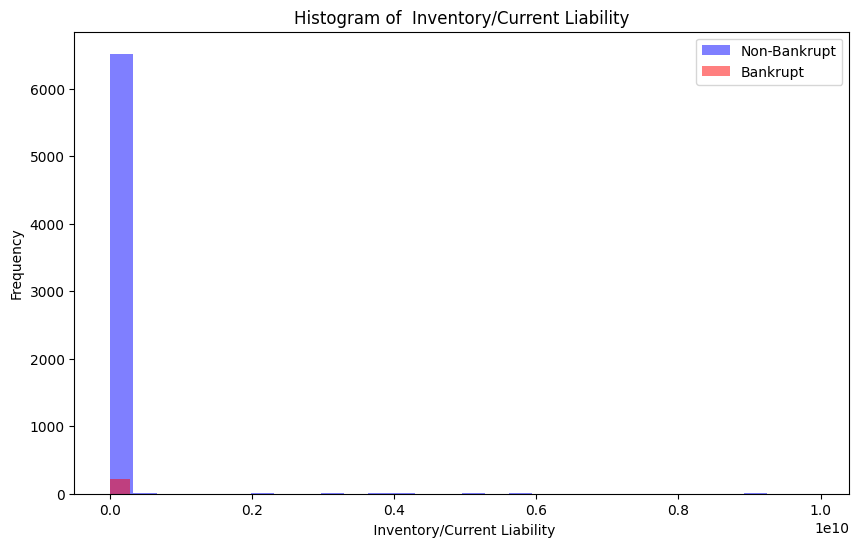

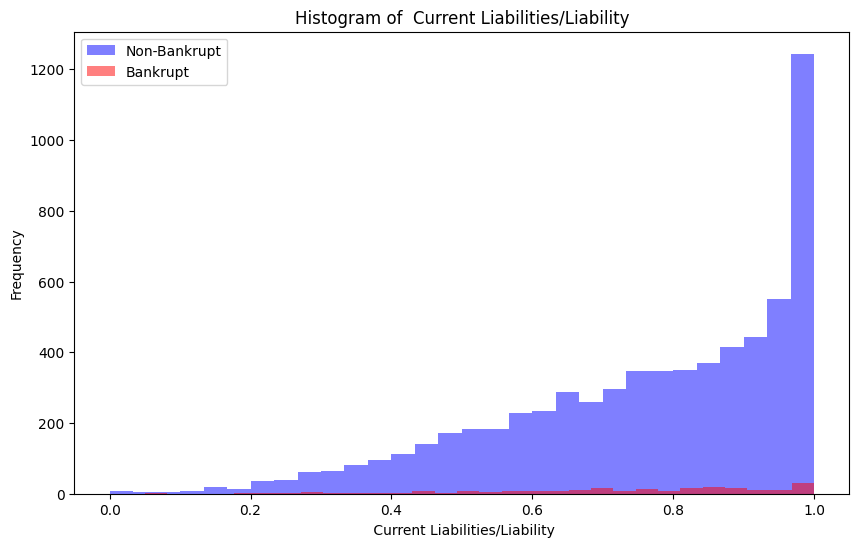

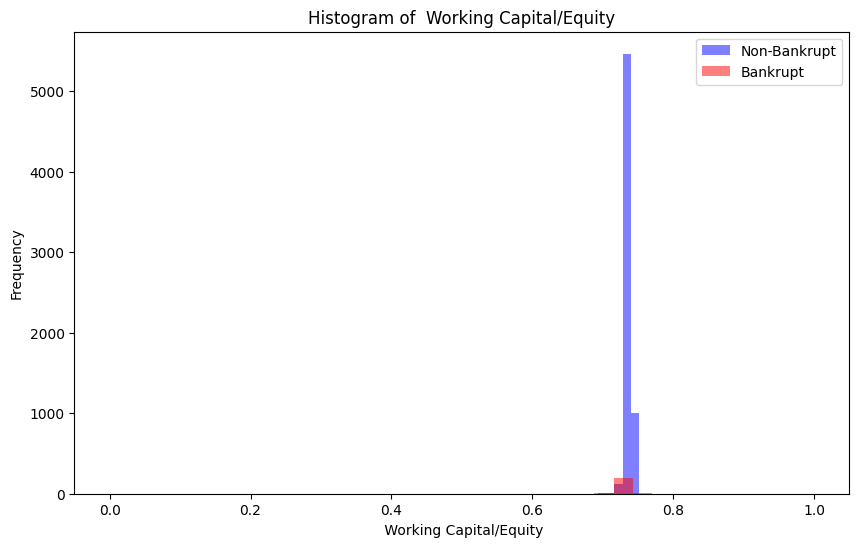

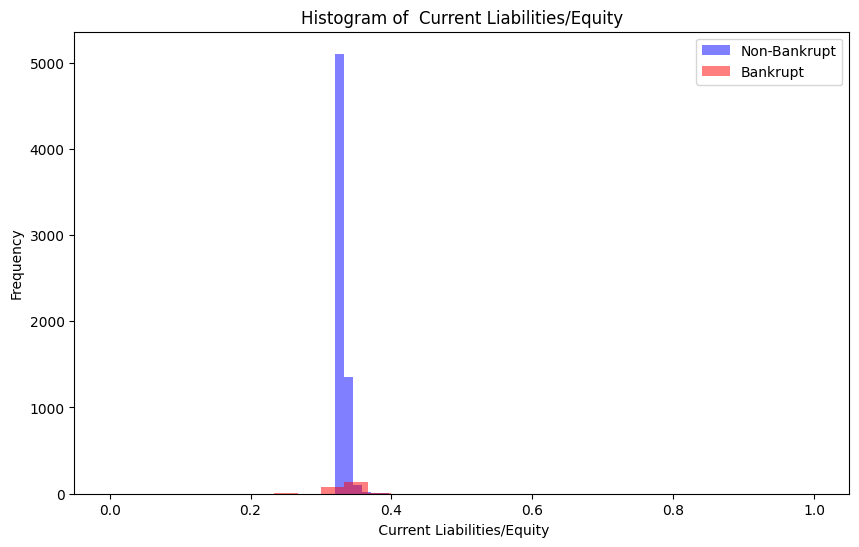

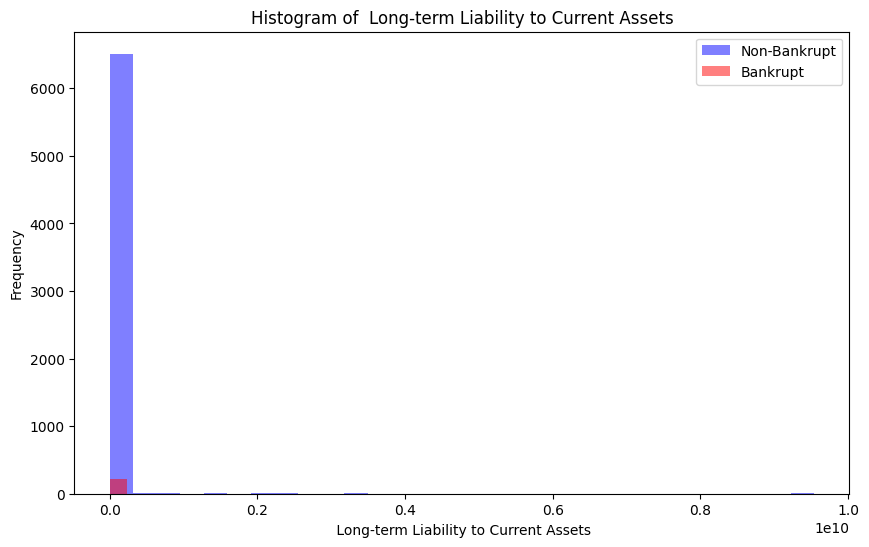

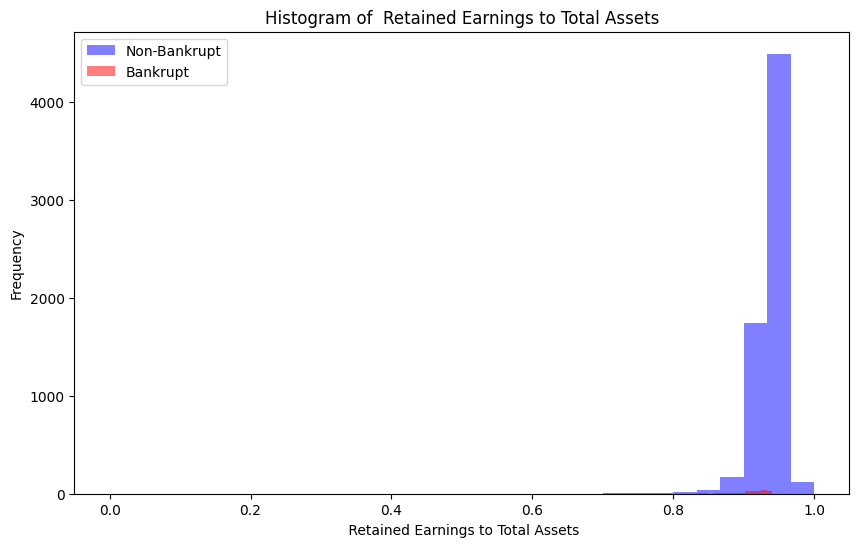

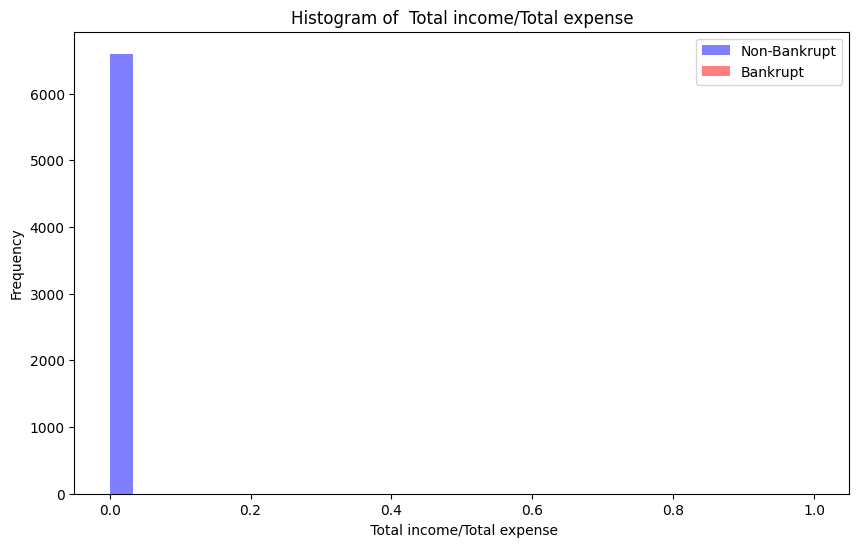

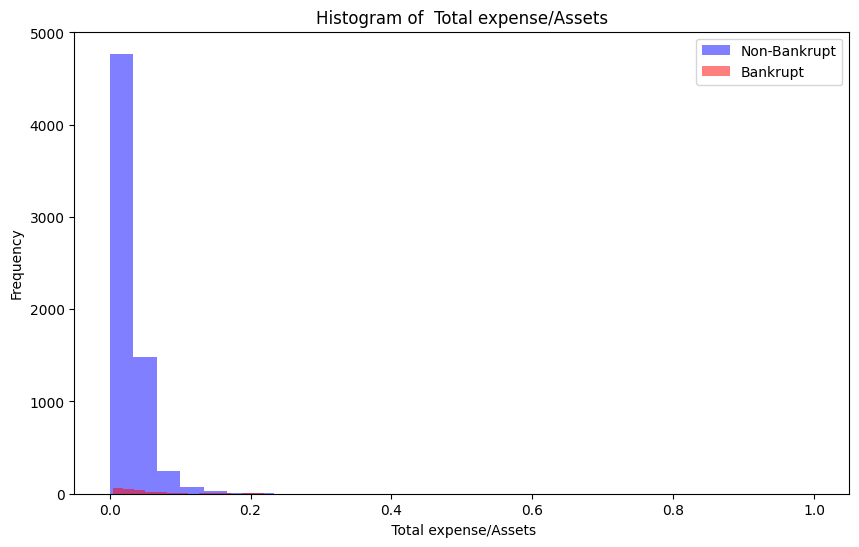

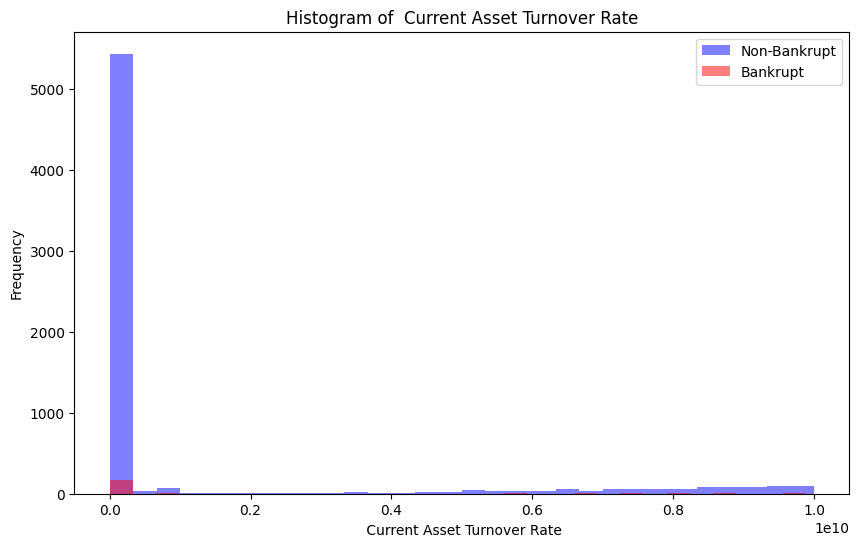

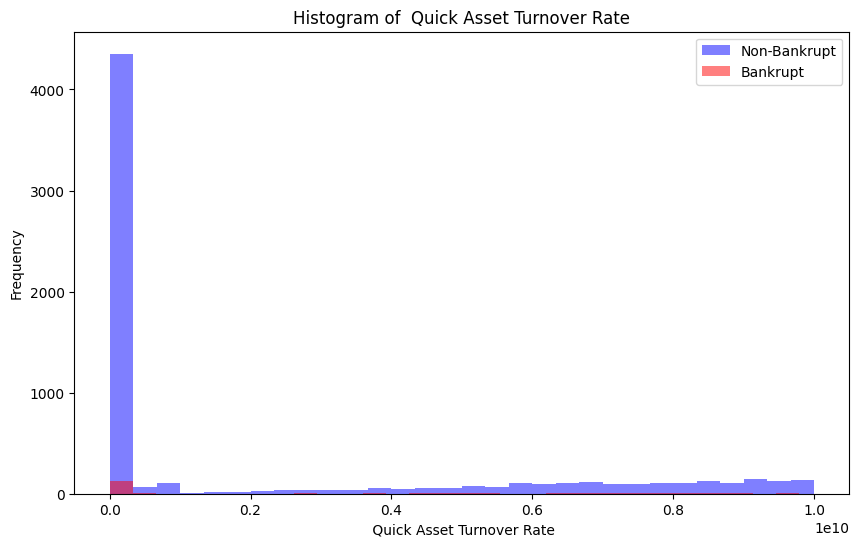

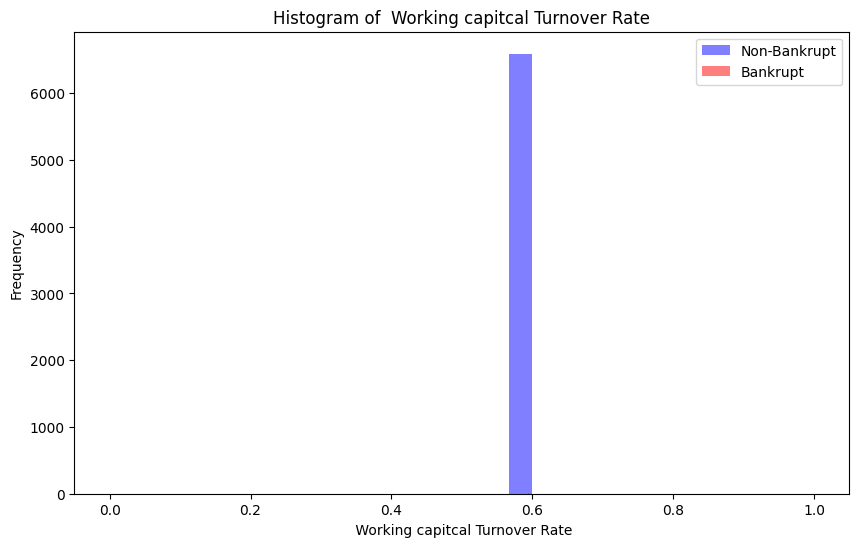

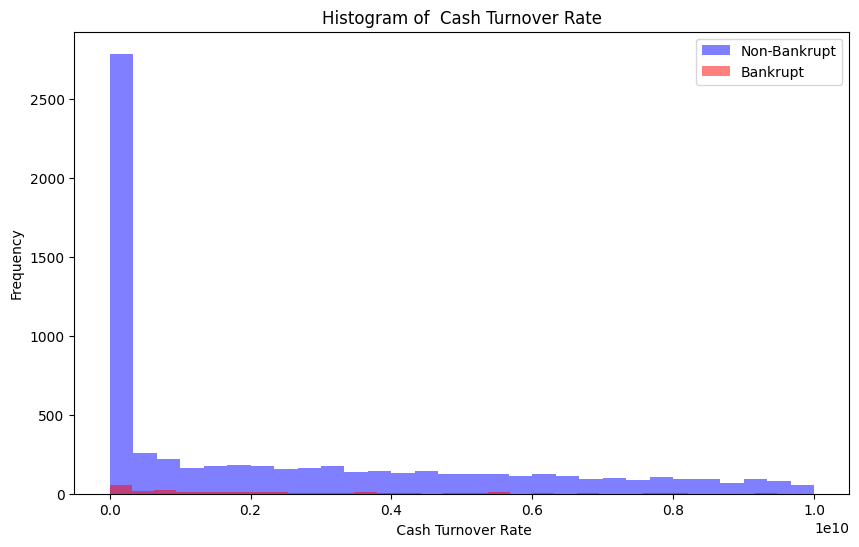

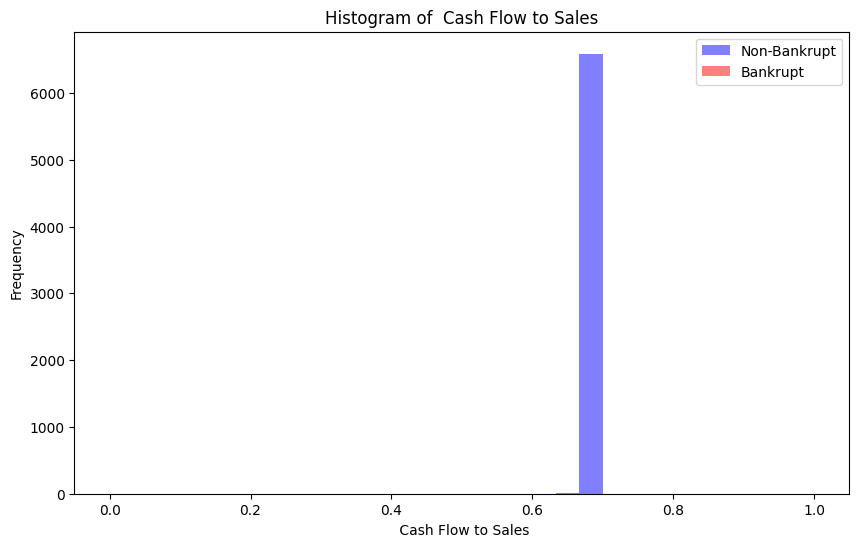

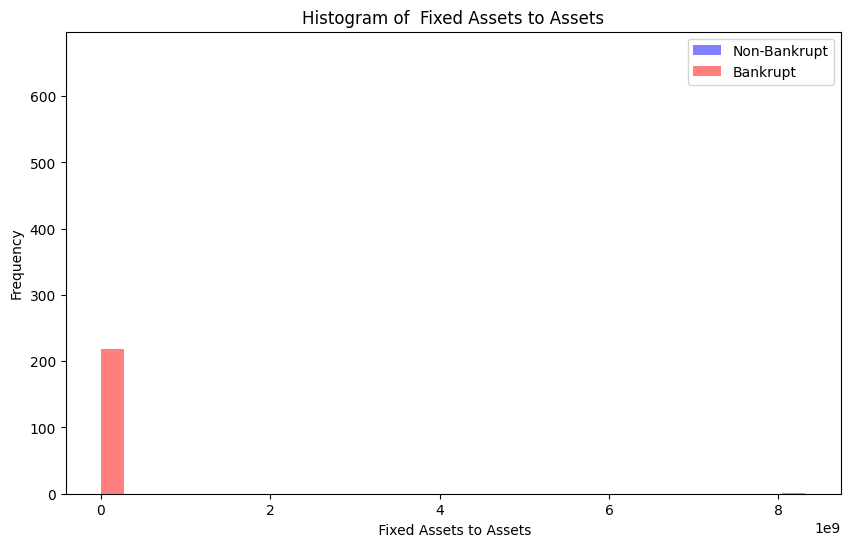

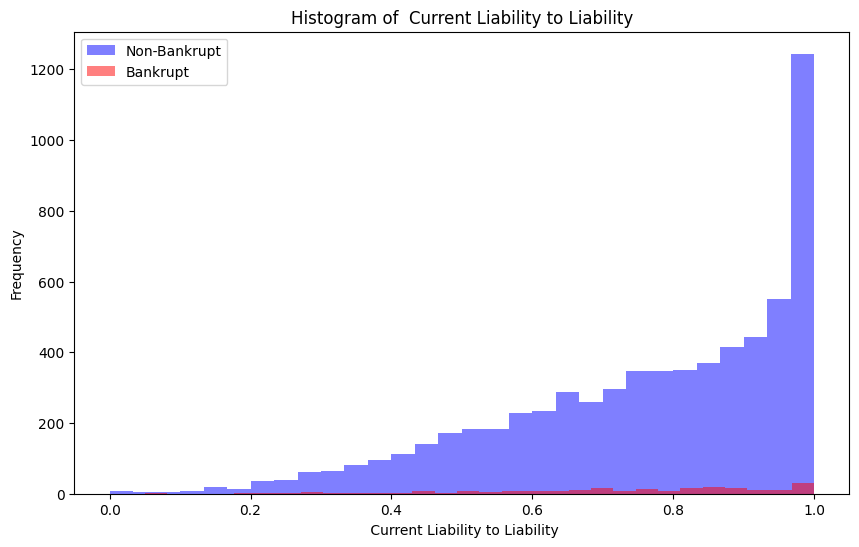

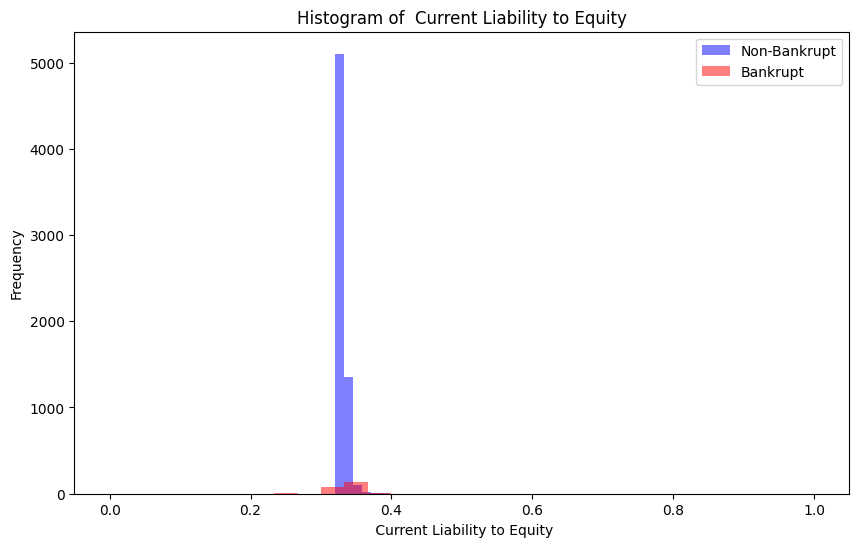

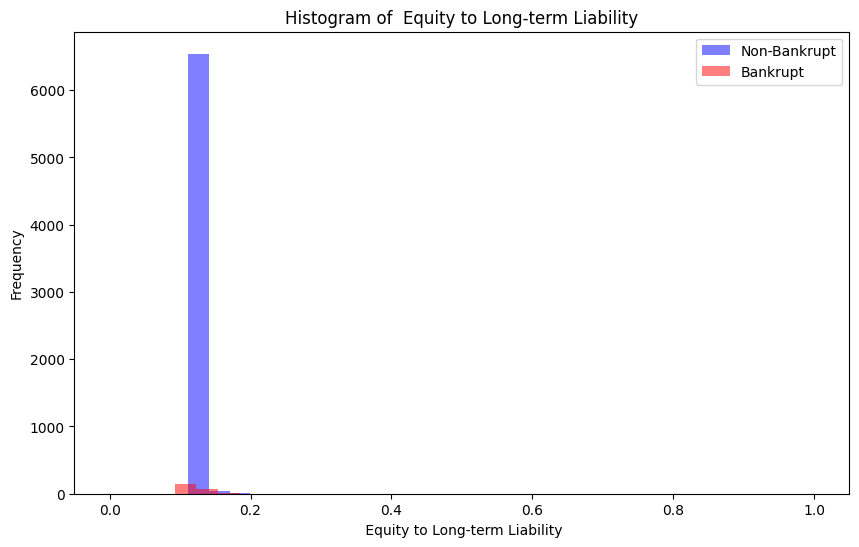

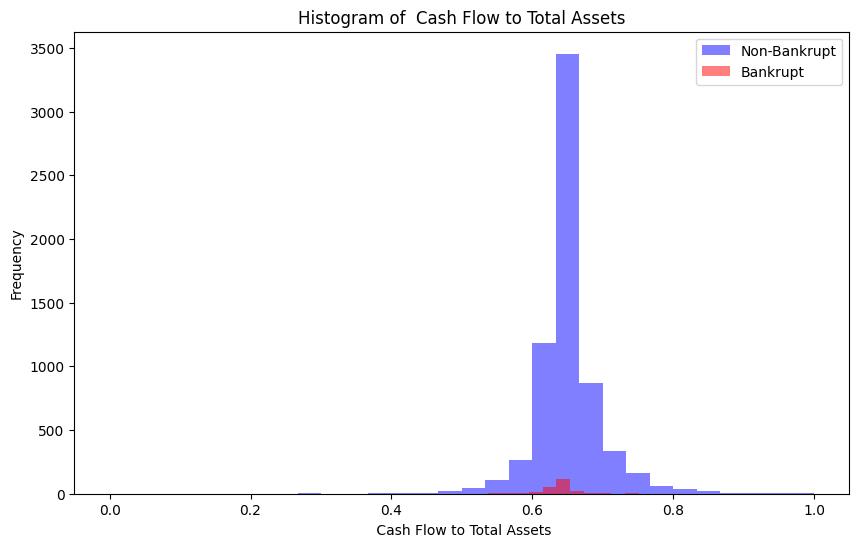

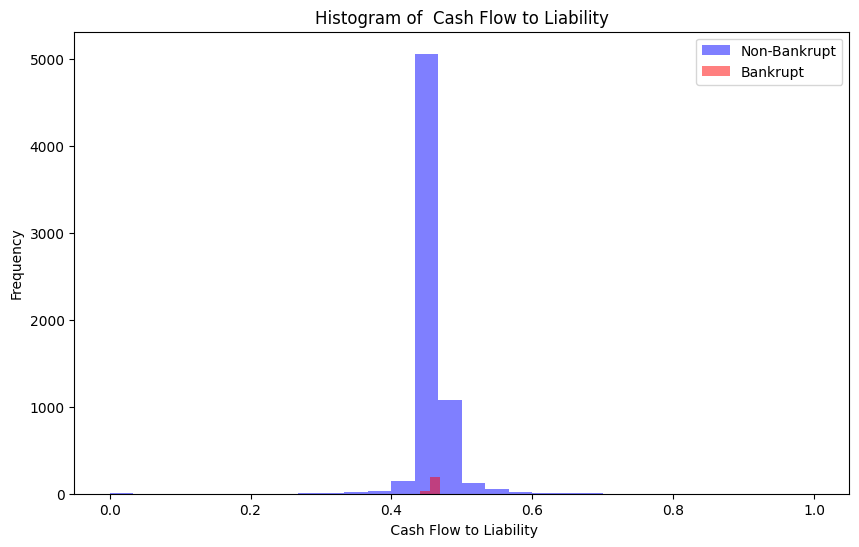

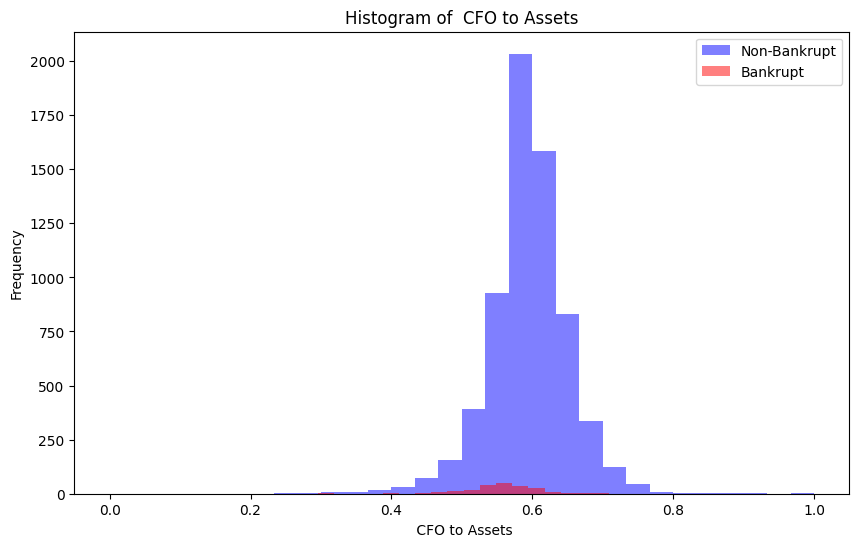

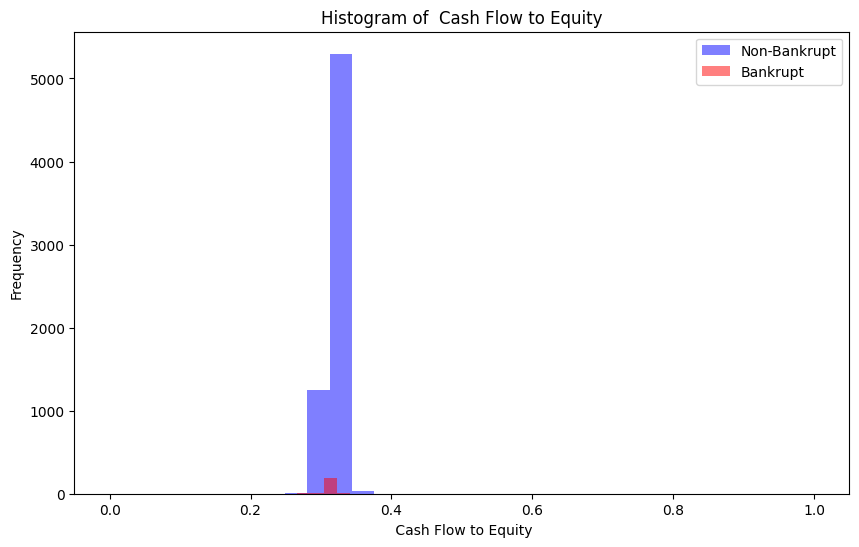

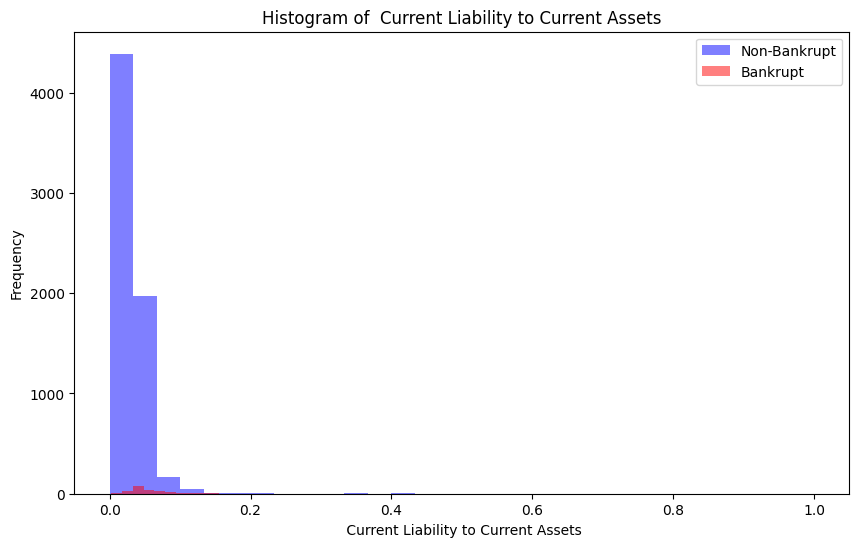

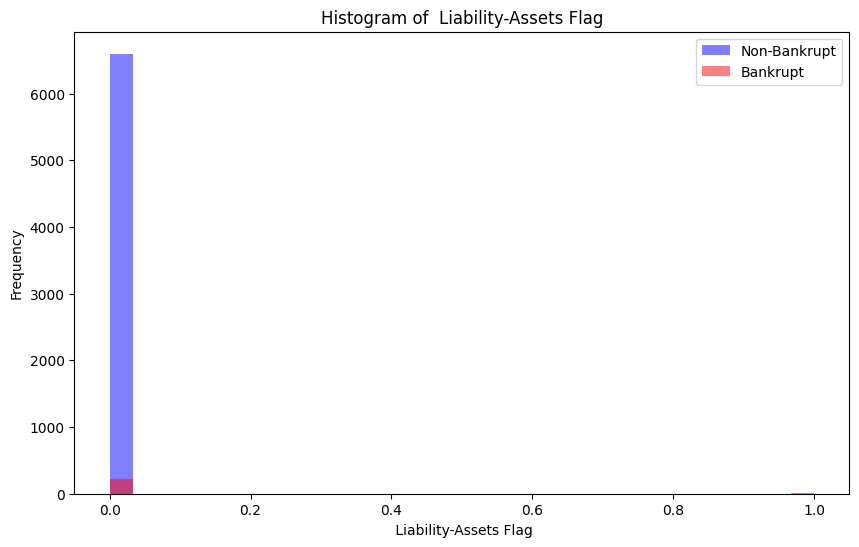

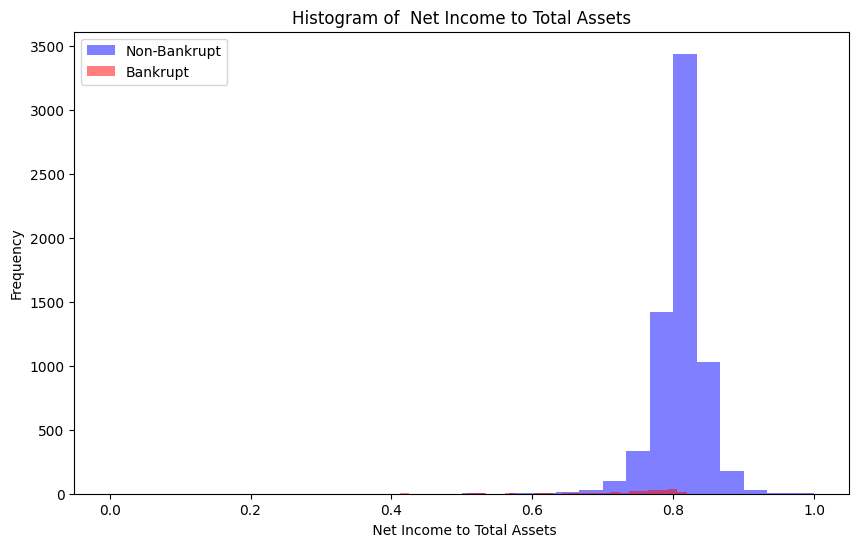

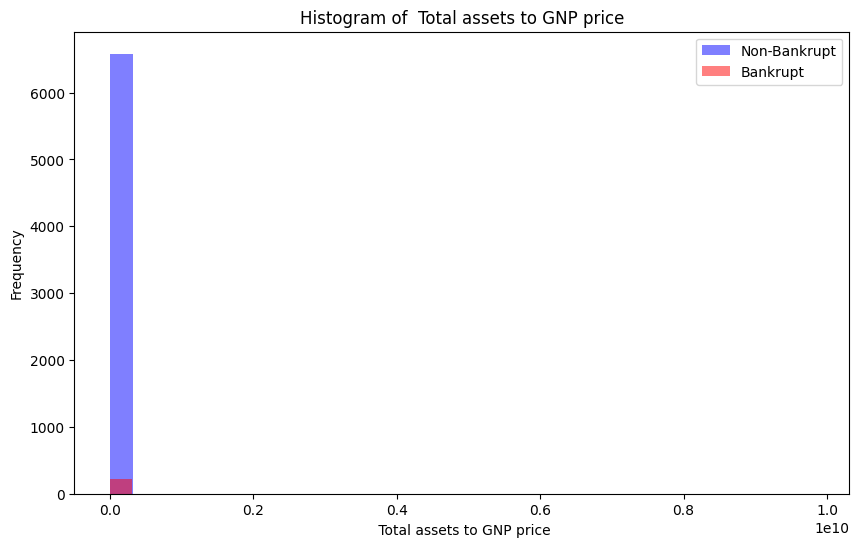

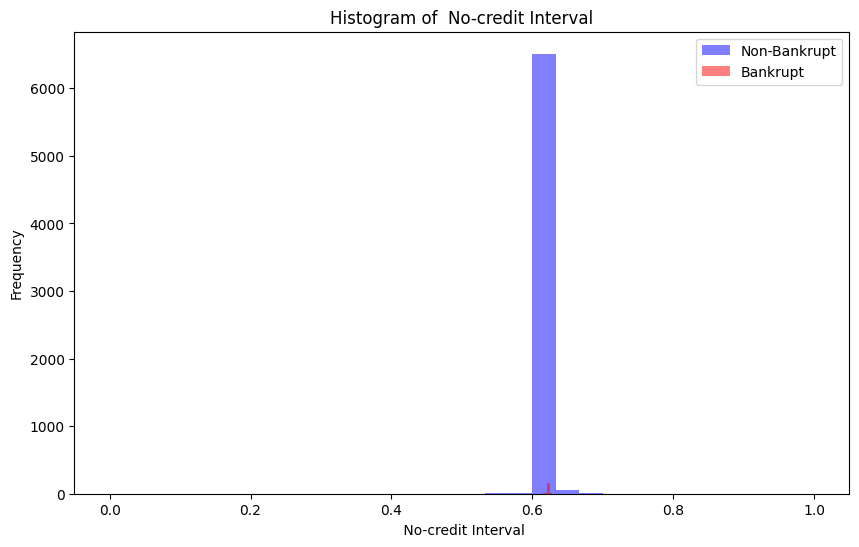

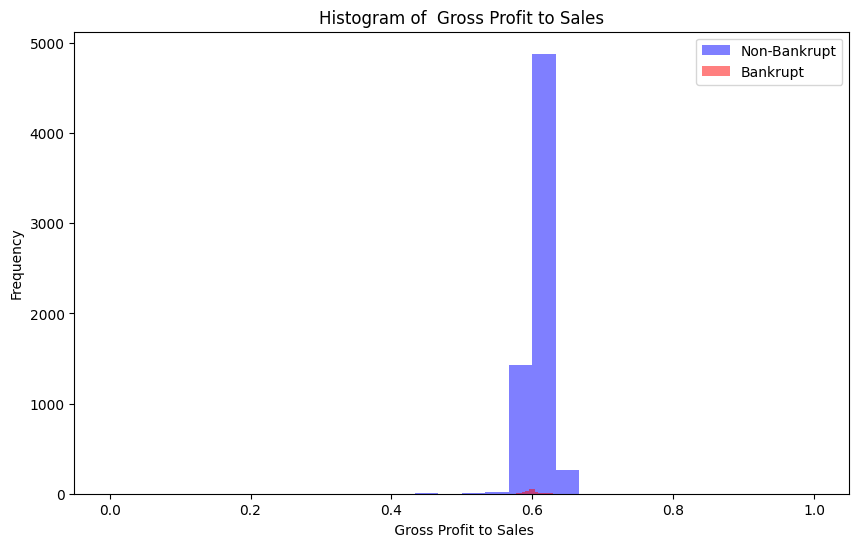

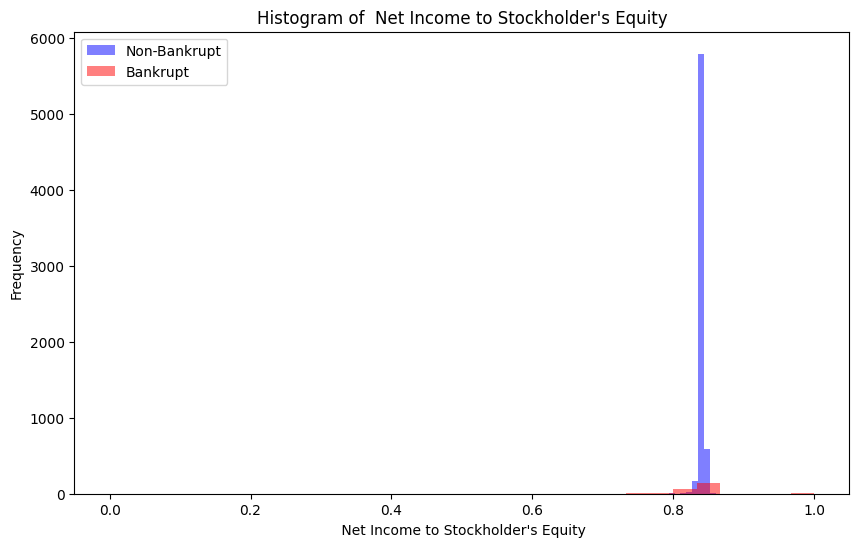

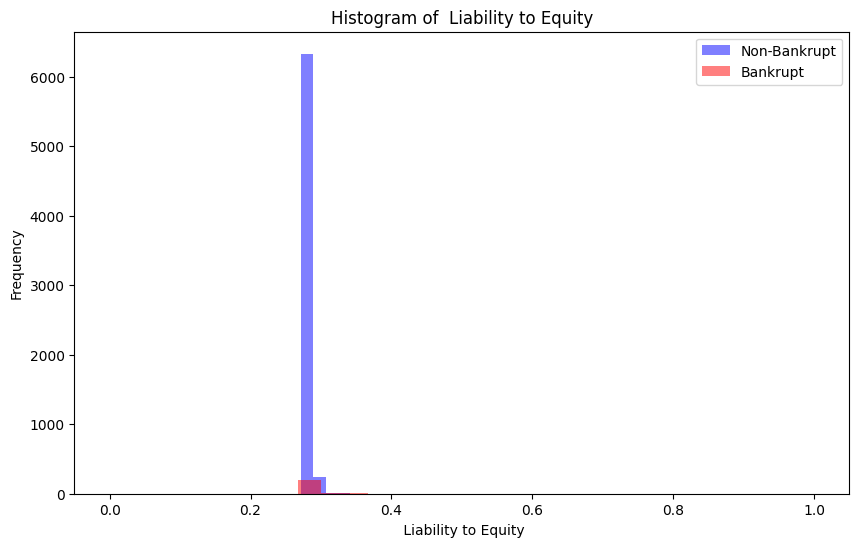

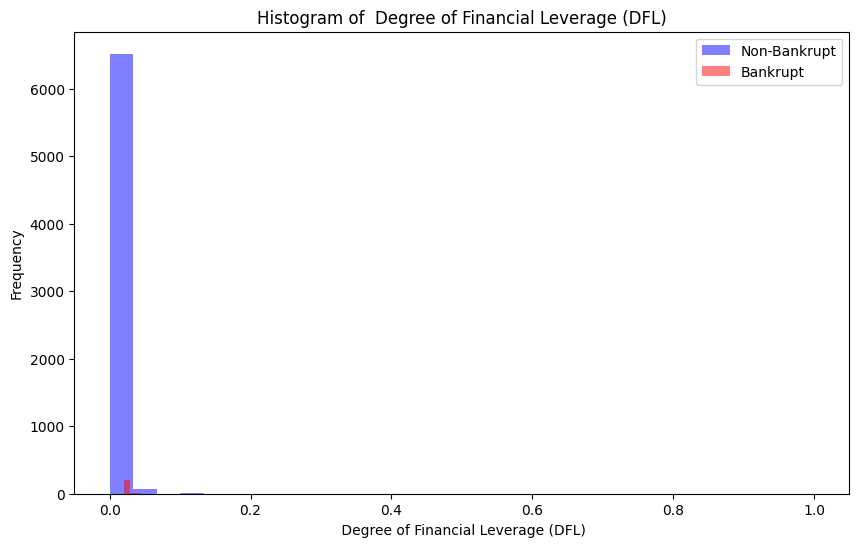

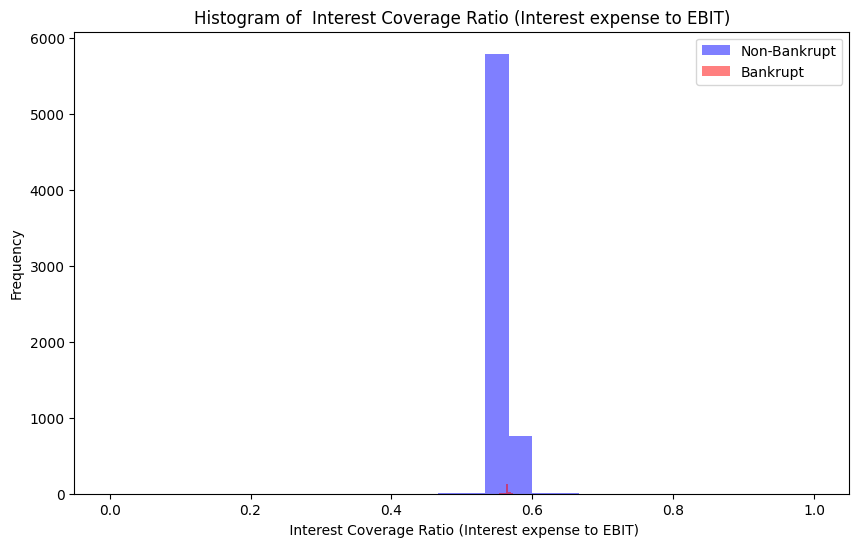

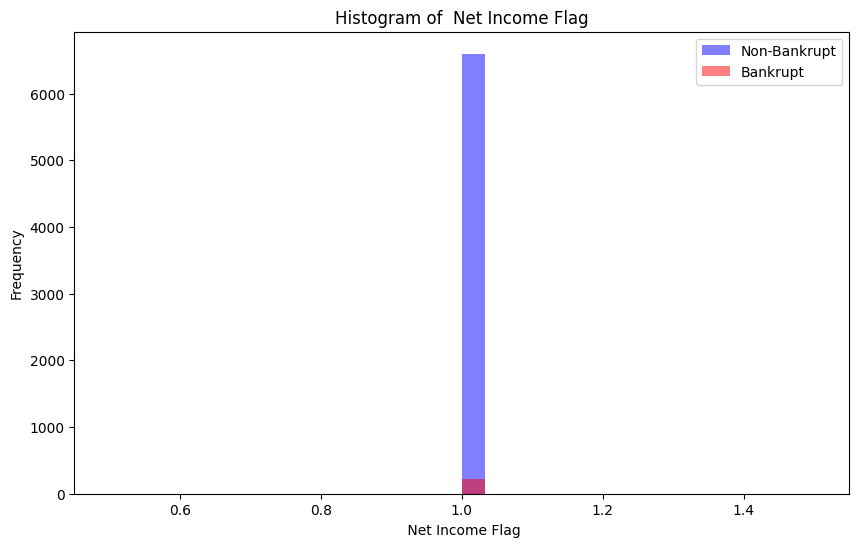

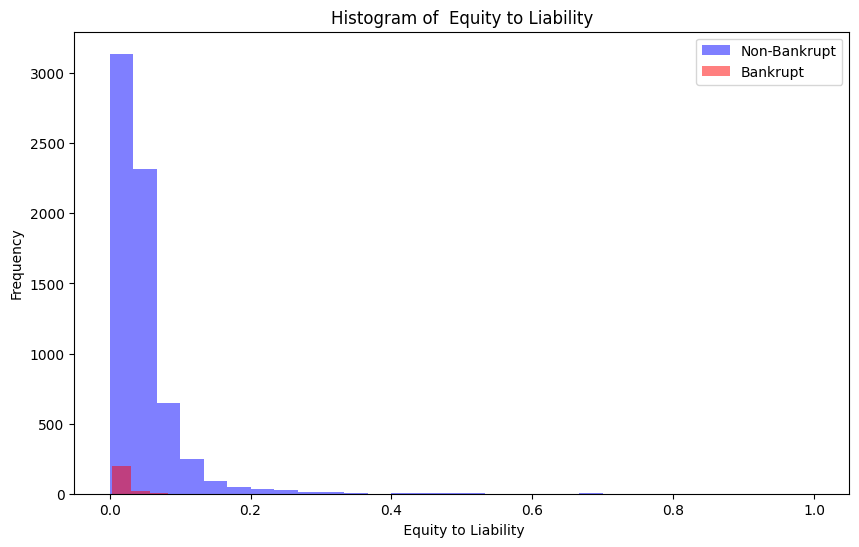

In [184]:
for column in df_filtered.columns:
    plt.figure(figsize=(10, 6))
    df[df['Bankrupt'] == 0][column].plot(kind='hist', alpha=0.5, label='Non-Bankrupt', color='blue', bins=30)
    df[df['Bankrupt'] == 1][column].plot(kind='hist', alpha=0.5, label='Bankrupt', color='red', bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_11564\2180719350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Bankrupt',data= df,palette ='Reds' )


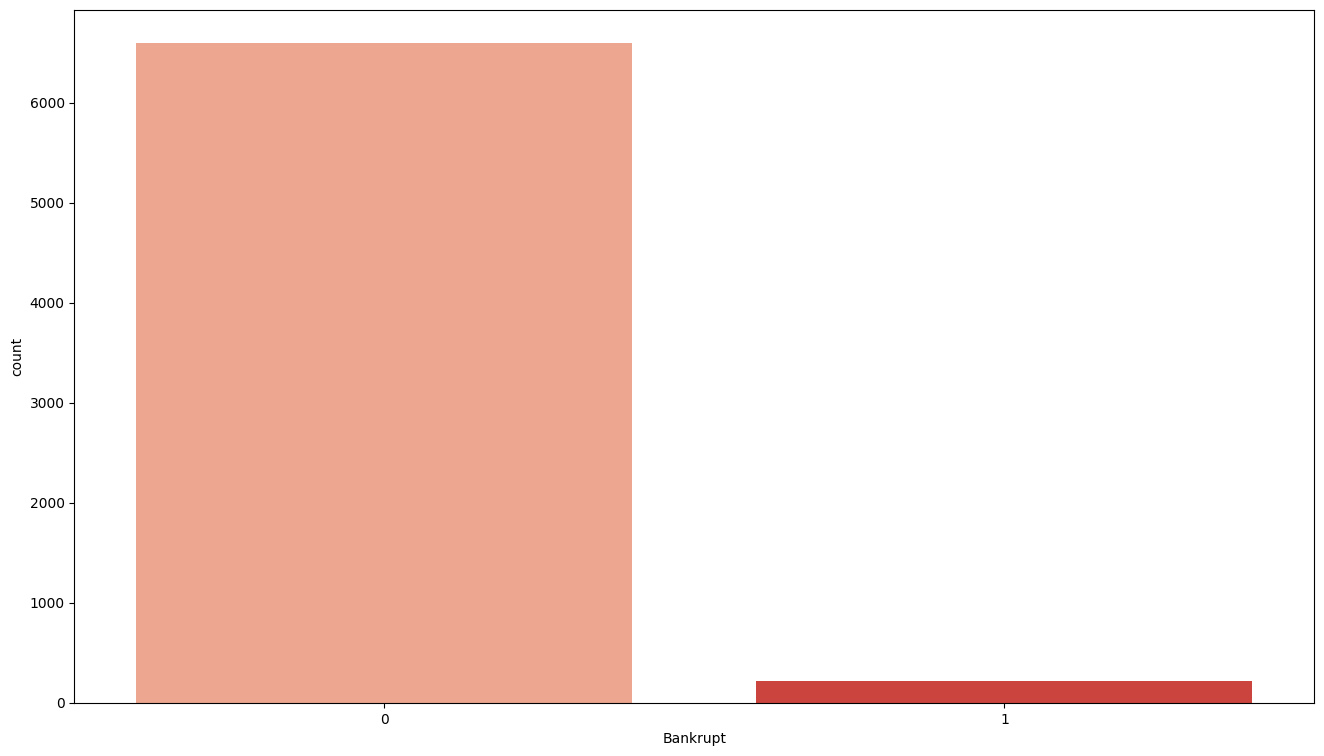

In [202]:
plt.figure(figsize=(16,9))
sns.countplot(x = 'Bankrupt',data= df,palette ='Reds' )
plt.show()

# finding coorelation with bankrupt


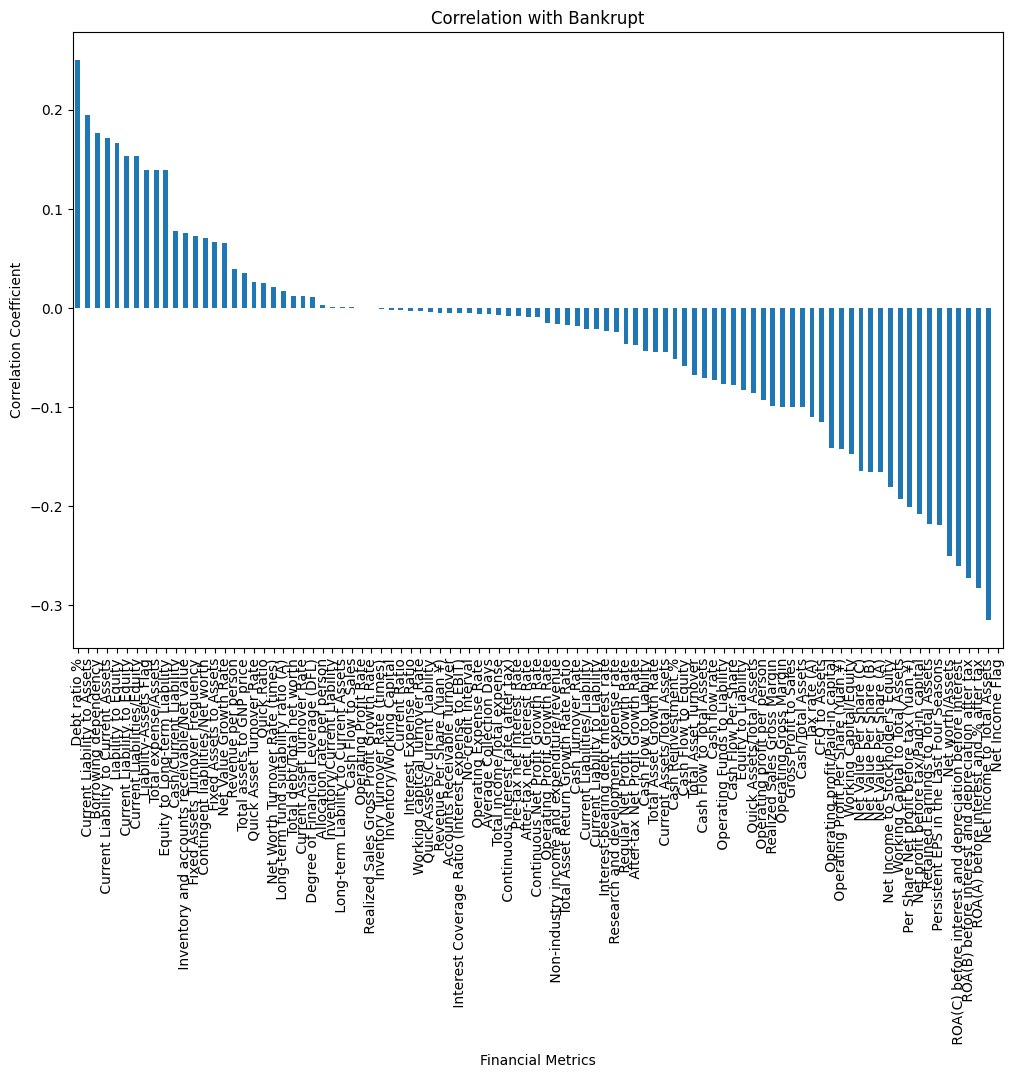

In [188]:
correlation_matrix = df.corr()

# Extract correlation coefficients related to 'Bankrupt'
bankrupt_correlation = correlation_matrix['Bankrupt'].drop('Bankrupt')

# Sort the correlations
sorted_correlations = bankrupt_correlation.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(12, 8))
sorted_correlations.plot(kind='bar')
plt.title('Correlation with Bankrupt')
plt.xlabel('Financial Metrics')
plt.ylabel('Correlation Coefficient')
plt.show()

In [204]:
#hypothesis testing-1
variable_of_interest = ' Non-industry income and expenditure/revenue'


bankrupt_data = df[df['Bankrupt'] == 1][variable_of_interest]
non_bankrupt_data = df[df['Bankrupt'] == 0][variable_of_interest]


t_statistic, p_value = ttest_ind(bankrupt_data, non_bankrupt_data, equal_var=False)


print(f"Variable: {variable_of_interest}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05 

if p_value < alpha:
    print(f"we will Reject null hypothesis: There is a significant difference in '{variable_of_interest}' between bankrupt and non-bankrupt companies.")
else:
    print(f"Fail to reject null hypothesis: There is no significant difference in '{variable_of_interest}' between bankrupt and non-bankrupt companies.")


Variable:  Non-industry income and expenditure/revenue
T-statistic: -2.826269037872942
P-value: 0.005029440208904109
Reject null hypothesis: There is a significant difference in ' Non-industry income and expenditure/revenue' between bankrupt and non-bankrupt companies.


# performing hypothesis testing on multiple variable

In [206]:

variables_of_interest = [ ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',]

# Set significance level
alpha = 0.05

for variable_of_interest in variables_of_interest:
    bankrupt_data = df[df['Bankrupt'] == 1][variable_of_interest]
    non_bankrupt_data = df[df['Bankrupt'] == 0][variable_of_interest]

    t_statistic, p_value = ttest_ind(bankrupt_data, non_bankrupt_data, equal_var=False)

    print(f"Variable: {variable_of_interest}")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")

    if p_value < alpha:
        print(f"Reject null hypothesis: There is a significant difference in '{variable_of_interest}' between bankrupt and non-bankrupt companies.")
    else:
        print(f"Fail to reject null hypothesis: There is no significant difference in '{variable_of_interest}' between bankrupt and non-bankrupt companies.")
    
    print('=======================================================================================================================================') 


Variable:  ROA(C) before interest and depreciation before interest
T-statistic: -16.250508105706345
P-value: 7.042945688823483e-40
Reject null hypothesis: There is a significant difference in ' ROA(C) before interest and depreciation before interest' between bankrupt and non-bankrupt companies.
Variable:  ROA(A) before interest and % after tax
T-statistic: -14.396857536827563
P-value: 1.0740204873195467e-33
Reject null hypothesis: There is a significant difference in ' ROA(A) before interest and % after tax' between bankrupt and non-bankrupt companies.
Variable:  ROA(B) before interest and depreciation after tax
T-statistic: -15.27289257554766
P-value: 1.3267487186805144e-36
Reject null hypothesis: There is a significant difference in ' ROA(B) before interest and depreciation after tax' between bankrupt and non-bankrupt companies.
Variable:  Operating Gross Margin
T-statistic: -9.531937004450501
P-value: 1.8434661449687235e-18
Reject null hypothesis: There is a significant difference i

# performing model test with independent variables (features) and dependent variable (target)

In [216]:


# Assuming 'df' is your DataFrame containing the dataset
selected_features = [
    ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
]
X = df[selected_features]
y = df['Bankrupt']

# Add a constant to the features (for intercept)
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())


         Current function value: 0.111108
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Bankrupt   No. Observations:                 6819
Model:                          Logit   Df Residuals:                     6805
Method:                           MLE   Df Model:                           13
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.2204
Time:                        22:06:11   Log-Likelihood:                -757.65
converged:                      False   LL-Null:                       -971.86
Covariance Type:            nonrobust   LLR p-value:                 2.197e-83
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                               

C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [217]:
# Calculating  accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generating classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.55      0.12      0.19        51

    accuracy                           0.96      1364
   macro avg       0.76      0.56      0.59      1364
weighted avg       0.95      0.96      0.95      1364

Confusion Matrix:
[[1308    5]
 [  45    6]]


# Insights of Dataset

Baseline Log-Odds of Bankruptcy (Intercept):
- Approximately -241800.0

Cost of Interest-bearing Debt:
- Coefficient: 1175.66
- p-value: 0.000 (Highly significant predictor)
- Insight: A positive coefficient indicates that higher costs of interest-bearing debt increase the likelihood of bankruptcy.

Cash Reinvestment Ratio:
- Coefficient: 230.88
- p-value: 0.013 (Statistically significant predictor)
- Insight: A positive coefficient suggests that higher reinvestment ratios are associated with higher bankruptcy risk.

Current Ratio:
- Coefficient: -2463.87
- p-value: 0.000 (Highly significant predictor)
- Insight: A negative coefficient implies that a higher current ratio (indicating better liquidity) reduces the likelihood of bankruptcy.

Acid Test:
- Coefficient: -3453.89
- p-value: 0.002 (Statistically significant predictor)
- Insight: A negative coefficient suggests that higher acid-test ratios (another liquidity measure) reduce bankruptcy risk.

Interest Expenses/Total Revenue:
- Coefficient: -90.13
- p-value: 0.869 (Not statistically significant)
- Insight: This variable does not have a meaningful impact on predicting bankruptcy in this model.

Total Liability/Equity Ratio:
- Coefficient: -706.19
- p-value: 0.948 (Not statistically significant)
- Insight: This variable also does not contribute meaningfully to the model.

Liability/Total Assets Ratio:
- Coefficient: 79220.0
- p-value: 0.071 (Marginally significant)
- Insight: A positive coefficient suggests that higher liabilities relative to assets increase bankruptcy risk, although marginally significant.

Interest-bearing Debt/Equity Ratio:
- Coefficient: 119000.0
- p-value: 0.024 (Statistically significant)
- Insight: A positive coefficient indicates that higher debt relative to equity increases bankruptcy risk.

Contingent Liability/Equity Ratio:
- Coefficient: -715300.0
- p-value: 0.000 (Highly significant predictor)
- Insight: A negative coefficient suggests that higher contingent liabilities relative to equity decrease the likelihood of bankruptcy.

Operating Income/Capital Ratio:
- Coefficient: 387300.0
- p-value: 0.000 (Highly significant predictor)
- Insight: A positive coefficient means higher operating income relative to capital increases bankruptcy risk.


# Logistic Regression Model Summary for Bankruptcy Prediction:

Dependent Variable: Bankrupt

Model Summary:
- Observations: 6819
- Method: Maximum Likelihood Estimation (MLE)
- Pseudo R-squared: 0.2204
- Convergence: False (Model failed to converge within the maximum number of iterations)
- LLR p-value: 2.197e-83 (Model as a whole is statistically significant)

Coefficients:
1. ROA(C) before interest and depreciation before interest:
   - Coefficient: -17.3741
   - p-value: 0.016 (Statistically significant predictor)

2. ROA(A) before interest and % after tax:
   - Coefficient: -9.4428
   - p-value: 0.005 (Statistically significant predictor)

3. ROA(B) before interest and depreciation after tax:
   - Coefficient: 6.9333
   - p-value: 0.397 (Not statistically significant)

4. Operating Gross Margin:
   - Coefficient: -149.2634
   - p-value: 0.301 (Not statistically significant)

5. Realized Sales Gross Margin:
   - Coefficient: 129.6834
   - p-value: 0.368 (Not statistically significant)

6. Operating Profit Rate:
   - Coefficient: 648.8500
   - p-value: 1.000 (Not statistically significant)

7. Pre-tax net Interest Rate:
   - Coefficient: 958.6692
   - p-value: 0.999 (Not statistically significant)

8. After-tax net Interest Rate:
   - Coefficient: -325.1362
   - p-value: 0.620 (Not statistically significant)

9. Non-industry income and expenditure/revenue:
   - Coefficient: -387.5766
   - p-value: 1.000 (Not statistically significant)

10. Continuous interest rate (after tax):
    - Coefficient: -343.8495
    - p-value: 0.135 (Not statistically significant)

11. Operating Expense Rate:
    - Coefficient: 3.325e-11
    - p-value: 0.167 (Not statistically significant)

12. Research and development expense rate:
    - Coefficient: -2.747e-11
    - p-value: 0.375 (Not statistically significant)

13. Cash flow rate:
    - Coefficient: -1.8766
    - p-value: 0.689 (Not statistically significant)
